In [1]:
import atd2022
import torch
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sktime.performance_metrics.forecasting import (
    MeanAbsoluteScaledError,
    MeanSquaredError,
)
import my_mod as util
from models import CnnForecaster
from tools import dotdict

In [2]:
import torch
torch.cuda.is_available()

True

# Small Scale Test for GPU support

In [3]:
torch.cuda.set_device(2) 

In [4]:
args = dotdict()
args.epochs=40
args.lr=0.001
args.batch_size = 4
args.d_model = 2048

In [5]:
truth = atd2022.io.read_csv()

In [6]:
test = truth[["AA", "AC"]]

In [7]:
lispCNN = CnnForecaster(args)

In [33]:
lispCNN.fit(data=test)

0
epochs 1/40
train_loss 65.90036010742188
epochs 2/40
train_loss 62.43232345581055
epochs 3/40
train_loss 55.9425048828125
epochs 4/40
train_loss 52.730995178222656
epochs 5/40
train_loss 53.12398910522461
epochs 6/40
train_loss 50.668182373046875
epochs 7/40
train_loss 49.827857971191406
epochs 8/40
train_loss 47.613525390625
epochs 9/40
train_loss 48.447410583496094
epochs 10/40
train_loss 46.728668212890625
epochs 11/40
train_loss 48.4893684387207
epochs 12/40
train_loss 45.65201950073242
epochs 13/40
train_loss 45.070579528808594
epochs 14/40
train_loss 43.59865188598633
epochs 15/40
train_loss 45.353431701660156
epochs 16/40
train_loss 43.429569244384766
epochs 17/40
train_loss 41.22129440307617
epochs 18/40
train_loss 45.040626525878906
epochs 19/40
train_loss 40.31342315673828
epochs 20/40
train_loss 41.924095153808594
epochs 21/40
train_loss 39.536293029785156
epochs 22/40
train_loss 41.854888916015625
epochs 23/40
train_loss 39.0735969543457
epochs 24/40
train_loss 41.1960754

In [34]:
res=lispCNN.predict(test.tail(4).index)

In [35]:
res

AA                                                     \
                        1    2    3     4    5    6    7    8    9    10   11   
2018-01-15/2018-01-21  7.0  6.0  7.0  31.0  6.0 -0.0  1.0  1.0  1.0  1.0  0.0   
2018-01-22/2018-01-28  7.0  2.0  6.0  16.0  6.0 -0.0  1.0  1.0  0.0  0.0  2.0   
2018-01-29/2018-02-04  6.0  4.0  7.0  25.0  4.0  0.0  1.0  1.0  1.0  0.0  2.0   
2018-02-05/2018-02-11  5.0  4.0  6.0  26.0  3.0  1.0  1.0  1.0  1.0  0.0  2.0   

                                                                      AC  \
                        12   13   14   15   16   17   18   19   20    1    
2018-01-15/2018-01-21  1.0  0.0  0.0  0.0  0.0  2.0  1.0  2.0  0.0  25.0   
2018-01-22/2018-01-28  0.0  0.0  0.0  0.0  0.0  0.0  2.0  1.0  0.0  13.0   
2018-01-29/2018-02-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  11.0   
2018-02-05/2018-02-11  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   8.0   

                                                                             \
                         2     3     4     5    6    7    8    9    10   11   
2018-01-15/2018-01-21  10.0  18.0  72.0  11.0  3.0  5.0  7.0  3.0  3.0  7.0   
2018-01-22/2018-01-28   8.0  14.0  46.0   8.0  1.0  1.0  3.0  1.0  2.0  4.0   
2018-01-29/2018-02-04   7.0  10.0  53.0   8.0 -0.0  1.0  2.0  1.0  1.0  3.0   
2018-02-05/2018-02-11   4.0   7.0  27.0   4.0 -0.0  1.0  1.0  0.0  0.0  2.0   

                                                                    
                        12   13   14   15   16   17   18   19   20  
2018-01-15/2018-01-21  7.0  1.0  0.0  0.0  0.0  4.0  1.0  2.0  0.0  
2018-01-22/2018-01-28  1.0  0.0  0.0  0.0  0.0  1.0  2.0  2.0  0.0  
2018-01-29/2018-02-04  1.0  0.0  0.0  0.0  0.0 -0.0  2.0  2.0  0.0  
2018-02-05/2018-02-11  0.0  0.0  0.0  0.0  0.0 -0.0  2.0  1.0  0.0

# Full Scale Test

In [ ]:
torch.cuda.set_device(2) 

In [56]:
args = dotdict()
args.epochs=60
args.lr=0.001
args.batch_size = 80
args.d_model = 1024

In [57]:
lispCNN = CnnForecaster(args)

In [58]:
 # Load data
truth = atd2022.io.read_csv()

# Subset the data for the sake of making this fast.
# Remove if you want to run the example on the entire dataset.
truth = truth.head(108)

# Experiment Parameters
window = 100
num_predict = 4
gap = 0
slide = 1

# Create a dataset `Splitter` object for generating train/test splits
splitter = atd2022.backtest.Splitter(
    truth,
    window,
    num_predict,
    gap,
    slide,
    expanding=True,
) 

In [59]:
 # Populate a list of models that support the `atd2022.forecasters.Forecaster` protocol
# with which will we generate historical forecasts
models = [
    lispCNN,
    atd2022.forecasters.PredictMeanForecaster(),
    atd2022.forecasters.ExponentiallyWeightedMovingAverage(),
]

# Compute historical forecasts for all models
predictions = [
    atd2022.backtest.historical_forecast(model, splitter, verbose=True)
    for model in models
]

<models.CnnForecaster object at 0x7f32105c6160>:   0%|          | 0/5 [00:00<?, ?it/s]

0
epochs 1/60
train_loss 77.20800018310547
epochs 2/60
train_loss 73.3587646484375
epochs 3/60
train_loss 52.479949951171875
epochs 4/60
train_loss 49.90542984008789
epochs 5/60
train_loss 46.541954040527344
epochs 6/60
train_loss 43.380126953125
epochs 7/60
train_loss 42.19416809082031
epochs 8/60
train_loss 42.29637908935547
epochs 9/60
train_loss 41.69356155395508
epochs 10/60
train_loss 39.895843505859375
epochs 11/60
train_loss 38.00640106201172
epochs 12/60
train_loss 36.899810791015625
epochs 13/60
train_loss 36.452632904052734
epochs 14/60
train_loss 36.0881462097168
epochs 15/60
train_loss 35.463558197021484
epochs 16/60
train_loss 34.658775329589844
epochs 17/60
train_loss 33.923709869384766
epochs 18/60
train_loss 33.37496566772461
epochs 19/60
train_loss 32.91701126098633
epochs 20/60
train_loss 32.455162048339844
epochs 21/60
train_loss 32.02302551269531
epochs 22/60
train_loss 31.668682098388672
epochs 23/60
train_loss 31.34133529663086
epochs 24/60
train_loss 30.98084068

epochs 22/60
train_loss 84331.3359375
epochs 23/60
train_loss 83884.25
epochs 24/60
train_loss 82834.796875
epochs 25/60
train_loss 82185.8984375
epochs 26/60
train_loss 82058.5703125
epochs 27/60
train_loss 81876.953125
epochs 28/60
train_loss 81561.3125
epochs 29/60
train_loss 81233.0625
epochs 30/60
train_loss 80845.2734375
epochs 31/60
train_loss 80527.0390625
epochs 32/60
train_loss 80386.1875
epochs 33/60
train_loss 80234.796875
epochs 34/60
train_loss 79974.40625
epochs 35/60
train_loss 79696.8046875
epochs 36/60
train_loss 79447.203125
epochs 37/60
train_loss 79221.1875
epochs 38/60
train_loss 79027.625
epochs 39/60
train_loss 78827.1640625
epochs 40/60
train_loss 78616.7265625
epochs 41/60
train_loss 78433.921875
epochs 42/60
train_loss 78264.0546875
epochs 43/60
train_loss 78084.4140625
epochs 44/60
train_loss 77906.1875
epochs 45/60
train_loss 77731.6953125
epochs 46/60
train_loss 77556.8203125
epochs 47/60
train_loss 77383.09375
epochs 48/60
train_loss 77202.6875
epochs 49/

epochs 47/60
train_loss 590.2870483398438
epochs 48/60
train_loss 588.0161743164062
epochs 49/60
train_loss 585.6923828125
epochs 50/60
train_loss 583.386474609375
epochs 51/60
train_loss 581.1090698242188
epochs 52/60
train_loss 578.9151611328125
epochs 53/60
train_loss 576.7359619140625
epochs 54/60
train_loss 574.5480346679688
epochs 55/60
train_loss 572.333984375
epochs 56/60
train_loss 570.12451171875
epochs 57/60
train_loss 567.9296264648438
epochs 58/60
train_loss 565.7391357421875
epochs 59/60
train_loss 563.5747680664062
epochs 60/60
train_loss 561.4421997070312
7
epochs 1/60
train_loss 72978.7890625
epochs 2/60
train_loss 37911.625
epochs 3/60
train_loss 16676.923828125
epochs 4/60
train_loss 12227.2919921875
epochs 5/60
train_loss 12712.234375
epochs 6/60
train_loss 13152.7314453125
epochs 7/60
train_loss 12144.408203125
epochs 8/60
train_loss 10851.87890625
epochs 9/60
train_loss 10051.193359375
epochs 10/60
train_loss 9701.4580078125
epochs 11/60
train_loss 9485.0048828125

epochs 9/60
train_loss 14.669191360473633
epochs 10/60
train_loss 14.711496353149414
epochs 11/60
train_loss 14.597879409790039
epochs 12/60
train_loss 14.181278228759766
epochs 13/60
train_loss 13.758747100830078
epochs 14/60
train_loss 13.529827117919922
epochs 15/60
train_loss 13.38418197631836
epochs 16/60
train_loss 13.180124282836914
epochs 17/60
train_loss 12.959426879882812
epochs 18/60
train_loss 12.793022155761719
epochs 19/60
train_loss 12.639944076538086
epochs 20/60
train_loss 12.459888458251953
epochs 21/60
train_loss 12.289758682250977
epochs 22/60
train_loss 12.154899597167969
epochs 23/60
train_loss 12.019551277160645
epochs 24/60
train_loss 11.870925903320312
epochs 25/60
train_loss 11.736568450927734
epochs 26/60
train_loss 11.607827186584473
epochs 27/60
train_loss 11.470372200012207
epochs 28/60
train_loss 11.341750144958496
epochs 29/60
train_loss 11.223904609680176
epochs 30/60
train_loss 11.097798347473145
epochs 31/60
train_loss 10.972406387329102
epochs 32/60


epochs 36/60
train_loss 19595.544921875
epochs 37/60
train_loss 19324.76953125
epochs 38/60
train_loss 19046.251953125
epochs 39/60
train_loss 18766.38671875
epochs 40/60
train_loss 18480.6796875
epochs 41/60
train_loss 18198.5546875
epochs 42/60
train_loss 17916.421875
epochs 43/60
train_loss 17636.78515625
epochs 44/60
train_loss 17359.44140625
epochs 45/60
train_loss 17082.44140625
epochs 46/60
train_loss 16808.1171875
epochs 47/60
train_loss 16531.966796875
epochs 48/60
train_loss 16256.30859375
epochs 49/60
train_loss 15994.76171875
epochs 50/60
train_loss 15721.943359375
epochs 51/60
train_loss 15466.47265625
epochs 52/60
train_loss 15212.7841796875
epochs 53/60
train_loss 14960.34765625
epochs 54/60
train_loss 14712.6220703125
epochs 55/60
train_loss 14467.166015625
epochs 56/60
train_loss 14227.943359375
epochs 57/60
train_loss 14001.9453125
epochs 58/60
train_loss 13774.6826171875
epochs 59/60
train_loss 13553.6806640625
epochs 60/60
train_loss 13343.41015625
14
epochs 1/60
tr

epochs 55/60
train_loss 1837.8494873046875
epochs 56/60
train_loss 1830.1337890625
epochs 57/60
train_loss 1822.301025390625
epochs 58/60
train_loss 1814.471923828125
epochs 59/60
train_loss 1806.81591796875
epochs 60/60
train_loss 1799.3336181640625
17
epochs 1/60
train_loss 1710.2503662109375
epochs 2/60
train_loss 828.4634399414062
epochs 3/60
train_loss 387.704345703125
epochs 4/60
train_loss 258.4425048828125
epochs 5/60
train_loss 265.5018310546875
epochs 6/60
train_loss 283.9651184082031
epochs 7/60
train_loss 268.572998046875
epochs 8/60
train_loss 244.3974609375
epochs 9/60
train_loss 228.60943603515625
epochs 10/60
train_loss 217.31509399414062
epochs 11/60
train_loss 210.55484008789062
epochs 12/60
train_loss 210.30885314941406
epochs 13/60
train_loss 211.09298706054688
epochs 14/60
train_loss 207.58348083496094
epochs 15/60
train_loss 202.1706085205078
epochs 16/60
train_loss 198.23001098632812
epochs 17/60
train_loss 196.23165893554688
epochs 18/60
train_loss 195.937713623

epochs 11/60
train_loss 35661.88671875
epochs 12/60
train_loss 35910.17578125
epochs 13/60
train_loss 35792.9296875
epochs 14/60
train_loss 35201.234375
epochs 15/60
train_loss 34558.1640625
epochs 16/60
train_loss 34068.73046875
epochs 17/60
train_loss 33773.703125
epochs 18/60
train_loss 33675.69921875
epochs 19/60
train_loss 33607.171875
epochs 20/60
train_loss 33384.81640625
epochs 21/60
train_loss 33075.53125
epochs 22/60
train_loss 32814.859375
epochs 23/60
train_loss 32622.80078125
epochs 24/60
train_loss 32497.78125
epochs 25/60
train_loss 32407.2734375
epochs 26/60
train_loss 32278.23828125
epochs 27/60
train_loss 32104.1484375
epochs 28/60
train_loss 31920.705078125
epochs 29/60
train_loss 31740.3359375
epochs 30/60
train_loss 31576.251953125
epochs 31/60
train_loss 31433.29296875
epochs 32/60
train_loss 31287.263671875
epochs 33/60
train_loss 31129.4921875
epochs 34/60
train_loss 30966.265625
epochs 35/60
train_loss 30805.32421875
epochs 36/60
train_loss 30654.86328125
epoch

epochs 36/60
train_loss 319.5373840332031
epochs 37/60
train_loss 318.37896728515625
epochs 38/60
train_loss 317.07818603515625
epochs 39/60
train_loss 315.81341552734375
epochs 40/60
train_loss 314.70452880859375
epochs 41/60
train_loss 313.70928955078125
epochs 42/60
train_loss 312.71307373046875
epochs 43/60
train_loss 311.6551513671875
epochs 44/60
train_loss 310.572509765625
epochs 45/60
train_loss 309.5174560546875
epochs 46/60
train_loss 308.48779296875
epochs 47/60
train_loss 307.5098876953125
epochs 48/60
train_loss 306.56182861328125
epochs 49/60
train_loss 305.6273193359375
epochs 50/60
train_loss 304.6966247558594
epochs 51/60
train_loss 303.75732421875
epochs 52/60
train_loss 302.82904052734375
epochs 53/60
train_loss 301.9012451171875
epochs 54/60
train_loss 300.9884338378906
epochs 55/60
train_loss 300.0855712890625
epochs 56/60
train_loss 299.2040100097656
epochs 57/60
train_loss 298.334716796875
epochs 58/60
train_loss 297.4610595703125
epochs 59/60
train_loss 296.5701

epochs 58/60
train_loss 6267.7294921875
epochs 59/60
train_loss 6189.05126953125
epochs 60/60
train_loss 6100.5
27
epochs 1/60
train_loss 2465.00341796875
epochs 2/60
train_loss 1441.4150390625
epochs 3/60
train_loss 1135.620361328125
epochs 4/60
train_loss 1045.89208984375
epochs 5/60
train_loss 1059.0662841796875
epochs 6/60
train_loss 1031.3516845703125
epochs 7/60
train_loss 964.4920654296875
epochs 8/60
train_loss 932.2987060546875
epochs 9/60
train_loss 922.6189575195312
epochs 10/60
train_loss 904.5252685546875
epochs 11/60
train_loss 883.7152099609375
epochs 12/60
train_loss 869.5679931640625
epochs 13/60
train_loss 854.9532470703125
epochs 14/60
train_loss 838.8760375976562
epochs 15/60
train_loss 827.6612548828125
epochs 16/60
train_loss 818.2286376953125
epochs 17/60
train_loss 805.5682983398438
epochs 18/60
train_loss 792.7203979492188
epochs 19/60
train_loss 783.246826171875
epochs 20/60
train_loss 774.564208984375
epochs 21/60
train_loss 764.1815185546875
epochs 22/60
tra

epochs 19/60
train_loss 0.010752543807029724
epochs 20/60
train_loss 0.010688279755413532
epochs 21/60
train_loss 0.010623964481055737
epochs 22/60
train_loss 0.010559715330600739
epochs 23/60
train_loss 0.010495644994080067
epochs 24/60
train_loss 0.010431859642267227
epochs 25/60
train_loss 0.010368452407419682
epochs 26/60
train_loss 0.010305512696504593
epochs 27/60
train_loss 0.010243123397231102
epochs 28/60
train_loss 0.010181357152760029
epochs 29/60
train_loss 0.010120286606252193
epochs 30/60
train_loss 0.010059971362352371
epochs 31/60
train_loss 0.010000468231737614
epochs 32/60
train_loss 0.0099418256431818
epochs 33/60
train_loss 0.00988409761339426
epochs 34/60
train_loss 0.009827319532632828
epochs 35/60
train_loss 0.009771529585123062
epochs 36/60
train_loss 0.00971676129847765
epochs 37/60
train_loss 0.009663041681051254
epochs 38/60
train_loss 0.009610394947230816
epochs 39/60
train_loss 0.009558845311403275
epochs 40/60
train_loss 0.00950840674340725
epochs 41/60
tr

epochs 39/60
train_loss 2156.8837890625
epochs 40/60
train_loss 2147.81640625
epochs 41/60
train_loss 2138.39013671875
epochs 42/60
train_loss 2128.587890625
epochs 43/60
train_loss 2118.72216796875
epochs 44/60
train_loss 2108.9306640625
epochs 45/60
train_loss 2099.03955078125
epochs 46/60
train_loss 2089.3525390625
epochs 47/60
train_loss 2080.292724609375
epochs 48/60
train_loss 2071.77734375
epochs 49/60
train_loss 2063.54296875
epochs 50/60
train_loss 2055.35205078125
epochs 51/60
train_loss 2046.928955078125
epochs 52/60
train_loss 2038.325439453125
epochs 53/60
train_loss 2029.64453125
epochs 54/60
train_loss 2021.116943359375
epochs 55/60
train_loss 2012.960693359375
epochs 56/60
train_loss 2005.14990234375
epochs 57/60
train_loss 1997.528564453125
epochs 58/60
train_loss 1989.85693359375
epochs 59/60
train_loss 1982.125244140625
epochs 60/60
train_loss 1974.463134765625
34
epochs 1/60
train_loss 0.28574106097221375
epochs 2/60
train_loss 0.06293943524360657
epochs 3/60
train_

epochs 55/60
train_loss 1349.0487060546875
epochs 56/60
train_loss 1318.5245361328125
epochs 57/60
train_loss 1289.542724609375
epochs 58/60
train_loss 1261.37353515625
epochs 59/60
train_loss 1233.8017578125
epochs 60/60
train_loss 1206.582763671875
37
epochs 1/60
train_loss 3531742.25
epochs 2/60
train_loss 1299781.0
epochs 3/60
train_loss 406761.40625
epochs 4/60
train_loss 164584.953125
epochs 5/60
train_loss 289489.40625
epochs 6/60
train_loss 377972.96875
epochs 7/60
train_loss 331896.46875
epochs 8/60
train_loss 241971.96875
epochs 9/60
train_loss 154438.75
epochs 10/60
train_loss 113605.2265625
epochs 11/60
train_loss 126712.2265625
epochs 12/60
train_loss 147963.296875
epochs 13/60
train_loss 152167.640625
epochs 14/60
train_loss 142485.84375
epochs 15/60
train_loss 122654.203125
epochs 16/60
train_loss 102611.703125
epochs 17/60
train_loss 95517.015625
epochs 18/60
train_loss 100024.28125
epochs 19/60
train_loss 105019.078125
epochs 20/60
train_loss 105637.2265625
epochs 21/6

epochs 24/60
train_loss 18870.4609375
epochs 25/60
train_loss 18721.9609375
epochs 26/60
train_loss 18652.8359375
epochs 27/60
train_loss 18609.494140625
epochs 28/60
train_loss 18529.6328125
epochs 29/60
train_loss 18436.01953125
epochs 30/60
train_loss 18344.70703125
epochs 31/60
train_loss 18250.783203125
epochs 32/60
train_loss 18171.16796875
epochs 33/60
train_loss 18103.681640625
epochs 34/60
train_loss 18026.142578125
epochs 35/60
train_loss 17946.8359375
epochs 36/60
train_loss 17879.369140625
epochs 37/60
train_loss 17819.205078125
epochs 38/60
train_loss 17764.3359375
epochs 39/60
train_loss 17710.46484375
epochs 40/60
train_loss 17650.478515625
epochs 41/60
train_loss 17591.138671875
epochs 42/60
train_loss 17538.12109375
epochs 43/60
train_loss 17486.9375
epochs 44/60
train_loss 17433.09765625
epochs 45/60
train_loss 17375.51171875
epochs 46/60
train_loss 17317.291015625
epochs 47/60
train_loss 17264.58984375
epochs 48/60
train_loss 17216.49609375
epochs 49/60
train_loss 17

epochs 51/60
train_loss 209467.78125
epochs 52/60
train_loss 209041.828125
epochs 53/60
train_loss 208612.21875
epochs 54/60
train_loss 208182.46875
epochs 55/60
train_loss 207754.21875
epochs 56/60
train_loss 207338.46875
epochs 57/60
train_loss 206929.40625
epochs 58/60
train_loss 206529.15625
epochs 59/60
train_loss 206133.625
epochs 60/60
train_loss 205742.8125
44
epochs 1/60
train_loss 12561.71484375
epochs 2/60
train_loss 5746.37060546875
epochs 3/60
train_loss 2882.198974609375
epochs 4/60
train_loss 2177.678466796875
epochs 5/60
train_loss 2652.04833984375
epochs 6/60
train_loss 2834.6396484375
epochs 7/60
train_loss 2532.02685546875
epochs 8/60
train_loss 2222.799072265625
epochs 9/60
train_loss 2047.52880859375
epochs 10/60
train_loss 1984.6982421875
epochs 11/60
train_loss 1995.7396240234375
epochs 12/60
train_loss 1993.70166015625
epochs 13/60
train_loss 1929.907470703125
epochs 14/60
train_loss 1861.725341796875
epochs 15/60
train_loss 1825.4285888671875
epochs 16/60
train

epochs 11/60
train_loss 12.527186393737793
epochs 12/60
train_loss 12.227941513061523
epochs 13/60
train_loss 11.957944869995117
epochs 14/60
train_loss 11.750020027160645
epochs 15/60
train_loss 11.509186744689941
epochs 16/60
train_loss 11.236398696899414
epochs 17/60
train_loss 11.009177207946777
epochs 18/60
train_loss 10.79056453704834
epochs 19/60
train_loss 10.547342300415039
epochs 20/60
train_loss 10.325980186462402
epochs 21/60
train_loss 10.10567569732666
epochs 22/60
train_loss 9.888211250305176
epochs 23/60
train_loss 9.695653915405273
epochs 24/60
train_loss 9.498093605041504
epochs 25/60
train_loss 9.317422866821289
epochs 26/60
train_loss 9.134613990783691
epochs 27/60
train_loss 8.965261459350586
epochs 28/60
train_loss 8.79410171508789
epochs 29/60
train_loss 8.628562927246094
epochs 30/60
train_loss 8.464746475219727
epochs 31/60
train_loss 8.303692817687988
epochs 32/60
train_loss 8.143854141235352
epochs 33/60
train_loss 7.987417221069336
epochs 34/60
train_loss 7.

epochs 28/60
train_loss 0.0009872422087937593
epochs 29/60
train_loss 0.0007968583377078176
epochs 30/60
train_loss 0.0004975117044523358
epochs 31/60
train_loss 0.00039177783764898777
epochs 32/60
train_loss 0.00044452142901718616
epochs 33/60
train_loss 0.0005131784128025174
epochs 34/60
train_loss 0.0005204727058298886
epochs 35/60
train_loss 0.0004657831450458616
epochs 36/60
train_loss 0.00039008844760246575
epochs 37/60
train_loss 0.0003425881441216916
epochs 38/60
train_loss 0.00034488883102312684
epochs 39/60
train_loss 0.00037068751407787204
epochs 40/60
train_loss 0.0003766716399695724
epochs 41/60
train_loss 0.00035473634488880634
epochs 42/60
train_loss 0.00033079602872021496
epochs 43/60
train_loss 0.0003241217345930636
epochs 44/60
train_loss 0.00033032914507202804
epochs 45/60
train_loss 0.00033539131982252
epochs 46/60
train_loss 0.00033206347143277526
epochs 47/60
train_loss 0.0003235870390199125
epochs 48/60
train_loss 0.00031742744613438845
epochs 49/60
train_loss 0.

epochs 48/60
train_loss 74015.2578125
epochs 49/60
train_loss 73340.96875
epochs 50/60
train_loss 72646.859375
epochs 51/60
train_loss 71996.171875
epochs 52/60
train_loss 71320.265625
epochs 53/60
train_loss 70619.9453125
epochs 54/60
train_loss 69970.6640625
epochs 55/60
train_loss 69277.796875
epochs 56/60
train_loss 68621.859375
epochs 57/60
train_loss 67986.1796875
epochs 58/60
train_loss 67306.640625
epochs 59/60
train_loss 66627.640625
epochs 60/60
train_loss 65962.1328125
54
epochs 1/60
train_loss 32.5922737121582
epochs 2/60
train_loss 24.107135772705078
epochs 3/60
train_loss 21.764196395874023
epochs 4/60
train_loss 19.34362030029297
epochs 5/60
train_loss 17.731082916259766
epochs 6/60
train_loss 17.888668060302734
epochs 7/60
train_loss 18.102439880371094
epochs 8/60
train_loss 17.57549285888672
epochs 9/60
train_loss 17.01163673400879
epochs 10/60
train_loss 16.570453643798828
epochs 11/60
train_loss 16.11883544921875
epochs 12/60
train_loss 15.690825462341309
epochs 13/6

epochs 6/60
train_loss 5736.6025390625
epochs 7/60
train_loss 5691.404296875
epochs 8/60
train_loss 5453.0078125
epochs 9/60
train_loss 5063.2080078125
epochs 10/60
train_loss 4721.72265625
epochs 11/60
train_loss 4577.091796875
epochs 12/60
train_loss 4586.455078125
epochs 13/60
train_loss 4578.8017578125
epochs 14/60
train_loss 4494.10205078125
epochs 15/60
train_loss 4390.1123046875
epochs 16/60
train_loss 4300.1103515625
epochs 17/60
train_loss 4213.1279296875
epochs 18/60
train_loss 4135.72509765625
epochs 19/60
train_loss 4085.95556640625
epochs 20/60
train_loss 4056.92529296875
epochs 21/60
train_loss 4027.060302734375
epochs 22/60
train_loss 3987.94091796875
epochs 23/60
train_loss 3942.068359375
epochs 24/60
train_loss 3895.545654296875
epochs 25/60
train_loss 3859.046630859375
epochs 26/60
train_loss 3833.782470703125
epochs 27/60
train_loss 3807.45556640625
epochs 28/60
train_loss 3774.38818359375
epochs 29/60
train_loss 3740.86572265625
epochs 30/60
train_loss 3710.34960937

epochs 24/60
train_loss 0.017780369147658348
epochs 25/60
train_loss 0.01777760684490204
epochs 26/60
train_loss 0.01777489110827446
epochs 27/60
train_loss 0.017772220075130463
epochs 28/60
train_loss 0.01776959002017975
epochs 29/60
train_loss 0.017767002806067467
epochs 30/60
train_loss 0.017764456570148468
epochs 31/60
train_loss 0.01776195503771305
epochs 32/60
train_loss 0.017759492620825768
epochs 33/60
train_loss 0.017757076770067215
epochs 34/60
train_loss 0.017754707485437393
epochs 35/60
train_loss 0.017752382904291153
epochs 36/60
train_loss 0.017750103026628494
epochs 37/60
train_loss 0.017747875303030014
epochs 38/60
train_loss 0.017745692282915115
epochs 39/60
train_loss 0.017743559554219246
epochs 40/60
train_loss 0.017741475254297256
epochs 41/60
train_loss 0.017739439383149147
epochs 42/60
train_loss 0.017737455666065216
epochs 43/60
train_loss 0.017735518515110016
epochs 44/60
train_loss 0.017733631655573845
epochs 45/60
train_loss 0.017731796950101852
epochs 46/60
t

epochs 46/60
train_loss 88935.265625
epochs 47/60
train_loss 88270.15625
epochs 48/60
train_loss 87600.8359375
epochs 49/60
train_loss 86931.25
epochs 50/60
train_loss 86263.296875
epochs 51/60
train_loss 85587.453125
epochs 52/60
train_loss 84902.34375
epochs 53/60
train_loss 84207.984375
epochs 54/60
train_loss 83512.3125
epochs 55/60
train_loss 82812.4296875
epochs 56/60
train_loss 82107.953125
epochs 57/60
train_loss 81400.390625
epochs 58/60
train_loss 80695.15625
epochs 59/60
train_loss 79985.015625
epochs 60/60
train_loss 79258.4609375
64
epochs 1/60
train_loss 418999.625
epochs 2/60
train_loss 135856.96875
epochs 3/60
train_loss 37526.3984375
epochs 4/60
train_loss 37726.578125
epochs 5/60
train_loss 55649.7421875
epochs 6/60
train_loss 48638.3046875
epochs 7/60
train_loss 35650.5234375
epochs 8/60
train_loss 26911.53515625
epochs 9/60
train_loss 23924.0234375
epochs 10/60
train_loss 25831.798828125
epochs 11/60
train_loss 27057.041015625
epochs 12/60
train_loss 25111.9140625
e

epochs 8/60
train_loss 658.9749145507812
epochs 9/60
train_loss 620.5833129882812
epochs 10/60
train_loss 593.5845947265625
epochs 11/60
train_loss 586.472412109375
epochs 12/60
train_loss 583.7022705078125
epochs 13/60
train_loss 573.8646240234375
epochs 14/60
train_loss 561.017578125
epochs 15/60
train_loss 547.4637451171875
epochs 16/60
train_loss 533.8214721679688
epochs 17/60
train_loss 523.612548828125
epochs 18/60
train_loss 516.247802734375
epochs 19/60
train_loss 507.953857421875
epochs 20/60
train_loss 499.04290771484375
epochs 21/60
train_loss 490.62469482421875
epochs 22/60
train_loss 482.11920166015625
epochs 23/60
train_loss 473.915771484375
epochs 24/60
train_loss 466.173095703125
epochs 25/60
train_loss 458.3399658203125
epochs 26/60
train_loss 450.8023681640625
epochs 27/60
train_loss 443.11444091796875
epochs 28/60
train_loss 434.918701171875
epochs 29/60
train_loss 426.8211364746094
epochs 30/60
train_loss 418.8152770996094
epochs 31/60
train_loss 411.0537109375
epoc

epochs 26/60
train_loss 5.814398900838569e-05
epochs 27/60
train_loss 4.952942981617525e-05
epochs 28/60
train_loss 4.19616189901717e-05
epochs 29/60
train_loss 3.605202800827101e-05
epochs 30/60
train_loss 3.182737418683246e-05
epochs 31/60
train_loss 2.8858725272584707e-05
epochs 32/60
train_loss 2.653624687809497e-05
epochs 33/60
train_loss 2.4339824449270964e-05
epochs 34/60
train_loss 2.2001322577125393e-05
epochs 35/60
train_loss 1.9521838112268597e-05
epochs 36/60
train_loss 1.7096252122428268e-05
epochs 37/60
train_loss 1.4905012903909665e-05
epochs 38/60
train_loss 1.3066501196590252e-05
epochs 39/60
train_loss 1.1598478522500955e-05
epochs 40/60
train_loss 1.042808889906155e-05
epochs 41/60
train_loss 9.44330167840235e-06
epochs 42/60
train_loss 8.546635399397928e-06
epochs 43/60
train_loss 7.686619937885553e-06
epochs 44/60
train_loss 6.8601593739003874e-06
epochs 45/60
train_loss 6.093372576287948e-06
epochs 46/60
train_loss 5.415417945187073e-06
epochs 47/60
train_loss 4.8

epochs 40/60
train_loss 629.8894653320312
epochs 41/60
train_loss 626.677978515625
epochs 42/60
train_loss 623.580322265625
epochs 43/60
train_loss 620.550537109375
epochs 44/60
train_loss 617.5332641601562
epochs 45/60
train_loss 614.5618896484375
epochs 46/60
train_loss 611.603759765625
epochs 47/60
train_loss 608.62646484375
epochs 48/60
train_loss 605.66162109375
epochs 49/60
train_loss 602.7173461914062
epochs 50/60
train_loss 599.8041381835938
epochs 51/60
train_loss 596.9341430664062
epochs 52/60
train_loss 594.0897216796875
epochs 53/60
train_loss 591.255859375
epochs 54/60
train_loss 588.4176635742188
epochs 55/60
train_loss 585.56884765625
epochs 56/60
train_loss 582.7213745117188
epochs 57/60
train_loss 579.90771484375
epochs 58/60
train_loss 577.1437377929688
epochs 59/60
train_loss 574.392333984375
epochs 60/60
train_loss 571.6077880859375
74
epochs 1/60
train_loss 11142.9404296875
epochs 2/60
train_loss 5047.90087890625
epochs 3/60
train_loss 2093.533447265625
epochs 4/60

epochs 56/60
train_loss 101.26200866699219
epochs 57/60
train_loss 100.98346710205078
epochs 58/60
train_loss 100.70528411865234
epochs 59/60
train_loss 100.4270248413086
epochs 60/60
train_loss 100.14820861816406
77
epochs 1/60
train_loss 18.314624786376953
epochs 2/60
train_loss 14.94801139831543
epochs 3/60
train_loss 14.222282409667969
epochs 4/60
train_loss 12.623394966125488
epochs 5/60
train_loss 11.832265853881836
epochs 6/60
train_loss 11.949003219604492
epochs 7/60
train_loss 11.57963752746582
epochs 8/60
train_loss 10.902626991271973
epochs 9/60
train_loss 10.585956573486328
epochs 10/60
train_loss 10.356534004211426
epochs 11/60
train_loss 10.017814636230469
epochs 12/60
train_loss 9.700441360473633
epochs 13/60
train_loss 9.469436645507812
epochs 14/60
train_loss 9.230414390563965
epochs 15/60
train_loss 8.969337463378906
epochs 16/60
train_loss 8.73515510559082
epochs 17/60
train_loss 8.492372512817383
epochs 18/60
train_loss 8.26205062866211
epochs 19/60
train_loss 8.056

epochs 9/60
train_loss 868934.375
epochs 10/60
train_loss 814870.0
epochs 11/60
train_loss 799287.9375
epochs 12/60
train_loss 801039.25
epochs 13/60
train_loss 799057.625
epochs 14/60
train_loss 789198.4375
epochs 15/60
train_loss 770663.25
epochs 16/60
train_loss 748883.9375
epochs 17/60
train_loss 733498.25
epochs 18/60
train_loss 726247.25
epochs 19/60
train_loss 721748.0
epochs 20/60
train_loss 716231.875
epochs 21/60
train_loss 707646.875
epochs 22/60
train_loss 696588.75
epochs 23/60
train_loss 686951.5
epochs 24/60
train_loss 680076.75
epochs 25/60
train_loss 673773.3125
epochs 26/60
train_loss 666633.0
epochs 27/60
train_loss 658599.4375
epochs 28/60
train_loss 650540.75
epochs 29/60
train_loss 643895.0
epochs 30/60
train_loss 637791.875
epochs 31/60
train_loss 631469.25
epochs 32/60
train_loss 624814.1875
epochs 33/60
train_loss 618207.5
epochs 34/60
train_loss 612054.9375
epochs 35/60
train_loss 606262.1875
epochs 36/60
train_loss 600502.5
epochs 37/60
train_loss 594602.6875

epochs 36/60
train_loss 573.6436767578125
epochs 37/60
train_loss 571.6939697265625
epochs 38/60
train_loss 569.9205932617188
epochs 39/60
train_loss 568.2293090820312
epochs 40/60
train_loss 566.5233154296875
epochs 41/60
train_loss 564.6990966796875
epochs 42/60
train_loss 562.7921752929688
epochs 43/60
train_loss 560.944580078125
epochs 44/60
train_loss 559.1535034179688
epochs 45/60
train_loss 557.326171875
epochs 46/60
train_loss 555.46337890625
epochs 47/60
train_loss 553.6382446289062
epochs 48/60
train_loss 551.82861328125
epochs 49/60
train_loss 550.0328369140625
epochs 50/60
train_loss 548.2015991210938
epochs 51/60
train_loss 546.3548583984375
epochs 52/60
train_loss 544.5132446289062
epochs 53/60
train_loss 542.667724609375
epochs 54/60
train_loss 540.8123779296875
epochs 55/60
train_loss 539.01708984375
epochs 56/60
train_loss 537.1886596679688
epochs 57/60
train_loss 535.3385009765625
epochs 58/60
train_loss 533.4888916015625
epochs 59/60
train_loss 531.67236328125
epochs

epochs 55/60
train_loss 48.05233383178711
epochs 56/60
train_loss 47.32245635986328
epochs 57/60
train_loss 46.598777770996094
epochs 58/60
train_loss 45.89314270019531
epochs 59/60
train_loss 45.19733428955078
epochs 60/60
train_loss 44.51617431640625
87
epochs 1/60
train_loss 159.55821228027344
epochs 2/60
train_loss 71.94268798828125
epochs 3/60
train_loss 49.01118469238281
epochs 4/60
train_loss 41.914222717285156
epochs 5/60
train_loss 39.753196716308594
epochs 6/60
train_loss 35.39888000488281
epochs 7/60
train_loss 34.81192398071289
epochs 8/60
train_loss 36.10497283935547
epochs 9/60
train_loss 34.176734924316406
epochs 10/60
train_loss 31.026397705078125
epochs 11/60
train_loss 29.58425521850586
epochs 12/60
train_loss 29.206132888793945
epochs 13/60
train_loss 28.983057022094727
epochs 14/60
train_loss 28.863555908203125
epochs 15/60
train_loss 28.25589370727539
epochs 16/60
train_loss 27.33063507080078
epochs 17/60
train_loss 26.827980041503906
epochs 18/60
train_loss 26.509

epochs 16/60
train_loss 0.00026942911790683866
epochs 17/60
train_loss 0.0002620276063680649
epochs 18/60
train_loss 0.00025089376140385866
epochs 19/60
train_loss 0.00023715556017123163
epochs 20/60
train_loss 0.00022184697445482016
epochs 21/60
train_loss 0.00020586229220498353
epochs 22/60
train_loss 0.0001899331691674888
epochs 23/60
train_loss 0.0001746221969369799
epochs 24/60
train_loss 0.00016032930579967797
epochs 25/60
train_loss 0.0001473067095503211
epochs 26/60
train_loss 0.00013565932749770582
epochs 27/60
train_loss 0.00012535430141724646
epochs 28/60
train_loss 0.00011651120439637452
epochs 29/60
train_loss 0.00010851256229216233
epochs 30/60
train_loss 0.00010124026448465884
epochs 31/60
train_loss 9.478760330239311e-05
epochs 32/60
train_loss 8.92088282853365e-05
epochs 33/60
train_loss 8.452277688775212e-05
epochs 34/60
train_loss 8.061913831625134e-05
epochs 35/60
train_loss 7.737059786450118e-05
epochs 36/60
train_loss 7.464911323040724e-05
epochs 37/60
train_loss 

epochs 29/60
train_loss 32560.20703125
epochs 30/60
train_loss 32308.640625
epochs 31/60
train_loss 32001.0703125
epochs 32/60
train_loss 31764.958984375
epochs 33/60
train_loss 31574.060546875
epochs 34/60
train_loss 31356.865234375
epochs 35/60
train_loss 31141.90625
epochs 36/60
train_loss 30936.8046875
epochs 37/60
train_loss 30725.486328125
epochs 38/60
train_loss 30538.79296875
epochs 39/60
train_loss 30386.2265625
epochs 40/60
train_loss 30232.9453125
epochs 41/60
train_loss 30073.65625
epochs 42/60
train_loss 29923.134765625
epochs 43/60
train_loss 29771.18359375
epochs 44/60
train_loss 29618.25
epochs 45/60
train_loss 29477.47265625
epochs 46/60
train_loss 29345.6640625
epochs 47/60
train_loss 29217.44140625
epochs 48/60
train_loss 29091.96484375
epochs 49/60
train_loss 28965.53515625
epochs 50/60
train_loss 28840.34765625
epochs 51/60
train_loss 28719.837890625
epochs 52/60
train_loss 28598.4453125
epochs 53/60
train_loss 28474.3984375
epochs 54/60
train_loss 28352.63671875
e

epochs 50/60
train_loss 702.7646484375
epochs 51/60
train_loss 699.5003662109375
epochs 52/60
train_loss 696.1969604492188
epochs 53/60
train_loss 692.8912353515625
epochs 54/60
train_loss 689.6187744140625
epochs 55/60
train_loss 686.3602905273438
epochs 56/60
train_loss 683.1119384765625
epochs 57/60
train_loss 679.847900390625
epochs 58/60
train_loss 676.60888671875
epochs 59/60
train_loss 673.3327026367188
epochs 60/60
train_loss 670.0420532226562
97
epochs 1/60
train_loss 7901.955078125
epochs 2/60
train_loss 8710.7783203125
epochs 3/60
train_loss 3581.965576171875
epochs 4/60
train_loss 3021.584228515625
epochs 5/60
train_loss 2867.5478515625
epochs 6/60
train_loss 2673.638916015625
epochs 7/60
train_loss 2588.869384765625
epochs 8/60
train_loss 2527.63916015625
epochs 9/60
train_loss 2366.67236328125
epochs 10/60
train_loss 2154.2021484375
epochs 11/60
train_loss 1994.2469482421875
epochs 12/60
train_loss 1920.4608154296875
epochs 13/60
train_loss 1883.18896484375
epochs 14/60
t

epochs 9/60
train_loss 0.0005200362647883594
epochs 10/60
train_loss 0.0003985642979387194
epochs 11/60
train_loss 0.0003594944719225168
epochs 12/60
train_loss 0.00034550426062196493
epochs 13/60
train_loss 0.00033712174626998603
epochs 14/60
train_loss 0.00033148066722787917
epochs 15/60
train_loss 0.00032798651955090463
epochs 16/60
train_loss 0.00032586592715233564
epochs 17/60
train_loss 0.00032467953860759735
epochs 18/60
train_loss 0.0003236350021325052
epochs 19/60
train_loss 0.0003228519926778972
epochs 20/60
train_loss 0.0003222981176804751
epochs 21/60
train_loss 0.00032189118792302907
epochs 22/60
train_loss 0.00032157209352590144
epochs 23/60
train_loss 0.00032130093313753605
epochs 24/60
train_loss 0.00032105218269862235
epochs 25/60
train_loss 0.0003208113485015929
epochs 26/60
train_loss 0.0003205710381735116
epochs 27/60
train_loss 0.0003203286905772984
epochs 28/60
train_loss 0.0003200843930244446
epochs 29/60
train_loss 0.00031983936787582934
epochs 30/60
train_loss 

epochs 22/60
train_loss 11045.369140625
epochs 23/60
train_loss 10989.6376953125
epochs 24/60
train_loss 10918.7216796875
epochs 25/60
train_loss 10849.40234375
epochs 26/60
train_loss 10794.3134765625
epochs 27/60
train_loss 10744.716796875
epochs 28/60
train_loss 10687.302734375
epochs 29/60
train_loss 10626.3369140625
epochs 30/60
train_loss 10572.33203125
epochs 31/60
train_loss 10524.345703125
epochs 32/60
train_loss 10473.455078125
epochs 33/60
train_loss 10419.0966796875
epochs 34/60
train_loss 10368.28515625
epochs 35/60
train_loss 10321.2021484375
epochs 36/60
train_loss 10275.6171875
epochs 37/60
train_loss 10230.1376953125
epochs 38/60
train_loss 10185.02734375
epochs 39/60
train_loss 10140.8115234375
epochs 40/60
train_loss 10096.9580078125
epochs 41/60
train_loss 10054.4560546875
epochs 42/60
train_loss 10013.6044921875
epochs 43/60
train_loss 9975.0205078125
epochs 44/60
train_loss 9937.0712890625
epochs 45/60
train_loss 9900.23046875
epochs 46/60
train_loss 9863.72070312

epochs 50/60
train_loss 36496.359375
epochs 51/60
train_loss 36316.48828125
epochs 52/60
train_loss 36136.70703125
epochs 53/60
train_loss 35958.125
epochs 54/60
train_loss 35783.734375
epochs 55/60
train_loss 35612.9609375
epochs 56/60
train_loss 35443.47265625
epochs 57/60
train_loss 35275.0703125
epochs 58/60
train_loss 35107.66796875
epochs 59/60
train_loss 34942.7109375
epochs 60/60
train_loss 34780.5078125
107
epochs 1/60
train_loss 5.3128252029418945
epochs 2/60
train_loss 3.8503758907318115
epochs 3/60
train_loss 3.9570653438568115
epochs 4/60
train_loss 3.650656223297119
epochs 5/60
train_loss 3.3776111602783203
epochs 6/60
train_loss 3.2396321296691895
epochs 7/60
train_loss 3.2178115844726562
epochs 8/60
train_loss 3.228355646133423
epochs 9/60
train_loss 3.1961774826049805
epochs 10/60
train_loss 3.1231601238250732
epochs 11/60
train_loss 3.0494308471679688
epochs 12/60
train_loss 3.001854419708252
epochs 13/60
train_loss 2.9782869815826416
epochs 14/60
train_loss 2.9612374

epochs 13/60
train_loss 0.013747679069638252
epochs 14/60
train_loss 0.013744432479143143
epochs 15/60
train_loss 0.013734168373048306
epochs 16/60
train_loss 0.013719810172915459
epochs 17/60
train_loss 0.013704914599657059
epochs 18/60
train_loss 0.013692389242351055
epochs 19/60
train_loss 0.01368365716189146
epochs 20/60
train_loss 0.013678640127182007
epochs 21/60
train_loss 0.013676445931196213
epochs 22/60
train_loss 0.013675596565008163
epochs 23/60
train_loss 0.013674646615982056
epochs 24/60
train_loss 0.013672690838575363
epochs 25/60
train_loss 0.013669582083821297
epochs 26/60
train_loss 0.013665765523910522
epochs 27/60
train_loss 0.013661880046129227
epochs 28/60
train_loss 0.013658594340085983
epochs 29/60
train_loss 0.013656274415552616
epochs 30/60
train_loss 0.013654938898980618
epochs 31/60
train_loss 0.013654282316565514
epochs 32/60
train_loss 0.013653977774083614
epochs 33/60
train_loss 0.013653703965246677
epochs 34/60
train_loss 0.013653256930410862
epochs 35/6

epochs 45/60
train_loss 25874.9765625
epochs 46/60
train_loss 25838.130859375
epochs 47/60
train_loss 25798.37890625
epochs 48/60
train_loss 25758.953125
epochs 49/60
train_loss 25720.984375
epochs 50/60
train_loss 25685.20703125
epochs 51/60
train_loss 25649.330078125
epochs 52/60
train_loss 25612.43359375
epochs 53/60
train_loss 25575.03125
epochs 54/60
train_loss 25538.599609375
epochs 55/60
train_loss 25502.5625
epochs 56/60
train_loss 25466.0234375
epochs 57/60
train_loss 25429.03515625
epochs 58/60
train_loss 25391.720703125
epochs 59/60
train_loss 25354.56640625
epochs 60/60
train_loss 25318.34765625
114
epochs 1/60
train_loss 1116.8067626953125
epochs 2/60
train_loss 689.4808349609375
epochs 3/60
train_loss 593.56494140625
epochs 4/60
train_loss 480.2343444824219
epochs 5/60
train_loss 466.47900390625
epochs 6/60
train_loss 496.68914794921875
epochs 7/60
train_loss 469.40582275390625
epochs 8/60
train_loss 439.56292724609375
epochs 9/60
train_loss 434.3225402832031
epochs 10/60

epochs 16/60
train_loss 538.2264404296875
epochs 17/60
train_loss 535.8076171875
epochs 18/60
train_loss 523.0902099609375
epochs 19/60
train_loss 512.1314086914062
epochs 20/60
train_loss 507.97601318359375
epochs 21/60
train_loss 508.120361328125
epochs 22/60
train_loss 507.5210876464844
epochs 23/60
train_loss 503.3859558105469
epochs 24/60
train_loss 498.1401672363281
epochs 25/60
train_loss 494.34429931640625
epochs 26/60
train_loss 492.2033996582031
epochs 27/60
train_loss 491.21185302734375
epochs 28/60
train_loss 489.9896240234375
epochs 29/60
train_loss 487.8808898925781
epochs 30/60
train_loss 485.6903076171875
epochs 31/60
train_loss 483.9649658203125
epochs 32/60
train_loss 482.7032165527344
epochs 33/60
train_loss 481.3567199707031
epochs 34/60
train_loss 479.5360107421875
epochs 35/60
train_loss 477.69818115234375
epochs 36/60
train_loss 476.26629638671875
epochs 37/60
train_loss 475.22607421875
epochs 38/60
train_loss 474.20068359375
epochs 39/60
train_loss 472.913299560

epochs 33/60
train_loss 15758.78125
epochs 34/60
train_loss 15619.455078125
epochs 35/60
train_loss 15478.6259765625
epochs 36/60
train_loss 15329.853515625
epochs 37/60
train_loss 15180.0615234375
epochs 38/60
train_loss 15049.125
epochs 39/60
train_loss 14929.734375
epochs 40/60
train_loss 14806.478515625
epochs 41/60
train_loss 14677.5087890625
epochs 42/60
train_loss 14548.6669921875
epochs 43/60
train_loss 14428.2685546875
epochs 44/60
train_loss 14317.341796875
epochs 45/60
train_loss 14207.015625
epochs 46/60
train_loss 14097.4453125
epochs 47/60
train_loss 13985.01953125
epochs 48/60
train_loss 13876.974609375
epochs 49/60
train_loss 13776.10546875
epochs 50/60
train_loss 13675.3994140625
epochs 51/60
train_loss 13574.783203125
epochs 52/60
train_loss 13475.404296875
epochs 53/60
train_loss 13381.3984375
epochs 54/60
train_loss 13289.296875
epochs 55/60
train_loss 13195.2890625
epochs 56/60
train_loss 13104.65625
epochs 57/60
train_loss 13019.2353515625
epochs 58/60
train_loss 

epochs 55/60
train_loss 1387.4136962890625
epochs 56/60
train_loss 1377.8564453125
epochs 57/60
train_loss 1368.4639892578125
epochs 58/60
train_loss 1358.07470703125
epochs 59/60
train_loss 1347.6971435546875
epochs 60/60
train_loss 1337.759765625
124
epochs 1/60
train_loss 51994.3125
epochs 2/60
train_loss 28622.953125
epochs 3/60
train_loss 16184.9248046875
epochs 4/60
train_loss 12353.6953125
epochs 5/60
train_loss 11929.8359375
epochs 6/60
train_loss 13053.517578125
epochs 7/60
train_loss 12840.748046875
epochs 8/60
train_loss 11707.6005859375
epochs 9/60
train_loss 10875.6015625
epochs 10/60
train_loss 10471.23828125
epochs 11/60
train_loss 10268.44140625
epochs 12/60
train_loss 10182.697265625
epochs 13/60
train_loss 10131.916015625
epochs 14/60
train_loss 9940.5302734375
epochs 15/60
train_loss 9629.474609375
epochs 16/60
train_loss 9400.9521484375
epochs 17/60
train_loss 9313.591796875
epochs 18/60
train_loss 9268.748046875
epochs 19/60
train_loss 9203.107421875
epochs 20/60
t

epochs 12/60
train_loss 28327.0703125
epochs 13/60
train_loss 29282.751953125
epochs 14/60
train_loss 29279.763671875
epochs 15/60
train_loss 28382.15234375
epochs 16/60
train_loss 27242.14453125
epochs 17/60
train_loss 26321.244140625
epochs 18/60
train_loss 25846.22265625
epochs 19/60
train_loss 25763.90625
epochs 20/60
train_loss 25731.7734375
epochs 21/60
train_loss 25521.998046875
epochs 22/60
train_loss 25209.6015625
epochs 23/60
train_loss 24918.86328125
epochs 24/60
train_loss 24673.80859375
epochs 25/60
train_loss 24475.462890625
epochs 26/60
train_loss 24327.173828125
epochs 27/60
train_loss 24198.88671875
epochs 28/60
train_loss 24066.7890625
epochs 29/60
train_loss 23926.37890625
epochs 30/60
train_loss 23763.640625
epochs 31/60
train_loss 23590.49609375
epochs 32/60
train_loss 23449.091796875
epochs 33/60
train_loss 23343.8984375
epochs 34/60
train_loss 23244.830078125
epochs 35/60
train_loss 23132.212890625
epochs 36/60
train_loss 23004.8828125
epochs 37/60
train_loss 228

epochs 34/60
train_loss 213.28945922851562
epochs 35/60
train_loss 211.312255859375
epochs 36/60
train_loss 209.29107666015625
epochs 37/60
train_loss 207.31436157226562
epochs 38/60
train_loss 205.39801025390625
epochs 39/60
train_loss 203.50619506835938
epochs 40/60
train_loss 201.6583251953125
epochs 41/60
train_loss 199.7660369873047
epochs 42/60
train_loss 197.90249633789062
epochs 43/60
train_loss 196.12777709960938
epochs 44/60
train_loss 194.3824462890625
epochs 45/60
train_loss 192.6457977294922
epochs 46/60
train_loss 190.9180450439453
epochs 47/60
train_loss 189.23162841796875
epochs 48/60
train_loss 187.62338256835938
epochs 49/60
train_loss 186.05130004882812
epochs 50/60
train_loss 184.45936584472656
epochs 51/60
train_loss 182.83303833007812
epochs 52/60
train_loss 181.20535278320312
epochs 53/60
train_loss 179.71420288085938
epochs 54/60
train_loss 178.47610473632812
epochs 55/60
train_loss 176.6905517578125
epochs 56/60
train_loss 175.17135620117188
epochs 57/60
train_

epochs 54/60
train_loss 10358.248046875
epochs 55/60
train_loss 10320.552734375
epochs 56/60
train_loss 10282.9453125
epochs 57/60
train_loss 10245.576171875
epochs 58/60
train_loss 10208.2275390625
epochs 59/60
train_loss 10171.279296875
epochs 60/60
train_loss 10134.9013671875
134
epochs 1/60
train_loss 3719.029052734375
epochs 2/60
train_loss 2450.94091796875
epochs 3/60
train_loss 1403.226318359375
epochs 4/60
train_loss 1006.9647827148438
epochs 5/60
train_loss 854.9872436523438
epochs 6/60
train_loss 907.1571044921875
epochs 7/60
train_loss 969.047119140625
epochs 8/60
train_loss 934.61376953125
epochs 9/60
train_loss 862.8572998046875
epochs 10/60
train_loss 804.6398315429688
epochs 11/60
train_loss 768.0275268554688
epochs 12/60
train_loss 749.9408569335938
epochs 13/60
train_loss 746.0726318359375
epochs 14/60
train_loss 746.5970458984375
epochs 15/60
train_loss 739.1893920898438
epochs 16/60
train_loss 722.9181518554688
epochs 17/60
train_loss 707.64892578125
epochs 18/60
tra

epochs 14/60
train_loss 285.0216064453125
epochs 15/60
train_loss 276.2051086425781
epochs 16/60
train_loss 273.11468505859375
epochs 17/60
train_loss 270.88275146484375
epochs 18/60
train_loss 266.4164123535156
epochs 19/60
train_loss 260.69525146484375
epochs 20/60
train_loss 255.63528442382812
epochs 21/60
train_loss 252.11839294433594
epochs 22/60
train_loss 249.84524536132812
epochs 23/60
train_loss 247.77593994140625
epochs 24/60
train_loss 245.16903686523438
epochs 25/60
train_loss 242.20608520507812
epochs 26/60
train_loss 239.19374084472656
epochs 27/60
train_loss 236.35760498046875
epochs 28/60
train_loss 233.7852783203125
epochs 29/60
train_loss 231.23915100097656
epochs 30/60
train_loss 228.5019989013672
epochs 31/60
train_loss 225.88479614257812
epochs 32/60
train_loss 223.6908416748047
epochs 33/60
train_loss 221.68524169921875
epochs 34/60
train_loss 219.58294677734375
epochs 35/60
train_loss 217.42050170898438
epochs 36/60
train_loss 215.28097534179688
epochs 37/60
trai

epochs 26/60
train_loss 580.6680908203125
epochs 27/60
train_loss 573.0599365234375
epochs 28/60
train_loss 565.6783447265625
epochs 29/60
train_loss 558.21142578125
epochs 30/60
train_loss 550.7852172851562
epochs 31/60
train_loss 543.2522583007812
epochs 32/60
train_loss 535.594970703125
epochs 33/60
train_loss 528.01123046875
epochs 34/60
train_loss 520.2494506835938
epochs 35/60
train_loss 512.3692016601562
epochs 36/60
train_loss 504.5131530761719
epochs 37/60
train_loss 496.5904541015625
epochs 38/60
train_loss 488.5803527832031
epochs 39/60
train_loss 480.4422912597656
epochs 40/60
train_loss 472.26751708984375
epochs 41/60
train_loss 463.9435119628906
epochs 42/60
train_loss 455.589111328125
epochs 43/60
train_loss 447.25054931640625
epochs 44/60
train_loss 438.825927734375
epochs 45/60
train_loss 430.2752685546875
epochs 46/60
train_loss 421.66839599609375
epochs 47/60
train_loss 413.0289611816406
epochs 48/60
train_loss 404.4329833984375
epochs 49/60
train_loss 395.8410034179

epochs 45/60
train_loss 104.57032775878906
epochs 46/60
train_loss 103.85127258300781
epochs 47/60
train_loss 103.13583374023438
epochs 48/60
train_loss 102.43363952636719
epochs 49/60
train_loss 101.73933410644531
epochs 50/60
train_loss 101.04365539550781
epochs 51/60
train_loss 100.36087036132812
epochs 52/60
train_loss 99.67829895019531
epochs 53/60
train_loss 99.00102233886719
epochs 54/60
train_loss 98.33576965332031
epochs 55/60
train_loss 97.67570495605469
epochs 56/60
train_loss 97.01141357421875
epochs 57/60
train_loss 96.3449935913086
epochs 58/60
train_loss 95.67711639404297
epochs 59/60
train_loss 95.03993225097656
epochs 60/60
train_loss 94.40331268310547
144
epochs 1/60
train_loss 10.559623718261719
epochs 2/60
train_loss 7.636003017425537
epochs 3/60
train_loss 6.964569091796875
epochs 4/60
train_loss 6.210724830627441
epochs 5/60
train_loss 5.654767990112305
epochs 6/60
train_loss 5.634126663208008
epochs 7/60
train_loss 5.693090438842773
epochs 8/60
train_loss 5.54294

epochs 60/60
train_loss 373.43536376953125
147
epochs 1/60
train_loss 2.1608691215515137
epochs 2/60
train_loss 1.4215564727783203
epochs 3/60
train_loss 1.4031766653060913
epochs 4/60
train_loss 1.4025440216064453
epochs 5/60
train_loss 1.3954403400421143
epochs 6/60
train_loss 1.3920615911483765
epochs 7/60
train_loss 1.390307903289795
epochs 8/60
train_loss 1.3891558647155762
epochs 9/60
train_loss 1.3883026838302612
epochs 10/60
train_loss 1.387563943862915
epochs 11/60
train_loss 1.3868684768676758
epochs 12/60
train_loss 1.3861838579177856
epochs 13/60
train_loss 1.3854891061782837
epochs 14/60
train_loss 1.3847765922546387
epochs 15/60
train_loss 1.3840423822402954
epochs 16/60
train_loss 1.3832858800888062
epochs 17/60
train_loss 1.3825068473815918
epochs 18/60
train_loss 1.3817009925842285
epochs 19/60
train_loss 1.3808075189590454
epochs 20/60
train_loss 1.3796303272247314
epochs 21/60
train_loss 1.3780523538589478
epochs 22/60
train_loss 1.3747106790542603
epochs 23/60
train

epochs 16/60
train_loss 406.89825439453125
epochs 17/60
train_loss 403.3853454589844
epochs 18/60
train_loss 406.142333984375
epochs 19/60
train_loss 402.98583984375
epochs 20/60
train_loss 397.2945251464844
epochs 21/60
train_loss 394.78411865234375
epochs 22/60
train_loss 392.81640625
epochs 23/60
train_loss 390.08795166015625
epochs 24/60
train_loss 387.2105712890625
epochs 25/60
train_loss 383.8212585449219
epochs 26/60
train_loss 381.217041015625
epochs 27/60
train_loss 379.98565673828125
epochs 28/60
train_loss 378.4742431640625
epochs 29/60
train_loss 376.45709228515625
epochs 30/60
train_loss 374.5623474121094
epochs 31/60
train_loss 372.4378967285156
epochs 32/60
train_loss 370.4298095703125
epochs 33/60
train_loss 368.8541564941406
epochs 34/60
train_loss 367.2413330078125
epochs 35/60
train_loss 365.6305847167969
epochs 36/60
train_loss 364.15093994140625
epochs 37/60
train_loss 362.6355285644531
epochs 38/60
train_loss 361.09039306640625
epochs 39/60
train_loss 359.44909667

epochs 36/60
train_loss 15483.001953125
epochs 37/60
train_loss 15435.470703125
epochs 38/60
train_loss 15389.298828125
epochs 39/60
train_loss 15343.0087890625
epochs 40/60
train_loss 15292.9287109375
epochs 41/60
train_loss 15240.8857421875
epochs 42/60
train_loss 15191.1826171875
epochs 43/60
train_loss 15144.5947265625
epochs 44/60
train_loss 15098.318359375
epochs 45/60
train_loss 15049.5556640625
epochs 46/60
train_loss 15000.5126953125
epochs 47/60
train_loss 14949.8701171875
epochs 48/60
train_loss 14901.18359375
epochs 49/60
train_loss 14852.3271484375
epochs 50/60
train_loss 14804.0771484375
epochs 51/60
train_loss 14753.57421875
epochs 52/60
train_loss 14701.7109375
epochs 53/60
train_loss 14651.2099609375
epochs 54/60
train_loss 14601.318359375
epochs 55/60
train_loss 14551.1689453125
epochs 56/60
train_loss 14496.4794921875
epochs 57/60
train_loss 14443.5791015625
epochs 58/60
train_loss 14393.0224609375
epochs 59/60
train_loss 14340.55078125
epochs 60/60
train_loss 14283.

epochs 55/60
train_loss 121.66989135742188
epochs 56/60
train_loss 120.46583557128906
epochs 57/60
train_loss 119.2497329711914
epochs 58/60
train_loss 118.04867553710938
epochs 59/60
train_loss 116.89490509033203
epochs 60/60
train_loss 115.69204711914062
157
epochs 1/60
train_loss 0.4156515300273895
epochs 2/60
train_loss 0.12226662784814835
epochs 3/60
train_loss 0.0793723613023758
epochs 4/60
train_loss 0.07962790131568909
epochs 5/60
train_loss 0.07954586297273636
epochs 6/60
train_loss 0.07939808070659637
epochs 7/60
train_loss 0.07926219701766968
epochs 8/60
train_loss 0.07911944389343262
epochs 9/60
train_loss 0.0789860263466835
epochs 10/60
train_loss 0.07887499034404755
epochs 11/60
train_loss 0.07878357917070389
epochs 12/60
train_loss 0.07870877534151077
epochs 13/60
train_loss 0.07864558696746826
epochs 14/60
train_loss 0.07859565317630768
epochs 15/60
train_loss 0.0785553827881813
epochs 16/60
train_loss 0.07852599024772644
epochs 17/60
train_loss 0.07849923521280289
epoc

epochs 12/60
train_loss 1657.549072265625
epochs 13/60
train_loss 1658.621826171875
epochs 14/60
train_loss 1609.295166015625
epochs 15/60
train_loss 1519.609619140625
epochs 16/60
train_loss 1431.7657470703125
epochs 17/60
train_loss 1380.23095703125
epochs 18/60
train_loss 1364.44873046875
epochs 19/60
train_loss 1358.64208984375
epochs 20/60
train_loss 1341.21142578125
epochs 21/60
train_loss 1309.670166015625
epochs 22/60
train_loss 1275.375244140625
epochs 23/60
train_loss 1249.2294921875
epochs 24/60
train_loss 1232.79443359375
epochs 25/60
train_loss 1219.80908203125
epochs 26/60
train_loss 1203.515380859375
epochs 27/60
train_loss 1183.1171875
epochs 28/60
train_loss 1163.8033447265625
epochs 29/60
train_loss 1150.00146484375
epochs 30/60
train_loss 1140.9124755859375
epochs 31/60
train_loss 1132.6864013671875
epochs 32/60
train_loss 1122.65771484375
epochs 33/60
train_loss 1111.44287109375
epochs 34/60
train_loss 1100.8271484375
epochs 35/60
train_loss 1091.25244140625
epochs 

epochs 39/60
train_loss 61443.953125
epochs 40/60
train_loss 61210.734375
epochs 41/60
train_loss 60973.7578125
epochs 42/60
train_loss 60735.57421875
epochs 43/60
train_loss 60513.3125
epochs 44/60
train_loss 60293.40625
epochs 45/60
train_loss 60067.3984375
epochs 46/60
train_loss 59838.9375
epochs 47/60
train_loss 59613.33984375
epochs 48/60
train_loss 59397.109375
epochs 49/60
train_loss 59186.6171875
epochs 50/60
train_loss 58976.4140625
epochs 51/60
train_loss 58768.77734375
epochs 52/60
train_loss 58563.03515625
epochs 53/60
train_loss 58359.15234375
epochs 54/60
train_loss 58155.33203125
epochs 55/60
train_loss 57951.59375
epochs 56/60
train_loss 57748.6875
epochs 57/60
train_loss 57548.8203125
epochs 58/60
train_loss 57351.484375
epochs 59/60
train_loss 57156.5703125
epochs 60/60
train_loss 56961.24609375
164
epochs 1/60
train_loss 3022.65234375
epochs 2/60
train_loss 1459.282470703125
epochs 3/60
train_loss 913.315673828125
epochs 4/60
train_loss 802.7977294921875
epochs 5/60

epochs 57/60
train_loss 2.72933030128479
epochs 58/60
train_loss 2.670786142349243
epochs 59/60
train_loss 2.614154577255249
epochs 60/60
train_loss 2.5610897541046143
167
epochs 1/60
train_loss 2.0900659561157227
epochs 2/60
train_loss 1.4331096410751343
epochs 3/60
train_loss 1.4093958139419556
epochs 4/60
train_loss 1.429945945739746
epochs 5/60
train_loss 1.4273051023483276
epochs 6/60
train_loss 1.4242072105407715
epochs 7/60
train_loss 1.4176325798034668
epochs 8/60
train_loss 1.4064290523529053
epochs 9/60
train_loss 1.3900524377822876
epochs 10/60
train_loss 1.3697121143341064
epochs 11/60
train_loss 1.3472414016723633
epochs 12/60
train_loss 1.32399320602417
epochs 13/60
train_loss 1.300858736038208
epochs 14/60
train_loss 1.280274510383606
epochs 15/60
train_loss 1.2642135620117188
epochs 16/60
train_loss 1.25315523147583
epochs 17/60
train_loss 1.2452820539474487
epochs 18/60
train_loss 1.2370773553848267
epochs 19/60
train_loss 1.2244327068328857
epochs 20/60
train_loss 1.2

epochs 14/60
train_loss 132245.109375
epochs 15/60
train_loss 107214.8203125
epochs 16/60
train_loss 95985.2265625
epochs 17/60
train_loss 95231.171875
epochs 18/60
train_loss 98226.8125
epochs 19/60
train_loss 101349.109375
epochs 20/60
train_loss 98894.59375
epochs 21/60
train_loss 91129.359375
epochs 22/60
train_loss 86413.6953125
epochs 23/60
train_loss 87431.4375
epochs 24/60
train_loss 88701.0625
epochs 25/60
train_loss 87643.171875
epochs 26/60
train_loss 86286.4609375
epochs 27/60
train_loss 85120.625
epochs 28/60
train_loss 83658.546875
epochs 29/60
train_loss 82958.5078125
epochs 30/60
train_loss 83190.265625
epochs 31/60
train_loss 83254.9140625
epochs 32/60
train_loss 82970.421875
epochs 33/60
train_loss 82535.7109375
epochs 34/60
train_loss 81833.4765625
epochs 35/60
train_loss 81289.40625
epochs 36/60
train_loss 81220.125
epochs 37/60
train_loss 81151.015625
epochs 38/60
train_loss 80836.6328125
epochs 39/60
train_loss 80487.21875
epochs 40/60
train_loss 80157.3125
epochs

epochs 45/60
train_loss 26391.099609375
epochs 46/60
train_loss 25867.791015625
epochs 47/60
train_loss 25350.53125
epochs 48/60
train_loss 24828.71875
epochs 49/60
train_loss 24280.76953125
epochs 50/60
train_loss 23732.408203125
epochs 51/60
train_loss 23176.6328125
epochs 52/60
train_loss 22615.62109375
epochs 53/60
train_loss 22026.9375
epochs 54/60
train_loss 21447.46875
epochs 55/60
train_loss 20886.814453125
epochs 56/60
train_loss 20317.630859375
epochs 57/60
train_loss 19741.873046875
epochs 58/60
train_loss 19160.474609375
epochs 59/60
train_loss 18582.486328125
epochs 60/60
train_loss 18032.646484375
174
epochs 1/60
train_loss 586.6082763671875
epochs 2/60
train_loss 410.3209533691406
epochs 3/60
train_loss 358.8130187988281
epochs 4/60
train_loss 304.4270935058594
epochs 5/60
train_loss 305.7646484375
epochs 6/60
train_loss 303.37371826171875
epochs 7/60
train_loss 279.6346130371094
epochs 8/60
train_loss 265.3483581542969
epochs 9/60
train_loss 262.2873840332031
epochs 10/

epochs 59/60
train_loss 0.36666667461395264
epochs 60/60
train_loss 0.3605377972126007
177
epochs 1/60
train_loss 1160.9658203125
epochs 2/60
train_loss 603.43603515625
epochs 3/60
train_loss 408.951416015625
epochs 4/60
train_loss 355.23516845703125
epochs 5/60
train_loss 383.0354919433594
epochs 6/60
train_loss 392.4936218261719
epochs 7/60
train_loss 360.4688720703125
epochs 8/60
train_loss 328.65240478515625
epochs 9/60
train_loss 319.23663330078125
epochs 10/60
train_loss 321.23907470703125
epochs 11/60
train_loss 320.7474365234375
epochs 12/60
train_loss 314.80181884765625
epochs 13/60
train_loss 306.9710388183594
epochs 14/60
train_loss 302.2381591796875
epochs 15/60
train_loss 301.38336181640625
epochs 16/60
train_loss 300.5396728515625
epochs 17/60
train_loss 297.0445251464844
epochs 18/60
train_loss 292.8887634277344
epochs 19/60
train_loss 290.9604797363281
epochs 20/60
train_loss 290.370361328125
epochs 21/60
train_loss 289.04766845703125
epochs 22/60
train_loss 286.9230041

epochs 23/60
train_loss 732.2244262695312
epochs 24/60
train_loss 716.4790649414062
epochs 25/60
train_loss 700.5509033203125
epochs 26/60
train_loss 683.8320922851562
epochs 27/60
train_loss 666.37890625
epochs 28/60
train_loss 648.6532592773438
epochs 29/60
train_loss 630.7439575195312
epochs 30/60
train_loss 612.46435546875
epochs 31/60
train_loss 593.948974609375
epochs 32/60
train_loss 575.331298828125
epochs 33/60
train_loss 556.819580078125
epochs 34/60
train_loss 537.966796875
epochs 35/60
train_loss 519.6909790039062
epochs 36/60
train_loss 501.52801513671875
epochs 37/60
train_loss 483.4217224121094
epochs 38/60
train_loss 465.8985290527344
epochs 39/60
train_loss 448.79388427734375
epochs 40/60
train_loss 432.56866455078125
epochs 41/60
train_loss 417.2008056640625
epochs 42/60
train_loss 402.35162353515625
epochs 43/60
train_loss 388.2401123046875
epochs 44/60
train_loss 375.37481689453125
epochs 45/60
train_loss 363.3962097167969
epochs 46/60
train_loss 352.1105041503906
e

epochs 41/60
train_loss 1.548640489578247
epochs 42/60
train_loss 1.532438039779663
epochs 43/60
train_loss 1.5164031982421875
epochs 44/60
train_loss 1.500438928604126
epochs 45/60
train_loss 1.4841281175613403
epochs 46/60
train_loss 1.468758463859558
epochs 47/60
train_loss 1.452458381652832
epochs 48/60
train_loss 1.4364267587661743
epochs 49/60
train_loss 1.4204143285751343
epochs 50/60
train_loss 1.4044893980026245
epochs 51/60
train_loss 1.388358473777771
epochs 52/60
train_loss 1.3720604181289673
epochs 53/60
train_loss 1.3564136028289795
epochs 54/60
train_loss 1.3404037952423096
epochs 55/60
train_loss 1.3246855735778809
epochs 56/60
train_loss 1.3086271286010742
epochs 57/60
train_loss 1.2916667461395264
epochs 58/60
train_loss 1.2773847579956055
epochs 59/60
train_loss 1.2599451541900635
epochs 60/60
train_loss 1.2456132173538208
184
epochs 1/60
train_loss 17.852996826171875
epochs 2/60
train_loss 13.796648025512695
epochs 3/60
train_loss 12.248109817504883
epochs 4/60
trai

epochs 8/60
train_loss 2942.239990234375
epochs 9/60
train_loss 2851.92724609375
epochs 10/60
train_loss 2797.52880859375
epochs 11/60
train_loss 2733.267578125
epochs 12/60
train_loss 2672.614501953125
epochs 13/60
train_loss 2635.18115234375
epochs 14/60
train_loss 2609.333984375
epochs 15/60
train_loss 2583.268798828125
epochs 16/60
train_loss 2561.17919921875
epochs 17/60
train_loss 2541.25537109375
epochs 18/60
train_loss 2521.81494140625
epochs 19/60
train_loss 2509.661376953125
epochs 20/60
train_loss 2503.703857421875
epochs 21/60
train_loss 2494.53369140625
epochs 22/60
train_loss 2481.22412109375
epochs 23/60
train_loss 2470.850341796875
epochs 24/60
train_loss 2464.467041015625
epochs 25/60
train_loss 2458.39501953125
epochs 26/60
train_loss 2450.770263671875
epochs 27/60
train_loss 2441.7734375
epochs 28/60
train_loss 2433.011474609375
epochs 29/60
train_loss 2426.452880859375
epochs 30/60
train_loss 2420.99365234375
epochs 31/60
train_loss 2414.686767578125
epochs 32/60
tr

epochs 28/60
train_loss 28.92931365966797
epochs 29/60
train_loss 28.366703033447266
epochs 30/60
train_loss 27.80036163330078
epochs 31/60
train_loss 27.24219512939453
epochs 32/60
train_loss 26.697425842285156
epochs 33/60
train_loss 26.14732551574707
epochs 34/60
train_loss 25.617584228515625
epochs 35/60
train_loss 25.108745574951172
epochs 36/60
train_loss 24.600582122802734
epochs 37/60
train_loss 24.09918212890625
epochs 38/60
train_loss 23.60002899169922
epochs 39/60
train_loss 23.1147403717041
epochs 40/60
train_loss 22.642898559570312
epochs 41/60
train_loss 22.171127319335938
epochs 42/60
train_loss 21.707176208496094
epochs 43/60
train_loss 21.244770050048828
epochs 44/60
train_loss 20.7886905670166
epochs 45/60
train_loss 20.336715698242188
epochs 46/60
train_loss 19.885974884033203
epochs 47/60
train_loss 19.449674606323242
epochs 48/60
train_loss 19.016769409179688
epochs 49/60
train_loss 18.58960723876953
epochs 50/60
train_loss 18.167713165283203
epochs 51/60
train_los

epochs 49/60
train_loss 833.547119140625
epochs 50/60
train_loss 824.5242919921875
epochs 51/60
train_loss 814.9869384765625
epochs 52/60
train_loss 805.4678344726562
epochs 53/60
train_loss 795.45361328125
epochs 54/60
train_loss 784.8534545898438
epochs 55/60
train_loss 774.6322631835938
epochs 56/60
train_loss 762.8914794921875
epochs 57/60
train_loss 752.3734741210938
epochs 58/60
train_loss 740.0654296875
epochs 59/60
train_loss 729.5159912109375
epochs 60/60
train_loss 715.9846801757812
194
epochs 1/60
train_loss 13988.7841796875
epochs 2/60
train_loss 8409.0302734375
epochs 3/60
train_loss 6952.0458984375
epochs 4/60
train_loss 5318.18896484375
epochs 5/60
train_loss 5092.87646484375
epochs 6/60
train_loss 5054.3466796875
epochs 7/60
train_loss 4839.32763671875
epochs 8/60
train_loss 4798.7568359375
epochs 9/60
train_loss 4643.25
epochs 10/60
train_loss 4356.53173828125
epochs 11/60
train_loss 4158.88671875
epochs 12/60
train_loss 4080.196533203125
epochs 13/60
train_loss 4022.3

epochs 6/60
train_loss 4247.962890625
epochs 7/60
train_loss 3607.041015625
epochs 8/60
train_loss 3064.2451171875
epochs 9/60
train_loss 2751.03076171875
epochs 10/60
train_loss 2547.822998046875
epochs 11/60
train_loss 2510.97265625
epochs 12/60
train_loss 2615.389892578125
epochs 13/60
train_loss 2620.695068359375
epochs 14/60
train_loss 2454.56396484375
epochs 15/60
train_loss 2307.904296875
epochs 16/60
train_loss 2267.7392578125
epochs 17/60
train_loss 2257.24267578125
epochs 18/60
train_loss 2224.466796875
epochs 19/60
train_loss 2184.31298828125
epochs 20/60
train_loss 2138.32373046875
epochs 21/60
train_loss 2084.126708984375
epochs 22/60
train_loss 2049.728515625
epochs 23/60
train_loss 2041.563232421875
epochs 24/60
train_loss 2026.3748779296875
epochs 25/60
train_loss 1992.379150390625
epochs 26/60
train_loss 1960.0030517578125
epochs 27/60
train_loss 1935.910888671875
epochs 28/60
train_loss 1913.3828125
epochs 29/60
train_loss 1893.599853515625
epochs 30/60
train_loss 187

epochs 37/60
train_loss 277967.5
epochs 38/60
train_loss 276573.125
epochs 39/60
train_loss 275016.4375
epochs 40/60
train_loss 273370.75
epochs 41/60
train_loss 271988.5625
epochs 42/60
train_loss 270778.15625
epochs 43/60
train_loss 269439.65625
epochs 44/60
train_loss 267914.46875
epochs 45/60
train_loss 266357.46875
epochs 46/60
train_loss 265033.25
epochs 47/60
train_loss 263918.46875
epochs 48/60
train_loss 262797.375
epochs 49/60
train_loss 261560.078125
epochs 50/60
train_loss 260320.640625
epochs 51/60
train_loss 259191.15625
epochs 52/60
train_loss 258101.46875
epochs 53/60
train_loss 256944.6875
epochs 54/60
train_loss 255755.890625
epochs 55/60
train_loss 254628.875
epochs 56/60
train_loss 253602.8125
epochs 57/60
train_loss 252611.484375
epochs 58/60
train_loss 251591.90625
epochs 59/60
train_loss 250540.75
epochs 60/60
train_loss 249497.1875
201
epochs 1/60
train_loss 12628.10546875
epochs 2/60
train_loss 5419.51708984375
epochs 3/60
train_loss 2469.5234375
epochs 4/60
tr

epochs 2/60
train_loss 21.117961883544922
epochs 3/60
train_loss 14.637165069580078
epochs 4/60
train_loss 11.069008827209473
epochs 5/60
train_loss 12.461658477783203
epochs 6/60
train_loss 12.875473976135254
epochs 7/60
train_loss 11.90896987915039
epochs 8/60
train_loss 10.819477081298828
epochs 9/60
train_loss 10.130904197692871
epochs 10/60
train_loss 9.746831893920898
epochs 11/60
train_loss 9.59650993347168
epochs 12/60
train_loss 9.52196216583252
epochs 13/60
train_loss 9.337544441223145
epochs 14/60
train_loss 9.031671524047852
epochs 15/60
train_loss 8.753545761108398
epochs 16/60
train_loss 8.559215545654297
epochs 17/60
train_loss 8.40761947631836
epochs 18/60
train_loss 8.274994850158691
epochs 19/60
train_loss 8.159015655517578
epochs 20/60
train_loss 8.026941299438477
epochs 21/60
train_loss 7.872633934020996
epochs 22/60
train_loss 7.730562210083008
epochs 23/60
train_loss 7.625907897949219
epochs 24/60
train_loss 7.541339874267578
epochs 25/60
train_loss 7.454198837280

epochs 24/60
train_loss 568.3399658203125
epochs 25/60
train_loss 564.3165283203125
epochs 26/60
train_loss 559.4953002929688
epochs 27/60
train_loss 554.5745239257812
epochs 28/60
train_loss 549.9845581054688
epochs 29/60
train_loss 545.5899047851562
epochs 30/60
train_loss 541.6956787109375
epochs 31/60
train_loss 538.2813110351562
epochs 32/60
train_loss 534.6639404296875
epochs 33/60
train_loss 530.817138671875
epochs 34/60
train_loss 526.9666748046875
epochs 35/60
train_loss 523.1085205078125
epochs 36/60
train_loss 519.308349609375
epochs 37/60
train_loss 515.7255249023438
epochs 38/60
train_loss 512.2127685546875
epochs 39/60
train_loss 508.6409606933594
epochs 40/60
train_loss 505.07049560546875
epochs 41/60
train_loss 501.5478515625
epochs 42/60
train_loss 498.0472106933594
epochs 43/60
train_loss 494.6514892578125
epochs 44/60
train_loss 491.18798828125
epochs 45/60
train_loss 487.6591491699219
epochs 46/60
train_loss 484.2509765625
epochs 47/60
train_loss 480.74395751953125


epochs 40/60
train_loss 1149.625
epochs 41/60
train_loss 1144.35986328125
epochs 42/60
train_loss 1139.23291015625
epochs 43/60
train_loss 1134.29150390625
epochs 44/60
train_loss 1129.5098876953125
epochs 45/60
train_loss 1124.87939453125
epochs 46/60
train_loss 1120.3929443359375
epochs 47/60
train_loss 1115.91259765625
epochs 48/60
train_loss 1111.354736328125
epochs 49/60
train_loss 1106.761474609375
epochs 50/60
train_loss 1102.2564697265625
epochs 51/60
train_loss 1097.8956298828125
epochs 52/60
train_loss 1093.6357421875
epochs 53/60
train_loss 1089.365478515625
epochs 54/60
train_loss 1085.10107421875
epochs 55/60
train_loss 1080.8492431640625
epochs 56/60
train_loss 1076.6800537109375
epochs 57/60
train_loss 1072.513671875
epochs 58/60
train_loss 1068.36376953125
epochs 59/60
train_loss 1064.2696533203125
epochs 60/60
train_loss 1060.2108154296875
211
epochs 1/60
train_loss 11.942063331604004
epochs 2/60
train_loss 9.904757499694824
epochs 3/60
train_loss 9.529891967773438
epo

epochs 5/60
train_loss 20449.0390625
epochs 6/60
train_loss 24299.12109375
epochs 7/60
train_loss 21821.328125
epochs 8/60
train_loss 16857.15234375
epochs 9/60
train_loss 12240.36328125
epochs 10/60
train_loss 10586.826171875
epochs 11/60
train_loss 11119.3125
epochs 12/60
train_loss 11497.451171875
epochs 13/60
train_loss 11286.736328125
epochs 14/60
train_loss 10761.6591796875
epochs 15/60
train_loss 10038.2109375
epochs 16/60
train_loss 9570.3076171875
epochs 17/60
train_loss 9497.6845703125
epochs 18/60
train_loss 9395.8505859375
epochs 19/60
train_loss 9218.8330078125
epochs 20/60
train_loss 9111.509765625
epochs 21/60
train_loss 8990.962890625
epochs 22/60
train_loss 8865.9296875
epochs 23/60
train_loss 8781.8896484375
epochs 24/60
train_loss 8694.4189453125
epochs 25/60
train_loss 8646.3681640625
epochs 26/60
train_loss 8655.0419921875
epochs 27/60
train_loss 8630.5166015625
epochs 28/60
train_loss 8562.42578125
epochs 29/60
train_loss 8496.4453125
epochs 30/60
train_loss 8444.

epochs 29/60
train_loss 13.186346054077148
epochs 30/60
train_loss 12.953577041625977
epochs 31/60
train_loss 12.72095012664795
epochs 32/60
train_loss 12.490328788757324
epochs 33/60
train_loss 12.261919975280762
epochs 34/60
train_loss 12.031335830688477
epochs 35/60
train_loss 11.794429779052734
epochs 36/60
train_loss 11.560139656066895
epochs 37/60
train_loss 11.325868606567383
epochs 38/60
train_loss 11.090471267700195
epochs 39/60
train_loss 10.854887008666992
epochs 40/60
train_loss 10.617274284362793
epochs 41/60
train_loss 10.37993049621582
epochs 42/60
train_loss 10.143461227416992
epochs 43/60
train_loss 9.905019760131836
epochs 44/60
train_loss 9.666561126708984
epochs 45/60
train_loss 9.427528381347656
epochs 46/60
train_loss 9.18879508972168
epochs 47/60
train_loss 8.948732376098633
epochs 48/60
train_loss 8.71401309967041
epochs 49/60
train_loss 8.476497650146484
epochs 50/60
train_loss 8.237814903259277
epochs 51/60
train_loss 8.004639625549316
epochs 52/60
train_loss 

221
epochs 1/60
train_loss 8252.275390625
epochs 2/60
train_loss 2731.1435546875
epochs 3/60
train_loss 1422.306396484375
epochs 4/60
train_loss 1369.8818359375
epochs 5/60
train_loss 1552.24658203125
epochs 6/60
train_loss 1299.9195556640625
epochs 7/60
train_loss 967.5008544921875
epochs 8/60
train_loss 869.4794921875
epochs 9/60
train_loss 898.8950805664062
epochs 10/60
train_loss 886.8907470703125
epochs 11/60
train_loss 837.764404296875
epochs 12/60
train_loss 803.444091796875
epochs 13/60
train_loss 776.9451904296875
epochs 14/60
train_loss 748.1178588867188
epochs 15/60
train_loss 731.7139892578125
epochs 16/60
train_loss 721.5771484375
epochs 17/60
train_loss 702.8006591796875
epochs 18/60
train_loss 681.856201171875
epochs 19/60
train_loss 674.0003051757812
epochs 20/60
train_loss 675.0468139648438
epochs 21/60
train_loss 670.1094970703125
epochs 22/60
train_loss 658.956787109375
epochs 23/60
train_loss 650.3499755859375
epochs 24/60
train_loss 645.8202514648438
epochs 25/60
t

epochs 19/60
train_loss 2157.67724609375
epochs 20/60
train_loss 2141.547607421875
epochs 21/60
train_loss 2127.736083984375
epochs 22/60
train_loss 2106.110107421875
epochs 23/60
train_loss 2080.3251953125
epochs 24/60
train_loss 2053.912109375
epochs 25/60
train_loss 2029.407470703125
epochs 26/60
train_loss 2010.745361328125
epochs 27/60
train_loss 1996.63427734375
epochs 28/60
train_loss 1982.0830078125
epochs 29/60
train_loss 1965.7506103515625
epochs 30/60
train_loss 1948.717041015625
epochs 31/60
train_loss 1931.0634765625
epochs 32/60
train_loss 1913.320068359375
epochs 33/60
train_loss 1895.826416015625
epochs 34/60
train_loss 1878.332763671875
epochs 35/60
train_loss 1860.7462158203125
epochs 36/60
train_loss 1843.385986328125
epochs 37/60
train_loss 1826.209228515625
epochs 38/60
train_loss 1809.71533203125
epochs 39/60
train_loss 1793.8758544921875
epochs 40/60
train_loss 1778.123291015625
epochs 41/60
train_loss 1762.52685546875
epochs 42/60
train_loss 1746.74365234375
epo

epochs 33/60
train_loss 50.09514236450195
epochs 34/60
train_loss 49.525848388671875
epochs 35/60
train_loss 48.95094680786133
epochs 36/60
train_loss 48.42097473144531
epochs 37/60
train_loss 47.917362213134766
epochs 38/60
train_loss 47.40906524658203
epochs 39/60
train_loss 46.89470672607422
epochs 40/60
train_loss 46.392189025878906
epochs 41/60
train_loss 45.926780700683594
epochs 42/60
train_loss 45.467063903808594
epochs 43/60
train_loss 44.99729919433594
epochs 44/60
train_loss 44.534202575683594
epochs 45/60
train_loss 44.09392547607422
epochs 46/60
train_loss 43.66146469116211
epochs 47/60
train_loss 43.2222900390625
epochs 48/60
train_loss 42.78235626220703
epochs 49/60
train_loss 42.360450744628906
epochs 50/60
train_loss 41.94620895385742
epochs 51/60
train_loss 41.52387619018555
epochs 52/60
train_loss 41.10670852661133
epochs 53/60
train_loss 40.701454162597656
epochs 54/60
train_loss 40.29142761230469
epochs 55/60
train_loss 39.873260498046875
epochs 56/60
train_loss 39

epochs 51/60
train_loss 13674.8271484375
epochs 52/60
train_loss 13594.6357421875
epochs 53/60
train_loss 13513.962890625
epochs 54/60
train_loss 13431.5703125
epochs 55/60
train_loss 13351.205078125
epochs 56/60
train_loss 13267.9599609375
epochs 57/60
train_loss 13186.662109375
epochs 58/60
train_loss 13102.3310546875
epochs 59/60
train_loss 13018.8095703125
epochs 60/60
train_loss 12933.6611328125
231
epochs 1/60
train_loss 458.5123596191406
epochs 2/60
train_loss 318.3370361328125
epochs 3/60
train_loss 283.34771728515625
epochs 4/60
train_loss 259.1398010253906
epochs 5/60
train_loss 251.27645874023438
epochs 6/60
train_loss 251.62380981445312
epochs 7/60
train_loss 243.85696411132812
epochs 8/60
train_loss 231.82684326171875
epochs 9/60
train_loss 223.29052734375
epochs 10/60
train_loss 217.37905883789062
epochs 11/60
train_loss 211.8914794921875
epochs 12/60
train_loss 207.39453125
epochs 13/60
train_loss 203.97030639648438
epochs 14/60
train_loss 199.84664916992188
epochs 15/60

epochs 15/60
train_loss 18614.306640625
epochs 16/60
train_loss 18403.69921875
epochs 17/60
train_loss 18248.119140625
epochs 18/60
train_loss 18130.85546875
epochs 19/60
train_loss 17964.890625
epochs 20/60
train_loss 17772.568359375
epochs 21/60
train_loss 17612.9453125
epochs 22/60
train_loss 17452.9765625
epochs 23/60
train_loss 17312.013671875
epochs 24/60
train_loss 17224.47265625
epochs 25/60
train_loss 17133.05078125
epochs 26/60
train_loss 17016.84765625
epochs 27/60
train_loss 16899.423828125
epochs 28/60
train_loss 16789.84765625
epochs 29/60
train_loss 16698.708984375
epochs 30/60
train_loss 16617.236328125
epochs 31/60
train_loss 16525.3828125
epochs 32/60
train_loss 16427.453125
epochs 33/60
train_loss 16323.54296875
epochs 34/60
train_loss 16222.65234375
epochs 35/60
train_loss 16129.619140625
epochs 36/60
train_loss 16033.2763671875
epochs 37/60
train_loss 15926.978515625
epochs 38/60
train_loss 15820.69921875
epochs 39/60
train_loss 15719.251953125
epochs 40/60
train_l

epochs 38/60
train_loss 10336.3876953125
epochs 39/60
train_loss 10243.5517578125
epochs 40/60
train_loss 10146.8515625
epochs 41/60
train_loss 10045.7724609375
epochs 42/60
train_loss 9944.474609375
epochs 43/60
train_loss 9842.5439453125
epochs 44/60
train_loss 9738.8515625
epochs 45/60
train_loss 9633.6318359375
epochs 46/60
train_loss 9529.1669921875
epochs 47/60
train_loss 9426.8212890625
epochs 48/60
train_loss 9325.7490234375
epochs 49/60
train_loss 9224.5419921875
epochs 50/60
train_loss 9123.2490234375
epochs 51/60
train_loss 9021.896484375
epochs 52/60
train_loss 8918.873046875
epochs 53/60
train_loss 8816.30078125
epochs 54/60
train_loss 8716.2158203125
epochs 55/60
train_loss 8618.3828125
epochs 56/60
train_loss 8520.453125
epochs 57/60
train_loss 8421.9931640625
epochs 58/60
train_loss 8325.2646484375
epochs 59/60
train_loss 8228.8720703125
epochs 60/60
train_loss 8132.228515625
238
epochs 1/60
train_loss 11679442.0
epochs 2/60
train_loss 3419453.75
epochs 3/60
train_loss 

epochs 24/60
train_loss 2659.9287109375
epochs 25/60
train_loss 2639.029052734375
epochs 26/60
train_loss 2618.3291015625
epochs 27/60
train_loss 2601.98681640625
epochs 28/60
train_loss 2588.7236328125
epochs 29/60
train_loss 2574.849365234375
epochs 30/60
train_loss 2560.575439453125
epochs 31/60
train_loss 2545.80078125
epochs 32/60
train_loss 2530.188720703125
epochs 33/60
train_loss 2515.650634765625
epochs 34/60
train_loss 2502.9326171875
epochs 35/60
train_loss 2490.006103515625
epochs 36/60
train_loss 2476.93359375
epochs 37/60
train_loss 2463.4794921875
epochs 38/60
train_loss 2449.89111328125
epochs 39/60
train_loss 2437.33447265625
epochs 40/60
train_loss 2425.84130859375
epochs 41/60
train_loss 2414.2158203125
epochs 42/60
train_loss 2402.326904296875
epochs 43/60
train_loss 2390.2626953125
epochs 44/60
train_loss 2378.385009765625
epochs 45/60
train_loss 2366.7373046875
epochs 46/60
train_loss 2354.99365234375
epochs 47/60
train_loss 2342.991943359375
epochs 48/60
train_lo

epochs 41/60
train_loss 17.719131469726562
epochs 42/60
train_loss 17.507022857666016
epochs 43/60
train_loss 17.29290008544922
epochs 44/60
train_loss 17.078418731689453
epochs 45/60
train_loss 16.863788604736328
epochs 46/60
train_loss 16.645771026611328
epochs 47/60
train_loss 16.438264846801758
epochs 48/60
train_loss 16.229454040527344
epochs 49/60
train_loss 16.022584915161133
epochs 50/60
train_loss 15.810073852539062
epochs 51/60
train_loss 15.60128402709961
epochs 52/60
train_loss 15.409858703613281
epochs 53/60
train_loss 15.208707809448242
epochs 54/60
train_loss 14.992281913757324
epochs 55/60
train_loss 14.791364669799805
epochs 56/60
train_loss 14.60995101928711
epochs 57/60
train_loss 14.41811752319336
epochs 58/60
train_loss 14.215984344482422
epochs 59/60
train_loss 14.036758422851562
epochs 60/60
train_loss 13.854942321777344
245
epochs 1/60
train_loss 23460.1953125
epochs 2/60
train_loss 10394.3798828125
epochs 3/60
train_loss 5905.466796875
epochs 4/60
train_loss 53

epochs 4/60
train_loss 18.071353912353516
epochs 5/60
train_loss 17.391658782958984
epochs 6/60
train_loss 19.19314956665039
epochs 7/60
train_loss 18.796457290649414
epochs 8/60
train_loss 16.993518829345703
epochs 9/60
train_loss 16.281272888183594
epochs 10/60
train_loss 16.391613006591797
epochs 11/60
train_loss 16.238494873046875
epochs 12/60
train_loss 15.871499061584473
epochs 13/60
train_loss 15.724361419677734
epochs 14/60
train_loss 15.582084655761719
epochs 15/60
train_loss 15.252099990844727
epochs 16/60
train_loss 15.041740417480469
epochs 17/60
train_loss 15.048665046691895
epochs 18/60
train_loss 15.00582504272461
epochs 19/60
train_loss 14.833211898803711
epochs 20/60
train_loss 14.69268798828125
epochs 21/60
train_loss 14.608613967895508
epochs 22/60
train_loss 14.491815567016602
epochs 23/60
train_loss 14.3815336227417
epochs 24/60
train_loss 14.318180084228516
epochs 25/60
train_loss 14.238092422485352
epochs 26/60
train_loss 14.131301879882812
epochs 27/60
train_los

epochs 22/60
train_loss 9720.2353515625
epochs 23/60
train_loss 9638.830078125
epochs 24/60
train_loss 9550.1357421875
epochs 25/60
train_loss 9478.845703125
epochs 26/60
train_loss 9421.845703125
epochs 27/60
train_loss 9363.2216796875
epochs 28/60
train_loss 9298.3876953125
epochs 29/60
train_loss 9225.900390625
epochs 30/60
train_loss 9161.36328125
epochs 31/60
train_loss 9113.08984375
epochs 32/60
train_loss 9063.92578125
epochs 33/60
train_loss 9007.681640625
epochs 34/60
train_loss 8947.55859375
epochs 35/60
train_loss 8885.314453125
epochs 36/60
train_loss 8827.7470703125
epochs 37/60
train_loss 8776.1357421875
epochs 38/60
train_loss 8727.5107421875
epochs 39/60
train_loss 8677.71875
epochs 40/60
train_loss 8626.15625
epochs 41/60
train_loss 8575.3017578125
epochs 42/60
train_loss 8526.474609375
epochs 43/60
train_loss 8477.8388671875
epochs 44/60
train_loss 8428.8857421875
epochs 45/60
train_loss 8380.9013671875
epochs 46/60
train_loss 8333.646484375
epochs 47/60
train_loss 82

epochs 36/60
train_loss 0.4695938527584076
epochs 37/60
train_loss 0.46938395500183105
epochs 38/60
train_loss 0.46917110681533813
epochs 39/60
train_loss 0.4689713418483734
epochs 40/60
train_loss 0.46872928738594055
epochs 41/60
train_loss 0.468507319688797
epochs 42/60
train_loss 0.46828120946884155
epochs 43/60
train_loss 0.4680721163749695
epochs 44/60
train_loss 0.4678417146205902
epochs 45/60
train_loss 0.46756911277770996
epochs 46/60
train_loss 0.4673691987991333
epochs 47/60
train_loss 0.4671210050582886
epochs 48/60
train_loss 0.4667401611804962
epochs 49/60
train_loss 0.46647483110427856
epochs 50/60
train_loss 0.4662071466445923
epochs 51/60
train_loss 0.46596840023994446
epochs 52/60
train_loss 0.46569228172302246
epochs 53/60
train_loss 0.46542784571647644
epochs 54/60
train_loss 0.46513795852661133
epochs 55/60
train_loss 0.4649130702018738
epochs 56/60
train_loss 0.4646254777908325
epochs 57/60
train_loss 0.4643849730491638
epochs 58/60
train_loss 0.4641425609588623
ep

epochs 55/60
train_loss 23348.35546875
epochs 56/60
train_loss 23286.255859375
epochs 57/60
train_loss 23224.462890625
epochs 58/60
train_loss 23163.080078125
epochs 59/60
train_loss 23101.654296875
epochs 60/60
train_loss 23040.884765625
258
epochs 1/60
train_loss 23511.701171875
epochs 2/60
train_loss 7335.556640625
epochs 3/60
train_loss 2578.6787109375
epochs 4/60
train_loss 2658.1357421875
epochs 5/60
train_loss 3320.6044921875
epochs 6/60
train_loss 2673.17919921875
epochs 7/60
train_loss 2119.068115234375
epochs 8/60
train_loss 2025.392822265625
epochs 9/60
train_loss 1926.3486328125
epochs 10/60
train_loss 1810.0247802734375
epochs 11/60
train_loss 1780.116943359375
epochs 12/60
train_loss 1732.96240234375
epochs 13/60
train_loss 1666.2510986328125
epochs 14/60
train_loss 1654.8907470703125
epochs 15/60
train_loss 1642.69580078125
epochs 16/60
train_loss 1583.33447265625
epochs 17/60
train_loss 1538.826416015625
epochs 18/60
train_loss 1540.4365234375
epochs 19/60
train_loss 15

epochs 15/60
train_loss 54.49872589111328
epochs 16/60
train_loss 53.450225830078125
epochs 17/60
train_loss 52.743980407714844
epochs 18/60
train_loss 51.822715759277344
epochs 19/60
train_loss 50.65706253051758
epochs 20/60
train_loss 49.695335388183594
epochs 21/60
train_loss 48.981807708740234
epochs 22/60
train_loss 48.31181335449219
epochs 23/60
train_loss 47.64117431640625
epochs 24/60
train_loss 46.96729278564453
epochs 25/60
train_loss 46.29412841796875
epochs 26/60
train_loss 45.597862243652344
epochs 27/60
train_loss 44.904197692871094
epochs 28/60
train_loss 44.28022003173828
epochs 29/60
train_loss 43.704345703125
epochs 30/60
train_loss 43.146278381347656
epochs 31/60
train_loss 42.59309387207031
epochs 32/60
train_loss 42.04036331176758
epochs 33/60
train_loss 41.5167236328125
epochs 34/60
train_loss 41.023040771484375
epochs 35/60
train_loss 40.52409744262695
epochs 36/60
train_loss 40.0267219543457
epochs 37/60
train_loss 39.54077911376953
epochs 38/60
train_loss 39.08

epochs 42/60
train_loss 1960.3424072265625
epochs 43/60
train_loss 1951.4771728515625
epochs 44/60
train_loss 1942.84375
epochs 45/60
train_loss 1934.33740234375
epochs 46/60
train_loss 1925.9993896484375
epochs 47/60
train_loss 1917.714599609375
epochs 48/60
train_loss 1909.4761962890625
epochs 49/60
train_loss 1901.398681640625
epochs 50/60
train_loss 1893.3663330078125
epochs 51/60
train_loss 1885.315185546875
epochs 52/60
train_loss 1877.3165283203125
epochs 53/60
train_loss 1869.570556640625
epochs 54/60
train_loss 1861.909912109375
epochs 55/60
train_loss 1854.2515869140625
epochs 56/60
train_loss 1846.59130859375
epochs 57/60
train_loss 1838.945556640625
epochs 58/60
train_loss 1831.3466796875
epochs 59/60
train_loss 1823.8037109375
epochs 60/60
train_loss 1816.3192138671875
5
epochs 1/60
train_loss 45163.875
epochs 2/60
train_loss 21735.30859375
epochs 3/60
train_loss 10287.462890625
epochs 4/60
train_loss 6768.201171875
epochs 5/60
train_loss 7438.21923828125
epochs 6/60
train

epochs 8/60
train_loss 17.798952102661133
epochs 9/60
train_loss 17.379234313964844
epochs 10/60
train_loss 16.811479568481445
epochs 11/60
train_loss 16.210681915283203
epochs 12/60
train_loss 15.718182563781738
epochs 13/60
train_loss 15.360725402832031
epochs 14/60
train_loss 15.053247451782227
epochs 15/60
train_loss 14.729292869567871
epochs 16/60
train_loss 14.405025482177734
epochs 17/60
train_loss 14.094566345214844
epochs 18/60
train_loss 13.786279678344727
epochs 19/60
train_loss 13.4979829788208
epochs 20/60
train_loss 13.241716384887695
epochs 21/60
train_loss 13.006803512573242
epochs 22/60
train_loss 12.779459953308105
epochs 23/60
train_loss 12.548434257507324
epochs 24/60
train_loss 12.334531784057617
epochs 25/60
train_loss 12.135763168334961
epochs 26/60
train_loss 11.93770694732666
epochs 27/60
train_loss 11.746143341064453
epochs 28/60
train_loss 11.565208435058594
epochs 29/60
train_loss 11.390677452087402
epochs 30/60
train_loss 11.227848052978516
epochs 31/60
tra

epochs 25/60
train_loss 2856.20654296875
epochs 26/60
train_loss 2832.0302734375
epochs 27/60
train_loss 2816.9306640625
epochs 28/60
train_loss 2802.999267578125
epochs 29/60
train_loss 2786.88330078125
epochs 30/60
train_loss 2767.28564453125
epochs 31/60
train_loss 2748.2685546875
epochs 32/60
train_loss 2734.3515625
epochs 33/60
train_loss 2721.875244140625
epochs 34/60
train_loss 2706.87646484375
epochs 35/60
train_loss 2690.943359375
epochs 36/60
train_loss 2676.049072265625
epochs 37/60
train_loss 2663.11962890625
epochs 38/60
train_loss 2651.7421875
epochs 39/60
train_loss 2639.532470703125
epochs 40/60
train_loss 2626.252197265625
epochs 41/60
train_loss 2612.630859375
epochs 42/60
train_loss 2599.180419921875
epochs 43/60
train_loss 2586.605712890625
epochs 44/60
train_loss 2574.771240234375
epochs 45/60
train_loss 2562.9033203125
epochs 46/60
train_loss 2551.088623046875
epochs 47/60
train_loss 2539.26416015625
epochs 48/60
train_loss 2527.48876953125
epochs 49/60
train_loss

epochs 53/60
train_loss 8.571822166442871
epochs 54/60
train_loss 8.457779884338379
epochs 55/60
train_loss 8.3458251953125
epochs 56/60
train_loss 8.234306335449219
epochs 57/60
train_loss 8.130826950073242
epochs 58/60
train_loss 8.01301383972168
epochs 59/60
train_loss 7.901771545410156
epochs 60/60
train_loss 7.795954704284668
15
epochs 1/60
train_loss 168.37918090820312
epochs 2/60
train_loss 91.86312103271484
epochs 3/60
train_loss 56.426605224609375
epochs 4/60
train_loss 37.86927795410156
epochs 5/60
train_loss 35.21708297729492
epochs 6/60
train_loss 37.156455993652344
epochs 7/60
train_loss 38.17336654663086
epochs 8/60
train_loss 37.317893981933594
epochs 9/60
train_loss 34.128543853759766
epochs 10/60
train_loss 30.873321533203125
epochs 11/60
train_loss 29.671085357666016
epochs 12/60
train_loss 29.9012451171875
epochs 13/60
train_loss 30.089237213134766
epochs 14/60
train_loss 29.893239974975586
epochs 15/60
train_loss 29.334157943725586
epochs 16/60
train_loss 28.4943809

epochs 9/60
train_loss 622.7166748046875
epochs 10/60
train_loss 609.4620361328125
epochs 11/60
train_loss 604.1002197265625
epochs 12/60
train_loss 587.5916748046875
epochs 13/60
train_loss 566.804931640625
epochs 14/60
train_loss 555.7249755859375
epochs 15/60
train_loss 550.114990234375
epochs 16/60
train_loss 544.1326293945312
epochs 17/60
train_loss 537.8410034179688
epochs 18/60
train_loss 529.2364501953125
epochs 19/60
train_loss 519.9718017578125
epochs 20/60
train_loss 514.424072265625
epochs 21/60
train_loss 510.51568603515625
epochs 22/60
train_loss 505.3123779296875
epochs 23/60
train_loss 499.81951904296875
epochs 24/60
train_loss 495.0450439453125
epochs 25/60
train_loss 491.03216552734375
epochs 26/60
train_loss 487.2085876464844
epochs 27/60
train_loss 482.892333984375
epochs 28/60
train_loss 478.7198181152344
epochs 29/60
train_loss 475.1309814453125
epochs 30/60
train_loss 471.72283935546875
epochs 31/60
train_loss 468.4229736328125
epochs 32/60
train_loss 465.0517883

epochs 31/60
train_loss 2142.31298828125
epochs 32/60
train_loss 2121.65087890625
epochs 33/60
train_loss 2101.958251953125
epochs 34/60
train_loss 2082.792236328125
epochs 35/60
train_loss 2062.95556640625
epochs 36/60
train_loss 2043.7908935546875
epochs 37/60
train_loss 2026.12060546875
epochs 38/60
train_loss 2008.489990234375
epochs 39/60
train_loss 1990.84765625
epochs 40/60
train_loss 1973.2186279296875
epochs 41/60
train_loss 1955.760498046875
epochs 42/60
train_loss 1939.258544921875
epochs 43/60
train_loss 1923.588134765625
epochs 44/60
train_loss 1907.990478515625
epochs 45/60
train_loss 1891.90673828125
epochs 46/60
train_loss 1875.694091796875
epochs 47/60
train_loss 1860.0635986328125
epochs 48/60
train_loss 1845.121337890625
epochs 49/60
train_loss 1830.0513916015625
epochs 50/60
train_loss 1814.481201171875
epochs 51/60
train_loss 1798.9854736328125
epochs 52/60
train_loss 1783.821533203125
epochs 53/60
train_loss 1769.033203125
epochs 54/60
train_loss 1754.065307617187

epochs 53/60
train_loss 434.602294921875
epochs 54/60
train_loss 431.06085205078125
epochs 55/60
train_loss 427.51654052734375
epochs 56/60
train_loss 424.03924560546875
epochs 57/60
train_loss 420.6003723144531
epochs 58/60
train_loss 417.1485290527344
epochs 59/60
train_loss 413.72802734375
epochs 60/60
train_loss 410.3458557128906
25
epochs 1/60
train_loss 5224.64013671875
epochs 2/60
train_loss 4263.89208984375
epochs 3/60
train_loss 3629.91064453125
epochs 4/60
train_loss 3469.92431640625
epochs 5/60
train_loss 3371.46533203125
epochs 6/60
train_loss 3321.96875
epochs 7/60
train_loss 3223.79736328125
epochs 8/60
train_loss 3097.485595703125
epochs 9/60
train_loss 3015.011474609375
epochs 10/60
train_loss 2977.907470703125
epochs 11/60
train_loss 2937.54345703125
epochs 12/60
train_loss 2873.231201171875
epochs 13/60
train_loss 2805.06884765625
epochs 14/60
train_loss 2753.580810546875
epochs 15/60
train_loss 2711.41259765625
epochs 16/60
train_loss 2661.828125
epochs 17/60
train_l

epochs 16/60
train_loss 8395.2841796875
epochs 17/60
train_loss 8195.8955078125
epochs 18/60
train_loss 8056.38671875
epochs 19/60
train_loss 7994.80908203125
epochs 20/60
train_loss 7961.36962890625
epochs 21/60
train_loss 7908.634765625
epochs 22/60
train_loss 7830.39892578125
epochs 23/60
train_loss 7741.06640625
epochs 24/60
train_loss 7661.7578125
epochs 25/60
train_loss 7610.1142578125
epochs 26/60
train_loss 7577.85546875
epochs 27/60
train_loss 7542.9736328125
epochs 28/60
train_loss 7496.84375
epochs 29/60
train_loss 7443.994140625
epochs 30/60
train_loss 7392.14599609375
epochs 31/60
train_loss 7347.515625
epochs 32/60
train_loss 7306.7578125
epochs 33/60
train_loss 7263.1259765625
epochs 34/60
train_loss 7216.63525390625
epochs 35/60
train_loss 7171.2333984375
epochs 36/60
train_loss 7129.43994140625
epochs 37/60
train_loss 7092.21533203125
epochs 38/60
train_loss 7056.2265625
epochs 39/60
train_loss 7019.77490234375
epochs 40/60
train_loss 6982.60546875
epochs 41/60
train_l

epochs 34/60
train_loss 4788.83251953125
epochs 35/60
train_loss 4773.646484375
epochs 36/60
train_loss 4754.78759765625
epochs 37/60
train_loss 4730.5205078125
epochs 38/60
train_loss 4705.1650390625
epochs 39/60
train_loss 4682.9404296875
epochs 40/60
train_loss 4664.59423828125
epochs 41/60
train_loss 4646.09912109375
epochs 42/60
train_loss 4625.16845703125
epochs 43/60
train_loss 4602.740234375
epochs 44/60
train_loss 4580.6689453125
epochs 45/60
train_loss 4560.7978515625
epochs 46/60
train_loss 4542.1494140625
epochs 47/60
train_loss 4523.001953125
epochs 48/60
train_loss 4503.00927734375
epochs 49/60
train_loss 4482.919921875
epochs 50/60
train_loss 4463.513671875
epochs 51/60
train_loss 4444.310546875
epochs 52/60
train_loss 4424.68115234375
epochs 53/60
train_loss 4404.96484375
epochs 54/60
train_loss 4385.654296875
epochs 55/60
train_loss 4366.880859375
epochs 56/60
train_loss 4348.28564453125
epochs 57/60
train_loss 4329.4072265625
epochs 58/60
train_loss 4310.3720703125
ep

epochs 52/60
train_loss 0.021978270262479782
epochs 53/60
train_loss 0.021967001259326935
epochs 54/60
train_loss 0.021957051008939743
epochs 55/60
train_loss 0.021946733817458153
epochs 56/60
train_loss 0.021935470402240753
epochs 57/60
train_loss 0.021923528984189034
epochs 58/60
train_loss 0.021911144256591797
epochs 59/60
train_loss 0.021898392587900162
epochs 60/60
train_loss 0.02188562974333763
35
epochs 1/60
train_loss 11932.31640625
epochs 2/60
train_loss 6052.7431640625
epochs 3/60
train_loss 4269.34375
epochs 4/60
train_loss 3535.744384765625
epochs 5/60
train_loss 3500.564453125
epochs 6/60
train_loss 3639.9873046875
epochs 7/60
train_loss 3593.1904296875
epochs 8/60
train_loss 3319.890625
epochs 9/60
train_loss 3044.291015625
epochs 10/60
train_loss 2940.02294921875
epochs 11/60
train_loss 2955.1640625
epochs 12/60
train_loss 2955.570556640625
epochs 13/60
train_loss 2896.70947265625
epochs 14/60
train_loss 2816.12744140625
epochs 15/60
train_loss 2753.964599609375
epochs 1

epochs 20/60
train_loss 2392.59228515625
epochs 21/60
train_loss 2367.809326171875
epochs 22/60
train_loss 2337.609619140625
epochs 23/60
train_loss 2317.19482421875
epochs 24/60
train_loss 2308.167236328125
epochs 25/60
train_loss 2302.500244140625
epochs 26/60
train_loss 2294.68505859375
epochs 27/60
train_loss 2281.5986328125
epochs 28/60
train_loss 2265.935302734375
epochs 29/60
train_loss 2253.947021484375
epochs 30/60
train_loss 2245.773681640625
epochs 31/60
train_loss 2237.97705078125
epochs 32/60
train_loss 2228.615966796875
epochs 33/60
train_loss 2218.0771484375
epochs 34/60
train_loss 2209.0634765625
epochs 35/60
train_loss 2202.2275390625
epochs 36/60
train_loss 2195.79638671875
epochs 37/60
train_loss 2188.5224609375
epochs 38/60
train_loss 2180.22021484375
epochs 39/60
train_loss 2172.03466796875
epochs 40/60
train_loss 2164.91259765625
epochs 41/60
train_loss 2158.353759765625
epochs 42/60
train_loss 2151.482666015625
epochs 43/60
train_loss 2143.966064453125
epochs 44/

epochs 42/60
train_loss 697.5462646484375
epochs 43/60
train_loss 693.9086303710938
epochs 44/60
train_loss 690.352783203125
epochs 45/60
train_loss 686.71923828125
epochs 46/60
train_loss 683.0779418945312
epochs 47/60
train_loss 679.4102172851562
epochs 48/60
train_loss 675.6884765625
epochs 49/60
train_loss 672.00048828125
epochs 50/60
train_loss 668.33251953125
epochs 51/60
train_loss 664.632568359375
epochs 52/60
train_loss 660.9290161132812
epochs 53/60
train_loss 657.2066650390625
epochs 54/60
train_loss 653.4774780273438
epochs 55/60
train_loss 649.7730102539062
epochs 56/60
train_loss 646.0528564453125
epochs 57/60
train_loss 642.3151245117188
epochs 58/60
train_loss 638.5514526367188
epochs 59/60
train_loss 634.7721557617188
epochs 60/60
train_loss 631.0076293945312
42
epochs 1/60
train_loss 973.8834838867188
epochs 2/60
train_loss 569.1934814453125
epochs 3/60
train_loss 457.87994384765625
epochs 4/60
train_loss 401.748046875
epochs 5/60
train_loss 413.7347717285156
epochs 6

epochs 9/60
train_loss 104.32272338867188
epochs 10/60
train_loss 100.318603515625
epochs 11/60
train_loss 97.18465423583984
epochs 12/60
train_loss 95.02522277832031
epochs 13/60
train_loss 93.54133605957031
epochs 14/60
train_loss 91.46772766113281
epochs 15/60
train_loss 88.80876922607422
epochs 16/60
train_loss 87.0752182006836
epochs 17/60
train_loss 86.22914123535156
epochs 18/60
train_loss 84.98534393310547
epochs 19/60
train_loss 83.22956085205078
epochs 20/60
train_loss 81.48251342773438
epochs 21/60
train_loss 80.09049224853516
epochs 22/60
train_loss 79.05693817138672
epochs 23/60
train_loss 77.9675064086914
epochs 24/60
train_loss 76.7138671875
epochs 25/60
train_loss 75.50057983398438
epochs 26/60
train_loss 74.36846923828125
epochs 27/60
train_loss 73.34368896484375
epochs 28/60
train_loss 72.33660888671875
epochs 29/60
train_loss 71.30963134765625
epochs 30/60
train_loss 70.32199096679688
epochs 31/60
train_loss 69.32024383544922
epochs 32/60
train_loss 68.33403015136719

epochs 28/60
train_loss 2925.96728515625
epochs 29/60
train_loss 2904.130615234375
epochs 30/60
train_loss 2880.908203125
epochs 31/60
train_loss 2856.201171875
epochs 32/60
train_loss 2831.9423828125
epochs 33/60
train_loss 2810.235595703125
epochs 34/60
train_loss 2788.830078125
epochs 35/60
train_loss 2765.924560546875
epochs 36/60
train_loss 2742.62451171875
epochs 37/60
train_loss 2720.11181640625
epochs 38/60
train_loss 2698.318359375
epochs 39/60
train_loss 2676.908935546875
epochs 40/60
train_loss 2655.11376953125
epochs 41/60
train_loss 2632.998291015625
epochs 42/60
train_loss 2611.1044921875
epochs 43/60
train_loss 2589.22509765625
epochs 44/60
train_loss 2567.0830078125
epochs 45/60
train_loss 2544.9833984375
epochs 46/60
train_loss 2523.60205078125
epochs 47/60
train_loss 2502.5048828125
epochs 48/60
train_loss 2481.124755859375
epochs 49/60
train_loss 2459.669921875
epochs 50/60
train_loss 2438.2822265625
epochs 51/60
train_loss 2416.9052734375
epochs 52/60
train_loss 239

epochs 41/60
train_loss 320.92529296875
epochs 42/60
train_loss 316.88580322265625
epochs 43/60
train_loss 312.9989318847656
epochs 44/60
train_loss 309.19256591796875
epochs 45/60
train_loss 305.3790283203125
epochs 46/60
train_loss 301.5729675292969
epochs 47/60
train_loss 297.829345703125
epochs 48/60
train_loss 294.1601867675781
epochs 49/60
train_loss 290.5677185058594
epochs 50/60
train_loss 287.0579833984375
epochs 51/60
train_loss 283.58941650390625
epochs 52/60
train_loss 280.1859130859375
epochs 53/60
train_loss 276.848388671875
epochs 54/60
train_loss 273.55072021484375
epochs 55/60
train_loss 270.3168640136719
epochs 56/60
train_loss 267.171142578125
epochs 57/60
train_loss 264.0912170410156
epochs 58/60
train_loss 261.0755310058594
epochs 59/60
train_loss 258.15533447265625
epochs 60/60
train_loss 255.27752685546875
52
epochs 1/60
train_loss 11393.20703125
epochs 2/60
train_loss 8179.8154296875
epochs 3/60
train_loss 6267.677734375
epochs 4/60
train_loss 5202.1083984375
ep

epochs 6/60
train_loss 35.63179016113281
epochs 7/60
train_loss 32.71426010131836
epochs 8/60
train_loss 29.147571563720703
epochs 9/60
train_loss 26.600337982177734
epochs 10/60
train_loss 25.354907989501953
epochs 11/60
train_loss 25.15228271484375
epochs 12/60
train_loss 25.23479461669922
epochs 13/60
train_loss 24.730453491210938
epochs 14/60
train_loss 23.713703155517578
epochs 15/60
train_loss 22.724634170532227
epochs 16/60
train_loss 21.955486297607422
epochs 17/60
train_loss 21.39969253540039
epochs 18/60
train_loss 21.056720733642578
epochs 19/60
train_loss 20.796276092529297
epochs 20/60
train_loss 20.428653717041016
epochs 21/60
train_loss 19.967975616455078
epochs 22/60
train_loss 19.53238296508789
epochs 23/60
train_loss 19.137046813964844
epochs 24/60
train_loss 18.776329040527344
epochs 25/60
train_loss 18.455568313598633
epochs 26/60
train_loss 18.13552474975586
epochs 27/60
train_loss 17.802663803100586
epochs 28/60
train_loss 17.494909286499023
epochs 29/60
train_los

epochs 26/60
train_loss 662.2606811523438
epochs 27/60
train_loss 658.0718994140625
epochs 28/60
train_loss 654.407470703125
epochs 29/60
train_loss 650.8709716796875
epochs 30/60
train_loss 646.9732666015625
epochs 31/60
train_loss 642.6737060546875
epochs 32/60
train_loss 638.5934448242188
epochs 33/60
train_loss 634.935302734375
epochs 34/60
train_loss 631.3667602539062
epochs 35/60
train_loss 627.7086181640625
epochs 36/60
train_loss 623.93896484375
epochs 37/60
train_loss 620.1654052734375
epochs 38/60
train_loss 616.569091796875
epochs 39/60
train_loss 613.1373291015625
epochs 40/60
train_loss 609.6522216796875
epochs 41/60
train_loss 606.09521484375
epochs 42/60
train_loss 602.49658203125
epochs 43/60
train_loss 599.0679321289062
epochs 44/60
train_loss 595.66259765625
epochs 45/60
train_loss 592.2456665039062
epochs 46/60
train_loss 588.7178955078125
epochs 47/60
train_loss 585.2242431640625
epochs 48/60
train_loss 581.8394775390625
epochs 49/60
train_loss 578.4185791015625
epo

epochs 40/60
train_loss 436.12591552734375
epochs 41/60
train_loss 433.42333984375
epochs 42/60
train_loss 430.7279357910156
epochs 43/60
train_loss 427.9920349121094
epochs 44/60
train_loss 425.2376708984375
epochs 45/60
train_loss 422.47357177734375
epochs 46/60
train_loss 419.76275634765625
epochs 47/60
train_loss 417.11907958984375
epochs 48/60
train_loss 414.477783203125
epochs 49/60
train_loss 411.80950927734375
epochs 50/60
train_loss 409.14306640625
epochs 51/60
train_loss 406.534423828125
epochs 52/60
train_loss 404.00457763671875
epochs 53/60
train_loss 401.495361328125
epochs 54/60
train_loss 398.9873962402344
epochs 55/60
train_loss 396.48284912109375
epochs 56/60
train_loss 394.0549011230469
epochs 57/60
train_loss 391.639404296875
epochs 58/60
train_loss 389.22540283203125
epochs 59/60
train_loss 386.8640441894531
epochs 60/60
train_loss 384.5413818359375
62
epochs 1/60
train_loss 10982.6142578125
epochs 2/60
train_loss 8984.18359375
epochs 3/60
train_loss 7515.8647460937

epochs 9/60
train_loss 162.3373565673828
epochs 10/60
train_loss 158.81890869140625
epochs 11/60
train_loss 157.2591094970703
epochs 12/60
train_loss 156.68467712402344
epochs 13/60
train_loss 155.89544677734375
epochs 14/60
train_loss 154.6534881591797
epochs 15/60
train_loss 153.34494018554688
epochs 16/60
train_loss 152.3446807861328
epochs 17/60
train_loss 151.48135375976562
epochs 18/60
train_loss 150.45240783691406
epochs 19/60
train_loss 149.30642700195312
epochs 20/60
train_loss 148.26156616210938
epochs 21/60
train_loss 147.36517333984375
epochs 22/60
train_loss 146.5631103515625
epochs 23/60
train_loss 145.8291473388672
epochs 24/60
train_loss 145.13519287109375
epochs 25/60
train_loss 144.40870666503906
epochs 26/60
train_loss 143.62680053710938
epochs 27/60
train_loss 142.83502197265625
epochs 28/60
train_loss 142.074951171875
epochs 29/60
train_loss 141.31192016601562
epochs 30/60
train_loss 140.50802612304688
epochs 31/60
train_loss 139.677001953125
epochs 32/60
train_los

epochs 26/60
train_loss 790.1699829101562
epochs 27/60
train_loss 784.6135864257812
epochs 28/60
train_loss 780.178466796875
epochs 29/60
train_loss 774.868896484375
epochs 30/60
train_loss 768.7010498046875
epochs 31/60
train_loss 762.4515380859375
epochs 32/60
train_loss 756.340087890625
epochs 33/60
train_loss 750.6806030273438
epochs 34/60
train_loss 745.2205810546875
epochs 35/60
train_loss 739.355224609375
epochs 36/60
train_loss 733.3074951171875
epochs 37/60
train_loss 727.4053955078125
epochs 38/60
train_loss 721.5484619140625
epochs 39/60
train_loss 715.72802734375
epochs 40/60
train_loss 709.82568359375
epochs 41/60
train_loss 703.7821044921875
epochs 42/60
train_loss 697.73828125
epochs 43/60
train_loss 691.7138671875
epochs 44/60
train_loss 685.712890625
epochs 45/60
train_loss 679.73681640625
epochs 46/60
train_loss 673.74951171875
epochs 47/60
train_loss 667.7584228515625
epochs 48/60
train_loss 661.7398071289062
epochs 49/60
train_loss 655.6871337890625
epochs 50/60
tra

epochs 41/60
train_loss 1765.3779296875
epochs 42/60
train_loss 1747.97314453125
epochs 43/60
train_loss 1731.947998046875
epochs 44/60
train_loss 1716.9718017578125
epochs 45/60
train_loss 1701.7850341796875
epochs 46/60
train_loss 1685.474853515625
epochs 47/60
train_loss 1669.197509765625
epochs 48/60
train_loss 1653.385009765625
epochs 49/60
train_loss 1638.26708984375
epochs 50/60
train_loss 1623.2412109375
epochs 51/60
train_loss 1608.046142578125
epochs 52/60
train_loss 1592.6763916015625
epochs 53/60
train_loss 1577.7919921875
epochs 54/60
train_loss 1563.6854248046875
epochs 55/60
train_loss 1549.7001953125
epochs 56/60
train_loss 1535.40087890625
epochs 57/60
train_loss 1521.109375
epochs 58/60
train_loss 1507.3515625
epochs 59/60
train_loss 1494.0712890625
epochs 60/60
train_loss 1480.7352294921875
72
epochs 1/60
train_loss 10.646008491516113
epochs 2/60
train_loss 8.867353439331055
epochs 3/60
train_loss 8.010202407836914
epochs 4/60
train_loss 7.287023544311523
epochs 5/60

epochs 59/60
train_loss 883.4617919921875
epochs 60/60
train_loss 878.73388671875
75
epochs 1/60
train_loss 1.4308487176895142
epochs 2/60
train_loss 0.8661543130874634
epochs 3/60
train_loss 0.8986905217170715
epochs 4/60
train_loss 0.9077262878417969
epochs 5/60
train_loss 0.9061732292175293
epochs 6/60
train_loss 0.9030985832214355
epochs 7/60
train_loss 0.8986676931381226
epochs 8/60
train_loss 0.892447292804718
epochs 9/60
train_loss 0.8827565908432007
epochs 10/60
train_loss 0.8675272464752197
epochs 11/60
train_loss 0.8464775085449219
epochs 12/60
train_loss 0.8217498660087585
epochs 13/60
train_loss 0.7978525161743164
epochs 14/60
train_loss 0.7780404090881348
epochs 15/60
train_loss 0.7644543647766113
epochs 16/60
train_loss 0.7576253414154053
epochs 17/60
train_loss 0.7560156583786011
epochs 18/60
train_loss 0.7560977935791016
epochs 19/60
train_loss 0.754123330116272
epochs 20/60
train_loss 0.7484803199768066
epochs 21/60
train_loss 0.7401195764541626
epochs 22/60
train_loss

epochs 13/60
train_loss 12.996763229370117
epochs 14/60
train_loss 12.778935432434082
epochs 15/60
train_loss 12.598628997802734
epochs 16/60
train_loss 12.421257019042969
epochs 17/60
train_loss 12.225907325744629
epochs 18/60
train_loss 12.021799087524414
epochs 19/60
train_loss 11.816879272460938
epochs 20/60
train_loss 11.619304656982422
epochs 21/60
train_loss 11.438667297363281
epochs 22/60
train_loss 11.272459030151367
epochs 23/60
train_loss 11.116279602050781
epochs 24/60
train_loss 10.94333267211914
epochs 25/60
train_loss 10.774934768676758
epochs 26/60
train_loss 10.602882385253906
epochs 27/60
train_loss 10.435544967651367
epochs 28/60
train_loss 10.273969650268555
epochs 29/60
train_loss 10.115818977355957
epochs 30/60
train_loss 9.963556289672852
epochs 31/60
train_loss 9.813783645629883
epochs 32/60
train_loss 9.667101860046387
epochs 33/60
train_loss 9.527816772460938
epochs 34/60
train_loss 9.388145446777344
epochs 35/60
train_loss 9.252059936523438
epochs 36/60
train

epochs 35/60
train_loss 398.67108154296875
epochs 36/60
train_loss 396.1534729003906
epochs 37/60
train_loss 393.8060302734375
epochs 38/60
train_loss 391.4445495605469
epochs 39/60
train_loss 389.1013488769531
epochs 40/60
train_loss 386.7149658203125
epochs 41/60
train_loss 384.365478515625
epochs 42/60
train_loss 382.1607971191406
epochs 43/60
train_loss 379.9554443359375
epochs 44/60
train_loss 377.7349548339844
epochs 45/60
train_loss 375.5393981933594
epochs 46/60
train_loss 373.42999267578125
epochs 47/60
train_loss 371.3255615234375
epochs 48/60
train_loss 369.22467041015625
epochs 49/60
train_loss 367.14825439453125
epochs 50/60
train_loss 365.0845031738281
epochs 51/60
train_loss 363.06414794921875
epochs 52/60
train_loss 361.0799560546875
epochs 53/60
train_loss 359.0920104980469
epochs 54/60
train_loss 357.1119689941406
epochs 55/60
train_loss 355.16510009765625
epochs 56/60
train_loss 353.2447509765625
epochs 57/60
train_loss 351.3271179199219
epochs 58/60
train_loss 349.4

epochs 55/60
train_loss 4421.12744140625
epochs 56/60
train_loss 4415.9423828125
epochs 57/60
train_loss 4410.87548828125
epochs 58/60
train_loss 4405.75830078125
epochs 59/60
train_loss 4400.6015625
epochs 60/60
train_loss 4395.10791015625
85
epochs 1/60
train_loss 287.999267578125
epochs 2/60
train_loss 141.97711181640625
epochs 3/60
train_loss 96.56312561035156
epochs 4/60
train_loss 75.76799011230469
epochs 5/60
train_loss 77.55465698242188
epochs 6/60
train_loss 77.37926483154297
epochs 7/60
train_loss 73.8405990600586
epochs 8/60
train_loss 69.77473449707031
epochs 9/60
train_loss 65.96817016601562
epochs 10/60
train_loss 62.711944580078125
epochs 11/60
train_loss 60.692848205566406
epochs 12/60
train_loss 60.02124786376953
epochs 13/60
train_loss 59.36965560913086
epochs 14/60
train_loss 57.888206481933594
epochs 15/60
train_loss 56.334251403808594
epochs 16/60
train_loss 55.34077835083008
epochs 17/60
train_loss 54.55514144897461
epochs 18/60
train_loss 53.6202392578125
epochs 

epochs 11/60
train_loss 57.766326904296875
epochs 12/60
train_loss 57.44968795776367
epochs 13/60
train_loss 57.43224334716797
epochs 14/60
train_loss 56.396793365478516
epochs 15/60
train_loss 54.80517578125
epochs 16/60
train_loss 53.59519577026367
epochs 17/60
train_loss 52.815635681152344
epochs 18/60
train_loss 52.212669372558594
epochs 19/60
train_loss 51.759246826171875
epochs 20/60
train_loss 51.296234130859375
epochs 21/60
train_loss 50.569366455078125
epochs 22/60
train_loss 49.72390365600586
epochs 23/60
train_loss 49.11378479003906
epochs 24/60
train_loss 48.727989196777344
epochs 25/60
train_loss 48.344200134277344
epochs 26/60
train_loss 47.924190521240234
epochs 27/60
train_loss 47.515159606933594
epochs 28/60
train_loss 47.067352294921875
epochs 29/60
train_loss 46.596858978271484
epochs 30/60
train_loss 46.161163330078125
epochs 31/60
train_loss 45.7477912902832
epochs 32/60
train_loss 45.33677673339844
epochs 33/60
train_loss 44.94636535644531
epochs 34/60
train_loss 

epochs 29/60
train_loss 2.695194721221924
epochs 30/60
train_loss 2.6519322395324707
epochs 31/60
train_loss 2.6104588508605957
epochs 32/60
train_loss 2.5698893070220947
epochs 33/60
train_loss 2.5303354263305664
epochs 34/60
train_loss 2.4928362369537354
epochs 35/60
train_loss 2.4562835693359375
epochs 36/60
train_loss 2.4204063415527344
epochs 37/60
train_loss 2.3853771686553955
epochs 38/60
train_loss 2.3513245582580566
epochs 39/60
train_loss 2.317798376083374
epochs 40/60
train_loss 2.2845449447631836
epochs 41/60
train_loss 2.2514119148254395
epochs 42/60
train_loss 2.2188894748687744
epochs 43/60
train_loss 2.1867151260375977
epochs 44/60
train_loss 2.1546740531921387
epochs 45/60
train_loss 2.122856616973877
epochs 46/60
train_loss 2.0907599925994873
epochs 47/60
train_loss 2.059513807296753
epochs 48/60
train_loss 2.0280919075012207
epochs 49/60
train_loss 1.9972981214523315
epochs 50/60
train_loss 1.9653946161270142
epochs 51/60
train_loss 1.9342243671417236
epochs 52/60
tr

epochs 50/60
train_loss 947.50634765625
epochs 51/60
train_loss 933.9713745117188
epochs 52/60
train_loss 920.88525390625
epochs 53/60
train_loss 908.0831909179688
epochs 54/60
train_loss 895.5443115234375
epochs 55/60
train_loss 883.5881958007812
epochs 56/60
train_loss 872.12890625
epochs 57/60
train_loss 860.8082885742188
epochs 58/60
train_loss 850.0276489257812
epochs 59/60
train_loss 839.90087890625
epochs 60/60
train_loss 829.984130859375
95
epochs 1/60
train_loss 6644.8740234375
epochs 2/60
train_loss 4937.2998046875
epochs 3/60
train_loss 3515.942138671875
epochs 4/60
train_loss 3130.107177734375
epochs 5/60
train_loss 2900.392578125
epochs 6/60
train_loss 2887.2646484375
epochs 7/60
train_loss 2865.843994140625
epochs 8/60
train_loss 2715.52001953125
epochs 9/60
train_loss 2538.369140625
epochs 10/60
train_loss 2437.45263671875
epochs 11/60
train_loss 2403.930908203125
epochs 12/60
train_loss 2374.872802734375
epochs 13/60
train_loss 2325.94970703125
epochs 14/60
train_loss 2

epochs 10/60
train_loss 1848.154296875
epochs 11/60
train_loss 1658.78369140625
epochs 12/60
train_loss 1522.244873046875
epochs 13/60
train_loss 1486.584716796875
epochs 14/60
train_loss 1507.0924072265625
epochs 15/60
train_loss 1521.74951171875
epochs 16/60
train_loss 1518.8472900390625
epochs 17/60
train_loss 1506.163818359375
epochs 18/60
train_loss 1480.39453125
epochs 19/60
train_loss 1443.70263671875
epochs 20/60
train_loss 1413.119384765625
epochs 21/60
train_loss 1400.376708984375
epochs 22/60
train_loss 1396.84619140625
epochs 23/60
train_loss 1390.592529296875
epochs 24/60
train_loss 1380.79541015625
epochs 25/60
train_loss 1369.7579345703125
epochs 26/60
train_loss 1356.5985107421875
epochs 27/60
train_loss 1343.077392578125
epochs 28/60
train_loss 1333.42626953125
epochs 29/60
train_loss 1327.542236328125
epochs 30/60
train_loss 1322.02490234375
epochs 31/60
train_loss 1315.793212890625
epochs 32/60
train_loss 1309.369140625
epochs 33/60
train_loss 1302.12451171875
epochs

epochs 25/60
train_loss 722.8220825195312
epochs 26/60
train_loss 717.5982666015625
epochs 27/60
train_loss 712.7214965820312
epochs 28/60
train_loss 707.84375
epochs 29/60
train_loss 703.1016845703125
epochs 30/60
train_loss 698.7823486328125
epochs 31/60
train_loss 694.5944213867188
epochs 32/60
train_loss 690.1449584960938
epochs 33/60
train_loss 685.6448974609375
epochs 34/60
train_loss 681.2626342773438
epochs 35/60
train_loss 676.9396362304688
epochs 36/60
train_loss 672.6830444335938
epochs 37/60
train_loss 668.5279541015625
epochs 38/60
train_loss 664.3751831054688
epochs 39/60
train_loss 660.1680297851562
epochs 40/60
train_loss 655.9998779296875
epochs 41/60
train_loss 651.8361206054688
epochs 42/60
train_loss 647.626708984375
epochs 43/60
train_loss 643.4190673828125
epochs 44/60
train_loss 639.2242431640625
epochs 45/60
train_loss 635.0302734375
epochs 46/60
train_loss 630.8226318359375
epochs 47/60
train_loss 626.6392211914062
epochs 48/60
train_loss 622.4705810546875
epoc

epochs 48/60
train_loss 11238.146484375
epochs 49/60
train_loss 10944.3017578125
epochs 50/60
train_loss 10649.8251953125
epochs 51/60
train_loss 10355.7099609375
epochs 52/60
train_loss 10071.716796875
epochs 53/60
train_loss 9797.455078125
epochs 54/60
train_loss 9524.556640625
epochs 55/60
train_loss 9255.419921875
epochs 56/60
train_loss 8997.771484375
epochs 57/60
train_loss 8756.369140625
epochs 58/60
train_loss 8505.6611328125
epochs 59/60
train_loss 8264.55078125
epochs 60/60
train_loss 8043.06103515625
105
epochs 1/60
train_loss 3018.01025390625
epochs 2/60
train_loss 1431.4801025390625
epochs 3/60
train_loss 832.1671142578125
epochs 4/60
train_loss 580.3109741210938
epochs 5/60
train_loss 616.8887939453125
epochs 6/60
train_loss 683.1331787109375
epochs 7/60
train_loss 653.2623291015625
epochs 8/60
train_loss 566.9083251953125
epochs 9/60
train_loss 493.1787109375
epochs 10/60
train_loss 461.9307861328125
epochs 11/60
train_loss 466.5273132324219
epochs 12/60
train_loss 477.0

epochs 12/60
train_loss 378035.125
epochs 13/60
train_loss 363439.8125
epochs 14/60
train_loss 353788.4375
epochs 15/60
train_loss 333280.84375
epochs 16/60
train_loss 305632.09375
epochs 17/60
train_loss 289452.25
epochs 18/60
train_loss 281977.0
epochs 19/60
train_loss 279586.1875
epochs 20/60
train_loss 284406.3125
epochs 21/60
train_loss 285369.375
epochs 22/60
train_loss 275320.375
epochs 23/60
train_loss 264707.25
epochs 24/60
train_loss 260950.65625
epochs 25/60
train_loss 261526.28125
epochs 26/60
train_loss 263738.8125
epochs 27/60
train_loss 264147.625
epochs 28/60
train_loss 261274.875
epochs 29/60
train_loss 258767.359375
epochs 30/60
train_loss 258033.3125
epochs 31/60
train_loss 257395.84375
epochs 32/60
train_loss 256894.125
epochs 33/60
train_loss 256470.65625
epochs 34/60
train_loss 255641.84375
epochs 35/60
train_loss 254874.75
epochs 36/60
train_loss 254163.03125
epochs 37/60
train_loss 253590.09375
epochs 38/60
train_loss 253493.140625
epochs 39/60
train_loss 253419

epochs 34/60
train_loss 134964.03125
epochs 35/60
train_loss 134592.03125
epochs 36/60
train_loss 134091.40625
epochs 37/60
train_loss 133593.34375
epochs 38/60
train_loss 133068.0
epochs 39/60
train_loss 132592.25
epochs 40/60
train_loss 132245.53125
epochs 41/60
train_loss 131938.296875
epochs 42/60
train_loss 131616.8125
epochs 43/60
train_loss 131249.609375
epochs 44/60
train_loss 130849.78125
epochs 45/60
train_loss 130514.9765625
epochs 46/60
train_loss 130235.171875
epochs 47/60
train_loss 129939.125
epochs 48/60
train_loss 129596.109375
epochs 49/60
train_loss 129228.046875
epochs 50/60
train_loss 128908.2265625
epochs 51/60
train_loss 128642.515625
epochs 52/60
train_loss 128375.4375
epochs 53/60
train_loss 128082.28125
epochs 54/60
train_loss 127770.640625
epochs 55/60
train_loss 127476.5
epochs 56/60
train_loss 127204.359375
epochs 57/60
train_loss 126926.671875
epochs 58/60
train_loss 126636.328125
epochs 59/60
train_loss 126342.65625
epochs 60/60
train_loss 126067.421875
1

epochs 7/60
train_loss 204919.5
epochs 8/60
train_loss 178281.6875
epochs 9/60
train_loss 177821.578125
epochs 10/60
train_loss 181126.59375
epochs 11/60
train_loss 177305.046875
epochs 12/60
train_loss 169258.265625
epochs 13/60
train_loss 160563.015625
epochs 14/60
train_loss 154789.21875
epochs 15/60
train_loss 153410.0625
epochs 16/60
train_loss 153488.09375
epochs 17/60
train_loss 151531.3125
epochs 18/60
train_loss 147740.953125
epochs 19/60
train_loss 144514.578125
epochs 20/60
train_loss 142708.296875
epochs 21/60
train_loss 141644.546875
epochs 22/60
train_loss 140747.125
epochs 23/60
train_loss 139465.65625
epochs 24/60
train_loss 137559.78125
epochs 25/60
train_loss 135876.28125
epochs 26/60
train_loss 135087.25
epochs 27/60
train_loss 134590.265625
epochs 28/60
train_loss 133728.84375
epochs 29/60
train_loss 132558.34375
epochs 30/60
train_loss 131438.609375
epochs 31/60
train_loss 130692.265625
epochs 32/60
train_loss 130203.7109375
epochs 33/60
train_loss 129621.3125
epoc

epochs 36/60
train_loss 1890.8870849609375
epochs 37/60
train_loss 1885.020263671875
epochs 38/60
train_loss 1879.3515625
epochs 39/60
train_loss 1873.562255859375
epochs 40/60
train_loss 1867.7449951171875
epochs 41/60
train_loss 1861.809326171875
epochs 42/60
train_loss 1856.1671142578125
epochs 43/60
train_loss 1851.2335205078125
epochs 44/60
train_loss 1846.6328125
epochs 45/60
train_loss 1841.766845703125
epochs 46/60
train_loss 1836.5028076171875
epochs 47/60
train_loss 1831.13525390625
epochs 48/60
train_loss 1825.89111328125
epochs 49/60
train_loss 1820.915283203125
epochs 50/60
train_loss 1816.1529541015625
epochs 51/60
train_loss 1811.34814453125
epochs 52/60
train_loss 1806.49365234375
epochs 53/60
train_loss 1801.582275390625
epochs 54/60
train_loss 1796.609619140625
epochs 55/60
train_loss 1791.6512451171875
epochs 56/60
train_loss 1786.830078125
epochs 57/60
train_loss 1782.110107421875
epochs 58/60
train_loss 1777.3486328125
epochs 59/60
train_loss 1772.4580078125
epochs

epochs 50/60
train_loss 0.03923407196998596
epochs 51/60
train_loss 0.0387931764125824
epochs 52/60
train_loss 0.03839258849620819
epochs 53/60
train_loss 0.03800918161869049
epochs 54/60
train_loss 0.03762730211019516
epochs 55/60
train_loss 0.037252604961395264
epochs 56/60
train_loss 0.03688850998878479
epochs 57/60
train_loss 0.03654516488313675
epochs 58/60
train_loss 0.03623204678297043
epochs 59/60
train_loss 0.03593707084655762
epochs 60/60
train_loss 0.035649947822093964
122
epochs 1/60
train_loss 299598.21875
epochs 2/60
train_loss 139233.46875
epochs 3/60
train_loss 79122.03125
epochs 4/60
train_loss 53847.4921875
epochs 5/60
train_loss 54758.92578125
epochs 6/60
train_loss 65232.8984375
epochs 7/60
train_loss 63399.0625
epochs 8/60
train_loss 56063.0859375
epochs 9/60
train_loss 50910.4609375
epochs 10/60
train_loss 47707.53125
epochs 11/60
train_loss 46027.66796875
epochs 12/60
train_loss 46312.6640625
epochs 13/60
train_loss 46931.4765625
epochs 14/60
train_loss 45748.75


epochs 17/60
train_loss 0.012937371619045734
epochs 18/60
train_loss 0.012799486517906189
epochs 19/60
train_loss 0.012661358341574669
epochs 20/60
train_loss 0.012523286044597626
epochs 21/60
train_loss 0.012385551817715168
epochs 22/60
train_loss 0.01224840059876442
epochs 23/60
train_loss 0.012112061493098736
epochs 24/60
train_loss 0.011976739391684532
epochs 25/60
train_loss 0.011842619627714157
epochs 26/60
train_loss 0.01170987170189619
epochs 27/60
train_loss 0.011578641831874847
epochs 28/60
train_loss 0.011449068784713745
epochs 29/60
train_loss 0.01132127270102501
epochs 30/60
train_loss 0.011195358820259571
epochs 31/60
train_loss 0.011071424931287766
epochs 32/60
train_loss 0.010949552059173584
epochs 33/60
train_loss 0.01082981750369072
epochs 34/60
train_loss 0.010712284594774246
epochs 35/60
train_loss 0.010597007349133492
epochs 36/60
train_loss 0.010484031401574612
epochs 37/60
train_loss 0.010373393073678017
epochs 38/60
train_loss 0.010265128687024117
epochs 39/60
t

epochs 35/60
train_loss 61.039554595947266
epochs 36/60
train_loss 59.60660934448242
epochs 37/60
train_loss 58.13584899902344
epochs 38/60
train_loss 56.722145080566406
epochs 39/60
train_loss 55.279266357421875
epochs 40/60
train_loss 53.85874557495117
epochs 41/60
train_loss 52.5484619140625
epochs 42/60
train_loss 51.23470687866211
epochs 43/60
train_loss 49.832298278808594
epochs 44/60
train_loss 48.4955940246582
epochs 45/60
train_loss 47.22971725463867
epochs 46/60
train_loss 45.93125915527344
epochs 47/60
train_loss 44.603023529052734
epochs 48/60
train_loss 43.347599029541016
epochs 49/60
train_loss 42.13245391845703
epochs 50/60
train_loss 40.88818359375
epochs 51/60
train_loss 39.748138427734375
epochs 52/60
train_loss 38.46796417236328
epochs 53/60
train_loss 37.225990295410156
epochs 54/60
train_loss 36.04914474487305
epochs 55/60
train_loss 34.873634338378906
epochs 56/60
train_loss 33.800498962402344
epochs 57/60
train_loss 32.6842041015625
epochs 58/60
train_loss 31.801

epochs 54/60
train_loss 1591.486328125
epochs 55/60
train_loss 1582.538330078125
epochs 56/60
train_loss 1573.856689453125
epochs 57/60
train_loss 1565.40771484375
epochs 58/60
train_loss 1557.150634765625
epochs 59/60
train_loss 1549.1932373046875
epochs 60/60
train_loss 1541.448974609375
132
epochs 1/60
train_loss 2103.70703125
epochs 2/60
train_loss 1052.169189453125
epochs 3/60
train_loss 554.42431640625
epochs 4/60
train_loss 413.9322204589844
epochs 5/60
train_loss 491.4544982910156
epochs 6/60
train_loss 542.6165771484375
epochs 7/60
train_loss 488.0529479980469
epochs 8/60
train_loss 411.0775146484375
epochs 9/60
train_loss 376.7360534667969
epochs 10/60
train_loss 381.10003662109375
epochs 11/60
train_loss 392.482666015625
epochs 12/60
train_loss 389.31884765625
epochs 13/60
train_loss 371.36212158203125
epochs 14/60
train_loss 352.49981689453125
epochs 15/60
train_loss 342.6174621582031
epochs 16/60
train_loss 339.93756103515625
epochs 17/60
train_loss 338.1965637207031
epoch

epochs 15/60
train_loss 571.8533935546875
epochs 16/60
train_loss 567.2359619140625
epochs 17/60
train_loss 565.89208984375
epochs 18/60
train_loss 562.2315673828125
epochs 19/60
train_loss 553.926025390625
epochs 20/60
train_loss 545.43310546875
epochs 21/60
train_loss 541.6530151367188
epochs 22/60
train_loss 539.9908447265625
epochs 23/60
train_loss 535.9277954101562
epochs 24/60
train_loss 530.2652587890625
epochs 25/60
train_loss 525.785400390625
epochs 26/60
train_loss 522.940185546875
epochs 27/60
train_loss 520.717529296875
epochs 28/60
train_loss 517.9080810546875
epochs 29/60
train_loss 513.9427490234375
epochs 30/60
train_loss 509.86883544921875
epochs 31/60
train_loss 506.7673034667969
epochs 32/60
train_loss 504.3165283203125
epochs 33/60
train_loss 501.946044921875
epochs 34/60
train_loss 499.39898681640625
epochs 35/60
train_loss 496.559814453125
epochs 36/60
train_loss 493.7225341796875
epochs 37/60
train_loss 491.09417724609375
epochs 38/60
train_loss 488.4746704101562

epochs 31/60
train_loss 0.013546453788876534
epochs 32/60
train_loss 0.01353874709457159
epochs 33/60
train_loss 0.013530872762203217
epochs 34/60
train_loss 0.013523023575544357
epochs 35/60
train_loss 0.013514995574951172
epochs 36/60
train_loss 0.013506605289876461
epochs 37/60
train_loss 0.01349802128970623
epochs 38/60
train_loss 0.013489152304828167
epochs 39/60
train_loss 0.013480257242918015
epochs 40/60
train_loss 0.013470843434333801
epochs 41/60
train_loss 0.013461102731525898
epochs 42/60
train_loss 0.013450958766043186
epochs 43/60
train_loss 0.013440413400530815
epochs 44/60
train_loss 0.013429887592792511
epochs 45/60
train_loss 0.013418793678283691
epochs 46/60
train_loss 0.013407175429165363
epochs 47/60
train_loss 0.013394977897405624
epochs 48/60
train_loss 0.013382147066295147
epochs 49/60
train_loss 0.013368746265769005
epochs 50/60
train_loss 0.013355550356209278
epochs 51/60
train_loss 0.013341834768652916
epochs 52/60
train_loss 0.013327274471521378
epochs 53/60

epochs 46/60
train_loss 1115.814208984375
epochs 47/60
train_loss 1104.3349609375
epochs 48/60
train_loss 1092.8759765625
epochs 49/60
train_loss 1081.325927734375
epochs 50/60
train_loss 1069.8515625
epochs 51/60
train_loss 1058.5321044921875
epochs 52/60
train_loss 1047.116943359375
epochs 53/60
train_loss 1035.6553955078125
epochs 54/60
train_loss 1024.2508544921875
epochs 55/60
train_loss 1012.8685302734375
epochs 56/60
train_loss 1001.4451293945312
epochs 57/60
train_loss 989.92724609375
epochs 58/60
train_loss 978.531494140625
epochs 59/60
train_loss 967.203857421875
epochs 60/60
train_loss 955.7607421875
142
epochs 1/60
train_loss 86754.234375
epochs 2/60
train_loss 49079.234375
epochs 3/60
train_loss 25890.17578125
epochs 4/60
train_loss 22535.3828125
epochs 5/60
train_loss 23777.62890625
epochs 6/60
train_loss 23914.65625
epochs 7/60
train_loss 21632.3515625
epochs 8/60
train_loss 20148.375
epochs 9/60
train_loss 19709.326171875
epochs 10/60
train_loss 19607.4765625
epochs 11/

epochs 5/60
train_loss 155.0695037841797
epochs 6/60
train_loss 156.24148559570312
epochs 7/60
train_loss 152.2931671142578
epochs 8/60
train_loss 146.70736694335938
epochs 9/60
train_loss 143.13595581054688
epochs 10/60
train_loss 140.78683471679688
epochs 11/60
train_loss 138.40135192871094
epochs 12/60
train_loss 136.24246215820312
epochs 13/60
train_loss 134.75698852539062
epochs 14/60
train_loss 133.19566345214844
epochs 15/60
train_loss 131.3602752685547
epochs 16/60
train_loss 129.92213439941406
epochs 17/60
train_loss 128.86671447753906
epochs 18/60
train_loss 127.57624816894531
epochs 19/60
train_loss 126.20559692382812
epochs 20/60
train_loss 125.13374328613281
epochs 21/60
train_loss 124.22259521484375
epochs 22/60
train_loss 123.28868865966797
epochs 23/60
train_loss 122.36628723144531
epochs 24/60
train_loss 121.4391860961914
epochs 25/60
train_loss 120.54304504394531
epochs 26/60
train_loss 119.67668914794922
epochs 27/60
train_loss 118.74128723144531
epochs 28/60
train_l

epochs 21/60
train_loss 481.05096435546875
epochs 22/60
train_loss 477.4342346191406
epochs 23/60
train_loss 473.2984313964844
epochs 24/60
train_loss 469.6938171386719
epochs 25/60
train_loss 467.2333068847656
epochs 26/60
train_loss 465.52972412109375
epochs 27/60
train_loss 463.5176086425781
epochs 28/60
train_loss 460.89947509765625
epochs 29/60
train_loss 458.28515625
epochs 30/60
train_loss 456.13946533203125
epochs 31/60
train_loss 454.4195861816406
epochs 32/60
train_loss 453.0094299316406
epochs 33/60
train_loss 451.67547607421875
epochs 34/60
train_loss 450.1787414550781
epochs 35/60
train_loss 448.4533996582031
epochs 36/60
train_loss 446.6485595703125
epochs 37/60
train_loss 444.86846923828125
epochs 38/60
train_loss 443.0938415527344
epochs 39/60
train_loss 441.35589599609375
epochs 40/60
train_loss 439.67529296875
epochs 41/60
train_loss 438.05023193359375
epochs 42/60
train_loss 436.4759216308594
epochs 43/60
train_loss 434.95684814453125
epochs 44/60
train_loss 433.4500

epochs 38/60
train_loss 43.51547622680664
epochs 39/60
train_loss 42.038780212402344
epochs 40/60
train_loss 40.586883544921875
epochs 41/60
train_loss 39.21742630004883
epochs 42/60
train_loss 37.91532897949219
epochs 43/60
train_loss 36.58381271362305
epochs 44/60
train_loss 35.36809158325195
epochs 45/60
train_loss 34.136619567871094
epochs 46/60
train_loss 33.026329040527344
epochs 47/60
train_loss 31.947053909301758
epochs 48/60
train_loss 30.844593048095703
epochs 49/60
train_loss 29.861082077026367
epochs 50/60
train_loss 28.902851104736328
epochs 51/60
train_loss 28.005775451660156
epochs 52/60
train_loss 27.1142635345459
epochs 53/60
train_loss 26.27215576171875
epochs 54/60
train_loss 25.519630432128906
epochs 55/60
train_loss 24.75060272216797
epochs 56/60
train_loss 24.037233352661133
epochs 57/60
train_loss 23.388164520263672
epochs 58/60
train_loss 22.707054138183594
epochs 59/60
train_loss 22.09429359436035
epochs 60/60
train_loss 21.533567428588867
152
epochs 1/60
train

epochs 59/60
train_loss 56.35777282714844
epochs 60/60
train_loss 55.75286865234375
155
epochs 1/60
train_loss 12881.3115234375
epochs 2/60
train_loss 6124.5966796875
epochs 3/60
train_loss 3082.72021484375
epochs 4/60
train_loss 2096.757568359375
epochs 5/60
train_loss 2487.20068359375
epochs 6/60
train_loss 2818.051513671875
epochs 7/60
train_loss 2637.64697265625
epochs 8/60
train_loss 2293.918212890625
epochs 9/60
train_loss 1958.0693359375
epochs 10/60
train_loss 1766.80712890625
epochs 11/60
train_loss 1787.8948974609375
epochs 12/60
train_loss 1881.17578125
epochs 13/60
train_loss 1890.88330078125
epochs 14/60
train_loss 1831.7918701171875
epochs 15/60
train_loss 1761.593994140625
epochs 16/60
train_loss 1698.154541015625
epochs 17/60
train_loss 1662.5704345703125
epochs 18/60
train_loss 1660.9385986328125
epochs 19/60
train_loss 1658.493896484375
epochs 20/60
train_loss 1634.69091796875
epochs 21/60
train_loss 1606.0177001953125
epochs 22/60
train_loss 1582.8145751953125
epochs

epochs 13/60
train_loss 210.11166381835938
epochs 14/60
train_loss 209.4983673095703
epochs 15/60
train_loss 208.457275390625
epochs 16/60
train_loss 206.17164611816406
epochs 17/60
train_loss 203.66024780273438
epochs 18/60
train_loss 201.46405029296875
epochs 19/60
train_loss 199.46060180664062
epochs 20/60
train_loss 197.76638793945312
epochs 21/60
train_loss 196.509033203125
epochs 22/60
train_loss 195.3114776611328
epochs 23/60
train_loss 193.9088134765625
epochs 24/60
train_loss 192.37283325195312
epochs 25/60
train_loss 190.7716522216797
epochs 26/60
train_loss 189.172119140625
epochs 27/60
train_loss 187.667236328125
epochs 28/60
train_loss 186.2530059814453
epochs 29/60
train_loss 184.83168029785156
epochs 30/60
train_loss 183.40493774414062
epochs 31/60
train_loss 181.96182250976562
epochs 32/60
train_loss 180.49359130859375
epochs 33/60
train_loss 179.07489013671875
epochs 34/60
train_loss 177.6892547607422
epochs 35/60
train_loss 176.28819274902344
epochs 36/60
train_loss 1

epochs 32/60
train_loss 935.2664794921875
epochs 33/60
train_loss 926.2742919921875
epochs 34/60
train_loss 917.273193359375
epochs 35/60
train_loss 908.272705078125
epochs 36/60
train_loss 899.6506958007812
epochs 37/60
train_loss 890.9111938476562
epochs 38/60
train_loss 882.068359375
epochs 39/60
train_loss 873.14990234375
epochs 40/60
train_loss 864.2949829101562
epochs 41/60
train_loss 855.3243408203125
epochs 42/60
train_loss 846.4266357421875
epochs 43/60
train_loss 837.63916015625
epochs 44/60
train_loss 828.6229248046875
epochs 45/60
train_loss 819.609130859375
epochs 46/60
train_loss 810.5091552734375
epochs 47/60
train_loss 801.1773681640625
epochs 48/60
train_loss 791.90771484375
epochs 49/60
train_loss 782.9321899414062
epochs 50/60
train_loss 773.9764404296875
epochs 51/60
train_loss 765.32177734375
epochs 52/60
train_loss 756.217041015625
epochs 53/60
train_loss 747.193359375
epochs 54/60
train_loss 738.1885986328125
epochs 55/60
train_loss 729.8175659179688
epochs 56/60

epochs 60/60
train_loss 477.47637939453125
165
epochs 1/60
train_loss 24.61388397216797
epochs 2/60
train_loss 19.762916564941406
epochs 3/60
train_loss 17.44007110595703
epochs 4/60
train_loss 16.2097110748291
epochs 5/60
train_loss 15.692660331726074
epochs 6/60
train_loss 15.474885940551758
epochs 7/60
train_loss 15.073247909545898
epochs 8/60
train_loss 14.628044128417969
epochs 9/60
train_loss 14.313577651977539
epochs 10/60
train_loss 14.0709810256958
epochs 11/60
train_loss 13.8058443069458
epochs 12/60
train_loss 13.51567268371582
epochs 13/60
train_loss 13.244174003601074
epochs 14/60
train_loss 12.980789184570312
epochs 15/60
train_loss 12.725484848022461
epochs 16/60
train_loss 12.498805046081543
epochs 17/60
train_loss 12.281806945800781
epochs 18/60
train_loss 12.049158096313477
epochs 19/60
train_loss 11.820240020751953
epochs 20/60
train_loss 11.613588333129883
epochs 21/60
train_loss 11.415058135986328
epochs 22/60
train_loss 11.214574813842773
epochs 23/60
train_loss 1

epochs 15/60
train_loss 1327.02685546875
epochs 16/60
train_loss 1316.842529296875
epochs 17/60
train_loss 1298.560546875
epochs 18/60
train_loss 1277.058837890625
epochs 19/60
train_loss 1262.60302734375
epochs 20/60
train_loss 1253.3865966796875
epochs 21/60
train_loss 1241.483154296875
epochs 22/60
train_loss 1227.685791015625
epochs 23/60
train_loss 1215.0216064453125
epochs 24/60
train_loss 1203.4176025390625
epochs 25/60
train_loss 1193.535888671875
epochs 26/60
train_loss 1184.5169677734375
epochs 27/60
train_loss 1174.2640380859375
epochs 28/60
train_loss 1163.97021484375
epochs 29/60
train_loss 1154.694091796875
epochs 30/60
train_loss 1145.348876953125
epochs 31/60
train_loss 1136.170166015625
epochs 32/60
train_loss 1127.54833984375
epochs 33/60
train_loss 1119.14990234375
epochs 34/60
train_loss 1110.729736328125
epochs 35/60
train_loss 1101.8944091796875
epochs 36/60
train_loss 1093.194091796875
epochs 37/60
train_loss 1085.1864013671875
epochs 38/60
train_loss 1077.162963

epochs 42/60
train_loss 11025.5087890625
epochs 43/60
train_loss 10970.96875
epochs 44/60
train_loss 10918.4921875
epochs 45/60
train_loss 10865.60546875
epochs 46/60
train_loss 10812.501953125
epochs 47/60
train_loss 10759.51953125
epochs 48/60
train_loss 10707.1005859375
epochs 49/60
train_loss 10655.97265625
epochs 50/60
train_loss 10604.552734375
epochs 51/60
train_loss 10552.3046875
epochs 52/60
train_loss 10498.9970703125
epochs 53/60
train_loss 10446.2880859375
epochs 54/60
train_loss 10393.162109375
epochs 55/60
train_loss 10339.3671875
epochs 56/60
train_loss 10286.583984375
epochs 57/60
train_loss 10234.189453125
epochs 58/60
train_loss 10180.83203125
epochs 59/60
train_loss 10127.126953125
epochs 60/60
train_loss 10072.9931640625
172
epochs 1/60
train_loss 25369.9375
epochs 2/60
train_loss 9035.998046875
epochs 3/60
train_loss 4015.38671875
epochs 4/60
train_loss 3464.837890625
epochs 5/60
train_loss 4134.4306640625
epochs 6/60
train_loss 3732.7001953125
epochs 7/60
train_lo

epochs 6/60
train_loss 34.1580810546875
epochs 7/60
train_loss 32.38396453857422
epochs 8/60
train_loss 30.692996978759766
epochs 9/60
train_loss 30.126033782958984
epochs 10/60
train_loss 29.858959197998047
epochs 11/60
train_loss 29.30039405822754
epochs 12/60
train_loss 28.688148498535156
epochs 13/60
train_loss 28.26978302001953
epochs 14/60
train_loss 27.852996826171875
epochs 15/60
train_loss 27.398223876953125
epochs 16/60
train_loss 27.03752326965332
epochs 17/60
train_loss 26.70775604248047
epochs 18/60
train_loss 26.296581268310547
epochs 19/60
train_loss 25.886201858520508
epochs 20/60
train_loss 25.57288360595703
epochs 21/60
train_loss 25.275217056274414
epochs 22/60
train_loss 24.930849075317383
epochs 23/60
train_loss 24.598796844482422
epochs 24/60
train_loss 24.269800186157227
epochs 25/60
train_loss 23.938234329223633
epochs 26/60
train_loss 23.624794006347656
epochs 27/60
train_loss 23.313993453979492
epochs 28/60
train_loss 23.001544952392578
epochs 29/60
train_loss

epochs 22/60
train_loss 10222.451171875
epochs 23/60
train_loss 10318.3583984375
epochs 24/60
train_loss 10285.294921875
epochs 25/60
train_loss 10114.708984375
epochs 26/60
train_loss 9944.072265625
epochs 27/60
train_loss 9894.322265625
epochs 28/60
train_loss 9890.4814453125
epochs 29/60
train_loss 9847.375
epochs 30/60
train_loss 9784.4375
epochs 31/60
train_loss 9724.564453125
epochs 32/60
train_loss 9680.919921875
epochs 33/60
train_loss 9663.0322265625
epochs 34/60
train_loss 9649.28125
epochs 35/60
train_loss 9627.42578125
epochs 36/60
train_loss 9599.0
epochs 37/60
train_loss 9561.158203125
epochs 38/60
train_loss 9525.802734375
epochs 39/60
train_loss 9502.23828125
epochs 40/60
train_loss 9480.8046875
epochs 41/60
train_loss 9457.49609375
epochs 42/60
train_loss 9434.5888671875
epochs 43/60
train_loss 9412.9921875
epochs 44/60
train_loss 9394.1435546875
epochs 45/60
train_loss 9374.0439453125
epochs 46/60
train_loss 9351.546875
epochs 47/60
train_loss 9330.201171875
epochs 48

epochs 44/60
train_loss 1.077916145324707
epochs 45/60
train_loss 1.0545263290405273
epochs 46/60
train_loss 1.0299291610717773
epochs 47/60
train_loss 1.0081048011779785
epochs 48/60
train_loss 0.9846110343933105
epochs 49/60
train_loss 0.9627178907394409
epochs 50/60
train_loss 0.9405260682106018
epochs 51/60
train_loss 0.9186317324638367
epochs 52/60
train_loss 0.8977254033088684
epochs 53/60
train_loss 0.8773624897003174
epochs 54/60
train_loss 0.8573780655860901
epochs 55/60
train_loss 0.8376350998878479
epochs 56/60
train_loss 0.8190040588378906
epochs 57/60
train_loss 0.8016785383224487
epochs 58/60
train_loss 0.7825534343719482
epochs 59/60
train_loss 0.7658976316452026
epochs 60/60
train_loss 0.7494878768920898
182
epochs 1/60
train_loss 19826.58984375
epochs 2/60
train_loss 8374.4853515625
epochs 3/60
train_loss 5116.08056640625
epochs 4/60
train_loss 4987.9130859375
epochs 5/60
train_loss 5169.2177734375
epochs 6/60
train_loss 4742.1376953125
epochs 7/60
train_loss 4264.5932

185
epochs 1/60
train_loss 2653114.5
epochs 2/60
train_loss 871117.0625
epochs 3/60
train_loss 320006.75
epochs 4/60
train_loss 295602.625
epochs 5/60
train_loss 388487.125
epochs 6/60
train_loss 331909.9375
epochs 7/60
train_loss 256073.0625
epochs 8/60
train_loss 231913.625
epochs 9/60
train_loss 216304.53125
epochs 10/60
train_loss 206516.21875
epochs 11/60
train_loss 203620.53125
epochs 12/60
train_loss 194502.75
epochs 13/60
train_loss 182691.515625
epochs 14/60
train_loss 178486.375
epochs 15/60
train_loss 176922.625
epochs 16/60
train_loss 171908.875
epochs 17/60
train_loss 167286.640625
epochs 18/60
train_loss 166099.265625
epochs 19/60
train_loss 165658.3125
epochs 20/60
train_loss 164559.515625
epochs 21/60
train_loss 162842.21875
epochs 22/60
train_loss 159895.40625
epochs 23/60
train_loss 157452.078125
epochs 24/60
train_loss 157351.03125
epochs 25/60
train_loss 157687.8125
epochs 26/60
train_loss 156624.03125
epochs 27/60
train_loss 155078.25
epochs 28/60
train_loss 154027

epochs 31/60
train_loss 735.4560546875
epochs 32/60
train_loss 731.821044921875
epochs 33/60
train_loss 728.194091796875
epochs 34/60
train_loss 724.93310546875
epochs 35/60
train_loss 721.90087890625
epochs 36/60
train_loss 718.6261596679688
epochs 37/60
train_loss 715.438720703125
epochs 38/60
train_loss 712.47021484375
epochs 39/60
train_loss 709.4901733398438
epochs 40/60
train_loss 706.5203247070312
epochs 41/60
train_loss 703.6878662109375
epochs 42/60
train_loss 700.973876953125
epochs 43/60
train_loss 698.23388671875
epochs 44/60
train_loss 695.3870849609375
epochs 45/60
train_loss 692.5585327148438
epochs 46/60
train_loss 689.8912353515625
epochs 47/60
train_loss 687.2581787109375
epochs 48/60
train_loss 684.545654296875
epochs 49/60
train_loss 681.8382568359375
epochs 50/60
train_loss 679.2760620117188
epochs 51/60
train_loss 676.7811279296875
epochs 52/60
train_loss 674.2728881835938
epochs 53/60
train_loss 671.7689208984375
epochs 54/60
train_loss 669.3379516601562
epochs 5

epochs 47/60
train_loss 41.68736267089844
epochs 48/60
train_loss 40.90564727783203
epochs 49/60
train_loss 39.94239807128906
epochs 50/60
train_loss 39.38664627075195
epochs 51/60
train_loss 38.239715576171875
epochs 52/60
train_loss 37.81715393066406
epochs 53/60
train_loss 36.66206741333008
epochs 54/60
train_loss 36.22490310668945
epochs 55/60
train_loss 35.237449645996094
epochs 56/60
train_loss 34.77178955078125
epochs 57/60
train_loss 33.890777587890625
epochs 58/60
train_loss 33.49224853515625
epochs 59/60
train_loss 32.73098373413086
epochs 60/60
train_loss 32.94020080566406
192
epochs 1/60
train_loss 50688.58203125
epochs 2/60
train_loss 24575.26171875
epochs 3/60
train_loss 11379.357421875
epochs 4/60
train_loss 9557.05859375
epochs 5/60
train_loss 11896.708984375
epochs 6/60
train_loss 12406.48828125
epochs 7/60
train_loss 10497.912109375
epochs 8/60
train_loss 8938.48046875
epochs 9/60
train_loss 8556.5234375
epochs 10/60
train_loss 8619.888671875
epochs 11/60
train_loss 8

epochs 9/60
train_loss 129.29251098632812
epochs 10/60
train_loss 125.03585815429688
epochs 11/60
train_loss 121.38606262207031
epochs 12/60
train_loss 118.12034606933594
epochs 13/60
train_loss 115.57838439941406
epochs 14/60
train_loss 113.24066925048828
epochs 15/60
train_loss 110.45700073242188
epochs 16/60
train_loss 107.6772689819336
epochs 17/60
train_loss 105.45185852050781
epochs 18/60
train_loss 103.48884582519531
epochs 19/60
train_loss 101.40164184570312
epochs 20/60
train_loss 99.26239013671875
epochs 21/60
train_loss 97.22694396972656
epochs 22/60
train_loss 95.23538208007812
epochs 23/60
train_loss 93.2727279663086
epochs 24/60
train_loss 91.35153198242188
epochs 25/60
train_loss 89.3818588256836
epochs 26/60
train_loss 87.41786193847656
epochs 27/60
train_loss 85.56463623046875
epochs 28/60
train_loss 83.74851989746094
epochs 29/60
train_loss 81.93133544921875
epochs 30/60
train_loss 80.13137817382812
epochs 31/60
train_loss 78.31935119628906
epochs 32/60
train_loss 76.

epochs 28/60
train_loss 59660.8828125
epochs 29/60
train_loss 59387.3046875
epochs 30/60
train_loss 59187.91796875
epochs 31/60
train_loss 59003.4140625
epochs 32/60
train_loss 58748.6171875
epochs 33/60
train_loss 58492.5546875
epochs 34/60
train_loss 58245.71484375
epochs 35/60
train_loss 57994.078125
epochs 36/60
train_loss 57765.140625
epochs 37/60
train_loss 57533.53125
epochs 38/60
train_loss 57308.72265625
epochs 39/60
train_loss 57126.7578125
epochs 40/60
train_loss 56974.890625
epochs 41/60
train_loss 56840.9296875
epochs 42/60
train_loss 56708.4140625
epochs 43/60
train_loss 56558.015625
epochs 44/60
train_loss 56399.546875
epochs 45/60
train_loss 56238.1328125
epochs 46/60
train_loss 56080.9609375
epochs 47/60
train_loss 55933.0625
epochs 48/60
train_loss 55790.328125
epochs 49/60
train_loss 55655.4453125
epochs 50/60
train_loss 55526.4921875
epochs 51/60
train_loss 55399.953125
epochs 52/60
train_loss 55272.94140625
epochs 53/60
train_loss 55141.578125
epochs 54/60
train_lo

epochs 58/60
train_loss 1151.4708251953125
epochs 59/60
train_loss 1146.234619140625
epochs 60/60
train_loss 1140.990234375
202
epochs 1/60
train_loss 471593.21875
epochs 2/60
train_loss 175533.65625
epochs 3/60
train_loss 88972.65625
epochs 4/60
train_loss 90443.796875
epochs 5/60
train_loss 95918.1875
epochs 6/60
train_loss 87082.9453125
epochs 7/60
train_loss 79046.4375
epochs 8/60
train_loss 75183.4765625
epochs 9/60
train_loss 73733.9375
epochs 10/60
train_loss 72123.5859375
epochs 11/60
train_loss 68949.984375
epochs 12/60
train_loss 66417.953125
epochs 13/60
train_loss 66289.015625
epochs 14/60
train_loss 66853.9296875
epochs 15/60
train_loss 66153.484375
epochs 16/60
train_loss 64500.4453125
epochs 17/60
train_loss 63210.51171875
epochs 18/60
train_loss 62784.0
epochs 19/60
train_loss 62677.2109375
epochs 20/60
train_loss 62264.2421875
epochs 21/60
train_loss 61573.80859375
epochs 22/60
train_loss 61017.625
epochs 23/60
train_loss 60634.6640625
epochs 24/60
train_loss 60243.945

epochs 18/60
train_loss 369.5198059082031
epochs 19/60
train_loss 362.1263427734375
epochs 20/60
train_loss 355.2101135253906
epochs 21/60
train_loss 348.5567626953125
epochs 22/60
train_loss 342.0666809082031
epochs 23/60
train_loss 335.6553955078125
epochs 24/60
train_loss 329.0019226074219
epochs 25/60
train_loss 321.93536376953125
epochs 26/60
train_loss 314.93463134765625
epochs 27/60
train_loss 308.3097229003906
epochs 28/60
train_loss 301.91790771484375
epochs 29/60
train_loss 295.47723388671875
epochs 30/60
train_loss 288.92034912109375
epochs 31/60
train_loss 282.5469665527344
epochs 32/60
train_loss 276.39788818359375
epochs 33/60
train_loss 270.2945556640625
epochs 34/60
train_loss 264.32293701171875
epochs 35/60
train_loss 258.5644226074219
epochs 36/60
train_loss 252.99835205078125
epochs 37/60
train_loss 247.618896484375
epochs 38/60
train_loss 242.5546417236328
epochs 39/60
train_loss 237.7574005126953
epochs 40/60
train_loss 233.18997192382812
epochs 41/60
train_loss 22

epochs 41/60
train_loss 0.7625545263290405
epochs 42/60
train_loss 0.7544057965278625
epochs 43/60
train_loss 0.745956301689148
epochs 44/60
train_loss 0.7379499673843384
epochs 45/60
train_loss 0.7306145429611206
epochs 46/60
train_loss 0.7217574119567871
epochs 47/60
train_loss 0.7146256566047668
epochs 48/60
train_loss 0.7057907581329346
epochs 49/60
train_loss 0.6976727247238159
epochs 50/60
train_loss 0.6902093291282654
epochs 51/60
train_loss 0.6818684339523315
epochs 52/60
train_loss 0.6742038726806641
epochs 53/60
train_loss 0.6661670207977295
epochs 54/60
train_loss 0.658390998840332
epochs 55/60
train_loss 0.6514320969581604
epochs 56/60
train_loss 0.6432695984840393
epochs 57/60
train_loss 0.6367596387863159
epochs 58/60
train_loss 0.6295166611671448
epochs 59/60
train_loss 0.6221762299537659
epochs 60/60
train_loss 0.6154541969299316
209
epochs 1/60
train_loss 5347.9404296875
epochs 2/60
train_loss 4107.484375
epochs 3/60
train_loss 3637.9375
epochs 4/60
train_loss 3007.220

epochs 59/60
train_loss 3.103750228881836
epochs 60/60
train_loss 3.0198471546173096
212
epochs 1/60
train_loss 90457.375
epochs 2/60
train_loss 38584.1953125
epochs 3/60
train_loss 21021.57421875
epochs 4/60
train_loss 17068.74609375
epochs 5/60
train_loss 18533.328125
epochs 6/60
train_loss 19001.423828125
epochs 7/60
train_loss 18091.30078125
epochs 8/60
train_loss 15901.830078125
epochs 9/60
train_loss 13816.41796875
epochs 10/60
train_loss 13102.4033203125
epochs 11/60
train_loss 13341.525390625
epochs 12/60
train_loss 13726.154296875
epochs 13/60
train_loss 13667.0302734375
epochs 14/60
train_loss 13055.7421875
epochs 15/60
train_loss 12398.142578125
epochs 16/60
train_loss 12103.509765625
epochs 17/60
train_loss 12063.98828125
epochs 18/60
train_loss 12077.576171875
epochs 19/60
train_loss 12037.0869140625
epochs 20/60
train_loss 11882.798828125
epochs 21/60
train_loss 11684.7978515625
epochs 22/60
train_loss 11525.3515625
epochs 23/60
train_loss 11429.65625
epochs 24/60
train_l

epochs 27/60
train_loss 17.163211822509766
epochs 28/60
train_loss 16.8834285736084
epochs 29/60
train_loss 16.65279769897461
epochs 30/60
train_loss 16.450672149658203
epochs 31/60
train_loss 16.248594284057617
epochs 32/60
train_loss 16.021499633789062
epochs 33/60
train_loss 15.785662651062012
epochs 34/60
train_loss 15.574316024780273
epochs 35/60
train_loss 15.381619453430176
epochs 36/60
train_loss 15.19798755645752
epochs 37/60
train_loss 15.020450592041016
epochs 38/60
train_loss 14.841540336608887
epochs 39/60
train_loss 14.667808532714844
epochs 40/60
train_loss 14.494024276733398
epochs 41/60
train_loss 14.328364372253418
epochs 42/60
train_loss 14.154024124145508
epochs 43/60
train_loss 13.992162704467773
epochs 44/60
train_loss 13.828275680541992
epochs 45/60
train_loss 13.664722442626953
epochs 46/60
train_loss 13.509759902954102
epochs 47/60
train_loss 13.364492416381836
epochs 48/60
train_loss 13.21869945526123
epochs 49/60
train_loss 13.065807342529297
epochs 50/60
tra

epochs 49/60
train_loss 3770.6572265625
epochs 50/60
train_loss 3752.83837890625
epochs 51/60
train_loss 3734.892822265625
epochs 52/60
train_loss 3716.819091796875
epochs 53/60
train_loss 3699.0634765625
epochs 54/60
train_loss 3681.93017578125
epochs 55/60
train_loss 3665.048828125
epochs 56/60
train_loss 3648.48828125
epochs 57/60
train_loss 3632.0576171875
epochs 58/60
train_loss 3615.75048828125
epochs 59/60
train_loss 3599.379638671875
epochs 60/60
train_loss 3583.056884765625
219
epochs 1/60
train_loss 3201572.0
epochs 2/60
train_loss 1206941.875
epochs 3/60
train_loss 818905.0
epochs 4/60
train_loss 712798.375
epochs 5/60
train_loss 603646.9375
epochs 6/60
train_loss 535242.4375
epochs 7/60
train_loss 570842.125
epochs 8/60
train_loss 583209.0
epochs 9/60
train_loss 533135.75
epochs 10/60
train_loss 494491.125
epochs 11/60
train_loss 484881.28125
epochs 12/60
train_loss 480295.25
epochs 13/60
train_loss 473008.59375
epochs 14/60
train_loss 457530.40625
epochs 15/60
train_loss 4

epochs 17/60
train_loss 0.0017724803183227777
epochs 18/60
train_loss 0.002283660462126136
epochs 19/60
train_loss 0.0021575770806521177
epochs 20/60
train_loss 0.0017007057322189212
epochs 21/60
train_loss 0.0013930085115134716
epochs 22/60
train_loss 0.001358930952847004
epochs 23/60
train_loss 0.0014633138198405504
epochs 24/60
train_loss 0.0015466662589460611
epochs 25/60
train_loss 0.00153882778249681
epochs 26/60
train_loss 0.0014536480884999037
epochs 27/60
train_loss 0.0013492737198248506
epochs 28/60
train_loss 0.0012862184084951878
epochs 29/60
train_loss 0.0012874134117737412
epochs 30/60
train_loss 0.0013218395179137588
epochs 31/60
train_loss 0.0013377699069678783
epochs 32/60
train_loss 0.0013166735880076885
epochs 33/60
train_loss 0.001282271696254611
epochs 34/60
train_loss 0.0012633689912036061
epochs 35/60
train_loss 0.0012652326840907335
epochs 36/60
train_loss 0.001274033566005528
epochs 37/60
train_loss 0.001275791204534471
epochs 38/60
train_loss 0.001267782412469

epochs 35/60
train_loss 0.6923724412918091
epochs 36/60
train_loss 0.6836948394775391
epochs 37/60
train_loss 0.6736462712287903
epochs 38/60
train_loss 0.664243221282959
epochs 39/60
train_loss 0.6554678082466125
epochs 40/60
train_loss 0.6465800404548645
epochs 41/60
train_loss 0.6370514631271362
epochs 42/60
train_loss 0.6282830238342285
epochs 43/60
train_loss 0.618541419506073
epochs 44/60
train_loss 0.6111118793487549
epochs 45/60
train_loss 0.6007364988327026
epochs 46/60
train_loss 0.593252420425415
epochs 47/60
train_loss 0.5825954675674438
epochs 48/60
train_loss 0.574655294418335
epochs 49/60
train_loss 0.5667240619659424
epochs 50/60
train_loss 0.5572971105575562
epochs 51/60
train_loss 0.5493648052215576
epochs 52/60
train_loss 0.5395261645317078
epochs 53/60
train_loss 0.5313811302185059
epochs 54/60
train_loss 0.523139238357544
epochs 55/60
train_loss 0.5141918659210205
epochs 56/60
train_loss 0.50886470079422
epochs 57/60
train_loss 0.498823881149292
epochs 58/60
train_

epochs 49/60
train_loss 122.7725830078125
epochs 50/60
train_loss 121.45932006835938
epochs 51/60
train_loss 120.19367218017578
epochs 52/60
train_loss 118.9259262084961
epochs 53/60
train_loss 117.62065124511719
epochs 54/60
train_loss 116.2921142578125
epochs 55/60
train_loss 115.0380859375
epochs 56/60
train_loss 113.7324447631836
epochs 57/60
train_loss 112.45659637451172
epochs 58/60
train_loss 111.23853302001953
epochs 59/60
train_loss 109.9024658203125
epochs 60/60
train_loss 108.70198822021484
229
epochs 1/60
train_loss 15.57115650177002
epochs 2/60
train_loss 13.120930671691895
epochs 3/60
train_loss 12.672581672668457
epochs 4/60
train_loss 12.284334182739258
epochs 5/60
train_loss 11.663890838623047
epochs 6/60
train_loss 11.23326587677002
epochs 7/60
train_loss 11.051536560058594
epochs 8/60
train_loss 10.892827987670898
epochs 9/60
train_loss 10.633659362792969
epochs 10/60
train_loss 10.416370391845703
epochs 11/60
train_loss 10.291296005249023
epochs 12/60
train_loss 10.

epochs 9/60
train_loss 247790.453125
epochs 10/60
train_loss 244775.703125
epochs 11/60
train_loss 240144.984375
epochs 12/60
train_loss 235739.984375
epochs 13/60
train_loss 231134.9375
epochs 14/60
train_loss 224491.4375
epochs 15/60
train_loss 218847.453125
epochs 16/60
train_loss 216302.25
epochs 17/60
train_loss 214801.828125
epochs 18/60
train_loss 212214.0
epochs 19/60
train_loss 207813.40625
epochs 20/60
train_loss 202905.9375
epochs 21/60
train_loss 199953.1875
epochs 22/60
train_loss 198983.234375
epochs 23/60
train_loss 198056.703125
epochs 24/60
train_loss 196192.6875
epochs 25/60
train_loss 193716.015625
epochs 26/60
train_loss 191585.890625
epochs 27/60
train_loss 190018.9375
epochs 28/60
train_loss 188366.484375
epochs 29/60
train_loss 186467.90625
epochs 30/60
train_loss 184571.8125
epochs 31/60
train_loss 182968.53125
epochs 32/60
train_loss 181712.640625
epochs 33/60
train_loss 180548.8125
epochs 34/60
train_loss 179205.75
epochs 35/60
train_loss 177649.5625
epochs 36

epochs 36/60
train_loss 1042.744384765625
epochs 37/60
train_loss 1030.8197021484375
epochs 38/60
train_loss 1019.30908203125
epochs 39/60
train_loss 1007.3360595703125
epochs 40/60
train_loss 996.2822265625
epochs 41/60
train_loss 985.645263671875
epochs 42/60
train_loss 974.904052734375
epochs 43/60
train_loss 964.2494506835938
epochs 44/60
train_loss 952.7047119140625
epochs 45/60
train_loss 942.1424560546875
epochs 46/60
train_loss 931.8978271484375
epochs 47/60
train_loss 921.7801513671875
epochs 48/60
train_loss 911.2674560546875
epochs 49/60
train_loss 901.2677001953125
epochs 50/60
train_loss 891.3671875
epochs 51/60
train_loss 881.7186279296875
epochs 52/60
train_loss 872.21923828125
epochs 53/60
train_loss 863.20361328125
epochs 54/60
train_loss 854.3754272460938
epochs 55/60
train_loss 845.5843505859375
epochs 56/60
train_loss 836.6549072265625
epochs 57/60
train_loss 828.0184936523438
epochs 58/60
train_loss 819.9562377929688
epochs 59/60
train_loss 812.3117065429688
epochs

epochs 7/60
train_loss 231826.96875
epochs 8/60
train_loss 225331.5625
epochs 9/60
train_loss 207312.296875
epochs 10/60
train_loss 184903.953125
epochs 11/60
train_loss 171436.0625
epochs 12/60
train_loss 170056.015625
epochs 13/60
train_loss 172914.03125
epochs 14/60
train_loss 172888.875
epochs 15/60
train_loss 169163.46875
epochs 16/60
train_loss 165034.21875
epochs 17/60
train_loss 162498.21875
epochs 18/60
train_loss 160657.0625
epochs 19/60
train_loss 158291.71875
epochs 20/60
train_loss 155817.359375
epochs 21/60
train_loss 154236.78125
epochs 22/60
train_loss 153409.65625
epochs 23/60
train_loss 152482.8125
epochs 24/60
train_loss 151159.25
epochs 25/60
train_loss 149883.671875
epochs 26/60
train_loss 148940.34375
epochs 27/60
train_loss 148065.84375
epochs 28/60
train_loss 147002.046875
epochs 29/60
train_loss 145920.515625
epochs 30/60
train_loss 145067.21875
epochs 31/60
train_loss 144354.03125
epochs 32/60
train_loss 143574.703125
epochs 33/60
train_loss 142734.265625
epoc

epochs 41/60
train_loss 251.4661865234375
epochs 42/60
train_loss 249.82257080078125
epochs 43/60
train_loss 248.16461181640625
epochs 44/60
train_loss 246.54302978515625
epochs 45/60
train_loss 244.912109375
epochs 46/60
train_loss 243.24969482421875
epochs 47/60
train_loss 241.61192321777344
epochs 48/60
train_loss 240.0006866455078
epochs 49/60
train_loss 238.39984130859375
epochs 50/60
train_loss 236.7667236328125
epochs 51/60
train_loss 235.13070678710938
epochs 52/60
train_loss 233.47421264648438
epochs 53/60
train_loss 231.80963134765625
epochs 54/60
train_loss 230.17190551757812
epochs 55/60
train_loss 228.50381469726562
epochs 56/60
train_loss 226.84532165527344
epochs 57/60
train_loss 225.1579132080078
epochs 58/60
train_loss 223.48709106445312
epochs 59/60
train_loss 221.81686401367188
epochs 60/60
train_loss 220.08221435546875
243
epochs 1/60
train_loss 8392.798828125
epochs 2/60
train_loss 5437.26416015625
epochs 3/60
train_loss 4004.12939453125
epochs 4/60
train_loss 3072

epochs 59/60
train_loss 3470.65869140625
epochs 60/60
train_loss 3456.224609375
246
epochs 1/60
train_loss 22.601974487304688
epochs 2/60
train_loss 15.413167953491211
epochs 3/60
train_loss 14.15890121459961
epochs 4/60
train_loss 11.91795539855957
epochs 5/60
train_loss 11.607953071594238
epochs 6/60
train_loss 11.855029106140137
epochs 7/60
train_loss 11.113951683044434
epochs 8/60
train_loss 10.403215408325195
epochs 9/60
train_loss 10.319623947143555
epochs 10/60
train_loss 10.3524169921875
epochs 11/60
train_loss 10.137981414794922
epochs 12/60
train_loss 9.813822746276855
epochs 13/60
train_loss 9.602582931518555
epochs 14/60
train_loss 9.489508628845215
epochs 15/60
train_loss 9.35324764251709
epochs 16/60
train_loss 9.204778671264648
epochs 17/60
train_loss 9.088930130004883
epochs 18/60
train_loss 8.974210739135742
epochs 19/60
train_loss 8.837310791015625
epochs 20/60
train_loss 8.71531867980957
epochs 21/60
train_loss 8.628316879272461
epochs 22/60
train_loss 8.535877227783

epochs 19/60
train_loss 470.37445068359375
epochs 20/60
train_loss 463.3626708984375
epochs 21/60
train_loss 456.7244873046875
epochs 22/60
train_loss 449.24407958984375
epochs 23/60
train_loss 442.50048828125
epochs 24/60
train_loss 436.35638427734375
epochs 25/60
train_loss 429.33807373046875
epochs 26/60
train_loss 422.7471923828125
epochs 27/60
train_loss 416.78607177734375
epochs 28/60
train_loss 410.660400390625
epochs 29/60
train_loss 404.7113342285156
epochs 30/60
train_loss 398.93994140625
epochs 31/60
train_loss 393.3344421386719
epochs 32/60
train_loss 387.9620361328125
epochs 33/60
train_loss 382.52960205078125
epochs 34/60
train_loss 377.4191589355469
epochs 35/60
train_loss 372.4870910644531
epochs 36/60
train_loss 367.6015930175781
epochs 37/60
train_loss 362.90240478515625
epochs 38/60
train_loss 358.2286682128906
epochs 39/60
train_loss 353.6781005859375
epochs 40/60
train_loss 349.029052734375
epochs 41/60
train_loss 344.78094482421875
epochs 42/60
train_loss 340.7136

epochs 37/60
train_loss 0.00814529974013567
epochs 38/60
train_loss 0.008143848739564419
epochs 39/60
train_loss 0.008142412640154362
epochs 40/60
train_loss 0.008140991441905499
epochs 41/60
train_loss 0.008139586076140404
epochs 42/60
train_loss 0.008138195611536503
epochs 43/60
train_loss 0.00813682284206152
epochs 44/60
train_loss 0.008135467767715454
epochs 45/60
train_loss 0.00813413318246603
epochs 46/60
train_loss 0.008132819086313248
epochs 47/60
train_loss 0.00813153013586998
epochs 48/60
train_loss 0.008130271919071674
epochs 49/60
train_loss 0.008129042573273182
epochs 50/60
train_loss 0.008127850480377674
epochs 51/60
train_loss 0.00812669936567545
epochs 52/60
train_loss 0.008125594817101955
epochs 53/60
train_loss 0.008124539628624916
epochs 54/60
train_loss 0.008123543113470078
epochs 55/60
train_loss 0.008122606202960014
epochs 56/60
train_loss 0.008121736347675323
epochs 57/60
train_loss 0.008120929822325706
epochs 58/60
train_loss 0.008120195008814335
epochs 59/60
tr

epochs 49/60
train_loss 96.527099609375
epochs 50/60
train_loss 96.04546356201172
epochs 51/60
train_loss 95.5618896484375
epochs 52/60
train_loss 95.08110046386719
epochs 53/60
train_loss 94.6014404296875
epochs 54/60
train_loss 94.12244415283203
epochs 55/60
train_loss 93.64521026611328
epochs 56/60
train_loss 93.17047882080078
epochs 57/60
train_loss 92.70026397705078
epochs 58/60
train_loss 92.23163604736328
epochs 59/60
train_loss 91.76274108886719
epochs 60/60
train_loss 91.29145050048828
256
epochs 1/60
train_loss 876.3856811523438
epochs 2/60
train_loss 416.37713623046875
epochs 3/60
train_loss 224.822021484375
epochs 4/60
train_loss 176.20071411132812
epochs 5/60
train_loss 193.6126708984375
epochs 6/60
train_loss 198.03143310546875
epochs 7/60
train_loss 173.8361358642578
epochs 8/60
train_loss 159.23779296875
epochs 9/60
train_loss 158.02037048339844
epochs 10/60
train_loss 155.92315673828125
epochs 11/60
train_loss 151.7289276123047
epochs 12/60
train_loss 149.030029296875


epochs 12/60
train_loss 15679.29296875
epochs 13/60
train_loss 15567.990234375
epochs 14/60
train_loss 15164.0009765625
epochs 15/60
train_loss 14637.4658203125
epochs 16/60
train_loss 14308.1591796875
epochs 17/60
train_loss 14183.49609375
epochs 18/60
train_loss 14099.7783203125
epochs 19/60
train_loss 13997.724609375
epochs 20/60
train_loss 13874.158203125
epochs 21/60
train_loss 13754.6474609375
epochs 22/60
train_loss 13642.17578125
epochs 23/60
train_loss 13517.9404296875
epochs 24/60
train_loss 13424.2890625
epochs 25/60
train_loss 13379.3896484375
epochs 26/60
train_loss 13337.447265625
epochs 27/60
train_loss 13280.8271484375
epochs 28/60
train_loss 13225.4677734375
epochs 29/60
train_loss 13179.2451171875
epochs 30/60
train_loss 13135.193359375
epochs 31/60
train_loss 13086.4658203125
epochs 32/60
train_loss 13042.1171875
epochs 33/60
train_loss 13006.5810546875
epochs 34/60
train_loss 12972.9365234375
epochs 35/60
train_loss 12938.8212890625
epochs 36/60
train_loss 12904.237

epochs 32/60
train_loss 4432.255859375
epochs 33/60
train_loss 4416.0283203125
epochs 34/60
train_loss 4404.15380859375
epochs 35/60
train_loss 4392.8056640625
epochs 36/60
train_loss 4377.8056640625
epochs 37/60
train_loss 4361.2802734375
epochs 38/60
train_loss 4348.8466796875
epochs 39/60
train_loss 4341.537109375
epochs 40/60
train_loss 4335.005859375
epochs 41/60
train_loss 4326.7177734375
epochs 42/60
train_loss 4317.435546875
epochs 43/60
train_loss 4307.4931640625
epochs 44/60
train_loss 4296.443359375
epochs 45/60
train_loss 4284.5
epochs 46/60
train_loss 4273.392578125
epochs 47/60
train_loss 4264.34130859375
epochs 48/60
train_loss 4256.63818359375
epochs 49/60
train_loss 4248.4658203125
epochs 50/60
train_loss 4239.2841796875
epochs 51/60
train_loss 4229.64697265625
epochs 52/60
train_loss 4219.908203125
epochs 53/60
train_loss 4210.1591796875
epochs 54/60
train_loss 4200.6318359375
epochs 55/60
train_loss 4191.58837890625
epochs 56/60
train_loss 4183.19580078125
epochs 57/

epochs 2/60
train_loss 1920.625244140625
epochs 3/60
train_loss 1074.842041015625
epochs 4/60
train_loss 826.1571655273438
epochs 5/60
train_loss 922.6091918945312
epochs 6/60
train_loss 1024.836669921875
epochs 7/60
train_loss 945.3504638671875
epochs 8/60
train_loss 829.848388671875
epochs 9/60
train_loss 762.901611328125
epochs 10/60
train_loss 740.36181640625
epochs 11/60
train_loss 746.3992919921875
epochs 12/60
train_loss 762.5552368164062
epochs 13/60
train_loss 759.0512084960938
epochs 14/60
train_loss 731.0103149414062
epochs 15/60
train_loss 705.0634155273438
epochs 16/60
train_loss 695.48779296875
epochs 17/60
train_loss 693.23681640625
epochs 18/60
train_loss 689.6223754882812
epochs 19/60
train_loss 684.1170043945312
epochs 20/60
train_loss 676.874267578125
epochs 21/60
train_loss 668.943603515625
epochs 22/60
train_loss 663.4859008789062
epochs 23/60
train_loss 660.35986328125
epochs 24/60
train_loss 657.094482421875
epochs 25/60
train_loss 653.4849853515625
epochs 26/60


epochs 22/60
train_loss 602.5394287109375
epochs 23/60
train_loss 598.428955078125
epochs 24/60
train_loss 591.58349609375
epochs 25/60
train_loss 585.244384765625
epochs 26/60
train_loss 581.3314819335938
epochs 27/60
train_loss 578.1802978515625
epochs 28/60
train_loss 574.2711791992188
epochs 29/60
train_loss 569.67822265625
epochs 30/60
train_loss 565.0303344726562
epochs 31/60
train_loss 561.1719970703125
epochs 32/60
train_loss 558.1282348632812
epochs 33/60
train_loss 554.974853515625
epochs 34/60
train_loss 551.3673095703125
epochs 35/60
train_loss 547.8292846679688
epochs 36/60
train_loss 544.550048828125
epochs 37/60
train_loss 541.3707275390625
epochs 38/60
train_loss 538.0887451171875
epochs 39/60
train_loss 534.7259521484375
epochs 40/60
train_loss 531.5764770507812
epochs 41/60
train_loss 528.6436767578125
epochs 42/60
train_loss 525.6668701171875
epochs 43/60
train_loss 522.6038208007812
epochs 44/60
train_loss 519.5772705078125
epochs 45/60
train_loss 516.585693359375
e

epochs 46/60
train_loss 120718.4375
epochs 47/60
train_loss 120480.8125
epochs 48/60
train_loss 120257.625
epochs 49/60
train_loss 120031.375
epochs 50/60
train_loss 119797.5
epochs 51/60
train_loss 119553.296875
epochs 52/60
train_loss 119317.984375
epochs 53/60
train_loss 119097.7265625
epochs 54/60
train_loss 118885.5703125
epochs 55/60
train_loss 118669.96875
epochs 56/60
train_loss 118442.671875
epochs 57/60
train_loss 118212.4609375
epochs 58/60
train_loss 117987.53125
epochs 59/60
train_loss 117763.03125
epochs 60/60
train_loss 117536.84375
13
epochs 1/60
train_loss 119448.71875
epochs 2/60
train_loss 67556.0703125
epochs 3/60
train_loss 46677.69921875
epochs 4/60
train_loss 34725.00390625
epochs 5/60
train_loss 31672.15234375
epochs 6/60
train_loss 33181.71484375
epochs 7/60
train_loss 33982.56640625
epochs 8/60
train_loss 32159.515625
epochs 9/60
train_loss 29414.939453125
epochs 10/60
train_loss 27151.197265625
epochs 11/60
train_loss 25717.380859375
epochs 12/60
train_loss 2

epochs 8/60
train_loss 2829.42919921875
epochs 9/60
train_loss 2515.29541015625
epochs 10/60
train_loss 2466.108642578125
epochs 11/60
train_loss 2510.48291015625
epochs 12/60
train_loss 2497.20556640625
epochs 13/60
train_loss 2436.39697265625
epochs 14/60
train_loss 2391.29150390625
epochs 15/60
train_loss 2355.2080078125
epochs 16/60
train_loss 2303.738037109375
epochs 17/60
train_loss 2264.482177734375
epochs 18/60
train_loss 2263.107177734375
epochs 19/60
train_loss 2272.84765625
epochs 20/60
train_loss 2257.4306640625
epochs 21/60
train_loss 2221.200927734375
epochs 22/60
train_loss 2193.78369140625
epochs 23/60
train_loss 2186.079345703125
epochs 24/60
train_loss 2183.371826171875
epochs 25/60
train_loss 2174.708984375
epochs 26/60
train_loss 2163.75830078125
epochs 27/60
train_loss 2152.89892578125
epochs 28/60
train_loss 2140.26416015625
epochs 29/60
train_loss 2128.39501953125
epochs 30/60
train_loss 2120.904052734375
epochs 31/60
train_loss 2114.70947265625
epochs 32/60
trai

epochs 26/60
train_loss 145.46112060546875
epochs 27/60
train_loss 143.9392547607422
epochs 28/60
train_loss 142.90097045898438
epochs 29/60
train_loss 142.3624725341797
epochs 30/60
train_loss 141.9995574951172
epochs 31/60
train_loss 141.50254821777344
epochs 32/60
train_loss 140.89691162109375
epochs 33/60
train_loss 140.29751586914062
epochs 34/60
train_loss 139.677978515625
epochs 35/60
train_loss 139.04359436035156
epochs 36/60
train_loss 138.46072387695312
epochs 37/60
train_loss 137.9171600341797
epochs 38/60
train_loss 137.34910583496094
epochs 39/60
train_loss 136.7418212890625
epochs 40/60
train_loss 136.1229248046875
epochs 41/60
train_loss 135.54006958007812
epochs 42/60
train_loss 135.01943969726562
epochs 43/60
train_loss 134.53858947753906
epochs 44/60
train_loss 134.06333923339844
epochs 45/60
train_loss 133.5714569091797
epochs 46/60
train_loss 133.05056762695312
epochs 47/60
train_loss 132.5266876220703
epochs 48/60
train_loss 132.01504516601562
epochs 49/60
train_lo

epochs 52/60
train_loss 12818.912109375
epochs 53/60
train_loss 12767.5087890625
epochs 54/60
train_loss 12719.2353515625
epochs 55/60
train_loss 12671.17578125
epochs 56/60
train_loss 12622.2109375
epochs 57/60
train_loss 12573.2890625
epochs 58/60
train_loss 12526.291015625
epochs 59/60
train_loss 12479.79296875
epochs 60/60
train_loss 12432.970703125
23
epochs 1/60
train_loss 3077.357421875
epochs 2/60
train_loss 1342.93603515625
epochs 3/60
train_loss 685.63037109375
epochs 4/60
train_loss 505.7661437988281
epochs 5/60
train_loss 531.5651245117188
epochs 6/60
train_loss 549.5843505859375
epochs 7/60
train_loss 515.121337890625
epochs 8/60
train_loss 471.3553161621094
epochs 9/60
train_loss 432.71685791015625
epochs 10/60
train_loss 404.9552001953125
epochs 11/60
train_loss 394.74163818359375
epochs 12/60
train_loss 398.46563720703125
epochs 13/60
train_loss 399.804443359375
epochs 14/60
train_loss 391.189208984375
epochs 15/60
train_loss 379.24798583984375
epochs 16/60
train_loss 3

epochs 11/60
train_loss 12997.0419921875
epochs 12/60
train_loss 12587.1240234375
epochs 13/60
train_loss 12307.541015625
epochs 14/60
train_loss 11996.48046875
epochs 15/60
train_loss 11731.43359375
epochs 16/60
train_loss 11544.740234375
epochs 17/60
train_loss 11313.8125
epochs 18/60
train_loss 11026.7060546875
epochs 19/60
train_loss 10819.611328125
epochs 20/60
train_loss 10710.197265625
epochs 21/60
train_loss 10569.958984375
epochs 22/60
train_loss 10384.71875
epochs 23/60
train_loss 10223.400390625
epochs 24/60
train_loss 10078.2333984375
epochs 25/60
train_loss 9919.130859375
epochs 26/60
train_loss 9766.615234375
epochs 27/60
train_loss 9627.6435546875
epochs 28/60
train_loss 9490.05078125
epochs 29/60
train_loss 9364.5234375
epochs 30/60
train_loss 9249.056640625
epochs 31/60
train_loss 9114.7158203125
epochs 32/60
train_loss 8977.271484375
epochs 33/60
train_loss 8858.830078125
epochs 34/60
train_loss 8745.390625
epochs 35/60
train_loss 8625.046875
epochs 36/60
train_loss 8

epochs 35/60
train_loss 81.01177978515625
epochs 36/60
train_loss 80.53551483154297
epochs 37/60
train_loss 80.08576202392578
epochs 38/60
train_loss 79.63920593261719
epochs 39/60
train_loss 79.18484497070312
epochs 40/60
train_loss 78.72590637207031
epochs 41/60
train_loss 78.28681182861328
epochs 42/60
train_loss 77.84913635253906
epochs 43/60
train_loss 77.3989028930664
epochs 44/60
train_loss 76.94698333740234
epochs 45/60
train_loss 76.50712585449219
epochs 46/60
train_loss 76.06661987304688
epochs 47/60
train_loss 75.62371826171875
epochs 48/60
train_loss 75.18055725097656
epochs 49/60
train_loss 74.74302673339844
epochs 50/60
train_loss 74.30703735351562
epochs 51/60
train_loss 73.86552429199219
epochs 52/60
train_loss 73.4208984375
epochs 53/60
train_loss 72.9830093383789
epochs 54/60
train_loss 72.54670715332031
epochs 55/60
train_loss 72.10203552246094
epochs 56/60
train_loss 71.6628646850586
epochs 57/60
train_loss 71.21599578857422
epochs 58/60
train_loss 70.773681640625
e

epochs 53/60
train_loss 437.86627197265625
epochs 54/60
train_loss 434.84393310546875
epochs 55/60
train_loss 431.81353759765625
epochs 56/60
train_loss 428.8443603515625
epochs 57/60
train_loss 425.9398193359375
epochs 58/60
train_loss 423.05731201171875
epochs 59/60
train_loss 420.2371520996094
epochs 60/60
train_loss 417.4171447753906
33
epochs 1/60
train_loss 24603.625
epochs 2/60
train_loss 10441.66015625
epochs 3/60
train_loss 3677.287353515625
epochs 4/60
train_loss 3008.43701171875
epochs 5/60
train_loss 4261.7470703125
epochs 6/60
train_loss 4333.6005859375
epochs 7/60
train_loss 3477.12353515625
epochs 8/60
train_loss 2896.22265625
epochs 9/60
train_loss 2792.580078125
epochs 10/60
train_loss 2827.1748046875
epochs 11/60
train_loss 2793.8310546875
epochs 12/60
train_loss 2686.36474609375
epochs 13/60
train_loss 2570.09814453125
epochs 14/60
train_loss 2509.8916015625
epochs 15/60
train_loss 2498.66357421875
epochs 16/60
train_loss 2484.1748046875
epochs 17/60
train_loss 2447.

epochs 10/60
train_loss 3435.751953125
epochs 11/60
train_loss 3404.48486328125
epochs 12/60
train_loss 3361.18603515625
epochs 13/60
train_loss 3290.797607421875
epochs 14/60
train_loss 3229.986083984375
epochs 15/60
train_loss 3190.978515625
epochs 16/60
train_loss 3154.11474609375
epochs 17/60
train_loss 3113.6953125
epochs 18/60
train_loss 3076.43603515625
epochs 19/60
train_loss 3036.38818359375
epochs 20/60
train_loss 2990.48828125
epochs 21/60
train_loss 2949.08740234375
epochs 22/60
train_loss 2914.0673828125
epochs 23/60
train_loss 2879.86767578125
epochs 24/60
train_loss 2845.77978515625
epochs 25/60
train_loss 2809.6025390625
epochs 26/60
train_loss 2769.5791015625
epochs 27/60
train_loss 2730.338623046875
epochs 28/60
train_loss 2693.333740234375
epochs 29/60
train_loss 2655.671875
epochs 30/60
train_loss 2616.476318359375
epochs 31/60
train_loss 2576.02294921875
epochs 32/60
train_loss 2536.0888671875
epochs 33/60
train_loss 2497.74072265625
epochs 34/60
train_loss 2458.63

epochs 37/60
train_loss 1309.38330078125
epochs 38/60
train_loss 1300.108642578125
epochs 39/60
train_loss 1290.838623046875
epochs 40/60
train_loss 1281.157958984375
epochs 41/60
train_loss 1271.280029296875
epochs 42/60
train_loss 1261.7919921875
epochs 43/60
train_loss 1252.462646484375
epochs 44/60
train_loss 1242.873291015625
epochs 45/60
train_loss 1233.1353759765625
epochs 46/60
train_loss 1223.6380615234375
epochs 47/60
train_loss 1214.067626953125
epochs 48/60
train_loss 1204.23876953125
epochs 49/60
train_loss 1194.48974609375
epochs 50/60
train_loss 1184.90185546875
epochs 51/60
train_loss 1175.1988525390625
epochs 52/60
train_loss 1165.4263916015625
epochs 53/60
train_loss 1155.649658203125
epochs 54/60
train_loss 1145.9591064453125
epochs 55/60
train_loss 1136.08447265625
epochs 56/60
train_loss 1126.237548828125
epochs 57/60
train_loss 1116.4954833984375
epochs 58/60
train_loss 1106.700439453125
epochs 59/60
train_loss 1096.9105224609375
epochs 60/60
train_loss 1087.19604

epochs 58/60
train_loss 214.34474182128906
epochs 59/60
train_loss 212.25662231445312
epochs 60/60
train_loss 210.25747680664062
43
epochs 1/60
train_loss 5613165.5
epochs 2/60
train_loss 1968181.375
epochs 3/60
train_loss 606518.875
epochs 4/60
train_loss 452355.3125
epochs 5/60
train_loss 646443.3125
epochs 6/60
train_loss 671186.9375
epochs 7/60
train_loss 525941.5
epochs 8/60
train_loss 361635.21875
epochs 9/60
train_loss 274322.84375
epochs 10/60
train_loss 275322.34375
epochs 11/60
train_loss 305975.0625
epochs 12/60
train_loss 312463.71875
epochs 13/60
train_loss 292154.0
epochs 14/60
train_loss 264876.6875
epochs 15/60
train_loss 244749.125
epochs 16/60
train_loss 235337.40625
epochs 17/60
train_loss 232193.3125
epochs 18/60
train_loss 230099.125
epochs 19/60
train_loss 229070.640625
epochs 20/60
train_loss 228695.90625
epochs 21/60
train_loss 225939.46875
epochs 22/60
train_loss 220177.3125
epochs 23/60
train_loss 214794.78125
epochs 24/60
train_loss 212602.234375
epochs 25/60

epochs 24/60
train_loss 2869.857421875
epochs 25/60
train_loss 2829.585205078125
epochs 26/60
train_loss 2793.1748046875
epochs 27/60
train_loss 2755.25244140625
epochs 28/60
train_loss 2712.38720703125
epochs 29/60
train_loss 2670.346923828125
epochs 30/60
train_loss 2633.4833984375
epochs 31/60
train_loss 2597.34375
epochs 32/60
train_loss 2559.83837890625
epochs 33/60
train_loss 2521.942138671875
epochs 34/60
train_loss 2485.3232421875
epochs 35/60
train_loss 2450.6943359375
epochs 36/60
train_loss 2416.3466796875
epochs 37/60
train_loss 2380.9931640625
epochs 38/60
train_loss 2344.73095703125
epochs 39/60
train_loss 2309.918212890625
epochs 40/60
train_loss 2277.10888671875
epochs 41/60
train_loss 2244.210693359375
epochs 42/60
train_loss 2210.575439453125
epochs 43/60
train_loss 2177.707763671875
epochs 44/60
train_loss 2145.98388671875
epochs 45/60
train_loss 2114.716064453125
epochs 46/60
train_loss 2083.637451171875
epochs 47/60
train_loss 2052.5986328125
epochs 48/60
train_los

epochs 44/60
train_loss 526.4034423828125
epochs 45/60
train_loss 525.0557250976562
epochs 46/60
train_loss 523.7116088867188
epochs 47/60
train_loss 522.2163696289062
epochs 48/60
train_loss 520.7125244140625
epochs 49/60
train_loss 519.3575439453125
epochs 50/60
train_loss 518.1096801757812
epochs 51/60
train_loss 516.8381958007812
epochs 52/60
train_loss 515.5421142578125
epochs 53/60
train_loss 514.279541015625
epochs 54/60
train_loss 513.0645751953125
epochs 55/60
train_loss 511.8578186035156
epochs 56/60
train_loss 510.6523742675781
epochs 57/60
train_loss 509.4834899902344
epochs 58/60
train_loss 508.3448486328125
epochs 59/60
train_loss 507.2111511230469
epochs 60/60
train_loss 506.0848388671875
50
epochs 1/60
train_loss 0.4159414768218994
epochs 2/60
train_loss 0.05481835827231407
epochs 3/60
train_loss 0.003949067089706659
epochs 4/60
train_loss 0.006619618274271488
epochs 5/60
train_loss 0.004912490490823984
epochs 6/60
train_loss 0.0025021578185260296
epochs 7/60
train_loss

epochs 56/60
train_loss 1317.0206298828125
epochs 57/60
train_loss 1295.45703125
epochs 58/60
train_loss 1274.49951171875
epochs 59/60
train_loss 1253.9462890625
epochs 60/60
train_loss 1234.0069580078125
53
epochs 1/60
train_loss 269887.6875
epochs 2/60
train_loss 160417.078125
epochs 3/60
train_loss 123318.1875
epochs 4/60
train_loss 109993.453125
epochs 5/60
train_loss 111374.9375
epochs 6/60
train_loss 111547.109375
epochs 7/60
train_loss 103974.609375
epochs 8/60
train_loss 97216.625
epochs 9/60
train_loss 94529.75
epochs 10/60
train_loss 93268.1640625
epochs 11/60
train_loss 92266.6640625
epochs 12/60
train_loss 91855.125
epochs 13/60
train_loss 91299.109375
epochs 14/60
train_loss 89915.203125
epochs 15/60
train_loss 88520.59375
epochs 16/60
train_loss 87827.34375
epochs 17/60
train_loss 87432.875
epochs 18/60
train_loss 86941.625
epochs 19/60
train_loss 86446.65625
epochs 20/60
train_loss 85922.875
epochs 21/60
train_loss 85206.8046875
epochs 22/60
train_loss 84463.484375
epoch

epochs 19/60
train_loss 1976.576904296875
epochs 20/60
train_loss 1952.1915283203125
epochs 21/60
train_loss 1922.0806884765625
epochs 22/60
train_loss 1906.0771484375
epochs 23/60
train_loss 1903.068115234375
epochs 24/60
train_loss 1897.399169921875
epochs 25/60
train_loss 1881.30078125
epochs 26/60
train_loss 1861.729736328125
epochs 27/60
train_loss 1848.536865234375
epochs 28/60
train_loss 1843.4072265625
epochs 29/60
train_loss 1840.7677001953125
epochs 30/60
train_loss 1834.6905517578125
epochs 31/60
train_loss 1824.6943359375
epochs 32/60
train_loss 1814.7579345703125
epochs 33/60
train_loss 1807.409423828125
epochs 34/60
train_loss 1801.3377685546875
epochs 35/60
train_loss 1794.304931640625
epochs 36/60
train_loss 1786.0848388671875
epochs 37/60
train_loss 1777.9849853515625
epochs 38/60
train_loss 1771.127685546875
epochs 39/60
train_loss 1765.131591796875
epochs 40/60
train_loss 1758.793701171875
epochs 41/60
train_loss 1751.8131103515625
epochs 42/60
train_loss 1744.666259

epochs 39/60
train_loss 66.9499282836914
epochs 40/60
train_loss 65.86441040039062
epochs 41/60
train_loss 64.81620025634766
epochs 42/60
train_loss 63.802398681640625
epochs 43/60
train_loss 62.78425216674805
epochs 44/60
train_loss 61.817771911621094
epochs 45/60
train_loss 60.865516662597656
epochs 46/60
train_loss 59.8704833984375
epochs 47/60
train_loss 58.92959976196289
epochs 48/60
train_loss 58.015567779541016
epochs 49/60
train_loss 57.06695556640625
epochs 50/60
train_loss 56.160797119140625
epochs 51/60
train_loss 55.217262268066406
epochs 52/60
train_loss 54.25749206542969
epochs 53/60
train_loss 53.428321838378906
epochs 54/60
train_loss 52.40119934082031
epochs 55/60
train_loss 51.583763122558594
epochs 56/60
train_loss 50.68201446533203
epochs 57/60
train_loss 49.74575424194336
epochs 58/60
train_loss 48.86337661743164
epochs 59/60
train_loss 47.96452331542969
epochs 60/60
train_loss 47.104286193847656
60
epochs 1/60
train_loss 0.04338076338171959
epochs 2/60
train_loss 

epochs 54/60
train_loss 1130.528564453125
epochs 55/60
train_loss 1095.784423828125
epochs 56/60
train_loss 1062.7451171875
epochs 57/60
train_loss 1030.953857421875
epochs 58/60
train_loss 1000.8202514648438
epochs 59/60
train_loss 971.6627197265625
epochs 60/60
train_loss 943.7523193359375
63
epochs 1/60
train_loss 622838.75
epochs 2/60
train_loss 298259.0
epochs 3/60
train_loss 166069.4375
epochs 4/60
train_loss 131683.625
epochs 5/60
train_loss 137999.421875
epochs 6/60
train_loss 144735.703125
epochs 7/60
train_loss 139666.875
epochs 8/60
train_loss 130467.640625
epochs 9/60
train_loss 121116.0625
epochs 10/60
train_loss 114842.265625
epochs 11/60
train_loss 113703.1640625
epochs 12/60
train_loss 114589.9609375
epochs 13/60
train_loss 113318.1328125
epochs 14/60
train_loss 110302.0625
epochs 15/60
train_loss 107428.234375
epochs 16/60
train_loss 105360.0
epochs 17/60
train_loss 104531.0078125
epochs 18/60
train_loss 104560.1640625
epochs 19/60
train_loss 104111.609375
epochs 20/60

epochs 22/60
train_loss 1720.787353515625
epochs 23/60
train_loss 1704.8641357421875
epochs 24/60
train_loss 1689.3243408203125
epochs 25/60
train_loss 1672.38671875
epochs 26/60
train_loss 1654.7568359375
epochs 27/60
train_loss 1638.61328125
epochs 28/60
train_loss 1622.51708984375
epochs 29/60
train_loss 1605.2333984375
epochs 30/60
train_loss 1587.830810546875
epochs 31/60
train_loss 1570.218994140625
epochs 32/60
train_loss 1552.204345703125
epochs 33/60
train_loss 1534.33251953125
epochs 34/60
train_loss 1516.4483642578125
epochs 35/60
train_loss 1498.00634765625
epochs 36/60
train_loss 1479.0966796875
epochs 37/60
train_loss 1460.0367431640625
epochs 38/60
train_loss 1441.4412841796875
epochs 39/60
train_loss 1422.552978515625
epochs 40/60
train_loss 1403.389404296875
epochs 41/60
train_loss 1384.074951171875
epochs 42/60
train_loss 1364.98291015625
epochs 43/60
train_loss 1346.1536865234375
epochs 44/60
train_loss 1327.111328125
epochs 45/60
train_loss 1307.9818115234375
epochs

epochs 43/60
train_loss 6502.70703125
epochs 44/60
train_loss 6430.37841796875
epochs 45/60
train_loss 6357.5439453125
epochs 46/60
train_loss 6284.9091796875
epochs 47/60
train_loss 6212.8232421875
epochs 48/60
train_loss 6140.73193359375
epochs 49/60
train_loss 6068.52685546875
epochs 50/60
train_loss 5996.75927734375
epochs 51/60
train_loss 5925.60498046875
epochs 52/60
train_loss 5854.6650390625
epochs 53/60
train_loss 5784.19677734375
epochs 54/60
train_loss 5714.46533203125
epochs 55/60
train_loss 5645.62451171875
epochs 56/60
train_loss 5578.126953125
epochs 57/60
train_loss 5511.52880859375
epochs 58/60
train_loss 5446.15185546875
epochs 59/60
train_loss 5381.9130859375
epochs 60/60
train_loss 5319.5048828125
70
epochs 1/60
train_loss 0.4021298289299011
epochs 2/60
train_loss 0.05650635436177254
epochs 3/60
train_loss 0.012399645522236824
epochs 4/60
train_loss 0.019008049741387367
epochs 5/60
train_loss 0.014340246096253395
epochs 6/60
train_loss 0.007968643680214882
epochs 7/

epochs 56/60
train_loss 3.454364776611328
epochs 57/60
train_loss 3.394585132598877
epochs 58/60
train_loss 3.328927516937256
epochs 59/60
train_loss 3.270869493484497
epochs 60/60
train_loss 3.2056984901428223
73
epochs 1/60
train_loss 8042.3369140625
epochs 2/60
train_loss 2747.825439453125
epochs 3/60
train_loss 1288.80078125
epochs 4/60
train_loss 1199.2764892578125
epochs 5/60
train_loss 1428.065673828125
epochs 6/60
train_loss 1347.139404296875
epochs 7/60
train_loss 1150.070556640625
epochs 8/60
train_loss 1021.6415405273438
epochs 9/60
train_loss 948.3923950195312
epochs 10/60
train_loss 905.59033203125
epochs 11/60
train_loss 904.6259155273438
epochs 12/60
train_loss 900.1365966796875
epochs 13/60
train_loss 860.7159423828125
epochs 14/60
train_loss 831.2031860351562
epochs 15/60
train_loss 829.250244140625
epochs 16/60
train_loss 822.8357543945312
epochs 17/60
train_loss 798.8936767578125
epochs 18/60
train_loss 777.7633056640625
epochs 19/60
train_loss 771.184814453125
epoch

epochs 13/60
train_loss 125.27216339111328
epochs 14/60
train_loss 126.33392333984375
epochs 15/60
train_loss 129.89385986328125
epochs 16/60
train_loss 130.40367126464844
epochs 17/60
train_loss 127.09210205078125
epochs 18/60
train_loss 122.79463958740234
epochs 19/60
train_loss 120.22238159179688
epochs 20/60
train_loss 119.54554748535156
epochs 21/60
train_loss 119.12893676757812
epochs 22/60
train_loss 117.85686492919922
epochs 23/60
train_loss 116.227294921875
epochs 24/60
train_loss 115.2652359008789
epochs 25/60
train_loss 115.12915802001953
epochs 26/60
train_loss 115.08505249023438
epochs 27/60
train_loss 114.52210235595703
epochs 28/60
train_loss 113.58898162841797
epochs 29/60
train_loss 112.8285140991211
epochs 30/60
train_loss 112.47047424316406
epochs 31/60
train_loss 112.2686767578125
epochs 32/60
train_loss 111.92858123779297
epochs 33/60
train_loss 111.46190643310547
epochs 34/60
train_loss 111.04318237304688
epochs 35/60
train_loss 110.72325897216797
epochs 36/60
tra

epochs 27/60
train_loss 0.005540966987609863
epochs 28/60
train_loss 0.005526337306946516
epochs 29/60
train_loss 0.005511859431862831
epochs 30/60
train_loss 0.005497491918504238
epochs 31/60
train_loss 0.005483222659677267
epochs 32/60
train_loss 0.005469076801091433
epochs 33/60
train_loss 0.005455087870359421
epochs 34/60
train_loss 0.005441304761916399
epochs 35/60
train_loss 0.005427772644907236
epochs 36/60
train_loss 0.0054145315662026405
epochs 37/60
train_loss 0.0054016076028347015
epochs 38/60
train_loss 0.005389018449932337
epochs 39/60
train_loss 0.005376768764108419
epochs 40/60
train_loss 0.005364856217056513
epochs 41/60
train_loss 0.005353281740099192
epochs 42/60
train_loss 0.005342034623026848
epochs 43/60
train_loss 0.005331111140549183
epochs 44/60
train_loss 0.005320499651134014
epochs 45/60
train_loss 0.0053101941011846066
epochs 46/60
train_loss 0.005300180520862341
epochs 47/60
train_loss 0.0052904426120221615
epochs 48/60
train_loss 0.005280965473502874
epochs

train_loss 40.1104736328125
epochs 51/60
train_loss 39.624149322509766
epochs 52/60
train_loss 39.162418365478516
epochs 53/60
train_loss 38.698577880859375
epochs 54/60
train_loss 38.23641586303711
epochs 55/60
train_loss 37.78858947753906
epochs 56/60
train_loss 37.336517333984375
epochs 57/60
train_loss 36.8992919921875
epochs 58/60
train_loss 36.463321685791016
epochs 59/60
train_loss 36.04302978515625
epochs 60/60
train_loss 35.625816345214844
83
epochs 1/60
train_loss 4015.11962890625
epochs 2/60
train_loss 2122.035400390625
epochs 3/60
train_loss 1072.5594482421875
epochs 4/60
train_loss 744.1485595703125
epochs 5/60
train_loss 751.8089599609375
epochs 6/60
train_loss 852.6549072265625
epochs 7/60
train_loss 839.0498046875
epochs 8/60
train_loss 743.0211181640625
epochs 9/60
train_loss 665.384033203125
epochs 10/60
train_loss 639.86279296875
epochs 11/60
train_loss 644.177734375
epochs 12/60
train_loss 649.8214111328125
epochs 13/60
train_loss 641.4918212890625
epochs 14/60
trai

epochs 10/60
train_loss 116.38055419921875
epochs 11/60
train_loss 115.82420349121094
epochs 12/60
train_loss 115.56974792480469
epochs 13/60
train_loss 112.69281005859375
epochs 14/60
train_loss 108.22843933105469
epochs 15/60
train_loss 104.12091827392578
epochs 16/60
train_loss 101.26968383789062
epochs 17/60
train_loss 99.8852310180664
epochs 18/60
train_loss 99.16842651367188
epochs 19/60
train_loss 97.81764221191406
epochs 20/60
train_loss 95.70448303222656
epochs 21/60
train_loss 93.60108947753906
epochs 22/60
train_loss 91.83699035644531
epochs 23/60
train_loss 90.34697723388672
epochs 24/60
train_loss 89.0177230834961
epochs 25/60
train_loss 87.606689453125
epochs 26/60
train_loss 86.01473999023438
epochs 27/60
train_loss 84.4150161743164
epochs 28/60
train_loss 82.94792938232422
epochs 29/60
train_loss 81.61984252929688
epochs 30/60
train_loss 80.36978149414062
epochs 31/60
train_loss 79.11872863769531
epochs 32/60
train_loss 77.833740234375
epochs 33/60
train_loss 76.5650100

epochs 28/60
train_loss 72194.578125
epochs 29/60
train_loss 71747.546875
epochs 30/60
train_loss 71463.7734375
epochs 31/60
train_loss 71117.4609375
epochs 32/60
train_loss 70680.546875
epochs 33/60
train_loss 70283.875
epochs 34/60
train_loss 69945.75
epochs 35/60
train_loss 69601.609375
epochs 36/60
train_loss 69205.140625
epochs 37/60
train_loss 68788.75
epochs 38/60
train_loss 68445.6875
epochs 39/60
train_loss 68194.703125
epochs 40/60
train_loss 67966.6328125
epochs 41/60
train_loss 67720.765625
epochs 42/60
train_loss 67445.5
epochs 43/60
train_loss 67152.7890625
epochs 44/60
train_loss 66859.375
epochs 45/60
train_loss 66578.7421875
epochs 46/60
train_loss 66327.6015625
epochs 47/60
train_loss 66099.109375
epochs 48/60
train_loss 65878.7578125
epochs 49/60
train_loss 65658.078125
epochs 50/60
train_loss 65429.421875
epochs 51/60
train_loss 65195.3515625
epochs 52/60
train_loss 64957.0390625
epochs 53/60
train_loss 64723.375
epochs 54/60
train_loss 64508.1875
epochs 55/60
train

epochs 44/60
train_loss 165.52047729492188
epochs 45/60
train_loss 164.72348022460938
epochs 46/60
train_loss 163.86619567871094
epochs 47/60
train_loss 163.00048828125
epochs 48/60
train_loss 162.22470092773438
epochs 49/60
train_loss 161.52745056152344
epochs 50/60
train_loss 160.8341064453125
epochs 51/60
train_loss 160.091552734375
epochs 52/60
train_loss 159.33349609375
epochs 53/60
train_loss 158.6116180419922
epochs 54/60
train_loss 157.90554809570312
epochs 55/60
train_loss 157.18789672851562
epochs 56/60
train_loss 156.4591827392578
epochs 57/60
train_loss 155.76715087890625
epochs 58/60
train_loss 155.12232971191406
epochs 59/60
train_loss 154.4712371826172
epochs 60/60
train_loss 153.79672241210938
93
epochs 1/60
train_loss 413337.6875
epochs 2/60
train_loss 188245.875
epochs 3/60
train_loss 101056.171875
epochs 4/60
train_loss 71418.46875
epochs 5/60
train_loss 73108.4296875
epochs 6/60
train_loss 80446.2734375
epochs 7/60
train_loss 78325.5703125
epochs 8/60
train_loss 713

epochs 7/60
train_loss 1084.8214111328125
epochs 8/60
train_loss 1002.0958251953125
epochs 9/60
train_loss 985.2194213867188
epochs 10/60
train_loss 954.8096313476562
epochs 11/60
train_loss 931.4215087890625
epochs 12/60
train_loss 913.9136962890625
epochs 13/60
train_loss 880.28759765625
epochs 14/60
train_loss 847.7777099609375
epochs 15/60
train_loss 837.1112060546875
epochs 16/60
train_loss 833.911865234375
epochs 17/60
train_loss 821.73779296875
epochs 18/60
train_loss 806.4391479492188
epochs 19/60
train_loss 795.8414916992188
epochs 20/60
train_loss 786.646484375
epochs 21/60
train_loss 777.914794921875
epochs 22/60
train_loss 773.2635498046875
epochs 23/60
train_loss 770.0538330078125
epochs 24/60
train_loss 763.68408203125
epochs 25/60
train_loss 756.0518798828125
epochs 26/60
train_loss 749.8778076171875
epochs 27/60
train_loss 744.677490234375
epochs 28/60
train_loss 740.2507934570312
epochs 29/60
train_loss 736.868896484375
epochs 30/60
train_loss 732.8685913085938
epochs 

epochs 27/60
train_loss 4569.75439453125
epochs 28/60
train_loss 4539.28759765625
epochs 29/60
train_loss 4516.77294921875
epochs 30/60
train_loss 4494.62451171875
epochs 31/60
train_loss 4472.642578125
epochs 32/60
train_loss 4450.7060546875
epochs 33/60
train_loss 4426.47265625
epochs 34/60
train_loss 4402.98486328125
epochs 35/60
train_loss 4384.568359375
epochs 36/60
train_loss 4368.37646484375
epochs 37/60
train_loss 4349.95361328125
epochs 38/60
train_loss 4330.33203125
epochs 39/60
train_loss 4311.87109375
epochs 40/60
train_loss 4294.0888671875
epochs 41/60
train_loss 4276.37646484375
epochs 42/60
train_loss 4259.30078125
epochs 43/60
train_loss 4242.634765625
epochs 44/60
train_loss 4225.763671875
epochs 45/60
train_loss 4208.9423828125
epochs 46/60
train_loss 4192.12255859375
epochs 47/60
train_loss 4174.986328125
epochs 48/60
train_loss 4158.03662109375
epochs 49/60
train_loss 4141.48291015625
epochs 50/60
train_loss 4124.9375
epochs 51/60
train_loss 4108.01123046875
epochs 

epochs 39/60
train_loss 2.1142020225524902
epochs 40/60
train_loss 2.106064796447754
epochs 41/60
train_loss 2.097892999649048
epochs 42/60
train_loss 2.0888049602508545
epochs 43/60
train_loss 2.079061269760132
epochs 44/60
train_loss 2.0686466693878174
epochs 45/60
train_loss 2.0576114654541016
epochs 46/60
train_loss 2.045743227005005
epochs 47/60
train_loss 2.033200740814209
epochs 48/60
train_loss 2.0194525718688965
epochs 49/60
train_loss 2.0063393115997314
epochs 50/60
train_loss 1.9920318126678467
epochs 51/60
train_loss 1.9760972261428833
epochs 52/60
train_loss 1.9600305557250977
epochs 53/60
train_loss 1.9435280561447144
epochs 54/60
train_loss 1.9253438711166382
epochs 55/60
train_loss 1.9065170288085938
epochs 56/60
train_loss 1.8868415355682373
epochs 57/60
train_loss 1.8676460981369019
epochs 58/60
train_loss 1.8468166589736938
epochs 59/60
train_loss 1.826098918914795
epochs 60/60
train_loss 1.803629994392395
103
epochs 1/60
train_loss 26386.587890625
epochs 2/60
train_

epochs 3/60
train_loss 77817.4296875
epochs 4/60
train_loss 53892.375
epochs 5/60
train_loss 58842.18359375
epochs 6/60
train_loss 68644.734375
epochs 7/60
train_loss 62539.5859375
epochs 8/60
train_loss 54189.828125
epochs 9/60
train_loss 49348.22265625
epochs 10/60
train_loss 46859.77734375
epochs 11/60
train_loss 46635.0625
epochs 12/60
train_loss 48033.09375
epochs 13/60
train_loss 48333.2578125
epochs 14/60
train_loss 46191.703125
epochs 15/60
train_loss 43666.1796875
epochs 16/60
train_loss 42654.41015625
epochs 17/60
train_loss 42714.97265625
epochs 18/60
train_loss 42888.16796875
epochs 19/60
train_loss 42869.76171875
epochs 20/60
train_loss 42527.390625
epochs 21/60
train_loss 41866.58984375
epochs 22/60
train_loss 41305.390625
epochs 23/60
train_loss 41081.3359375
epochs 24/60
train_loss 40932.36328125
epochs 25/60
train_loss 40652.5546875
epochs 26/60
train_loss 40345.859375
epochs 27/60
train_loss 40081.375
epochs 28/60
train_loss 39834.01171875
epochs 29/60
train_loss 3964

epochs 32/60
train_loss 1.2330410480499268
epochs 33/60
train_loss 1.2277699708938599
epochs 34/60
train_loss 1.2228524684906006
epochs 35/60
train_loss 1.2179824113845825
epochs 36/60
train_loss 1.213022232055664
epochs 37/60
train_loss 1.2078311443328857
epochs 38/60
train_loss 1.2024015188217163
epochs 39/60
train_loss 1.1967922449111938
epochs 40/60
train_loss 1.1910978555679321
epochs 41/60
train_loss 1.1852343082427979
epochs 42/60
train_loss 1.1792399883270264
epochs 43/60
train_loss 1.173231840133667
epochs 44/60
train_loss 1.1671744585037231
epochs 45/60
train_loss 1.1610193252563477
epochs 46/60
train_loss 1.154783844947815
epochs 47/60
train_loss 1.1487499475479126
epochs 48/60
train_loss 1.1424927711486816
epochs 49/60
train_loss 1.1360554695129395
epochs 50/60
train_loss 1.1298667192459106
epochs 51/60
train_loss 1.1236572265625
epochs 52/60
train_loss 1.117337703704834
epochs 53/60
train_loss 1.110949993133545
epochs 54/60
train_loss 1.1047406196594238
epochs 55/60
train_

epochs 59/60
train_loss 201168.859375
epochs 60/60
train_loss 200515.78125
113
epochs 1/60
train_loss 465439.5
epochs 2/60
train_loss 182099.625
epochs 3/60
train_loss 75001.0625
epochs 4/60
train_loss 42017.3359375
epochs 5/60
train_loss 50623.15625
epochs 6/60
train_loss 63379.3046875
epochs 7/60
train_loss 58884.2734375
epochs 8/60
train_loss 43602.546875
epochs 9/60
train_loss 32176.10546875
epochs 10/60
train_loss 30475.09375
epochs 11/60
train_loss 34258.62890625
epochs 12/60
train_loss 36618.04296875
epochs 13/60
train_loss 34826.86328125
epochs 14/60
train_loss 31041.94140625
epochs 15/60
train_loss 28215.96484375
epochs 16/60
train_loss 27399.166015625
epochs 17/60
train_loss 28026.5390625
epochs 18/60
train_loss 28812.2734375
epochs 19/60
train_loss 28709.953125
epochs 20/60
train_loss 27769.3203125
epochs 21/60
train_loss 26898.95703125
epochs 22/60
train_loss 26698.10546875
epochs 23/60
train_loss 26933.9921875
epochs 24/60
train_loss 27062.9140625
epochs 25/60
train_loss 2

epochs 31/60
train_loss 47953.109375
epochs 32/60
train_loss 47696.9921875
epochs 33/60
train_loss 47509.78125
epochs 34/60
train_loss 47373.7265625
epochs 35/60
train_loss 47215.9296875
epochs 36/60
train_loss 47015.921875
epochs 37/60
train_loss 46802.42578125
epochs 38/60
train_loss 46608.765625
epochs 39/60
train_loss 46453.03125
epochs 40/60
train_loss 46295.5859375
epochs 41/60
train_loss 46120.0
epochs 42/60
train_loss 45956.546875
epochs 43/60
train_loss 45809.796875
epochs 44/60
train_loss 45666.421875
epochs 45/60
train_loss 45515.73046875
epochs 46/60
train_loss 45361.890625
epochs 47/60
train_loss 45210.4609375
epochs 48/60
train_loss 45060.59765625
epochs 49/60
train_loss 44916.38671875
epochs 50/60
train_loss 44775.421875
epochs 51/60
train_loss 44632.3671875
epochs 52/60
train_loss 44486.94921875
epochs 53/60
train_loss 44342.3828125
epochs 54/60
train_loss 44203.4140625
epochs 55/60
train_loss 44068.703125
epochs 56/60
train_loss 43933.46875
epochs 57/60
train_loss 4379

epochs 50/60
train_loss 0.008601352572441101
epochs 51/60
train_loss 0.008520652540028095
epochs 52/60
train_loss 0.008441954851150513
epochs 53/60
train_loss 0.008365239948034286
epochs 54/60
train_loss 0.00829050038009882
epochs 55/60
train_loss 0.008217714726924896
epochs 56/60
train_loss 0.008146869018673897
epochs 57/60
train_loss 0.008077939040958881
epochs 58/60
train_loss 0.008010907098650932
epochs 59/60
train_loss 0.007945748046040535
epochs 60/60
train_loss 0.007882436737418175
120
epochs 1/60
train_loss 111870.328125
epochs 2/60
train_loss 69595.84375
epochs 3/60
train_loss 43552.5
epochs 4/60
train_loss 32861.7109375
epochs 5/60
train_loss 27657.458984375
epochs 6/60
train_loss 28027.1640625
epochs 7/60
train_loss 28771.083984375
epochs 8/60
train_loss 27958.111328125
epochs 9/60
train_loss 26446.841796875
epochs 10/60
train_loss 24824.7890625
epochs 11/60
train_loss 23475.1015625
epochs 12/60
train_loss 22697.47265625
epochs 13/60
train_loss 22371.6328125
epochs 14/60
tra

epochs 13/60
train_loss 1725.37890625
epochs 14/60
train_loss 1701.4945068359375
epochs 15/60
train_loss 1658.8798828125
epochs 16/60
train_loss 1623.241943359375
epochs 17/60
train_loss 1605.572021484375
epochs 18/60
train_loss 1601.1552734375
epochs 19/60
train_loss 1598.0009765625
epochs 20/60
train_loss 1588.2454833984375
epochs 21/60
train_loss 1573.7159423828125
epochs 22/60
train_loss 1560.491943359375
epochs 23/60
train_loss 1552.2091064453125
epochs 24/60
train_loss 1546.503173828125
epochs 25/60
train_loss 1539.59326171875
epochs 26/60
train_loss 1530.3966064453125
epochs 27/60
train_loss 1520.79638671875
epochs 28/60
train_loss 1512.8443603515625
epochs 29/60
train_loss 1506.43505859375
epochs 30/60
train_loss 1500.145263671875
epochs 31/60
train_loss 1492.958984375
epochs 32/60
train_loss 1485.1463623046875
epochs 33/60
train_loss 1477.6810302734375
epochs 34/60
train_loss 1471.037109375
epochs 35/60
train_loss 1464.4420166015625
epochs 36/60
train_loss 1457.31494140625
epo

epochs 30/60
train_loss 79.0029067993164
epochs 31/60
train_loss 77.0531005859375
epochs 32/60
train_loss 74.94141387939453
epochs 33/60
train_loss 72.8590087890625
epochs 34/60
train_loss 70.83660888671875
epochs 35/60
train_loss 68.86205291748047
epochs 36/60
train_loss 66.74555206298828
epochs 37/60
train_loss 64.83509826660156
epochs 38/60
train_loss 62.89912414550781
epochs 39/60
train_loss 60.864967346191406
epochs 40/60
train_loss 59.02433776855469
epochs 41/60
train_loss 57.28236389160156
epochs 42/60
train_loss 55.36196517944336
epochs 43/60
train_loss 53.766441345214844
epochs 44/60
train_loss 52.10320281982422
epochs 45/60
train_loss 50.47547912597656
epochs 46/60
train_loss 49.048728942871094
epochs 47/60
train_loss 47.478233337402344
epochs 48/60
train_loss 46.16759490966797
epochs 49/60
train_loss 44.768211364746094
epochs 50/60
train_loss 43.568748474121094
epochs 51/60
train_loss 42.31230926513672
epochs 52/60
train_loss 41.42064666748047
epochs 53/60
train_loss 40.5849

epochs 53/60
train_loss 2396.458984375
epochs 54/60
train_loss 2383.960205078125
epochs 55/60
train_loss 2371.34716796875
epochs 56/60
train_loss 2358.62158203125
epochs 57/60
train_loss 2345.986328125
epochs 58/60
train_loss 2333.572509765625
epochs 59/60
train_loss 2321.188720703125
epochs 60/60
train_loss 2308.666015625
130
epochs 1/60
train_loss 1201.61474609375
epochs 2/60
train_loss 520.0892944335938
epochs 3/60
train_loss 362.6501159667969
epochs 4/60
train_loss 366.8692932128906
epochs 5/60
train_loss 361.16461181640625
epochs 6/60
train_loss 322.00799560546875
epochs 7/60
train_loss 311.7339172363281
epochs 8/60
train_loss 313.8076171875
epochs 9/60
train_loss 300.6203918457031
epochs 10/60
train_loss 283.94482421875
epochs 11/60
train_loss 275.1275939941406
epochs 12/60
train_loss 270.3717041015625
epochs 13/60
train_loss 268.40985107421875
epochs 14/60
train_loss 267.5077819824219
epochs 15/60
train_loss 263.08306884765625
epochs 16/60
train_loss 256.44927978515625
epochs 17

epochs 11/60
train_loss 14923.869140625
epochs 12/60
train_loss 14330.1474609375
epochs 13/60
train_loss 14284.19921875
epochs 14/60
train_loss 14289.5888671875
epochs 15/60
train_loss 14023.66015625
epochs 16/60
train_loss 13679.005859375
epochs 17/60
train_loss 13400.509765625
epochs 18/60
train_loss 13142.185546875
epochs 19/60
train_loss 12950.265625
epochs 20/60
train_loss 12916.3828125
epochs 21/60
train_loss 12942.015625
epochs 22/60
train_loss 12873.193359375
epochs 23/60
train_loss 12733.501953125
epochs 24/60
train_loss 12610.724609375
epochs 25/60
train_loss 12508.26953125
epochs 26/60
train_loss 12417.1142578125
epochs 27/60
train_loss 12350.419921875
epochs 28/60
train_loss 12284.5390625
epochs 29/60
train_loss 12190.55859375
epochs 30/60
train_loss 12093.1025390625
epochs 31/60
train_loss 12019.322265625
epochs 32/60
train_loss 11962.814453125
epochs 33/60
train_loss 11915.2607421875
epochs 34/60
train_loss 11869.75
epochs 35/60
train_loss 11814.005859375
epochs 36/60
tra

epochs 32/60
train_loss 3912.630615234375
epochs 33/60
train_loss 3882.381591796875
epochs 34/60
train_loss 3853.33935546875
epochs 35/60
train_loss 3827.340576171875
epochs 36/60
train_loss 3805.02490234375
epochs 37/60
train_loss 3784.197265625
epochs 38/60
train_loss 3762.927978515625
epochs 39/60
train_loss 3741.12109375
epochs 40/60
train_loss 3720.27880859375
epochs 41/60
train_loss 3700.497314453125
epochs 42/60
train_loss 3680.58203125
epochs 43/60
train_loss 3660.874755859375
epochs 44/60
train_loss 3641.7646484375
epochs 45/60
train_loss 3623.389892578125
epochs 46/60
train_loss 3605.675048828125
epochs 47/60
train_loss 3588.332763671875
epochs 48/60
train_loss 3571.187744140625
epochs 49/60
train_loss 3553.823486328125
epochs 50/60
train_loss 3536.45361328125
epochs 51/60
train_loss 3519.2080078125
epochs 52/60
train_loss 3502.191162109375
epochs 53/60
train_loss 3485.5712890625
epochs 54/60
train_loss 3469.262451171875
epochs 55/60
train_loss 3453.01318359375
epochs 56/60
t

epochs 45/60
train_loss 8.33685302734375
epochs 46/60
train_loss 8.181343078613281
epochs 47/60
train_loss 8.02443790435791
epochs 48/60
train_loss 7.874567031860352
epochs 49/60
train_loss 7.719059467315674
epochs 50/60
train_loss 7.5724778175354
epochs 51/60
train_loss 7.421070575714111
epochs 52/60
train_loss 7.275598049163818
epochs 53/60
train_loss 7.1254706382751465
epochs 54/60
train_loss 6.9803242683410645
epochs 55/60
train_loss 6.837630271911621
epochs 56/60
train_loss 6.698695182800293
epochs 57/60
train_loss 6.557464599609375
epochs 58/60
train_loss 6.425333499908447
epochs 59/60
train_loss 6.297366142272949
epochs 60/60
train_loss 6.1628828048706055
140
epochs 1/60
train_loss 1955.39453125
epochs 2/60
train_loss 1278.713134765625
epochs 3/60
train_loss 1077.2791748046875
epochs 4/60
train_loss 980.2344970703125
epochs 5/60
train_loss 964.9187622070312
epochs 6/60
train_loss 961.2862548828125
epochs 7/60
train_loss 927.3280639648438
epochs 8/60
train_loss 888.1298217773438


epochs 7/60
train_loss 152.58544921875
epochs 8/60
train_loss 150.10382080078125
epochs 9/60
train_loss 144.38787841796875
epochs 10/60
train_loss 138.24349975585938
epochs 11/60
train_loss 133.537841796875
epochs 12/60
train_loss 131.670654296875
epochs 13/60
train_loss 131.56887817382812
epochs 14/60
train_loss 130.63253784179688
epochs 15/60
train_loss 128.37112426757812
epochs 16/60
train_loss 126.06889343261719
epochs 17/60
train_loss 124.26783752441406
epochs 18/60
train_loss 122.8648681640625
epochs 19/60
train_loss 121.7902603149414
epochs 20/60
train_loss 120.68177795410156
epochs 21/60
train_loss 119.26726531982422
epochs 22/60
train_loss 117.89631652832031
epochs 23/60
train_loss 116.81013488769531
epochs 24/60
train_loss 115.8620376586914
epochs 25/60
train_loss 114.94078063964844
epochs 26/60
train_loss 114.01277923583984
epochs 27/60
train_loss 113.00157165527344
epochs 28/60
train_loss 111.99942016601562
epochs 29/60
train_loss 111.08211517333984
epochs 30/60
train_loss 

epochs 22/60
train_loss 447.5595397949219
epochs 23/60
train_loss 444.2782287597656
epochs 24/60
train_loss 441.4771423339844
epochs 25/60
train_loss 438.8445739746094
epochs 26/60
train_loss 435.9729309082031
epochs 27/60
train_loss 433.5373840332031
epochs 28/60
train_loss 431.1390380859375
epochs 29/60
train_loss 428.4740295410156
epochs 30/60
train_loss 426.1063232421875
epochs 31/60
train_loss 423.80487060546875
epochs 32/60
train_loss 421.3723449707031
epochs 33/60
train_loss 418.9286193847656
epochs 34/60
train_loss 416.4751281738281
epochs 35/60
train_loss 414.1812438964844
epochs 36/60
train_loss 411.9119873046875
epochs 37/60
train_loss 409.5705871582031
epochs 38/60
train_loss 407.1844177246094
epochs 39/60
train_loss 404.7625427246094
epochs 40/60
train_loss 402.3937683105469
epochs 41/60
train_loss 400.05078125
epochs 42/60
train_loss 397.64208984375
epochs 43/60
train_loss 395.1971435546875
epochs 44/60
train_loss 392.7772216796875
epochs 45/60
train_loss 390.373931884765

epochs 37/60
train_loss 5.096620082855225
epochs 38/60
train_loss 5.054047107696533
epochs 39/60
train_loss 5.013913631439209
epochs 40/60
train_loss 4.973115921020508
epochs 41/60
train_loss 4.929638385772705
epochs 42/60
train_loss 4.885392665863037
epochs 43/60
train_loss 4.843234062194824
epochs 44/60
train_loss 4.802190780639648
epochs 45/60
train_loss 4.7601470947265625
epochs 46/60
train_loss 4.716549396514893
epochs 47/60
train_loss 4.672232151031494
epochs 48/60
train_loss 4.628786563873291
epochs 49/60
train_loss 4.585909366607666
epochs 50/60
train_loss 4.542702674865723
epochs 51/60
train_loss 4.498642921447754
epochs 52/60
train_loss 4.454306125640869
epochs 53/60
train_loss 4.410799980163574
epochs 54/60
train_loss 4.366922378540039
epochs 55/60
train_loss 4.322564601898193
epochs 56/60
train_loss 4.278138637542725
epochs 57/60
train_loss 4.233287334442139
epochs 58/60
train_loss 4.188704490661621
epochs 59/60
train_loss 4.144404888153076
epochs 60/60
train_loss 4.0992379

epochs 55/60
train_loss 901.8157958984375
epochs 56/60
train_loss 884.5262451171875
epochs 57/60
train_loss 867.9808349609375
epochs 58/60
train_loss 851.5679321289062
epochs 59/60
train_loss 834.9608154296875
epochs 60/60
train_loss 819.5255737304688
153
epochs 1/60
train_loss 29760.11328125
epochs 2/60
train_loss 19894.673828125
epochs 3/60
train_loss 19509.662109375
epochs 4/60
train_loss 18840.98046875
epochs 5/60
train_loss 18281.765625
epochs 6/60
train_loss 17598.607421875
epochs 7/60
train_loss 17093.6875
epochs 8/60
train_loss 16901.767578125
epochs 9/60
train_loss 16823.8359375
epochs 10/60
train_loss 16676.1875
epochs 11/60
train_loss 16492.787109375
epochs 12/60
train_loss 16380.111328125
epochs 13/60
train_loss 16327.7529296875
epochs 14/60
train_loss 16242.21484375
epochs 15/60
train_loss 16102.2197265625
epochs 16/60
train_loss 15973.521484375
epochs 17/60
train_loss 15887.4560546875
epochs 18/60
train_loss 15815.9599609375
epochs 19/60
train_loss 15739.9130859375
epochs

epochs 16/60
train_loss 217.1890411376953
epochs 17/60
train_loss 212.7716827392578
epochs 18/60
train_loss 209.85679626464844
epochs 19/60
train_loss 206.33238220214844
epochs 20/60
train_loss 202.13548278808594
epochs 21/60
train_loss 198.21031188964844
epochs 22/60
train_loss 194.50352478027344
epochs 23/60
train_loss 190.9274444580078
epochs 24/60
train_loss 187.78286743164062
epochs 25/60
train_loss 184.78456115722656
epochs 26/60
train_loss 181.57017517089844
epochs 27/60
train_loss 178.5011444091797
epochs 28/60
train_loss 175.4983367919922
epochs 29/60
train_loss 172.31454467773438
epochs 30/60
train_loss 169.40982055664062
epochs 31/60
train_loss 166.67527770996094
epochs 32/60
train_loss 163.91261291503906
epochs 33/60
train_loss 161.19393920898438
epochs 34/60
train_loss 158.5125732421875
epochs 35/60
train_loss 155.9359130859375
epochs 36/60
train_loss 153.49520874023438
epochs 37/60
train_loss 151.15335083007812
epochs 38/60
train_loss 148.894775390625
epochs 39/60
train_l

epochs 30/60
train_loss 4876.4130859375
epochs 31/60
train_loss 4821.4453125
epochs 32/60
train_loss 4765.646484375
epochs 33/60
train_loss 4712.06689453125
epochs 34/60
train_loss 4659.193359375
epochs 35/60
train_loss 4607.23046875
epochs 36/60
train_loss 4549.51318359375
epochs 37/60
train_loss 4490.828125
epochs 38/60
train_loss 4431.90283203125
epochs 39/60
train_loss 4375.8623046875
epochs 40/60
train_loss 4321.1435546875
epochs 41/60
train_loss 4267.6435546875
epochs 42/60
train_loss 4211.1064453125
epochs 43/60
train_loss 4150.13671875
epochs 44/60
train_loss 4093.2626953125
epochs 45/60
train_loss 4038.243896484375
epochs 46/60
train_loss 3984.81201171875
epochs 47/60
train_loss 3927.780029296875
epochs 48/60
train_loss 3868.836181640625
epochs 49/60
train_loss 3814.37451171875
epochs 50/60
train_loss 3758.923095703125
epochs 51/60
train_loss 3707.32373046875
epochs 52/60
train_loss 3654.93408203125
epochs 53/60
train_loss 3599.84326171875
epochs 54/60
train_loss 3547.10986328

epochs 54/60
train_loss 15283.0712890625
epochs 55/60
train_loss 15226.888671875
epochs 56/60
train_loss 15174.42578125
epochs 57/60
train_loss 15124.025390625
epochs 58/60
train_loss 15074.34765625
epochs 59/60
train_loss 15023.146484375
epochs 60/60
train_loss 14971.9853515625
163
epochs 1/60
train_loss 535175.8125
epochs 2/60
train_loss 226417.40625
epochs 3/60
train_loss 115913.515625
epochs 4/60
train_loss 97194.15625
epochs 5/60
train_loss 116620.03125
epochs 6/60
train_loss 112612.375
epochs 7/60
train_loss 91700.734375
epochs 8/60
train_loss 83246.484375
epochs 9/60
train_loss 83263.4921875
epochs 10/60
train_loss 81203.84375
epochs 11/60
train_loss 78466.9140625
epochs 12/60
train_loss 77072.875
epochs 13/60
train_loss 74767.671875
epochs 14/60
train_loss 72316.4296875
epochs 15/60
train_loss 71307.1015625
epochs 16/60
train_loss 70164.296875
epochs 17/60
train_loss 68284.75
epochs 18/60
train_loss 67333.6953125
epochs 19/60
train_loss 67303.84375
epochs 20/60
train_loss 66806

epochs 18/60
train_loss 5.996194839477539
epochs 19/60
train_loss 5.8632330894470215
epochs 20/60
train_loss 5.734373092651367
epochs 21/60
train_loss 5.604674339294434
epochs 22/60
train_loss 5.473014831542969
epochs 23/60
train_loss 5.347910404205322
epochs 24/60
train_loss 5.226622581481934
epochs 25/60
train_loss 5.108529567718506
epochs 26/60
train_loss 4.987281322479248
epochs 27/60
train_loss 4.865039348602295
epochs 28/60
train_loss 4.7435479164123535
epochs 29/60
train_loss 4.621676445007324
epochs 30/60
train_loss 4.5037760734558105
epochs 31/60
train_loss 4.385118007659912
epochs 32/60
train_loss 4.263327121734619
epochs 33/60
train_loss 4.143362045288086
epochs 34/60
train_loss 4.026449203491211
epochs 35/60
train_loss 3.911881923675537
epochs 36/60
train_loss 3.7949585914611816
epochs 37/60
train_loss 3.680358648300171
epochs 38/60
train_loss 3.5727288722991943
epochs 39/60
train_loss 3.4673051834106445
epochs 40/60
train_loss 3.3660712242126465
epochs 41/60
train_loss 3.2

epochs 34/60
train_loss 374.3018798828125
epochs 35/60
train_loss 362.23052978515625
epochs 36/60
train_loss 350.0570373535156
epochs 37/60
train_loss 338.64593505859375
epochs 38/60
train_loss 327.8253173828125
epochs 39/60
train_loss 317.787353515625
epochs 40/60
train_loss 308.4601745605469
epochs 41/60
train_loss 299.67755126953125
epochs 42/60
train_loss 291.50762939453125
epochs 43/60
train_loss 283.878662109375
epochs 44/60
train_loss 277.1053466796875
epochs 45/60
train_loss 270.83538818359375
epochs 46/60
train_loss 265.07049560546875
epochs 47/60
train_loss 259.6039123535156
epochs 48/60
train_loss 254.6287841796875
epochs 49/60
train_loss 250.06410217285156
epochs 50/60
train_loss 245.52906799316406
epochs 51/60
train_loss 241.24191284179688
epochs 52/60
train_loss 237.21896362304688
epochs 53/60
train_loss 233.60194396972656
epochs 54/60
train_loss 230.11892700195312
epochs 55/60
train_loss 226.73806762695312
epochs 56/60
train_loss 223.36514282226562
epochs 57/60
train_los

train_loss 75078.859375
epochs 3/60
train_loss 50487.01953125
epochs 4/60
train_loss 47587.82421875
epochs 5/60
train_loss 48468.98828125
epochs 6/60
train_loss 48411.515625
epochs 7/60
train_loss 45330.8359375
epochs 8/60
train_loss 42142.140625
epochs 9/60
train_loss 40929.1640625
epochs 10/60
train_loss 40853.0546875
epochs 11/60
train_loss 40401.421875
epochs 12/60
train_loss 39442.41796875
epochs 13/60
train_loss 38637.21875
epochs 14/60
train_loss 38185.453125
epochs 15/60
train_loss 37836.5
epochs 16/60
train_loss 37465.078125
epochs 17/60
train_loss 37096.5078125
epochs 18/60
train_loss 36697.515625
epochs 19/60
train_loss 36294.56640625
epochs 20/60
train_loss 36025.63671875
epochs 21/60
train_loss 35870.76953125
epochs 22/60
train_loss 35670.43359375
epochs 23/60
train_loss 35395.546875
epochs 24/60
train_loss 35153.98828125
epochs 25/60
train_loss 34980.21484375
epochs 26/60
train_loss 34810.36328125
epochs 27/60
train_loss 34614.73828125
epochs 28/60
train_loss 34392.71875


epochs 23/60
train_loss 0.3401797413825989
epochs 24/60
train_loss 0.33376848697662354
epochs 25/60
train_loss 0.3281102776527405
epochs 26/60
train_loss 0.32267338037490845
epochs 27/60
train_loss 0.3166508674621582
epochs 28/60
train_loss 0.3108406662940979
epochs 29/60
train_loss 0.3051385283470154
epochs 30/60
train_loss 0.29938024282455444
epochs 31/60
train_loss 0.29340624809265137
epochs 32/60
train_loss 0.2886424660682678
epochs 33/60
train_loss 0.28221121430397034
epochs 34/60
train_loss 0.2770540714263916
epochs 35/60
train_loss 0.27178478240966797
epochs 36/60
train_loss 0.26636457443237305
epochs 37/60
train_loss 0.26151761412620544
epochs 38/60
train_loss 0.25594642758369446
epochs 39/60
train_loss 0.2515445053577423
epochs 40/60
train_loss 0.2460569441318512
epochs 41/60
train_loss 0.24164573848247528
epochs 42/60
train_loss 0.23671051859855652
epochs 43/60
train_loss 0.2326088547706604
epochs 44/60
train_loss 0.22803357243537903
epochs 45/60
train_loss 0.2240217030048370

epochs 45/60
train_loss 3254.890625
epochs 46/60
train_loss 3221.00537109375
epochs 47/60
train_loss 3187.60107421875
epochs 48/60
train_loss 3153.6171875
epochs 49/60
train_loss 3119.0703125
epochs 50/60
train_loss 3084.46923828125
epochs 51/60
train_loss 3050.365234375
epochs 52/60
train_loss 3016.77001953125
epochs 53/60
train_loss 2983.380126953125
epochs 54/60
train_loss 2949.91015625
epochs 55/60
train_loss 2915.918212890625
epochs 56/60
train_loss 2883.310546875
epochs 57/60
train_loss 2851.0224609375
epochs 58/60
train_loss 2818.854736328125
epochs 59/60
train_loss 2786.63330078125
epochs 60/60
train_loss 2755.3505859375
180
epochs 1/60
train_loss 1962.563232421875
epochs 2/60
train_loss 1524.5657958984375
epochs 3/60
train_loss 1340.498291015625
epochs 4/60
train_loss 1196.1502685546875
epochs 5/60
train_loss 1119.505126953125
epochs 6/60
train_loss 1081.8748779296875
epochs 7/60
train_loss 1028.343505859375
epochs 8/60
train_loss 976.913818359375
epochs 9/60
train_loss 940.00

epochs 4/60
train_loss 3.2927865982055664
epochs 5/60
train_loss 3.1756293773651123
epochs 6/60
train_loss 3.0055532455444336
epochs 7/60
train_loss 2.85357666015625
epochs 8/60
train_loss 2.7661194801330566
epochs 9/60
train_loss 2.728689670562744
epochs 10/60
train_loss 2.686716318130493
epochs 11/60
train_loss 2.6144678592681885
epochs 12/60
train_loss 2.5348880290985107
epochs 13/60
train_loss 2.470043659210205
epochs 14/60
train_loss 2.422051429748535
epochs 15/60
train_loss 2.381736993789673
epochs 16/60
train_loss 2.3405396938323975
epochs 17/60
train_loss 2.297092914581299
epochs 18/60
train_loss 2.255143165588379
epochs 19/60
train_loss 2.218090057373047
epochs 20/60
train_loss 2.1844754219055176
epochs 21/60
train_loss 2.1503658294677734
epochs 22/60
train_loss 2.115163803100586
epochs 23/60
train_loss 2.0817556381225586
epochs 24/60
train_loss 2.0526280403137207
epochs 25/60
train_loss 2.026829481124878
epochs 26/60
train_loss 2.001939296722412
epochs 27/60
train_loss 1.9767

epochs 30/60
train_loss 5803.8310546875
epochs 31/60
train_loss 5779.2255859375
epochs 32/60
train_loss 5763.19677734375
epochs 33/60
train_loss 5746.73486328125
epochs 34/60
train_loss 5727.68798828125
epochs 35/60
train_loss 5705.8955078125
epochs 36/60
train_loss 5683.48681640625
epochs 37/60
train_loss 5663.4677734375
epochs 38/60
train_loss 5644.373046875
epochs 39/60
train_loss 5625.2890625
epochs 40/60
train_loss 5607.21142578125
epochs 41/60
train_loss 5589.685546875
epochs 42/60
train_loss 5572.84228515625
epochs 43/60
train_loss 5557.01806640625
epochs 44/60
train_loss 5541.2783203125
epochs 45/60
train_loss 5525.212890625
epochs 46/60
train_loss 5508.62939453125
epochs 47/60
train_loss 5491.96728515625
epochs 48/60
train_loss 5476.20703125
epochs 49/60
train_loss 5461.21337890625
epochs 50/60
train_loss 5446.5595703125
epochs 51/60
train_loss 5432.0693359375
epochs 52/60
train_loss 5417.6708984375
epochs 53/60
train_loss 5403.47216796875
epochs 54/60
train_loss 5389.21142578

epochs 51/60
train_loss 786.5223388671875
epochs 52/60
train_loss 778.580078125
epochs 53/60
train_loss 770.7177734375
epochs 54/60
train_loss 762.8369140625
epochs 55/60
train_loss 754.9722900390625
epochs 56/60
train_loss 747.4339599609375
epochs 57/60
train_loss 739.64697265625
epochs 58/60
train_loss 731.8386840820312
epochs 59/60
train_loss 724.01416015625
epochs 60/60
train_loss 716.1978149414062
190
epochs 1/60
train_loss 74.16461181640625
epochs 2/60
train_loss 68.28489685058594
epochs 3/60
train_loss 52.525718688964844
epochs 4/60
train_loss 49.43875503540039
epochs 5/60
train_loss 46.65319061279297
epochs 6/60
train_loss 44.34510803222656
epochs 7/60
train_loss 43.17082214355469
epochs 8/60
train_loss 42.527565002441406
epochs 9/60
train_loss 41.59990692138672
epochs 10/60
train_loss 40.32035827636719
epochs 11/60
train_loss 39.16365051269531
epochs 12/60
train_loss 38.393043518066406
epochs 13/60
train_loss 37.83911895751953
epochs 14/60
train_loss 37.18584442138672
epochs 1

epochs 10/60
train_loss 1062.7330322265625
epochs 11/60
train_loss 1042.8170166015625
epochs 12/60
train_loss 1028.514892578125
epochs 13/60
train_loss 1019.8460693359375
epochs 14/60
train_loss 1013.7000122070312
epochs 15/60
train_loss 1007.596923828125
epochs 16/60
train_loss 1000.4830932617188
epochs 17/60
train_loss 992.9312744140625
epochs 18/60
train_loss 985.9719848632812
epochs 19/60
train_loss 980.1965942382812
epochs 20/60
train_loss 975.17919921875
epochs 21/60
train_loss 970.2067260742188
epochs 22/60
train_loss 964.760009765625
epochs 23/60
train_loss 959.3220825195312
epochs 24/60
train_loss 954.385009765625
epochs 25/60
train_loss 949.59912109375
epochs 26/60
train_loss 944.7706298828125
epochs 27/60
train_loss 939.8143310546875
epochs 28/60
train_loss 934.7750854492188
epochs 29/60
train_loss 930.0082397460938
epochs 30/60
train_loss 925.2626342773438
epochs 31/60
train_loss 920.4813232421875
epochs 32/60
train_loss 915.7415771484375
epochs 33/60
train_loss 911.0570678

epochs 27/60
train_loss 1.9296108484268188
epochs 28/60
train_loss 1.9015929698944092
epochs 29/60
train_loss 1.8745533227920532
epochs 30/60
train_loss 1.8468812704086304
epochs 31/60
train_loss 1.8187410831451416
epochs 32/60
train_loss 1.791689395904541
epochs 33/60
train_loss 1.7643535137176514
epochs 34/60
train_loss 1.7358530759811401
epochs 35/60
train_loss 1.7076787948608398
epochs 36/60
train_loss 1.6804616451263428
epochs 37/60
train_loss 1.6531438827514648
epochs 38/60
train_loss 1.6244823932647705
epochs 39/60
train_loss 1.5974457263946533
epochs 40/60
train_loss 1.5696065425872803
epochs 41/60
train_loss 1.5439163446426392
epochs 42/60
train_loss 1.5156060457229614
epochs 43/60
train_loss 1.4883241653442383
epochs 44/60
train_loss 1.4626691341400146
epochs 45/60
train_loss 1.43471097946167
epochs 46/60
train_loss 1.4093000888824463
epochs 47/60
train_loss 1.3826825618743896
epochs 48/60
train_loss 1.3553543090820312
epochs 49/60
train_loss 1.3314334154129028
epochs 50/60
t

epochs 53/60
train_loss 578.7515258789062
epochs 54/60
train_loss 574.229736328125
epochs 55/60
train_loss 569.7401123046875
epochs 56/60
train_loss 565.28662109375
epochs 57/60
train_loss 560.822509765625
epochs 58/60
train_loss 556.3447875976562
epochs 59/60
train_loss 551.9779052734375
epochs 60/60
train_loss 547.6622314453125
200
epochs 1/60
train_loss 3787377.0
epochs 2/60
train_loss 1443974.0
epochs 3/60
train_loss 526113.375
epochs 4/60
train_loss 472008.4375
epochs 5/60
train_loss 655630.125
epochs 6/60
train_loss 643197.625
epochs 7/60
train_loss 524211.125
epochs 8/60
train_loss 423845.75
epochs 9/60
train_loss 386249.59375
epochs 10/60
train_loss 404337.21875
epochs 11/60
train_loss 418043.75
epochs 12/60
train_loss 397737.59375
epochs 13/60
train_loss 367461.8125
epochs 14/60
train_loss 345972.25
epochs 15/60
train_loss 337662.53125
epochs 16/60
train_loss 340897.59375
epochs 17/60
train_loss 341995.3125
epochs 18/60
train_loss 332886.65625
epochs 19/60
train_loss 321399.40

epochs 25/60
train_loss 0.37873202562332153
epochs 26/60
train_loss 0.3762678802013397
epochs 27/60
train_loss 0.3736896514892578
epochs 28/60
train_loss 0.3710114657878876
epochs 29/60
train_loss 0.3682728409767151
epochs 30/60
train_loss 0.3653802275657654
epochs 31/60
train_loss 0.3624267280101776
epochs 32/60
train_loss 0.3594299852848053
epochs 33/60
train_loss 0.35644784569740295
epochs 34/60
train_loss 0.35354673862457275
epochs 35/60
train_loss 0.35089004039764404
epochs 36/60
train_loss 0.34860455989837646
epochs 37/60
train_loss 0.346030592918396
epochs 38/60
train_loss 0.3440687358379364
epochs 39/60
train_loss 0.341925710439682
epochs 40/60
train_loss 0.33991339802742004
epochs 41/60
train_loss 0.3375965356826782
epochs 42/60
train_loss 0.3353966772556305
epochs 43/60
train_loss 0.3330114483833313
epochs 44/60
train_loss 0.3303973078727722
epochs 45/60
train_loss 0.3278525471687317
epochs 46/60
train_loss 0.3249909579753876
epochs 47/60
train_loss 0.3219417929649353
epochs 

epochs 43/60
train_loss 36104.4921875
epochs 44/60
train_loss 36003.9765625
epochs 45/60
train_loss 35912.5078125
epochs 46/60
train_loss 35817.265625
epochs 47/60
train_loss 35719.125
epochs 48/60
train_loss 35625.328125
epochs 49/60
train_loss 35538.6953125
epochs 50/60
train_loss 35459.84765625
epochs 51/60
train_loss 35383.125
epochs 52/60
train_loss 35302.8984375
epochs 53/60
train_loss 35215.89453125
epochs 54/60
train_loss 35126.4375
epochs 55/60
train_loss 35042.625
epochs 56/60
train_loss 34963.75390625
epochs 57/60
train_loss 34885.046875
epochs 58/60
train_loss 34804.3203125
epochs 59/60
train_loss 34723.640625
epochs 60/60
train_loss 34645.44921875
207
epochs 1/60
train_loss 2940.93408203125
epochs 2/60
train_loss 1380.529541015625
epochs 3/60
train_loss 896.4949951171875
epochs 4/60
train_loss 749.5006103515625
epochs 5/60
train_loss 782.9895629882812
epochs 6/60
train_loss 812.6402587890625
epochs 7/60
train_loss 756.0784912109375
epochs 8/60
train_loss 688.8411254882812


epochs 2/60
train_loss 6700.783203125
epochs 3/60
train_loss 2984.1611328125
epochs 4/60
train_loss 2053.073486328125
epochs 5/60
train_loss 1898.1407470703125
epochs 6/60
train_loss 1972.250732421875
epochs 7/60
train_loss 1947.384521484375
epochs 8/60
train_loss 1755.784423828125
epochs 9/60
train_loss 1577.0401611328125
epochs 10/60
train_loss 1525.083984375
epochs 11/60
train_loss 1539.5751953125
epochs 12/60
train_loss 1521.3875732421875
epochs 13/60
train_loss 1459.113037109375
epochs 14/60
train_loss 1404.0438232421875
epochs 15/60
train_loss 1385.201416015625
epochs 16/60
train_loss 1382.5294189453125
epochs 17/60
train_loss 1371.5616455078125
epochs 18/60
train_loss 1352.381103515625
epochs 19/60
train_loss 1332.9388427734375
epochs 20/60
train_loss 1313.4884033203125
epochs 21/60
train_loss 1295.1507568359375
epochs 22/60
train_loss 1283.771728515625
epochs 23/60
train_loss 1278.6158447265625
epochs 24/60
train_loss 1270.5322265625
epochs 25/60
train_loss 1256.3031005859375
e

epochs 24/60
train_loss 7381.81201171875
epochs 25/60
train_loss 7351.8544921875
epochs 26/60
train_loss 7307.783203125
epochs 27/60
train_loss 7276.60888671875
epochs 28/60
train_loss 7260.0859375
epochs 29/60
train_loss 7239.93359375
epochs 30/60
train_loss 7211.728515625
epochs 31/60
train_loss 7173.9658203125
epochs 32/60
train_loss 7139.072265625
epochs 33/60
train_loss 7118.52587890625
epochs 34/60
train_loss 7100.5166015625
epochs 35/60
train_loss 7076.8525390625
epochs 36/60
train_loss 7050.21630859375
epochs 37/60
train_loss 7023.59033203125
epochs 38/60
train_loss 7001.0107421875
epochs 39/60
train_loss 6981.3310546875
epochs 40/60
train_loss 6959.2724609375
epochs 41/60
train_loss 6935.0517578125
epochs 42/60
train_loss 6910.748046875
epochs 43/60
train_loss 6887.701171875
epochs 44/60
train_loss 6866.98876953125
epochs 45/60
train_loss 6846.857421875
epochs 46/60
train_loss 6825.74609375
epochs 47/60
train_loss 6803.4873046875
epochs 48/60
train_loss 6780.90234375
epochs 49

epochs 50/60
train_loss 12777.607421875
epochs 51/60
train_loss 12717.44140625
epochs 52/60
train_loss 12657.578125
epochs 53/60
train_loss 12596.623046875
epochs 54/60
train_loss 12535.66015625
epochs 55/60
train_loss 12476.166015625
epochs 56/60
train_loss 12418.2646484375
epochs 57/60
train_loss 12360.1826171875
epochs 58/60
train_loss 12301.6005859375
epochs 59/60
train_loss 12243.48828125
epochs 60/60
train_loss 12186.66015625
217
epochs 1/60
train_loss 30.109691619873047
epochs 2/60
train_loss 25.552539825439453
epochs 3/60
train_loss 22.977466583251953
epochs 4/60
train_loss 20.99816131591797
epochs 5/60
train_loss 20.84878158569336
epochs 6/60
train_loss 20.779457092285156
epochs 7/60
train_loss 20.180953979492188
epochs 8/60
train_loss 19.509902954101562
epochs 9/60
train_loss 19.037311553955078
epochs 10/60
train_loss 18.663936614990234
epochs 11/60
train_loss 18.330970764160156
epochs 12/60
train_loss 18.04912567138672
epochs 13/60
train_loss 17.782617568969727
epochs 14/60


epochs 18/60
train_loss 13356.2421875
epochs 19/60
train_loss 13213.6953125
epochs 20/60
train_loss 13026.111328125
epochs 21/60
train_loss 12880.658203125
epochs 22/60
train_loss 12831.099609375
epochs 23/60
train_loss 12766.755859375
epochs 24/60
train_loss 12652.8681640625
epochs 25/60
train_loss 12582.41015625
epochs 26/60
train_loss 12559.404296875
epochs 27/60
train_loss 12510.322265625
epochs 28/60
train_loss 12434.2607421875
epochs 29/60
train_loss 12359.064453125
epochs 30/60
train_loss 12294.79296875
epochs 31/60
train_loss 12262.2060546875
epochs 32/60
train_loss 12252.48828125
epochs 33/60
train_loss 12230.3935546875
epochs 34/60
train_loss 12194.26171875
epochs 35/60
train_loss 12160.6015625
epochs 36/60
train_loss 12129.2080078125
epochs 37/60
train_loss 12099.6806640625
epochs 38/60
train_loss 12073.3125
epochs 39/60
train_loss 12047.787109375
epochs 40/60
train_loss 12027.3115234375
epochs 41/60
train_loss 12011.603515625
epochs 42/60
train_loss 11994.7900390625
epochs 

epochs 36/60
train_loss 22688.638671875
epochs 37/60
train_loss 22598.93359375
epochs 38/60
train_loss 22519.73828125
epochs 39/60
train_loss 22446.810546875
epochs 40/60
train_loss 22372.373046875
epochs 41/60
train_loss 22294.65625
epochs 42/60
train_loss 22218.71484375
epochs 43/60
train_loss 22146.521484375
epochs 44/60
train_loss 22074.89453125
epochs 45/60
train_loss 22001.818359375
epochs 46/60
train_loss 21928.626953125
epochs 47/60
train_loss 21858.26953125
epochs 48/60
train_loss 21790.068359375
epochs 49/60
train_loss 21722.43359375
epochs 50/60
train_loss 21655.30859375
epochs 51/60
train_loss 21588.462890625
epochs 52/60
train_loss 21522.73046875
epochs 53/60
train_loss 21457.3828125
epochs 54/60
train_loss 21392.21875
epochs 55/60
train_loss 21326.908203125
epochs 56/60
train_loss 21261.56640625
epochs 57/60
train_loss 21196.68359375
epochs 58/60
train_loss 21132.0625
epochs 59/60
train_loss 21067.3046875
epochs 60/60
train_loss 21002.728515625
224
epochs 1/60
train_loss 

epochs 53/60
train_loss 1.311806082725525
epochs 54/60
train_loss 1.2801264524459839
epochs 55/60
train_loss 1.2520612478256226
epochs 56/60
train_loss 1.2291029691696167
epochs 57/60
train_loss 1.211487054824829
epochs 58/60
train_loss 1.1970601081848145
epochs 59/60
train_loss 1.195124626159668
epochs 60/60
train_loss 1.2072663307189941
227
epochs 1/60
train_loss 193.3831329345703
epochs 2/60
train_loss 111.84894561767578
epochs 3/60
train_loss 91.34384155273438
epochs 4/60
train_loss 82.01445770263672
epochs 5/60
train_loss 86.47734832763672
epochs 6/60
train_loss 83.71723937988281
epochs 7/60
train_loss 75.22008514404297
epochs 8/60
train_loss 71.42463684082031
epochs 9/60
train_loss 71.18331909179688
epochs 10/60
train_loss 70.29304504394531
epochs 11/60
train_loss 68.59146881103516
epochs 12/60
train_loss 67.35839080810547
epochs 13/60
train_loss 65.88314056396484
epochs 14/60
train_loss 64.11785888671875
epochs 15/60
train_loss 63.13884353637695
epochs 16/60
train_loss 62.787349

epochs 8/60
train_loss 18369.580078125
epochs 9/60
train_loss 17852.96484375
epochs 10/60
train_loss 17358.22265625
epochs 11/60
train_loss 17082.111328125
epochs 12/60
train_loss 16959.60546875
epochs 13/60
train_loss 16844.2265625
epochs 14/60
train_loss 16696.244140625
epochs 15/60
train_loss 16550.134765625
epochs 16/60
train_loss 16428.06640625
epochs 17/60
train_loss 16296.7900390625
epochs 18/60
train_loss 16133.087890625
epochs 19/60
train_loss 15970.8251953125
epochs 20/60
train_loss 15841.8193359375
epochs 21/60
train_loss 15747.087890625
epochs 22/60
train_loss 15655.892578125
epochs 23/60
train_loss 15552.3701171875
epochs 24/60
train_loss 15445.654296875
epochs 25/60
train_loss 15343.716796875
epochs 26/60
train_loss 15244.095703125
epochs 27/60
train_loss 15146.40625
epochs 28/60
train_loss 15053.5029296875
epochs 29/60
train_loss 14963.1748046875
epochs 30/60
train_loss 14869.982421875
epochs 31/60
train_loss 14773.38671875
epochs 32/60
train_loss 14679.2919921875
epochs

epochs 34/60
train_loss 32.021915435791016
epochs 35/60
train_loss 31.202938079833984
epochs 36/60
train_loss 30.388046264648438
epochs 37/60
train_loss 29.608196258544922
epochs 38/60
train_loss 28.851593017578125
epochs 39/60
train_loss 28.12643814086914
epochs 40/60
train_loss 27.413951873779297
epochs 41/60
train_loss 26.721019744873047
epochs 42/60
train_loss 26.04213523864746
epochs 43/60
train_loss 25.393871307373047
epochs 44/60
train_loss 24.76823616027832
epochs 45/60
train_loss 24.135799407958984
epochs 46/60
train_loss 23.526004791259766
epochs 47/60
train_loss 22.955406188964844
epochs 48/60
train_loss 22.399728775024414
epochs 49/60
train_loss 21.862823486328125
epochs 50/60
train_loss 21.315677642822266
epochs 51/60
train_loss 20.818405151367188
epochs 52/60
train_loss 20.313642501831055
epochs 53/60
train_loss 19.90550994873047
epochs 54/60
train_loss 19.47072982788086
epochs 55/60
train_loss 19.330364227294922
epochs 56/60
train_loss 19.23491668701172
epochs 57/60
trai

epochs 57/60
train_loss 2235.31787109375
epochs 58/60
train_loss 2227.494140625
epochs 59/60
train_loss 2219.658935546875
epochs 60/60
train_loss 2212.1240234375
237
epochs 1/60
train_loss 90006.265625
epochs 2/60
train_loss 43843.6484375
epochs 3/60
train_loss 25394.0
epochs 4/60
train_loss 17915.630859375
epochs 5/60
train_loss 17785.017578125
epochs 6/60
train_loss 18067.681640625
epochs 7/60
train_loss 17625.189453125
epochs 8/60
train_loss 16663.998046875
epochs 9/60
train_loss 15392.0361328125
epochs 10/60
train_loss 14607.0283203125
epochs 11/60
train_loss 14415.9306640625
epochs 12/60
train_loss 14291.66796875
epochs 13/60
train_loss 14004.53515625
epochs 14/60
train_loss 13669.25390625
epochs 15/60
train_loss 13355.0947265625
epochs 16/60
train_loss 13087.2216796875
epochs 17/60
train_loss 12923.53125
epochs 18/60
train_loss 12838.89453125
epochs 19/60
train_loss 12755.087890625
epochs 20/60
train_loss 12661.798828125
epochs 21/60
train_loss 12555.4677734375
epochs 22/60
train

epochs 41/60
train_loss 12367073.0
epochs 42/60
train_loss 12346325.0
epochs 43/60
train_loss 12329358.0
epochs 44/60
train_loss 12308837.0
epochs 45/60
train_loss 12283864.0
epochs 46/60
train_loss 12257226.0
epochs 47/60
train_loss 12232012.0
epochs 48/60
train_loss 12211698.0
epochs 49/60
train_loss 12194470.0
epochs 50/60
train_loss 12176392.0
epochs 51/60
train_loss 12155612.0
epochs 52/60
train_loss 12135624.0
epochs 53/60
train_loss 12116246.0
epochs 54/60
train_loss 12096016.0
epochs 55/60
train_loss 12075212.0
epochs 56/60
train_loss 12054244.0
epochs 57/60
train_loss 12032977.0
epochs 58/60
train_loss 12013413.0
epochs 59/60
train_loss 11993647.0
epochs 60/60
train_loss 11973768.0
241
epochs 1/60
train_loss 6913.4091796875
epochs 2/60
train_loss 5399.88427734375
epochs 3/60
train_loss 5042.3642578125
epochs 4/60
train_loss 4335.07861328125
epochs 5/60
train_loss 3966.051513671875
epochs 6/60
train_loss 3963.78515625
epochs 7/60
train_loss 3753.73095703125
epochs 8/60
train_lo

epochs 4/60
train_loss 29.933887481689453
epochs 5/60
train_loss 30.60439109802246
epochs 6/60
train_loss 30.828670501708984
epochs 7/60
train_loss 29.625741958618164
epochs 8/60
train_loss 28.189136505126953
epochs 9/60
train_loss 27.18377685546875
epochs 10/60
train_loss 26.64615821838379
epochs 11/60
train_loss 26.354690551757812
epochs 12/60
train_loss 25.927295684814453
epochs 13/60
train_loss 25.35382843017578
epochs 14/60
train_loss 24.87301254272461
epochs 15/60
train_loss 24.50476837158203
epochs 16/60
train_loss 24.183677673339844
epochs 17/60
train_loss 23.89514923095703
epochs 18/60
train_loss 23.613231658935547
epochs 19/60
train_loss 23.32367706298828
epochs 20/60
train_loss 23.0576114654541
epochs 21/60
train_loss 22.79383087158203
epochs 22/60
train_loss 22.512178421020508
epochs 23/60
train_loss 22.237255096435547
epochs 24/60
train_loss 21.986366271972656
epochs 25/60
train_loss 21.755172729492188
epochs 26/60
train_loss 21.530689239501953
epochs 27/60
train_loss 21.2

epochs 23/60
train_loss 17767.1640625
epochs 24/60
train_loss 17650.875
epochs 25/60
train_loss 17506.23046875
epochs 26/60
train_loss 17305.75
epochs 27/60
train_loss 17112.37109375
epochs 28/60
train_loss 16968.52734375
epochs 29/60
train_loss 16860.455078125
epochs 30/60
train_loss 16753.416015625
epochs 31/60
train_loss 16626.90234375
epochs 32/60
train_loss 16502.40625
epochs 33/60
train_loss 16404.900390625
epochs 34/60
train_loss 16320.0625
epochs 35/60
train_loss 16228.583984375
epochs 36/60
train_loss 16133.486328125
epochs 37/60
train_loss 16042.220703125
epochs 38/60
train_loss 15955.849609375
epochs 39/60
train_loss 15873.0966796875
epochs 40/60
train_loss 15795.490234375
epochs 41/60
train_loss 15724.1806640625
epochs 42/60
train_loss 15653.30859375
epochs 43/60
train_loss 15578.9267578125
epochs 44/60
train_loss 15505.1484375
epochs 45/60
train_loss 15433.7216796875
epochs 46/60
train_loss 15362.373046875
epochs 47/60
train_loss 15289.677734375
epochs 48/60
train_loss 152

epochs 42/60
train_loss 722.7366943359375
epochs 43/60
train_loss 719.9187622070312
epochs 44/60
train_loss 717.2177734375
epochs 45/60
train_loss 714.5176391601562
epochs 46/60
train_loss 711.79736328125
epochs 47/60
train_loss 709.02197265625
epochs 48/60
train_loss 706.2646484375
epochs 49/60
train_loss 703.6204833984375
epochs 50/60
train_loss 701.03564453125
epochs 51/60
train_loss 698.3504028320312
epochs 52/60
train_loss 695.618896484375
epochs 53/60
train_loss 692.9769287109375
epochs 54/60
train_loss 690.4222412109375
epochs 55/60
train_loss 687.7786254882812
epochs 56/60
train_loss 685.1419067382812
epochs 57/60
train_loss 682.5921630859375
epochs 58/60
train_loss 679.9917602539062
epochs 59/60
train_loss 677.388916015625
epochs 60/60
train_loss 674.8472900390625
251
epochs 1/60
train_loss 37919.39453125
epochs 2/60
train_loss 21148.53515625
epochs 3/60
train_loss 15908.02734375
epochs 4/60
train_loss 14391.1865234375
epochs 5/60
train_loss 13963.8193359375
epochs 6/60
train_

epochs 59/60
train_loss 36.794647216796875
epochs 60/60
train_loss 36.36046600341797
254
epochs 1/60
train_loss 0.8738033175468445
epochs 2/60
train_loss 0.48106133937835693
epochs 3/60
train_loss 0.4956315755844116
epochs 4/60
train_loss 0.487354040145874
epochs 5/60
train_loss 0.4841492176055908
epochs 6/60
train_loss 0.48101913928985596
epochs 7/60
train_loss 0.4762040078639984
epochs 8/60
train_loss 0.4696977138519287
epochs 9/60
train_loss 0.46163368225097656
epochs 10/60
train_loss 0.4525180459022522
epochs 11/60
train_loss 0.44272834062576294
epochs 12/60
train_loss 0.4329855740070343
epochs 13/60
train_loss 0.4247280955314636
epochs 14/60
train_loss 0.41895169019699097
epochs 15/60
train_loss 0.41607311367988586
epochs 16/60
train_loss 0.4152178168296814
epochs 17/60
train_loss 0.41443097591400146
epochs 18/60
train_loss 0.4119672179222107
epochs 19/60
train_loss 0.40800851583480835
epochs 20/60
train_loss 0.40436607599258423
epochs 21/60
train_loss 0.4031311869621277
epochs 22

epochs 13/60
train_loss 29745.373046875
epochs 14/60
train_loss 29361.505859375
epochs 15/60
train_loss 29479.099609375
epochs 16/60
train_loss 29309.080078125
epochs 17/60
train_loss 28854.248046875
epochs 18/60
train_loss 28271.103515625
epochs 19/60
train_loss 27677.40625
epochs 20/60
train_loss 27300.525390625
epochs 21/60
train_loss 27217.787109375
epochs 22/60
train_loss 27125.4453125
epochs 23/60
train_loss 26812.580078125
epochs 24/60
train_loss 26479.7265625
epochs 25/60
train_loss 26307.953125
epochs 26/60
train_loss 26203.634765625
epochs 27/60
train_loss 26068.03125
epochs 28/60
train_loss 25923.9765625
epochs 29/60
train_loss 25779.662109375
epochs 30/60
train_loss 25628.453125
epochs 31/60
train_loss 25502.265625
epochs 32/60
train_loss 25398.201171875
epochs 33/60
train_loss 25287.00390625
epochs 34/60
train_loss 25181.560546875
epochs 35/60
train_loss 25098.087890625
epochs 36/60
train_loss 25016.83984375
epochs 37/60
train_loss 24928.8125
epochs 38/60
train_loss 24839.

train_loss 27.528663635253906
epochs 38/60
train_loss 27.25835609436035
epochs 39/60
train_loss 26.988300323486328
epochs 40/60
train_loss 26.713804244995117
epochs 41/60
train_loss 26.44377899169922
epochs 42/60
train_loss 26.181142807006836
epochs 43/60
train_loss 25.920026779174805
epochs 44/60
train_loss 25.655921936035156
epochs 45/60
train_loss 25.387203216552734
epochs 46/60
train_loss 25.120737075805664
epochs 47/60
train_loss 24.857603073120117
epochs 48/60
train_loss 24.59659767150879
epochs 49/60
train_loss 24.33496856689453
epochs 50/60
train_loss 24.07207679748535
epochs 51/60
train_loss 23.80465316772461
epochs 52/60
train_loss 23.542104721069336
epochs 53/60
train_loss 23.28047752380371
epochs 54/60
train_loss 23.012344360351562
epochs 55/60
train_loss 22.752418518066406
epochs 56/60
train_loss 22.490137100219727
epochs 57/60
train_loss 22.222227096557617
epochs 58/60
train_loss 21.962421417236328
epochs 59/60
train_loss 21.698925018310547
epochs 60/60
train_loss 21.4295

epochs 5/60
train_loss 3022.478271484375
epochs 6/60
train_loss 3147.212158203125
epochs 7/60
train_loss 3120.578857421875
epochs 8/60
train_loss 2934.9453125
epochs 9/60
train_loss 2774.9248046875
epochs 10/60
train_loss 2697.53125
epochs 11/60
train_loss 2659.478271484375
epochs 12/60
train_loss 2619.564453125
epochs 13/60
train_loss 2577.69091796875
epochs 14/60
train_loss 2538.728515625
epochs 15/60
train_loss 2495.81640625
epochs 16/60
train_loss 2453.83349609375
epochs 17/60
train_loss 2423.140869140625
epochs 18/60
train_loss 2397.87890625
epochs 19/60
train_loss 2366.21630859375
epochs 20/60
train_loss 2331.197021484375
epochs 21/60
train_loss 2306.147705078125
epochs 22/60
train_loss 2292.162353515625
epochs 23/60
train_loss 2278.4404296875
epochs 24/60
train_loss 2259.737548828125
epochs 25/60
train_loss 2238.78564453125
epochs 26/60
train_loss 2217.964599609375
epochs 27/60
train_loss 2198.51416015625
epochs 28/60
train_loss 2181.7958984375
epochs 29/60
train_loss 2166.44897

epochs 28/60
train_loss 8043.791015625
epochs 29/60
train_loss 7987.9248046875
epochs 30/60
train_loss 7946.345703125
epochs 31/60
train_loss 7923.95654296875
epochs 32/60
train_loss 7907.92041015625
epochs 33/60
train_loss 7884.599609375
epochs 34/60
train_loss 7851.330078125
epochs 35/60
train_loss 7815.79345703125
epochs 36/60
train_loss 7786.48046875
epochs 37/60
train_loss 7763.10107421875
epochs 38/60
train_loss 7738.2177734375
epochs 39/60
train_loss 7709.279296875
epochs 40/60
train_loss 7679.74462890625
epochs 41/60
train_loss 7652.9775390625
epochs 42/60
train_loss 7629.4912109375
epochs 43/60
train_loss 7607.73974609375
epochs 44/60
train_loss 7586.09423828125
epochs 45/60
train_loss 7563.9658203125
epochs 46/60
train_loss 7541.2568359375
epochs 47/60
train_loss 7518.18408203125
epochs 48/60
train_loss 7495.4580078125
epochs 49/60
train_loss 7472.62353515625
epochs 50/60
train_loss 7450.12548828125
epochs 51/60
train_loss 7428.21484375
epochs 52/60
train_loss 7407.1059570312

epochs 46/60
train_loss 8.441298484802246
epochs 47/60
train_loss 8.322469711303711
epochs 48/60
train_loss 8.202646255493164
epochs 49/60
train_loss 8.090682983398438
epochs 50/60
train_loss 7.977091312408447
epochs 51/60
train_loss 7.862843036651611
epochs 52/60
train_loss 7.751266002655029
epochs 53/60
train_loss 7.641824722290039
epochs 54/60
train_loss 7.53420352935791
epochs 55/60
train_loss 7.424854278564453
epochs 56/60
train_loss 7.317113399505615
epochs 57/60
train_loss 7.213777542114258
epochs 58/60
train_loss 7.108526229858398
epochs 59/60
train_loss 7.003052234649658
epochs 60/60
train_loss 6.894618034362793
11
epochs 1/60
train_loss 24195.828125
epochs 2/60
train_loss 10657.208984375
epochs 3/60
train_loss 5534.30859375
epochs 4/60
train_loss 4410.62060546875
epochs 5/60
train_loss 4821.53662109375
epochs 6/60
train_loss 4984.9501953125
epochs 7/60
train_loss 4564.791015625
epochs 8/60
train_loss 4110.1484375
epochs 9/60
train_loss 3818.34130859375
epochs 10/60
train_loss

epochs 16/60
train_loss 13.194234848022461
epochs 17/60
train_loss 12.95999813079834
epochs 18/60
train_loss 12.770353317260742
epochs 19/60
train_loss 12.650196075439453
epochs 20/60
train_loss 12.509785652160645
epochs 21/60
train_loss 12.315913200378418
epochs 22/60
train_loss 12.129766464233398
epochs 23/60
train_loss 12.001487731933594
epochs 24/60
train_loss 11.896089553833008
epochs 25/60
train_loss 11.766125679016113
epochs 26/60
train_loss 11.628629684448242
epochs 27/60
train_loss 11.5020751953125
epochs 28/60
train_loss 11.373279571533203
epochs 29/60
train_loss 11.233728408813477
epochs 30/60
train_loss 11.10013484954834
epochs 31/60
train_loss 10.982068061828613
epochs 32/60
train_loss 10.867788314819336
epochs 33/60
train_loss 10.748976707458496
epochs 34/60
train_loss 10.62881088256836
epochs 35/60
train_loss 10.505804061889648
epochs 36/60
train_loss 10.379867553710938
epochs 37/60
train_loss 10.259825706481934
epochs 38/60
train_loss 10.150203704833984
epochs 39/60
tra

epochs 33/60
train_loss 215.955078125
epochs 34/60
train_loss 215.12274169921875
epochs 35/60
train_loss 214.296875
epochs 36/60
train_loss 213.4722900390625
epochs 37/60
train_loss 212.69802856445312
epochs 38/60
train_loss 211.94140625
epochs 39/60
train_loss 211.1929473876953
epochs 40/60
train_loss 210.44647216796875
epochs 41/60
train_loss 209.68763732910156
epochs 42/60
train_loss 208.9192657470703
epochs 43/60
train_loss 208.16165161132812
epochs 44/60
train_loss 207.41941833496094
epochs 45/60
train_loss 206.69256591796875
epochs 46/60
train_loss 205.98110961914062
epochs 47/60
train_loss 205.2735595703125
epochs 48/60
train_loss 204.567138671875
epochs 49/60
train_loss 203.85971069335938
epochs 50/60
train_loss 203.16036987304688
epochs 51/60
train_loss 202.471435546875
epochs 52/60
train_loss 201.78131103515625
epochs 53/60
train_loss 201.0972900390625
epochs 54/60
train_loss 200.4169921875
epochs 55/60
train_loss 199.74606323242188
epochs 56/60
train_loss 199.07644653320312


train_loss 27020.1875
epochs 53/60
train_loss 26878.927734375
epochs 54/60
train_loss 26736.16015625
epochs 55/60
train_loss 26585.28515625
epochs 56/60
train_loss 26440.564453125
epochs 57/60
train_loss 26288.33203125
epochs 58/60
train_loss 26124.427734375
epochs 59/60
train_loss 25963.99609375
epochs 60/60
train_loss 25799.984375
21
epochs 1/60
train_loss 15321.5087890625
epochs 2/60
train_loss 6734.60791015625
epochs 3/60
train_loss 3640.929443359375
epochs 4/60
train_loss 3397.014892578125
epochs 5/60
train_loss 3930.190185546875
epochs 6/60
train_loss 3831.356689453125
epochs 7/60
train_loss 3354.787109375
epochs 8/60
train_loss 2948.030517578125
epochs 9/60
train_loss 2755.563232421875
epochs 10/60
train_loss 2726.404052734375
epochs 11/60
train_loss 2731.86376953125
epochs 12/60
train_loss 2694.0732421875
epochs 13/60
train_loss 2609.402099609375
epochs 14/60
train_loss 2509.779541015625
epochs 15/60
train_loss 2432.180419921875
epochs 16/60
train_loss 2391.6875
epochs 17/60
tr

epochs 15/60
train_loss 607.8900756835938
epochs 16/60
train_loss 601.4503784179688
epochs 17/60
train_loss 593.2515869140625
epochs 18/60
train_loss 585.1602783203125
epochs 19/60
train_loss 579.6004028320312
epochs 20/60
train_loss 574.2430419921875
epochs 21/60
train_loss 566.8175659179688
epochs 22/60
train_loss 559.2820434570312
epochs 23/60
train_loss 553.6402587890625
epochs 24/60
train_loss 548.6492919921875
epochs 25/60
train_loss 542.9503173828125
epochs 26/60
train_loss 537.5445556640625
epochs 27/60
train_loss 532.8392333984375
epochs 28/60
train_loss 528.0574340820312
epochs 29/60
train_loss 523.123291015625
epochs 30/60
train_loss 518.3294067382812
epochs 31/60
train_loss 513.2685546875
epochs 32/60
train_loss 508.2124938964844
epochs 33/60
train_loss 503.82342529296875
epochs 34/60
train_loss 499.7587890625
epochs 35/60
train_loss 495.5165100097656
epochs 36/60
train_loss 491.0906066894531
epochs 37/60
train_loss 486.5658264160156
epochs 38/60
train_loss 482.120971679687

epochs 37/60
train_loss 611.30859375
epochs 38/60
train_loss 602.7229614257812
epochs 39/60
train_loss 594.15869140625
epochs 40/60
train_loss 585.5572509765625
epochs 41/60
train_loss 576.85205078125
epochs 42/60
train_loss 568.0923461914062
epochs 43/60
train_loss 559.053466796875
epochs 44/60
train_loss 549.833740234375
epochs 45/60
train_loss 540.4959106445312
epochs 46/60
train_loss 530.920654296875
epochs 47/60
train_loss 521.5245361328125
epochs 48/60
train_loss 512.0265502929688
epochs 49/60
train_loss 502.22198486328125
epochs 50/60
train_loss 492.9998779296875
epochs 51/60
train_loss 483.4635925292969
epochs 52/60
train_loss 474.0793762207031
epochs 53/60
train_loss 464.9908447265625
epochs 54/60
train_loss 455.435791015625
epochs 55/60
train_loss 445.9035339355469
epochs 56/60
train_loss 436.98529052734375
epochs 57/60
train_loss 428.2947998046875
epochs 58/60
train_loss 419.563720703125
epochs 59/60
train_loss 411.0727233886719
epochs 60/60
train_loss 402.19873046875
28
epo

epochs 55/60
train_loss 0.008243842981755733
epochs 56/60
train_loss 0.008228259161114693
epochs 57/60
train_loss 0.008213034830987453
epochs 58/60
train_loss 0.008198159746825695
epochs 59/60
train_loss 0.008183621801435947
epochs 60/60
train_loss 0.008169406093657017
31
epochs 1/60
train_loss 63220.6875
epochs 2/60
train_loss 24913.31640625
epochs 3/60
train_loss 10116.6689453125
epochs 4/60
train_loss 7738.52099609375
epochs 5/60
train_loss 9902.0400390625
epochs 6/60
train_loss 10458.748046875
epochs 7/60
train_loss 9060.0244140625
epochs 8/60
train_loss 7307.86376953125
epochs 9/60
train_loss 6154.5068359375
epochs 10/60
train_loss 5891.8583984375
epochs 11/60
train_loss 6166.37353515625
epochs 12/60
train_loss 6404.9072265625
epochs 13/60
train_loss 6342.1982421875
epochs 14/60
train_loss 6034.21630859375
epochs 15/60
train_loss 5688.2919921875
epochs 16/60
train_loss 5507.65380859375
epochs 17/60
train_loss 5512.82177734375
epochs 18/60
train_loss 5540.66650390625
epochs 19/60
t

epochs 15/60
train_loss 0.020493341609835625
epochs 16/60
train_loss 0.020407160744071007
epochs 17/60
train_loss 0.02031519077718258
epochs 18/60
train_loss 0.020251402631402016
epochs 19/60
train_loss 0.020228959619998932
epochs 20/60
train_loss 0.02023402228951454
epochs 21/60
train_loss 0.020238975062966347
epochs 22/60
train_loss 0.020224304869771004
epochs 23/60
train_loss 0.020189158618450165
epochs 24/60
train_loss 0.020146265625953674
epochs 25/60
train_loss 0.020108390599489212
epochs 26/60
train_loss 0.020077742636203766
epochs 27/60
train_loss 0.020049545913934708
epochs 28/60
train_loss 0.02001935988664627
epochs 29/60
train_loss 0.019986603409051895
epochs 30/60
train_loss 0.019955314695835114
epochs 31/60
train_loss 0.01992887631058693
epochs 32/60
train_loss 0.019907373934984207
epochs 33/60
train_loss 0.019887775182724
epochs 34/60
train_loss 0.019866779446601868
epochs 35/60
train_loss 0.01984309032559395
epochs 36/60
train_loss 0.019817426800727844
epochs 37/60
train

epochs 35/60
train_loss 90798.1015625
epochs 36/60
train_loss 90503.3046875
epochs 37/60
train_loss 90480.140625
epochs 38/60
train_loss 90467.75
epochs 39/60
train_loss 90316.046875
epochs 40/60
train_loss 90176.125
epochs 41/60
train_loss 90116.46875
epochs 42/60
train_loss 90049.0234375
epochs 43/60
train_loss 89913.265625
epochs 44/60
train_loss 89764.8125
epochs 45/60
train_loss 89671.3046875
epochs 46/60
train_loss 89604.5703125
epochs 47/60
train_loss 89525.171875
epochs 48/60
train_loss 89442.65625
epochs 49/60
train_loss 89372.6484375
epochs 50/60
train_loss 89305.9375
epochs 51/60
train_loss 89221.890625
epochs 52/60
train_loss 89128.4375
epochs 53/60
train_loss 89042.2734375
epochs 54/60
train_loss 88962.328125
epochs 55/60
train_loss 88880.4921875
epochs 56/60
train_loss 88805.6875
epochs 57/60
train_loss 88741.78125
epochs 58/60
train_loss 88680.078125
epochs 59/60
train_loss 88611.546875
epochs 60/60
train_loss 88536.5625
38
epochs 1/60
train_loss 25840.55859375
epochs 2/

epochs 2/60
train_loss 1440.111328125
epochs 3/60
train_loss 1043.58544921875
epochs 4/60
train_loss 1018.21923828125
epochs 5/60
train_loss 1082.8388671875
epochs 6/60
train_loss 988.8187255859375
epochs 7/60
train_loss 896.782470703125
epochs 8/60
train_loss 867.9512939453125
epochs 9/60
train_loss 867.2095947265625
epochs 10/60
train_loss 873.7234497070312
epochs 11/60
train_loss 874.052734375
epochs 12/60
train_loss 850.2307739257812
epochs 13/60
train_loss 817.9413452148438
epochs 14/60
train_loss 804.6879272460938
epochs 15/60
train_loss 806.645751953125
epochs 16/60
train_loss 806.2652587890625
epochs 17/60
train_loss 798.937744140625
epochs 18/60
train_loss 788.4180908203125
epochs 19/60
train_loss 778.3558959960938
epochs 20/60
train_loss 772.5894775390625
epochs 21/60
train_loss 770.2666015625
epochs 22/60
train_loss 765.73486328125
epochs 23/60
train_loss 758.218505859375
epochs 24/60
train_loss 751.7122802734375
epochs 25/60
train_loss 747.3584594726562
epochs 26/60
train_l

epochs 28/60
train_loss 1616.160888671875
epochs 29/60
train_loss 1599.3126220703125
epochs 30/60
train_loss 1583.7371826171875
epochs 31/60
train_loss 1569.0562744140625
epochs 32/60
train_loss 1555.38525390625
epochs 33/60
train_loss 1541.603759765625
epochs 34/60
train_loss 1526.9923095703125
epochs 35/60
train_loss 1512.830322265625
epochs 36/60
train_loss 1499.472900390625
epochs 37/60
train_loss 1486.626708984375
epochs 38/60
train_loss 1473.6900634765625
epochs 39/60
train_loss 1460.18505859375
epochs 40/60
train_loss 1447.07763671875
epochs 41/60
train_loss 1434.4698486328125
epochs 42/60
train_loss 1422.11279296875
epochs 43/60
train_loss 1409.90966796875
epochs 44/60
train_loss 1398.113525390625
epochs 45/60
train_loss 1386.8193359375
epochs 46/60
train_loss 1375.695556640625
epochs 47/60
train_loss 1364.568115234375
epochs 48/60
train_loss 1353.552734375
epochs 49/60
train_loss 1342.77685546875
epochs 50/60
train_loss 1332.361083984375
epochs 51/60
train_loss 1322.1840820312

epochs 46/60
train_loss 7.11638879776001
epochs 47/60
train_loss 6.934035301208496
epochs 48/60
train_loss 6.758070945739746
epochs 49/60
train_loss 6.582027435302734
epochs 50/60
train_loss 6.40976619720459
epochs 51/60
train_loss 6.236771583557129
epochs 52/60
train_loss 6.067915916442871
epochs 53/60
train_loss 5.896345615386963
epochs 54/60
train_loss 5.727034568786621
epochs 55/60
train_loss 5.559844970703125
epochs 56/60
train_loss 5.39297342300415
epochs 57/60
train_loss 5.230246067047119
epochs 58/60
train_loss 5.066161155700684
epochs 59/60
train_loss 4.915715217590332
epochs 60/60
train_loss 4.762357234954834
48
epochs 1/60
train_loss 23404.05078125
epochs 2/60
train_loss 10708.044921875
epochs 3/60
train_loss 5560.189453125
epochs 4/60
train_loss 4025.69140625
epochs 5/60
train_loss 4507.82421875
epochs 6/60
train_loss 4755.1611328125
epochs 7/60
train_loss 4426.1455078125
epochs 8/60
train_loss 3929.99658203125
epochs 9/60
train_loss 3538.65185546875
epochs 10/60
train_loss

epochs 2/60
train_loss 1524.82958984375
epochs 3/60
train_loss 979.9935302734375
epochs 4/60
train_loss 710.43701171875
epochs 5/60
train_loss 631.2232055664062
epochs 6/60
train_loss 647.8920288085938
epochs 7/60
train_loss 678.058837890625
epochs 8/60
train_loss 658.291259765625
epochs 9/60
train_loss 595.5135498046875
epochs 10/60
train_loss 533.6043701171875
epochs 11/60
train_loss 494.9796447753906
epochs 12/60
train_loss 480.077392578125
epochs 13/60
train_loss 480.9190673828125
epochs 14/60
train_loss 483.98028564453125
epochs 15/60
train_loss 479.4818115234375
epochs 16/60
train_loss 466.35107421875
epochs 17/60
train_loss 449.0450134277344
epochs 18/60
train_loss 433.4659423828125
epochs 19/60
train_loss 423.3601379394531
epochs 20/60
train_loss 417.9750061035156
epochs 21/60
train_loss 414.0386962890625
epochs 22/60
train_loss 408.96722412109375
epochs 23/60
train_loss 401.6048278808594
epochs 24/60
train_loss 392.95721435546875
epochs 25/60
train_loss 385.209716796875
epochs

epochs 28/60
train_loss 12.10116195678711
epochs 29/60
train_loss 11.89620590209961
epochs 30/60
train_loss 11.685924530029297
epochs 31/60
train_loss 11.473953247070312
epochs 32/60
train_loss 11.25953197479248
epochs 33/60
train_loss 11.047837257385254
epochs 34/60
train_loss 10.839080810546875
epochs 35/60
train_loss 10.629861831665039
epochs 36/60
train_loss 10.419410705566406
epochs 37/60
train_loss 10.21139907836914
epochs 38/60
train_loss 10.0100679397583
epochs 39/60
train_loss 9.811267852783203
epochs 40/60
train_loss 9.613346099853516
epochs 41/60
train_loss 9.420299530029297
epochs 42/60
train_loss 9.226065635681152
epochs 43/60
train_loss 9.042569160461426
epochs 44/60
train_loss 8.861774444580078
epochs 45/60
train_loss 8.680150985717773
epochs 46/60
train_loss 8.498270034790039
epochs 47/60
train_loss 8.322916030883789
epochs 48/60
train_loss 8.152931213378906
epochs 49/60
train_loss 7.975113391876221
epochs 50/60
train_loss 7.804908275604248
epochs 51/60
train_loss 7.640

epochs 47/60
train_loss 3166.41943359375
epochs 48/60
train_loss 3145.252685546875
epochs 49/60
train_loss 3125.05615234375
epochs 50/60
train_loss 3105.29296875
epochs 51/60
train_loss 3085.603759765625
epochs 52/60
train_loss 3066.0126953125
epochs 53/60
train_loss 3046.77734375
epochs 54/60
train_loss 3027.691650390625
epochs 55/60
train_loss 3008.991943359375
epochs 56/60
train_loss 2990.58935546875
epochs 57/60
train_loss 2972.826416015625
epochs 58/60
train_loss 2955.248046875
epochs 59/60
train_loss 2937.669189453125
epochs 60/60
train_loss 2920.525390625
58
epochs 1/60
train_loss 2706.69921875
epochs 2/60
train_loss 1556.8189697265625
epochs 3/60
train_loss 1030.24072265625
epochs 4/60
train_loss 855.1566772460938
epochs 5/60
train_loss 901.135498046875
epochs 6/60
train_loss 942.1256713867188
epochs 7/60
train_loss 885.039794921875
epochs 8/60
train_loss 817.4232788085938
epochs 9/60
train_loss 780.7107543945312
epochs 10/60
train_loss 761.5740966796875
epochs 11/60
train_loss

61
epochs 1/60
train_loss 2245.48486328125
epochs 2/60
train_loss 1136.7796630859375
epochs 3/60
train_loss 704.3473510742188
epochs 4/60
train_loss 594.15869140625
epochs 5/60
train_loss 613.5952758789062
epochs 6/60
train_loss 626.9315185546875
epochs 7/60
train_loss 590.6906127929688
epochs 8/60
train_loss 543.8810424804688
epochs 9/60
train_loss 519.0152587890625
epochs 10/60
train_loss 514.00634765625
epochs 11/60
train_loss 514.5156860351562
epochs 12/60
train_loss 510.71160888671875
epochs 13/60
train_loss 500.435791015625
epochs 14/60
train_loss 489.7991027832031
epochs 15/60
train_loss 484.9786376953125
epochs 16/60
train_loss 483.733642578125
epochs 17/60
train_loss 479.8944091796875
epochs 18/60
train_loss 473.04473876953125
epochs 19/60
train_loss 467.31884765625
epochs 20/60
train_loss 464.55242919921875
epochs 21/60
train_loss 462.7696228027344
epochs 22/60
train_loss 460.18743896484375
epochs 23/60
train_loss 456.5250244140625
epochs 24/60
train_loss 452.53778076171875
e

epochs 29/60
train_loss 16824.3046875
epochs 30/60
train_loss 16706.83203125
epochs 31/60
train_loss 16619.521484375
epochs 32/60
train_loss 16559.677734375
epochs 33/60
train_loss 16517.51953125
epochs 34/60
train_loss 16474.578125
epochs 35/60
train_loss 16423.48046875
epochs 36/60
train_loss 16351.28125
epochs 37/60
train_loss 16271.283203125
epochs 38/60
train_loss 16206.3818359375
epochs 39/60
train_loss 16147.93359375
epochs 40/60
train_loss 16089.8310546875
epochs 41/60
train_loss 16035.126953125
epochs 42/60
train_loss 15982.423828125
epochs 43/60
train_loss 15930.873046875
epochs 44/60
train_loss 15878.3515625
epochs 45/60
train_loss 15825.716796875
epochs 46/60
train_loss 15773.0048828125
epochs 47/60
train_loss 15718.294921875
epochs 48/60
train_loss 15665.94921875
epochs 49/60
train_loss 15616.8466796875
epochs 50/60
train_loss 15568.0078125
epochs 51/60
train_loss 15518.7021484375
epochs 52/60
train_loss 15469.41015625
epochs 53/60
train_loss 15420.51953125
epochs 54/60
tr

epochs 48/60
train_loss 321.54376220703125
epochs 49/60
train_loss 316.88067626953125
epochs 50/60
train_loss 312.2821044921875
epochs 51/60
train_loss 307.79168701171875
epochs 52/60
train_loss 303.396484375
epochs 53/60
train_loss 299.09185791015625
epochs 54/60
train_loss 294.9537353515625
epochs 55/60
train_loss 290.85516357421875
epochs 56/60
train_loss 286.9369201660156
epochs 57/60
train_loss 283.2239074707031
epochs 58/60
train_loss 279.4443359375
epochs 59/60
train_loss 275.6949462890625
epochs 60/60
train_loss 272.04766845703125
68
epochs 1/60
train_loss 3072.1689453125
epochs 2/60
train_loss 1753.5771484375
epochs 3/60
train_loss 1152.937744140625
epochs 4/60
train_loss 1021.55322265625
epochs 5/60
train_loss 1068.0274658203125
epochs 6/60
train_loss 1095.5347900390625
epochs 7/60
train_loss 1034.0523681640625
epochs 8/60
train_loss 968.5128784179688
epochs 9/60
train_loss 940.5682983398438
epochs 10/60
train_loss 930.355712890625
epochs 11/60
train_loss 919.9225463867188
ep

epochs 4/60
train_loss 3037.20654296875
epochs 5/60
train_loss 2623.12255859375
epochs 6/60
train_loss 3043.61572265625
epochs 7/60
train_loss 3310.721923828125
epochs 8/60
train_loss 3202.787841796875
epochs 9/60
train_loss 2781.57861328125
epochs 10/60
train_loss 2374.4794921875
epochs 11/60
train_loss 2233.43701171875
epochs 12/60
train_loss 2295.472412109375
epochs 13/60
train_loss 2370.650390625
epochs 14/60
train_loss 2379.68017578125
epochs 15/60
train_loss 2322.37939453125
epochs 16/60
train_loss 2223.46826171875
epochs 17/60
train_loss 2137.763916015625
epochs 18/60
train_loss 2100.9326171875
epochs 19/60
train_loss 2096.568359375
epochs 20/60
train_loss 2096.707763671875
epochs 21/60
train_loss 2087.76416015625
epochs 22/60
train_loss 2062.202392578125
epochs 23/60
train_loss 2028.302734375
epochs 24/60
train_loss 2002.77685546875
epochs 25/60
train_loss 1987.390869140625
epochs 26/60
train_loss 1975.575927734375
epochs 27/60
train_loss 1963.93408203125
epochs 28/60
train_los

epochs 24/60
train_loss 1085.4844970703125
epochs 25/60
train_loss 1080.994140625
epochs 26/60
train_loss 1076.36279296875
epochs 27/60
train_loss 1068.0445556640625
epochs 28/60
train_loss 1057.353515625
epochs 29/60
train_loss 1049.4285888671875
epochs 30/60
train_loss 1045.9215087890625
epochs 31/60
train_loss 1042.58447265625
epochs 32/60
train_loss 1036.8944091796875
epochs 33/60
train_loss 1030.5980224609375
epochs 34/60
train_loss 1025.380615234375
epochs 35/60
train_loss 1020.9920654296875
epochs 36/60
train_loss 1016.6548461914062
epochs 37/60
train_loss 1012.0916748046875
epochs 38/60
train_loss 1007.6732177734375
epochs 39/60
train_loss 1003.8948974609375
epochs 40/60
train_loss 1000.2267456054688
epochs 41/60
train_loss 996.120361328125
epochs 42/60
train_loss 992.0196533203125
epochs 43/60
train_loss 988.2357788085938
epochs 44/60
train_loss 984.473388671875
epochs 45/60
train_loss 980.0198364257812
epochs 46/60
train_loss 975.991943359375
epochs 47/60
train_loss 972.43249

epochs 38/60
train_loss 5.202280521392822
epochs 39/60
train_loss 5.071820259094238
epochs 40/60
train_loss 4.943698406219482
epochs 41/60
train_loss 4.819700717926025
epochs 42/60
train_loss 4.70365571975708
epochs 43/60
train_loss 4.591862678527832
epochs 44/60
train_loss 4.486087799072266
epochs 45/60
train_loss 4.383978366851807
epochs 46/60
train_loss 4.2934980392456055
epochs 47/60
train_loss 4.201044082641602
epochs 48/60
train_loss 4.122354984283447
epochs 49/60
train_loss 4.050068378448486
epochs 50/60
train_loss 3.985750913619995
epochs 51/60
train_loss 3.928821086883545
epochs 52/60
train_loss 3.873875617980957
epochs 53/60
train_loss 3.8014912605285645
epochs 54/60
train_loss 3.732799768447876
epochs 55/60
train_loss 3.65529727935791
epochs 56/60
train_loss 3.5961594581604004
epochs 57/60
train_loss 3.5418059825897217
epochs 58/60
train_loss 3.4955945014953613
epochs 59/60
train_loss 3.4545271396636963
epochs 60/60
train_loss 3.415693759918213
78
epochs 1/60
train_loss 24.3

epochs 60/60
train_loss 511024.4375
81
epochs 1/60
train_loss 4979.041015625
epochs 2/60
train_loss 1855.4410400390625
epochs 3/60
train_loss 876.107421875
epochs 4/60
train_loss 716.5640869140625
epochs 5/60
train_loss 851.81103515625
epochs 6/60
train_loss 794.738037109375
epochs 7/60
train_loss 684.057861328125
epochs 8/60
train_loss 628.951904296875
epochs 9/60
train_loss 577.2938232421875
epochs 10/60
train_loss 544.2630615234375
epochs 11/60
train_loss 548.0902099609375
epochs 12/60
train_loss 546.1193237304688
epochs 13/60
train_loss 517.9176635742188
epochs 14/60
train_loss 493.4342346191406
epochs 15/60
train_loss 486.409423828125
epochs 16/60
train_loss 485.68853759765625
epochs 17/60
train_loss 483.9349365234375
epochs 18/60
train_loss 478.046142578125
epochs 19/60
train_loss 466.82281494140625
epochs 20/60
train_loss 457.1953125
epochs 21/60
train_loss 455.16473388671875
epochs 22/60
train_loss 455.51123046875
epochs 23/60
train_loss 452.4151611328125
epochs 24/60
train_los

epochs 20/60
train_loss 4744.9931640625
epochs 21/60
train_loss 4794.7578125
epochs 22/60
train_loss 4816.6591796875
epochs 23/60
train_loss 4753.2021484375
epochs 24/60
train_loss 4661.6669921875
epochs 25/60
train_loss 4586.6513671875
epochs 26/60
train_loss 4569.92822265625
epochs 27/60
train_loss 4595.826171875
epochs 28/60
train_loss 4594.4111328125
epochs 29/60
train_loss 4556.7861328125
epochs 30/60
train_loss 4523.23583984375
epochs 31/60
train_loss 4507.931640625
epochs 32/60
train_loss 4507.11328125
epochs 33/60
train_loss 4508.82666015625
epochs 34/60
train_loss 4500.10546875
epochs 35/60
train_loss 4487.541015625
epochs 36/60
train_loss 4477.337890625
epochs 37/60
train_loss 4465.55517578125
epochs 38/60
train_loss 4453.89892578125
epochs 39/60
train_loss 4445.00830078125
epochs 40/60
train_loss 4439.166015625
epochs 41/60
train_loss 4435.7685546875
epochs 42/60
train_loss 4430.80078125
epochs 43/60
train_loss 4423.86376953125
epochs 44/60
train_loss 4417.345703125
epochs 4

epochs 38/60
train_loss 20.901416778564453
epochs 39/60
train_loss 20.663841247558594
epochs 40/60
train_loss 20.42835235595703
epochs 41/60
train_loss 20.189605712890625
epochs 42/60
train_loss 19.955482482910156
epochs 43/60
train_loss 19.727432250976562
epochs 44/60
train_loss 19.50020408630371
epochs 45/60
train_loss 19.27358627319336
epochs 46/60
train_loss 19.04950523376465
epochs 47/60
train_loss 18.82901382446289
epochs 48/60
train_loss 18.615509033203125
epochs 49/60
train_loss 18.403837203979492
epochs 50/60
train_loss 18.193603515625
epochs 51/60
train_loss 17.984867095947266
epochs 52/60
train_loss 17.781217575073242
epochs 53/60
train_loss 17.582786560058594
epochs 54/60
train_loss 17.387004852294922
epochs 55/60
train_loss 17.19215202331543
epochs 56/60
train_loss 17.00040626525879
epochs 57/60
train_loss 16.81319236755371
epochs 58/60
train_loss 16.62994384765625
epochs 59/60
train_loss 16.448558807373047
epochs 60/60
train_loss 16.270275115966797
88
epochs 1/60
train_lo

epochs 56/60
train_loss 4.645620720111765e-06
epochs 57/60
train_loss 4.0478689697920345e-06
epochs 58/60
train_loss 3.526446107571246e-06
epochs 59/60
train_loss 3.1395579753734637e-06
epochs 60/60
train_loss 2.8252795800653985e-06
91
epochs 1/60
train_loss 8.104722023010254
epochs 2/60
train_loss 6.8187761306762695
epochs 3/60
train_loss 5.664642333984375
epochs 4/60
train_loss 4.8938751220703125
epochs 5/60
train_loss 4.920763969421387
epochs 6/60
train_loss 4.813419342041016
epochs 7/60
train_loss 4.597375869750977
epochs 8/60
train_loss 4.478553771972656
epochs 9/60
train_loss 4.345487117767334
epochs 10/60
train_loss 4.159817218780518
epochs 11/60
train_loss 3.992680072784424
epochs 12/60
train_loss 3.892850399017334
epochs 13/60
train_loss 3.811663866043091
epochs 14/60
train_loss 3.707367420196533
epochs 15/60
train_loss 3.6127309799194336
epochs 16/60
train_loss 3.535597324371338
epochs 17/60
train_loss 3.45424747467041
epochs 18/60
train_loss 3.372288465499878
epochs 19/60
tr

epochs 17/60
train_loss 1626.14599609375
epochs 18/60
train_loss 1598.31689453125
epochs 19/60
train_loss 1560.37646484375
epochs 20/60
train_loss 1526.3916015625
epochs 21/60
train_loss 1503.12841796875
epochs 22/60
train_loss 1483.7255859375
epochs 23/60
train_loss 1463.64404296875
epochs 24/60
train_loss 1443.860107421875
epochs 25/60
train_loss 1422.6573486328125
epochs 26/60
train_loss 1399.845947265625
epochs 27/60
train_loss 1379.02783203125
epochs 28/60
train_loss 1360.95703125
epochs 29/60
train_loss 1342.9365234375
epochs 30/60
train_loss 1324.5404052734375
epochs 31/60
train_loss 1306.2425537109375
epochs 32/60
train_loss 1287.29345703125
epochs 33/60
train_loss 1268.35986328125
epochs 34/60
train_loss 1250.6748046875
epochs 35/60
train_loss 1233.49658203125
epochs 36/60
train_loss 1216.2197265625
epochs 37/60
train_loss 1198.8717041015625
epochs 38/60
train_loss 1181.446533203125
epochs 39/60
train_loss 1164.561279296875
epochs 40/60
train_loss 1148.461669921875
epochs 41/6

epochs 35/60
train_loss 1346.043212890625
epochs 36/60
train_loss 1334.9171142578125
epochs 37/60
train_loss 1324.2310791015625
epochs 38/60
train_loss 1314.3870849609375
epochs 39/60
train_loss 1304.7998046875
epochs 40/60
train_loss 1295.108154296875
epochs 41/60
train_loss 1285.6844482421875
epochs 42/60
train_loss 1276.7152099609375
epochs 43/60
train_loss 1267.8853759765625
epochs 44/60
train_loss 1259.171875
epochs 45/60
train_loss 1250.91650390625
epochs 46/60
train_loss 1242.720947265625
epochs 47/60
train_loss 1234.5592041015625
epochs 48/60
train_loss 1226.6492919921875
epochs 49/60
train_loss 1218.9326171875
epochs 50/60
train_loss 1211.458984375
epochs 51/60
train_loss 1204.032958984375
epochs 52/60
train_loss 1196.7896728515625
epochs 53/60
train_loss 1189.72607421875
epochs 54/60
train_loss 1182.66064453125
epochs 55/60
train_loss 1175.755859375
epochs 56/60
train_loss 1168.9073486328125
epochs 57/60
train_loss 1162.4853515625
epochs 58/60
train_loss 1156.064208984375
epo

epochs 53/60
train_loss 0.00033175258431583643
epochs 54/60
train_loss 0.00034025678178295493
epochs 55/60
train_loss 0.0003358404210302979
epochs 56/60
train_loss 0.0003239717916585505
epochs 57/60
train_loss 0.0003168828843627125
epochs 58/60
train_loss 0.00031866462086327374
epochs 59/60
train_loss 0.0003223807434551418
epochs 60/60
train_loss 0.00032113934867084026
101
epochs 1/60
train_loss 2732.280517578125
epochs 2/60
train_loss 1587.527587890625
epochs 3/60
train_loss 1075.991943359375
epochs 4/60
train_loss 943.950927734375
epochs 5/60
train_loss 970.8955078125
epochs 6/60
train_loss 975.900390625
epochs 7/60
train_loss 901.917724609375
epochs 8/60
train_loss 839.0595092773438
epochs 9/60
train_loss 818.3170166015625
epochs 10/60
train_loss 810.0277099609375
epochs 11/60
train_loss 797.419921875
epochs 12/60
train_loss 785.87158203125
epochs 13/60
train_loss 775.2791748046875
epochs 14/60
train_loss 761.6600341796875
epochs 15/60
train_loss 748.9597778320312
epochs 16/60
train

epochs 13/60
train_loss 22827.458984375
epochs 14/60
train_loss 21881.23046875
epochs 15/60
train_loss 21134.408203125
epochs 16/60
train_loss 20519.453125
epochs 17/60
train_loss 19824.13671875
epochs 18/60
train_loss 19286.931640625
epochs 19/60
train_loss 18937.69140625
epochs 20/60
train_loss 18507.880859375
epochs 21/60
train_loss 18044.859375
epochs 22/60
train_loss 17653.111328125
epochs 23/60
train_loss 17211.130859375
epochs 24/60
train_loss 16753.392578125
epochs 25/60
train_loss 16379.57421875
epochs 26/60
train_loss 16010.318359375
epochs 27/60
train_loss 15628.2431640625
epochs 28/60
train_loss 15269.1630859375
epochs 29/60
train_loss 14881.37109375
epochs 30/60
train_loss 14504.5595703125
epochs 31/60
train_loss 14163.1455078125
epochs 32/60
train_loss 13817.4521484375
epochs 33/60
train_loss 13480.5390625
epochs 34/60
train_loss 13127.7216796875
epochs 35/60
train_loss 12774.826171875
epochs 36/60
train_loss 12454.85546875
epochs 37/60
train_loss 12137.2041015625
epochs 

epochs 39/60
train_loss 2.401815891265869
epochs 40/60
train_loss 2.3870270252227783
epochs 41/60
train_loss 2.3729493618011475
epochs 42/60
train_loss 2.358276844024658
epochs 43/60
train_loss 2.3438398838043213
epochs 44/60
train_loss 2.3298916816711426
epochs 45/60
train_loss 2.3156630992889404
epochs 46/60
train_loss 2.30169677734375
epochs 47/60
train_loss 2.288489818572998
epochs 48/60
train_loss 2.274975538253784
epochs 49/60
train_loss 2.261681079864502
epochs 50/60
train_loss 2.248406410217285
epochs 51/60
train_loss 2.234957695007324
epochs 52/60
train_loss 2.2220442295074463
epochs 53/60
train_loss 2.2090840339660645
epochs 54/60
train_loss 2.1959733963012695
epochs 55/60
train_loss 2.182804822921753
epochs 56/60
train_loss 2.1696929931640625
epochs 57/60
train_loss 2.1569507122039795
epochs 58/60
train_loss 2.1435465812683105
epochs 59/60
train_loss 2.131065845489502
epochs 60/60
train_loss 2.118307113647461
108
epochs 1/60
train_loss 9259782.0
epochs 2/60
train_loss 313969

epochs 58/60
train_loss 0.012383137829601765
epochs 59/60
train_loss 0.012379082851111889
epochs 60/60
train_loss 0.01237514428794384
111
epochs 1/60
train_loss 1685429.0
epochs 2/60
train_loss 608887.75
epochs 3/60
train_loss 266947.28125
epochs 4/60
train_loss 229937.671875
epochs 5/60
train_loss 250869.65625
epochs 6/60
train_loss 250886.4375
epochs 7/60
train_loss 235336.65625
epochs 8/60
train_loss 199104.0625
epochs 9/60
train_loss 170037.4375
epochs 10/60
train_loss 162443.375
epochs 11/60
train_loss 165067.28125
epochs 12/60
train_loss 168940.25
epochs 13/60
train_loss 168887.328125
epochs 14/60
train_loss 162949.15625
epochs 15/60
train_loss 156418.78125
epochs 16/60
train_loss 153349.46875
epochs 17/60
train_loss 151189.515625
epochs 18/60
train_loss 148223.359375
epochs 19/60
train_loss 145606.75
epochs 20/60
train_loss 143714.484375
epochs 21/60
train_loss 142707.3125
epochs 22/60
train_loss 142232.5
epochs 23/60
train_loss 141296.765625
epochs 24/60
train_loss 140040.71875

epochs 34/60
train_loss 342.35321044921875
epochs 35/60
train_loss 340.06243896484375
epochs 36/60
train_loss 337.80328369140625
epochs 37/60
train_loss 335.5455322265625
epochs 38/60
train_loss 333.2646484375
epochs 39/60
train_loss 330.92840576171875
epochs 40/60
train_loss 328.65081787109375
epochs 41/60
train_loss 326.3699951171875
epochs 42/60
train_loss 324.03790283203125
epochs 43/60
train_loss 321.664306640625
epochs 44/60
train_loss 319.28271484375
epochs 45/60
train_loss 316.9285583496094
epochs 46/60
train_loss 314.5340270996094
epochs 47/60
train_loss 312.1097717285156
epochs 48/60
train_loss 309.6949157714844
epochs 49/60
train_loss 307.2949523925781
epochs 50/60
train_loss 304.8753967285156
epochs 51/60
train_loss 302.432861328125
epochs 52/60
train_loss 300.0301818847656
epochs 53/60
train_loss 297.59466552734375
epochs 54/60
train_loss 295.1438903808594
epochs 55/60
train_loss 292.7576599121094
epochs 56/60
train_loss 290.3297424316406
epochs 57/60
train_loss 287.881408

epochs 5/60
train_loss 3791.93359375
epochs 6/60
train_loss 3389.462646484375
epochs 7/60
train_loss 2817.319580078125
epochs 8/60
train_loss 2619.361083984375
epochs 9/60
train_loss 2469.64306640625
epochs 10/60
train_loss 2314.51416015625
epochs 11/60
train_loss 2264.4521484375
epochs 12/60
train_loss 2252.9853515625
epochs 13/60
train_loss 2209.543701171875
epochs 14/60
train_loss 2163.712890625
epochs 15/60
train_loss 2120.719482421875
epochs 16/60
train_loss 2073.44677734375
epochs 17/60
train_loss 2052.8330078125
epochs 18/60
train_loss 2052.243896484375
epochs 19/60
train_loss 2031.399169921875
epochs 20/60
train_loss 2000.6275634765625
epochs 21/60
train_loss 1985.586669921875
epochs 22/60
train_loss 1975.9755859375
epochs 23/60
train_loss 1963.812744140625
epochs 24/60
train_loss 1954.5953369140625
epochs 25/60
train_loss 1944.05859375
epochs 26/60
train_loss 1931.498291015625
epochs 27/60
train_loss 1923.260498046875
epochs 28/60
train_loss 1916.280029296875
epochs 29/60
trai

epochs 21/60
train_loss 0.06487160176038742
epochs 22/60
train_loss 0.06465087831020355
epochs 23/60
train_loss 0.06443054974079132
epochs 24/60
train_loss 0.06421110033988953
epochs 25/60
train_loss 0.0639929324388504
epochs 26/60
train_loss 0.06377635896205902
epochs 27/60
train_loss 0.06356169283390045
epochs 28/60
train_loss 0.06334920227527618
epochs 29/60
train_loss 0.06313909590244293
epochs 30/60
train_loss 0.0629316121339798
epochs 31/60
train_loss 0.06272685527801514
epochs 32/60
train_loss 0.06252502650022507
epochs 33/60
train_loss 0.06232621520757675
epochs 34/60
train_loss 0.06213056296110153
epochs 35/60
train_loss 0.061938151717185974
epochs 36/60
train_loss 0.06174903362989426
epochs 37/60
train_loss 0.06156330928206444
epochs 38/60
train_loss 0.0613810159265995
epochs 39/60
train_loss 0.061202190816402435
epochs 40/60
train_loss 0.06102687120437622
epochs 41/60
train_loss 0.06085509434342384
epochs 42/60
train_loss 0.060686856508255005
epochs 43/60
train_loss 0.060522

epochs 45/60
train_loss 8276.94921875
epochs 46/60
train_loss 8241.529296875
epochs 47/60
train_loss 8206.68359375
epochs 48/60
train_loss 8173.7080078125
epochs 49/60
train_loss 8141.30859375
epochs 50/60
train_loss 8109.009765625
epochs 51/60
train_loss 8076.486328125
epochs 52/60
train_loss 8044.779296875
epochs 53/60
train_loss 8013.880859375
epochs 54/60
train_loss 7983.32373046875
epochs 55/60
train_loss 7952.615234375
epochs 56/60
train_loss 7921.962890625
epochs 57/60
train_loss 7891.40576171875
epochs 58/60
train_loss 7861.50048828125
epochs 59/60
train_loss 7831.9267578125
epochs 60/60
train_loss 7802.189453125
125
epochs 1/60
train_loss 0.3364143669605255
epochs 2/60
train_loss 0.0625857338309288
epochs 3/60
train_loss 0.05045803636312485
epochs 4/60
train_loss 0.014239420183002949
epochs 5/60
train_loss 0.008169553242623806
epochs 6/60
train_loss 0.00750386668369174
epochs 7/60
train_loss 0.007383810821920633
epochs 8/60
train_loss 0.007329012267291546
epochs 9/60
train_los

epochs 4/60
train_loss 108.71571350097656
epochs 5/60
train_loss 104.11710357666016
epochs 6/60
train_loss 99.56668853759766
epochs 7/60
train_loss 95.64787292480469
epochs 8/60
train_loss 92.82025146484375
epochs 9/60
train_loss 91.2728271484375
epochs 10/60
train_loss 90.69609069824219
epochs 11/60
train_loss 90.370361328125
epochs 12/60
train_loss 89.67063903808594
epochs 13/60
train_loss 88.47423553466797
epochs 14/60
train_loss 87.07221984863281
epochs 15/60
train_loss 85.8094482421875
epochs 16/60
train_loss 84.84210968017578
epochs 17/60
train_loss 84.13404846191406
epochs 18/60
train_loss 83.54651641845703
epochs 19/60
train_loss 82.9762954711914
epochs 20/60
train_loss 82.31220245361328
epochs 21/60
train_loss 81.53321075439453
epochs 22/60
train_loss 80.68502807617188
epochs 23/60
train_loss 79.83302307128906
epochs 24/60
train_loss 79.03649139404297
epochs 25/60
train_loss 78.26001739501953
epochs 26/60
train_loss 77.46479797363281
epochs 27/60
train_loss 76.61382293701172
e

epochs 23/60
train_loss 1869.173828125
epochs 24/60
train_loss 1846.1875
epochs 25/60
train_loss 1831.8248291015625
epochs 26/60
train_loss 1820.124755859375
epochs 27/60
train_loss 1805.9405517578125
epochs 28/60
train_loss 1789.5484619140625
epochs 29/60
train_loss 1772.4560546875
epochs 30/60
train_loss 1755.5670166015625
epochs 31/60
train_loss 1739.38037109375
epochs 32/60
train_loss 1723.9910888671875
epochs 33/60
train_loss 1709.8544921875
epochs 34/60
train_loss 1697.1708984375
epochs 35/60
train_loss 1685.510009765625
epochs 36/60
train_loss 1674.19287109375
epochs 37/60
train_loss 1662.29443359375
epochs 38/60
train_loss 1649.800048828125
epochs 39/60
train_loss 1637.75
epochs 40/60
train_loss 1626.4510498046875
epochs 41/60
train_loss 1615.7164306640625
epochs 42/60
train_loss 1605.58544921875
epochs 43/60
train_loss 1595.99267578125
epochs 44/60
train_loss 1586.57470703125
epochs 45/60
train_loss 1577.0455322265625
epochs 46/60
train_loss 1567.695068359375
epochs 47/60
trai

epochs 45/60
train_loss 603.5114135742188
epochs 46/60
train_loss 600.1917114257812
epochs 47/60
train_loss 596.9337158203125
epochs 48/60
train_loss 593.7694091796875
epochs 49/60
train_loss 590.6740112304688
epochs 50/60
train_loss 587.6030883789062
epochs 51/60
train_loss 584.5689697265625
epochs 52/60
train_loss 581.6094970703125
epochs 53/60
train_loss 578.730224609375
epochs 54/60
train_loss 575.8843994140625
epochs 55/60
train_loss 573.0672607421875
epochs 56/60
train_loss 570.2678833007812
epochs 57/60
train_loss 567.5122680664062
epochs 58/60
train_loss 564.80810546875
epochs 59/60
train_loss 562.1471557617188
epochs 60/60
train_loss 559.5282592773438
135
epochs 1/60
train_loss 4529.83349609375
epochs 2/60
train_loss 2287.59619140625
epochs 3/60
train_loss 1446.125244140625
epochs 4/60
train_loss 918.458740234375
epochs 5/60
train_loss 796.0010986328125
epochs 6/60
train_loss 886.7891845703125
epochs 7/60
train_loss 858.7344360351562
epochs 8/60
train_loss 798.6767578125
epoch

epochs 4/60
train_loss 0.028301484882831573
epochs 5/60
train_loss 0.023667648434638977
epochs 6/60
train_loss 0.021741000935435295
epochs 7/60
train_loss 0.020618312060832977
epochs 8/60
train_loss 0.020005151629447937
epochs 9/60
train_loss 0.01964307762682438
epochs 10/60
train_loss 0.019443169236183167
epochs 11/60
train_loss 0.019281715154647827
epochs 12/60
train_loss 0.01916116662323475
epochs 13/60
train_loss 0.019044114276766777
epochs 14/60
train_loss 0.01891845464706421
epochs 15/60
train_loss 0.018768608570098877
epochs 16/60
train_loss 0.01841510832309723
epochs 17/60
train_loss 0.01729894056916237
epochs 18/60
train_loss 0.0158116165548563
epochs 19/60
train_loss 0.014903303235769272
epochs 20/60
train_loss 0.015126291662454605
epochs 21/60
train_loss 0.015509412623941898
epochs 22/60
train_loss 0.015254220925271511
epochs 23/60
train_loss 0.01481624972075224
epochs 24/60
train_loss 0.014608548022806644
epochs 25/60
train_loss 0.01462978683412075
epochs 26/60
train_loss 0

epochs 17/60
train_loss 1388.07568359375
epochs 18/60
train_loss 1375.9833984375
epochs 19/60
train_loss 1363.381103515625
epochs 20/60
train_loss 1347.262939453125
epochs 21/60
train_loss 1330.54150390625
epochs 22/60
train_loss 1316.9503173828125
epochs 23/60
train_loss 1306.357421875
epochs 24/60
train_loss 1294.898681640625
epochs 25/60
train_loss 1281.6712646484375
epochs 26/60
train_loss 1269.2745361328125
epochs 27/60
train_loss 1257.4764404296875
epochs 28/60
train_loss 1244.9268798828125
epochs 29/60
train_loss 1232.248779296875
epochs 30/60
train_loss 1220.42822265625
epochs 31/60
train_loss 1209.3084716796875
epochs 32/60
train_loss 1197.9202880859375
epochs 33/60
train_loss 1186.1812744140625
epochs 34/60
train_loss 1175.0860595703125
epochs 35/60
train_loss 1164.0955810546875
epochs 36/60
train_loss 1152.620361328125
epochs 37/60
train_loss 1141.12939453125
epochs 38/60
train_loss 1130.058837890625
epochs 39/60
train_loss 1119.304443359375
epochs 40/60
train_loss 1108.6677

epochs 38/60
train_loss 3.3437600135803223
epochs 39/60
train_loss 3.283137559890747
epochs 40/60
train_loss 3.226203680038452
epochs 41/60
train_loss 3.168778419494629
epochs 42/60
train_loss 3.109233856201172
epochs 43/60
train_loss 3.0543344020843506
epochs 44/60
train_loss 2.998971939086914
epochs 45/60
train_loss 2.9426984786987305
epochs 46/60
train_loss 2.8898072242736816
epochs 47/60
train_loss 2.834059238433838
epochs 48/60
train_loss 2.78328800201416
epochs 49/60
train_loss 2.7325477600097656
epochs 50/60
train_loss 2.678927421569824
epochs 51/60
train_loss 2.6287174224853516
epochs 52/60
train_loss 2.5780842304229736
epochs 53/60
train_loss 2.5272674560546875
epochs 54/60
train_loss 2.479609966278076
epochs 55/60
train_loss 2.4310314655303955
epochs 56/60
train_loss 2.3823680877685547
epochs 57/60
train_loss 2.3367056846618652
epochs 58/60
train_loss 2.2899084091186523
epochs 59/60
train_loss 2.245607614517212
epochs 60/60
train_loss 2.19846773147583
145
epochs 1/60
train_lo

epochs 54/60
train_loss 0.7328783273696899
epochs 55/60
train_loss 0.7191218137741089
epochs 56/60
train_loss 0.70534348487854
epochs 57/60
train_loss 0.692609429359436
epochs 58/60
train_loss 0.6792783737182617
epochs 59/60
train_loss 0.666548490524292
epochs 60/60
train_loss 0.6546881198883057
148
epochs 1/60
train_loss 2331.09814453125
epochs 2/60
train_loss 1390.826904296875
epochs 3/60
train_loss 860.3898315429688
epochs 4/60
train_loss 629.9962158203125
epochs 5/60
train_loss 583.3248291015625
epochs 6/60
train_loss 633.7824096679688
epochs 7/60
train_loss 660.4055786132812
epochs 8/60
train_loss 635.1847534179688
epochs 9/60
train_loss 584.254638671875
epochs 10/60
train_loss 545.3171997070312
epochs 11/60
train_loss 531.7799072265625
epochs 12/60
train_loss 532.46923828125
epochs 13/60
train_loss 531.5562744140625
epochs 14/60
train_loss 522.7523803710938
epochs 15/60
train_loss 509.4495544433594
epochs 16/60
train_loss 497.4042663574219
epochs 17/60
train_loss 490.242492675781

epochs 11/60
train_loss 125.850830078125
epochs 12/60
train_loss 126.20065307617188
epochs 13/60
train_loss 126.039794921875
epochs 14/60
train_loss 124.03397369384766
epochs 15/60
train_loss 120.77726745605469
epochs 16/60
train_loss 117.83092498779297
epochs 17/60
train_loss 116.10752868652344
epochs 18/60
train_loss 115.04954528808594
epochs 19/60
train_loss 113.68388366699219
epochs 20/60
train_loss 111.93009185791016
epochs 21/60
train_loss 110.28858184814453
epochs 22/60
train_loss 108.90887451171875
epochs 23/60
train_loss 107.5107421875
epochs 24/60
train_loss 105.91594696044922
epochs 25/60
train_loss 104.32430267333984
epochs 26/60
train_loss 102.96041870117188
epochs 27/60
train_loss 101.72746276855469
epochs 28/60
train_loss 100.37297058105469
epochs 29/60
train_loss 98.94711303710938
epochs 30/60
train_loss 97.60370635986328
epochs 31/60
train_loss 96.32280731201172
epochs 32/60
train_loss 94.97810363769531
epochs 33/60
train_loss 93.58597564697266
epochs 34/60
train_loss 

epochs 31/60
train_loss 89.66366577148438
epochs 32/60
train_loss 88.42564392089844
epochs 33/60
train_loss 87.218505859375
epochs 34/60
train_loss 86.04535675048828
epochs 35/60
train_loss 84.87513732910156
epochs 36/60
train_loss 83.78633117675781
epochs 37/60
train_loss 82.68464660644531
epochs 38/60
train_loss 81.56182861328125
epochs 39/60
train_loss 80.4462890625
epochs 40/60
train_loss 79.38028717041016
epochs 41/60
train_loss 78.33645629882812
epochs 42/60
train_loss 77.30093383789062
epochs 43/60
train_loss 76.2550048828125
epochs 44/60
train_loss 75.21987915039062
epochs 45/60
train_loss 74.221923828125
epochs 46/60
train_loss 73.23660278320312
epochs 47/60
train_loss 72.26240539550781
epochs 48/60
train_loss 71.3296127319336
epochs 49/60
train_loss 70.3890380859375
epochs 50/60
train_loss 69.43717956542969
epochs 51/60
train_loss 68.54057312011719
epochs 52/60
train_loss 67.65460968017578
epochs 53/60
train_loss 66.77018737792969
epochs 54/60
train_loss 65.92230987548828
epo

epochs 46/60
train_loss 0.03327002376317978
epochs 47/60
train_loss 0.032481849193573
epochs 48/60
train_loss 0.03172259032726288
epochs 49/60
train_loss 0.031001893803477287
epochs 50/60
train_loss 0.030314909294247627
epochs 51/60
train_loss 0.02965639904141426
epochs 52/60
train_loss 0.029020266607403755
epochs 53/60
train_loss 0.028405776247382164
epochs 54/60
train_loss 0.027795543894171715
epochs 55/60
train_loss 0.027197951450943947
epochs 56/60
train_loss 0.02661154791712761
epochs 57/60
train_loss 0.02603273093700409
epochs 58/60
train_loss 0.025461094453930855
epochs 59/60
train_loss 0.024893619120121002
epochs 60/60
train_loss 0.02433210052549839
158
epochs 1/60
train_loss 512.1846923828125
epochs 2/60
train_loss 343.4967956542969
epochs 3/60
train_loss 263.9831848144531
epochs 4/60
train_loss 243.94432067871094
epochs 5/60
train_loss 249.2686767578125
epochs 6/60
train_loss 248.44154357910156
epochs 7/60
train_loss 234.54307556152344
epochs 8/60
train_loss 223.0678405761718

epochs 5/60
train_loss 1347.7469482421875
epochs 6/60
train_loss 1392.2843017578125
epochs 7/60
train_loss 1274.1632080078125
epochs 8/60
train_loss 1188.8533935546875
epochs 9/60
train_loss 1174.220947265625
epochs 10/60
train_loss 1168.0804443359375
epochs 11/60
train_loss 1145.3538818359375
epochs 12/60
train_loss 1124.233642578125
epochs 13/60
train_loss 1114.528076171875
epochs 14/60
train_loss 1100.269287109375
epochs 15/60
train_loss 1077.306396484375
epochs 16/60
train_loss 1061.20166015625
epochs 17/60
train_loss 1055.614501953125
epochs 18/60
train_loss 1050.211669921875
epochs 19/60
train_loss 1039.3482666015625
epochs 20/60
train_loss 1028.3658447265625
epochs 21/60
train_loss 1020.6669921875
epochs 22/60
train_loss 1012.8660888671875
epochs 23/60
train_loss 1003.4037475585938
epochs 24/60
train_loss 995.0293579101562
epochs 25/60
train_loss 988.2264404296875
epochs 26/60
train_loss 980.8538818359375
epochs 27/60
train_loss 973.15478515625
epochs 28/60
train_loss 966.066406

epochs 35/60
train_loss 545.1401977539062
epochs 36/60
train_loss 541.8456420898438
epochs 37/60
train_loss 539.012939453125
epochs 38/60
train_loss 536.247802734375
epochs 39/60
train_loss 533.2510986328125
epochs 40/60
train_loss 530.2010498046875
epochs 41/60
train_loss 527.2512817382812
epochs 42/60
train_loss 524.5027465820312
epochs 43/60
train_loss 521.7946166992188
epochs 44/60
train_loss 519.027099609375
epochs 45/60
train_loss 516.2222900390625
epochs 46/60
train_loss 513.4146728515625
epochs 47/60
train_loss 510.7040100097656
epochs 48/60
train_loss 508.070556640625
epochs 49/60
train_loss 505.44622802734375
epochs 50/60
train_loss 502.8085632324219
epochs 51/60
train_loss 500.18609619140625
epochs 52/60
train_loss 497.6184997558594
epochs 53/60
train_loss 495.08807373046875
epochs 54/60
train_loss 492.55645751953125
epochs 55/60
train_loss 490.0255126953125
epochs 56/60
train_loss 487.5457458496094
epochs 57/60
train_loss 485.09075927734375
epochs 58/60
train_loss 482.62881

epochs 50/60
train_loss 0.8925992846488953
epochs 51/60
train_loss 0.8820412158966064
epochs 52/60
train_loss 0.8720836043357849
epochs 53/60
train_loss 0.8614988327026367
epochs 54/60
train_loss 0.8520630598068237
epochs 55/60
train_loss 0.8410526514053345
epochs 56/60
train_loss 0.831466794013977
epochs 57/60
train_loss 0.8207905292510986
epochs 58/60
train_loss 0.8104479312896729
epochs 59/60
train_loss 0.8007829785346985
epochs 60/60
train_loss 0.7910284399986267
168
epochs 1/60
train_loss 4533.5791015625
epochs 2/60
train_loss 2593.55029296875
epochs 3/60
train_loss 1707.463134765625
epochs 4/60
train_loss 1648.6346435546875
epochs 5/60
train_loss 1680.6324462890625
epochs 6/60
train_loss 1622.383544921875
epochs 7/60
train_loss 1510.60302734375
epochs 8/60
train_loss 1449.5985107421875
epochs 9/60
train_loss 1445.483642578125
epochs 10/60
train_loss 1442.7154541015625
epochs 11/60
train_loss 1417.1737060546875
epochs 12/60
train_loss 1381.08056640625
epochs 13/60
train_loss 1351.

epochs 15/60
train_loss 13499.44140625
epochs 16/60
train_loss 13307.154296875
epochs 17/60
train_loss 12966.599609375
epochs 18/60
train_loss 12706.880859375
epochs 19/60
train_loss 12646.458984375
epochs 20/60
train_loss 12640.9189453125
epochs 21/60
train_loss 12564.517578125
epochs 22/60
train_loss 12450.1357421875
epochs 23/60
train_loss 12342.947265625
epochs 24/60
train_loss 12252.583984375
epochs 25/60
train_loss 12186.3671875
epochs 26/60
train_loss 12123.142578125
epochs 27/60
train_loss 12042.0703125
epochs 28/60
train_loss 11965.541015625
epochs 29/60
train_loss 11908.2998046875
epochs 30/60
train_loss 11852.67578125
epochs 31/60
train_loss 11792.673828125
epochs 32/60
train_loss 11737.9462890625
epochs 33/60
train_loss 11687.849609375
epochs 34/60
train_loss 11639.5791015625
epochs 35/60
train_loss 11589.1357421875
epochs 36/60
train_loss 11533.671875
epochs 37/60
train_loss 11479.48828125
epochs 38/60
train_loss 11431.76953125
epochs 39/60
train_loss 11385.6064453125
epoc

epochs 41/60
train_loss 129.67649841308594
epochs 42/60
train_loss 127.66545867919922
epochs 43/60
train_loss 125.68711853027344
epochs 44/60
train_loss 123.78086853027344
epochs 45/60
train_loss 121.92540740966797
epochs 46/60
train_loss 120.10314178466797
epochs 47/60
train_loss 118.47894287109375
epochs 48/60
train_loss 116.75471496582031
epochs 49/60
train_loss 115.14073181152344
epochs 50/60
train_loss 113.56877136230469
epochs 51/60
train_loss 112.07881927490234
epochs 52/60
train_loss 110.67816162109375
epochs 53/60
train_loss 109.23595428466797
epochs 54/60
train_loss 107.86693572998047
epochs 55/60
train_loss 106.50863647460938
epochs 56/60
train_loss 105.173095703125
epochs 57/60
train_loss 103.80147552490234
epochs 58/60
train_loss 102.60694122314453
epochs 59/60
train_loss 101.34835815429688
epochs 60/60
train_loss 100.17262268066406
175
epochs 1/60
train_loss 65.92921447753906
epochs 2/60
train_loss 45.648353576660156
epochs 3/60
train_loss 40.12705993652344
epochs 4/60
tr

epochs 55/60
train_loss 245.67105102539062
epochs 56/60
train_loss 244.57327270507812
epochs 57/60
train_loss 243.5265655517578
epochs 58/60
train_loss 242.50628662109375
epochs 59/60
train_loss 241.4584197998047
epochs 60/60
train_loss 240.36306762695312
178
epochs 1/60
train_loss 222241.53125
epochs 2/60
train_loss 79979.890625
epochs 3/60
train_loss 22610.35546875
epochs 4/60
train_loss 17044.76171875
epochs 5/60
train_loss 23586.0
epochs 6/60
train_loss 21250.69140625
epochs 7/60
train_loss 15433.06640625
epochs 8/60
train_loss 13270.958984375
epochs 9/60
train_loss 13214.90234375
epochs 10/60
train_loss 12958.88671875
epochs 11/60
train_loss 12523.796875
epochs 12/60
train_loss 11913.8671875
epochs 13/60
train_loss 11364.0009765625
epochs 14/60
train_loss 11072.5234375
epochs 15/60
train_loss 10683.63671875
epochs 16/60
train_loss 10244.7587890625
epochs 17/60
train_loss 10142.482421875
epochs 18/60
train_loss 10209.890625
epochs 19/60
train_loss 10124.8984375
epochs 20/60
train_l

epochs 18/60
train_loss 1.6580324172973633
epochs 19/60
train_loss 1.6462924480438232
epochs 20/60
train_loss 1.62882661819458
epochs 21/60
train_loss 1.608691930770874
epochs 22/60
train_loss 1.5904134511947632
epochs 23/60
train_loss 1.5722938776016235
epochs 24/60
train_loss 1.5535547733306885
epochs 25/60
train_loss 1.5369198322296143
epochs 26/60
train_loss 1.5197259187698364
epochs 27/60
train_loss 1.5008018016815186
epochs 28/60
train_loss 1.4829528331756592
epochs 29/60
train_loss 1.4633783102035522
epochs 30/60
train_loss 1.4445362091064453
epochs 31/60
train_loss 1.4255822896957397
epochs 32/60
train_loss 1.4058806896209717
epochs 33/60
train_loss 1.38618004322052
epochs 34/60
train_loss 1.3661689758300781
epochs 35/60
train_loss 1.3469362258911133
epochs 36/60
train_loss 1.3269177675247192
epochs 37/60
train_loss 1.307222843170166
epochs 38/60
train_loss 1.28816556930542
epochs 39/60
train_loss 1.2694445848464966
epochs 40/60
train_loss 1.250328540802002
epochs 41/60
train_l

epochs 36/60
train_loss 7.888944625854492
epochs 37/60
train_loss 7.748556137084961
epochs 38/60
train_loss 7.608625411987305
epochs 39/60
train_loss 7.469374656677246
epochs 40/60
train_loss 7.327190399169922
epochs 41/60
train_loss 7.184874057769775
epochs 42/60
train_loss 7.0430498123168945
epochs 43/60
train_loss 6.896076202392578
epochs 44/60
train_loss 6.75339937210083
epochs 45/60
train_loss 6.610903739929199
epochs 46/60
train_loss 6.468140125274658
epochs 47/60
train_loss 6.324261665344238
epochs 48/60
train_loss 6.186892509460449
epochs 49/60
train_loss 6.046391487121582
epochs 50/60
train_loss 5.9087653160095215
epochs 51/60
train_loss 5.77332878112793
epochs 52/60
train_loss 5.642750263214111
epochs 53/60
train_loss 5.508777141571045
epochs 54/60
train_loss 5.387290000915527
epochs 55/60
train_loss 5.2612624168396
epochs 56/60
train_loss 5.1423492431640625
epochs 57/60
train_loss 5.027205467224121
epochs 58/60
train_loss 4.915807247161865
epochs 59/60
train_loss 4.811318874

epochs 7/60
train_loss 1204.860595703125
epochs 8/60
train_loss 993.1812744140625
epochs 9/60
train_loss 913.136962890625
epochs 10/60
train_loss 914.6219482421875
epochs 11/60
train_loss 962.2401123046875
epochs 12/60
train_loss 964.224609375
epochs 13/60
train_loss 898.43994140625
epochs 14/60
train_loss 845.359619140625
epochs 15/60
train_loss 836.864013671875
epochs 16/60
train_loss 836.4151000976562
epochs 17/60
train_loss 826.330810546875
epochs 18/60
train_loss 812.80126953125
epochs 19/60
train_loss 795.107421875
epochs 20/60
train_loss 780.2493286132812
epochs 21/60
train_loss 779.98046875
epochs 22/60
train_loss 785.1588745117188
epochs 23/60
train_loss 781.4345703125
epochs 24/60
train_loss 772.1964111328125
epochs 25/60
train_loss 765.357177734375
epochs 26/60
train_loss 761.1177368164062
epochs 27/60
train_loss 758.7061767578125
epochs 28/60
train_loss 756.8764038085938
epochs 29/60
train_loss 752.8462524414062
epochs 30/60
train_loss 747.9443359375
epochs 31/60
train_loss

epochs 24/60
train_loss 68.85736083984375
epochs 25/60
train_loss 67.47846221923828
epochs 26/60
train_loss 66.07987976074219
epochs 27/60
train_loss 64.73772430419922
epochs 28/60
train_loss 63.48087692260742
epochs 29/60
train_loss 62.310874938964844
epochs 30/60
train_loss 61.04747772216797
epochs 31/60
train_loss 59.79716110229492
epochs 32/60
train_loss 58.59119415283203
epochs 33/60
train_loss 57.42893981933594
epochs 34/60
train_loss 56.32215118408203
epochs 35/60
train_loss 55.151458740234375
epochs 36/60
train_loss 54.095367431640625
epochs 37/60
train_loss 53.028297424316406
epochs 38/60
train_loss 51.99311828613281
epochs 39/60
train_loss 50.91554260253906
epochs 40/60
train_loss 49.921932220458984
epochs 41/60
train_loss 48.95301818847656
epochs 42/60
train_loss 47.943321228027344
epochs 43/60
train_loss 46.99298858642578
epochs 44/60
train_loss 46.0296516418457
epochs 45/60
train_loss 45.11856460571289
epochs 46/60
train_loss 44.28704071044922
epochs 47/60
train_loss 43.34

train_loss 2350.90185546875
epochs 47/60
train_loss 2319.957275390625
epochs 48/60
train_loss 2289.9443359375
epochs 49/60
train_loss 2260.564208984375
epochs 50/60
train_loss 2230.89404296875
epochs 51/60
train_loss 2200.99267578125
epochs 52/60
train_loss 2171.27978515625
epochs 53/60
train_loss 2142.1708984375
epochs 54/60
train_loss 2114.8486328125
epochs 55/60
train_loss 2085.100341796875
epochs 56/60
train_loss 2057.352783203125
epochs 57/60
train_loss 2030.236083984375
epochs 58/60
train_loss 2002.75634765625
epochs 59/60
train_loss 1975.6485595703125
epochs 60/60
train_loss 1948.8409423828125
195
epochs 1/60
train_loss 288.12860107421875
epochs 2/60
train_loss 212.64230346679688
epochs 3/60
train_loss 174.92567443847656
epochs 4/60
train_loss 159.02346801757812
epochs 5/60
train_loss 152.32827758789062
epochs 6/60
train_loss 148.97613525390625
epochs 7/60
train_loss 142.72232055664062
epochs 8/60
train_loss 135.6355743408203
epochs 9/60
train_loss 130.17764282226562
epochs 10/6

epochs 5/60
train_loss 93709.203125
epochs 6/60
train_loss 106428.8046875
epochs 7/60
train_loss 102163.765625
epochs 8/60
train_loss 86107.96875
epochs 9/60
train_loss 77524.84375
epochs 10/60
train_loss 75985.96875
epochs 11/60
train_loss 74364.59375
epochs 12/60
train_loss 72986.6953125
epochs 13/60
train_loss 72637.625
epochs 14/60
train_loss 70615.2578125
epochs 15/60
train_loss 67680.5390625
epochs 16/60
train_loss 66395.46875
epochs 17/60
train_loss 66025.84375
epochs 18/60
train_loss 65238.4609375
epochs 19/60
train_loss 64535.16796875
epochs 20/60
train_loss 64143.5390625
epochs 21/60
train_loss 63378.78125
epochs 22/60
train_loss 62458.3125
epochs 23/60
train_loss 62000.8359375
epochs 24/60
train_loss 61748.9375
epochs 25/60
train_loss 61390.21484375
epochs 26/60
train_loss 61063.72265625
epochs 27/60
train_loss 60716.890625
epochs 28/60
train_loss 60280.0390625
epochs 29/60
train_loss 59952.71875
epochs 30/60
train_loss 59746.1796875
epochs 31/60
train_loss 59512.95703125
ep

epochs 39/60
train_loss 1459.7001953125
epochs 40/60
train_loss 1453.353759765625
epochs 41/60
train_loss 1447.371826171875
epochs 42/60
train_loss 1441.30224609375
epochs 43/60
train_loss 1435.112548828125
epochs 44/60
train_loss 1428.7427978515625
epochs 45/60
train_loss 1422.434326171875
epochs 46/60
train_loss 1416.426025390625
epochs 47/60
train_loss 1410.53564453125
epochs 48/60
train_loss 1404.56787109375
epochs 49/60
train_loss 1398.4990234375
epochs 50/60
train_loss 1392.5047607421875
epochs 51/60
train_loss 1386.624755859375
epochs 52/60
train_loss 1380.5836181640625
epochs 53/60
train_loss 1374.7796630859375
epochs 54/60
train_loss 1368.59375
epochs 55/60
train_loss 1362.52978515625
epochs 56/60
train_loss 1356.4931640625
epochs 57/60
train_loss 1350.6484375
epochs 58/60
train_loss 1344.78857421875
epochs 59/60
train_loss 1338.5166015625
epochs 60/60
train_loss 1332.4417724609375
202
epochs 1/60
train_loss 506533.8125
epochs 2/60
train_loss 209688.71875
epochs 3/60
train_los

epochs 60/60
train_loss 5.269786834716797
205
epochs 1/60
train_loss 1355.96923828125
epochs 2/60
train_loss 840.0167236328125
epochs 3/60
train_loss 616.4476318359375
epochs 4/60
train_loss 518.7245483398438
epochs 5/60
train_loss 501.7247314453125
epochs 6/60
train_loss 513.5465698242188
epochs 7/60
train_loss 511.46990966796875
epochs 8/60
train_loss 492.11712646484375
epochs 9/60
train_loss 460.81298828125
epochs 10/60
train_loss 433.97088623046875
epochs 11/60
train_loss 422.60894775390625
epochs 12/60
train_loss 422.39300537109375
epochs 13/60
train_loss 421.94830322265625
epochs 14/60
train_loss 415.6446228027344
epochs 15/60
train_loss 405.25384521484375
epochs 16/60
train_loss 394.8491516113281
epochs 17/60
train_loss 387.4015808105469
epochs 18/60
train_loss 382.9766845703125
epochs 19/60
train_loss 379.4873962402344
epochs 20/60
train_loss 374.623291015625
epochs 21/60
train_loss 367.9967956542969
epochs 22/60
train_loss 361.3465576171875
epochs 23/60
train_loss 356.08697509

epochs 22/60
train_loss 2.663825035095215
epochs 23/60
train_loss 2.6486709117889404
epochs 24/60
train_loss 2.6344826221466064
epochs 25/60
train_loss 2.62103009223938
epochs 26/60
train_loss 2.6082189083099365
epochs 27/60
train_loss 2.5945353507995605
epochs 28/60
train_loss 2.580674648284912
epochs 29/60
train_loss 2.5641727447509766
epochs 30/60
train_loss 2.5484790802001953
epochs 31/60
train_loss 2.531158208847046
epochs 32/60
train_loss 2.512930154800415
epochs 33/60
train_loss 2.494455337524414
epochs 34/60
train_loss 2.4737966060638428
epochs 35/60
train_loss 2.4536585807800293
epochs 36/60
train_loss 2.4324398040771484
epochs 37/60
train_loss 2.41092848777771
epochs 38/60
train_loss 2.388249158859253
epochs 39/60
train_loss 2.3649990558624268
epochs 40/60
train_loss 2.338392734527588
epochs 41/60
train_loss 2.31207537651062
epochs 42/60
train_loss 2.2857046127319336
epochs 43/60
train_loss 2.2575161457061768
epochs 44/60
train_loss 2.2284393310546875
epochs 45/60
train_loss 

epochs 39/60
train_loss 5.104066848754883
epochs 40/60
train_loss 5.030339241027832
epochs 41/60
train_loss 4.956375598907471
epochs 42/60
train_loss 4.881610870361328
epochs 43/60
train_loss 4.807854652404785
epochs 44/60
train_loss 4.7337212562561035
epochs 45/60
train_loss 4.661693096160889
epochs 46/60
train_loss 4.589132308959961
epochs 47/60
train_loss 4.514321327209473
epochs 48/60
train_loss 4.44252347946167
epochs 49/60
train_loss 4.36962890625
epochs 50/60
train_loss 4.298582553863525
epochs 51/60
train_loss 4.224550247192383
epochs 52/60
train_loss 4.150703430175781
epochs 53/60
train_loss 4.0765180587768555
epochs 54/60
train_loss 4.00227165222168
epochs 55/60
train_loss 3.928319215774536
epochs 56/60
train_loss 3.852041482925415
epochs 57/60
train_loss 3.7776858806610107
epochs 58/60
train_loss 3.701733112335205
epochs 59/60
train_loss 3.627265691757202
epochs 60/60
train_loss 3.5535972118377686
212
epochs 1/60
train_loss 92377.8359375
epochs 2/60
train_loss 39298.109375
e

epochs 8/60
train_loss 33.630943298339844
epochs 9/60
train_loss 32.07597351074219
epochs 10/60
train_loss 30.867408752441406
epochs 11/60
train_loss 28.985105514526367
epochs 12/60
train_loss 27.10404396057129
epochs 13/60
train_loss 26.343307495117188
epochs 14/60
train_loss 26.510955810546875
epochs 15/60
train_loss 26.616931915283203
epochs 16/60
train_loss 26.164525985717773
epochs 17/60
train_loss 25.50147819519043
epochs 18/60
train_loss 24.91925811767578
epochs 19/60
train_loss 24.37237548828125
epochs 20/60
train_loss 23.854881286621094
epochs 21/60
train_loss 23.531400680541992
epochs 22/60
train_loss 23.430383682250977
epochs 23/60
train_loss 23.300195693969727
epochs 24/60
train_loss 22.957475662231445
epochs 25/60
train_loss 22.535924911499023
epochs 26/60
train_loss 22.21856689453125
epochs 27/60
train_loss 21.9888916015625
epochs 28/60
train_loss 21.758195877075195
epochs 29/60
train_loss 21.520891189575195
epochs 30/60
train_loss 21.29400634765625
epochs 31/60
train_los

epochs 28/60
train_loss 4358.404296875
epochs 29/60
train_loss 4320.45166015625
epochs 30/60
train_loss 4285.80859375
epochs 31/60
train_loss 4258.587890625
epochs 32/60
train_loss 4235.9521484375
epochs 33/60
train_loss 4218.3076171875
epochs 34/60
train_loss 4198.806640625
epochs 35/60
train_loss 4172.9345703125
epochs 36/60
train_loss 4147.3916015625
epochs 37/60
train_loss 4126.0810546875
epochs 38/60
train_loss 4107.3701171875
epochs 39/60
train_loss 4088.53076171875
epochs 40/60
train_loss 4067.95556640625
epochs 41/60
train_loss 4047.44921875
epochs 42/60
train_loss 4028.45654296875
epochs 43/60
train_loss 4009.983642578125
epochs 44/60
train_loss 3991.8994140625
epochs 45/60
train_loss 3974.203369140625
epochs 46/60
train_loss 3956.009521484375
epochs 47/60
train_loss 3938.2451171875
epochs 48/60
train_loss 3921.1689453125
epochs 49/60
train_loss 3904.4755859375
epochs 50/60
train_loss 3887.62841796875
epochs 51/60
train_loss 3870.90185546875
epochs 52/60
train_loss 3854.660644

epochs 59/60
train_loss 534.2857055664062
epochs 60/60
train_loss 532.337646484375
222
epochs 1/60
train_loss 0.02679624781012535
epochs 2/60
train_loss 0.07217427343130112
epochs 3/60
train_loss 0.013377757743000984
epochs 4/60
train_loss 0.00735281128436327
epochs 5/60
train_loss 0.0018315913621336222
epochs 6/60
train_loss 0.0017593619413673878
epochs 7/60
train_loss 0.0020017665810883045
epochs 8/60
train_loss 0.0020029013976454735
epochs 9/60
train_loss 0.0018594088032841682
epochs 10/60
train_loss 0.00171911739744246
epochs 11/60
train_loss 0.0016179290832951665
epochs 12/60
train_loss 0.0015429529594257474
epochs 13/60
train_loss 0.0014755397569388151
epochs 14/60
train_loss 0.001412278856150806
epochs 15/60
train_loss 0.0013581664534285665
epochs 16/60
train_loss 0.0013168489094823599
epochs 17/60
train_loss 0.0012903610477223992
epochs 18/60
train_loss 0.0012783098500221968
epochs 19/60
train_loss 0.0012775524519383907
epochs 20/60
train_loss 0.001282831421121955
epochs 21/60


epochs 18/60
train_loss 0.6948810815811157
epochs 19/60
train_loss 0.6852781772613525
epochs 20/60
train_loss 0.6748275756835938
epochs 21/60
train_loss 0.6637054085731506
epochs 22/60
train_loss 0.6528306007385254
epochs 23/60
train_loss 0.6427937746047974
epochs 24/60
train_loss 0.6325255632400513
epochs 25/60
train_loss 0.6214542388916016
epochs 26/60
train_loss 0.6104281544685364
epochs 27/60
train_loss 0.5991748571395874
epochs 28/60
train_loss 0.5882778167724609
epochs 29/60
train_loss 0.5773865580558777
epochs 30/60
train_loss 0.5657598972320557
epochs 31/60
train_loss 0.5541640520095825
epochs 32/60
train_loss 0.5430585145950317
epochs 33/60
train_loss 0.5319849252700806
epochs 34/60
train_loss 0.5209307074546814
epochs 35/60
train_loss 0.5096912384033203
epochs 36/60
train_loss 0.49874621629714966
epochs 37/60
train_loss 0.48781925439834595
epochs 38/60
train_loss 0.47731441259384155
epochs 39/60
train_loss 0.46671897172927856
epochs 40/60
train_loss 0.456835001707077
epochs 4

epochs 32/60
train_loss 173.93411254882812
epochs 33/60
train_loss 172.55612182617188
epochs 34/60
train_loss 171.13455200195312
epochs 35/60
train_loss 169.64889526367188
epochs 36/60
train_loss 168.2350616455078
epochs 37/60
train_loss 166.83482360839844
epochs 38/60
train_loss 165.42054748535156
epochs 39/60
train_loss 163.97982788085938
epochs 40/60
train_loss 162.46705627441406
epochs 41/60
train_loss 160.98040771484375
epochs 42/60
train_loss 159.49691772460938
epochs 43/60
train_loss 157.98733520507812
epochs 44/60
train_loss 156.5349578857422
epochs 45/60
train_loss 154.99295043945312
epochs 46/60
train_loss 153.49224853515625
epochs 47/60
train_loss 152.01458740234375
epochs 48/60
train_loss 150.51345825195312
epochs 49/60
train_loss 148.95709228515625
epochs 50/60
train_loss 147.37960815429688
epochs 51/60
train_loss 145.87892150878906
epochs 52/60
train_loss 144.35507202148438
epochs 53/60
train_loss 142.78509521484375
epochs 54/60
train_loss 141.19271850585938
epochs 55/60


train_loss 94.48023986816406
epochs 51/60
train_loss 92.51875305175781
epochs 52/60
train_loss 90.7389907836914
epochs 53/60
train_loss 88.99281311035156
epochs 54/60
train_loss 87.23942565917969
epochs 55/60
train_loss 85.37690734863281
epochs 56/60
train_loss 83.62047576904297
epochs 57/60
train_loss 81.92520904541016
epochs 58/60
train_loss 80.28440856933594
epochs 59/60
train_loss 78.61075592041016
epochs 60/60
train_loss 77.04350280761719
232
epochs 1/60
train_loss 1548278.375
epochs 2/60
train_loss 572191.3125
epochs 3/60
train_loss 314426.09375
epochs 4/60
train_loss 313864.4375
epochs 5/60
train_loss 329416.8125
epochs 6/60
train_loss 306943.4375
epochs 7/60
train_loss 275111.15625
epochs 8/60
train_loss 249873.515625
epochs 9/60
train_loss 238091.078125
epochs 10/60
train_loss 235107.8125
epochs 11/60
train_loss 233649.5625
epochs 12/60
train_loss 229831.140625
epochs 13/60
train_loss 222736.84375
epochs 14/60
train_loss 215168.109375
epochs 15/60
train_loss 211406.984375
epoc

epochs 18/60
train_loss 1343.9765625
epochs 19/60
train_loss 1328.41552734375
epochs 20/60
train_loss 1313.9942626953125
epochs 21/60
train_loss 1298.871337890625
epochs 22/60
train_loss 1282.6370849609375
epochs 23/60
train_loss 1267.25341796875
epochs 24/60
train_loss 1255.291748046875
epochs 25/60
train_loss 1244.4049072265625
epochs 26/60
train_loss 1231.73046875
epochs 27/60
train_loss 1217.8480224609375
epochs 28/60
train_loss 1205.0450439453125
epochs 29/60
train_loss 1194.6539306640625
epochs 30/60
train_loss 1184.751220703125
epochs 31/60
train_loss 1174.7132568359375
epochs 32/60
train_loss 1164.236572265625
epochs 33/60
train_loss 1154.2587890625
epochs 34/60
train_loss 1144.613037109375
epochs 35/60
train_loss 1135.3751220703125
epochs 36/60
train_loss 1125.990478515625
epochs 37/60
train_loss 1115.998779296875
epochs 38/60
train_loss 1105.6910400390625
epochs 39/60
train_loss 1096.025146484375
epochs 40/60
train_loss 1087.178466796875
epochs 41/60
train_loss 1077.919555664

epochs 48/60
train_loss 271920.3125
epochs 49/60
train_loss 271476.59375
epochs 50/60
train_loss 271036.1875
epochs 51/60
train_loss 270528.875
epochs 52/60
train_loss 270013.125
epochs 53/60
train_loss 269500.15625
epochs 54/60
train_loss 268987.875
epochs 55/60
train_loss 268483.40625
epochs 56/60
train_loss 267989.4375
epochs 57/60
train_loss 267513.40625
epochs 58/60
train_loss 267051.9375
epochs 59/60
train_loss 266592.4375
epochs 60/60
train_loss 266119.1875
239
epochs 1/60
train_loss 1009654.25
epochs 2/60
train_loss 896286.1875
epochs 3/60
train_loss 374263.15625
epochs 4/60
train_loss 271896.96875
epochs 5/60
train_loss 255080.125
epochs 6/60
train_loss 226076.484375
epochs 7/60
train_loss 213635.34375
epochs 8/60
train_loss 218500.21875
epochs 9/60
train_loss 216044.671875
epochs 10/60
train_loss 197438.46875
epochs 11/60
train_loss 176058.703125
epochs 12/60
train_loss 166135.171875
epochs 13/60
train_loss 168425.59375
epochs 14/60
train_loss 173211.0625
epochs 15/60
train_l

epochs 26/60
train_loss 279.35498046875
epochs 27/60
train_loss 277.48089599609375
epochs 28/60
train_loss 275.28875732421875
epochs 29/60
train_loss 273.2270202636719
epochs 30/60
train_loss 271.436767578125
epochs 31/60
train_loss 269.7122802734375
epochs 32/60
train_loss 268.0287170410156
epochs 33/60
train_loss 266.3874206542969
epochs 34/60
train_loss 264.6741943359375
epochs 35/60
train_loss 262.9447021484375
epochs 36/60
train_loss 261.2557678222656
epochs 37/60
train_loss 259.53070068359375
epochs 38/60
train_loss 257.815185546875
epochs 39/60
train_loss 256.21173095703125
epochs 40/60
train_loss 254.65045166015625
epochs 41/60
train_loss 253.09906005859375
epochs 42/60
train_loss 251.5651397705078
epochs 43/60
train_loss 250.02511596679688
epochs 44/60
train_loss 248.5065155029297
epochs 45/60
train_loss 247.0155029296875
epochs 46/60
train_loss 245.52590942382812
epochs 47/60
train_loss 244.040771484375
epochs 48/60
train_loss 242.57179260253906
epochs 49/60
train_loss 241.13

epochs 44/60
train_loss 3651.147705078125
epochs 45/60
train_loss 3634.5908203125
epochs 46/60
train_loss 3617.709228515625
epochs 47/60
train_loss 3600.50439453125
epochs 48/60
train_loss 3583.548828125
epochs 49/60
train_loss 3567.20849609375
epochs 50/60
train_loss 3550.7158203125
epochs 51/60
train_loss 3533.683349609375
epochs 52/60
train_loss 3516.67529296875
epochs 53/60
train_loss 3500.19970703125
epochs 54/60
train_loss 3483.587890625
epochs 55/60
train_loss 3466.66259765625
epochs 56/60
train_loss 3450.00341796875
epochs 57/60
train_loss 3433.359375
epochs 58/60
train_loss 3416.7216796875
epochs 59/60
train_loss 3400.1103515625
epochs 60/60
train_loss 3383.363525390625
246
epochs 1/60
train_loss 24.101665496826172
epochs 2/60
train_loss 16.09510040283203
epochs 3/60
train_loss 13.79287338256836
epochs 4/60
train_loss 12.136405944824219
epochs 5/60
train_loss 11.700803756713867
epochs 6/60
train_loss 11.854439735412598
epochs 7/60
train_loss 11.444864273071289
epochs 8/60
trai

epochs 5/60
train_loss 711.471435546875
epochs 6/60
train_loss 678.1683349609375
epochs 7/60
train_loss 613.4871826171875
epochs 8/60
train_loss 583.5743408203125
epochs 9/60
train_loss 573.1327514648438
epochs 10/60
train_loss 552.1546630859375
epochs 11/60
train_loss 532.5491333007812
epochs 12/60
train_loss 524.2671508789062
epochs 13/60
train_loss 515.1414794921875
epochs 14/60
train_loss 501.51226806640625
epochs 15/60
train_loss 491.0743103027344
epochs 16/60
train_loss 482.61981201171875
epochs 17/60
train_loss 472.9622497558594
epochs 18/60
train_loss 464.65460205078125
epochs 19/60
train_loss 458.6853332519531
epochs 20/60
train_loss 451.61749267578125
epochs 21/60
train_loss 444.21600341796875
epochs 22/60
train_loss 438.412841796875
epochs 23/60
train_loss 432.063232421875
epochs 24/60
train_loss 424.99481201171875
epochs 25/60
train_loss 418.98260498046875
epochs 26/60
train_loss 413.23858642578125
epochs 27/60
train_loss 407.2330322265625
epochs 28/60
train_loss 401.542785

epochs 25/60
train_loss 0.00969015620648861
epochs 26/60
train_loss 0.009625726379454136
epochs 27/60
train_loss 0.009561892598867416
epochs 28/60
train_loss 0.009498747065663338
epochs 29/60
train_loss 0.009436367079615593
epochs 30/60
train_loss 0.0093748290091753
epochs 31/60
train_loss 0.00931419525295496
epochs 32/60
train_loss 0.009254520758986473
epochs 33/60
train_loss 0.009195860475301743
epochs 34/60
train_loss 0.009138254448771477
epochs 35/60
train_loss 0.00908174179494381
epochs 36/60
train_loss 0.009026357904076576
epochs 37/60
train_loss 0.008972130715847015
epochs 38/60
train_loss 0.008919082581996918
epochs 39/60
train_loss 0.00886723306030035
epochs 40/60
train_loss 0.00881659984588623
epochs 41/60
train_loss 0.00876719318330288
epochs 42/60
train_loss 0.008719021454453468
epochs 43/60
train_loss 0.008672090247273445
epochs 44/60
train_loss 0.008626403287053108
epochs 45/60
train_loss 0.008581956848502159
epochs 46/60
train_loss 0.008538752794265747
epochs 47/60
train

epochs 36/60
train_loss 102.29727172851562
epochs 37/60
train_loss 101.71662139892578
epochs 38/60
train_loss 101.13267517089844
epochs 39/60
train_loss 100.5879135131836
epochs 40/60
train_loss 100.0797348022461
epochs 41/60
train_loss 99.58003234863281
epochs 42/60
train_loss 99.07709503173828
epochs 43/60
train_loss 98.5632553100586
epochs 44/60
train_loss 98.05009460449219
epochs 45/60
train_loss 97.54557800292969
epochs 46/60
train_loss 97.04994201660156
epochs 47/60
train_loss 96.56430053710938
epochs 48/60
train_loss 96.0882568359375
epochs 49/60
train_loss 95.61422729492188
epochs 50/60
train_loss 95.13882446289062
epochs 51/60
train_loss 94.66844940185547
epochs 52/60
train_loss 94.20249938964844
epochs 53/60
train_loss 93.73992919921875
epochs 54/60
train_loss 93.281005859375
epochs 55/60
train_loss 92.8215560913086
epochs 56/60
train_loss 92.36207580566406
epochs 57/60
train_loss 91.90251159667969
epochs 58/60
train_loss 91.44773864746094
epochs 59/60
train_loss 90.995819091

epochs 57/60
train_loss 1258.305419921875
epochs 58/60
train_loss 1255.05078125
epochs 59/60
train_loss 1251.7908935546875
epochs 60/60
train_loss 1248.4974365234375
259
epochs 1/60
train_loss 105600.84375
epochs 2/60
train_loss 42689.01953125
epochs 3/60
train_loss 21883.623046875
epochs 4/60
train_loss 19521.15625
epochs 5/60
train_loss 22793.357421875
epochs 6/60
train_loss 21492.525390625
epochs 7/60
train_loss 19284.26953125
epochs 8/60
train_loss 17528.998046875
epochs 9/60
train_loss 15985.638671875
epochs 10/60
train_loss 15430.2880859375
epochs 11/60
train_loss 15638.10546875
epochs 12/60
train_loss 15405.76171875
epochs 13/60
train_loss 14895.673828125
epochs 14/60
train_loss 14680.55078125
epochs 15/60
train_loss 14486.1533203125
epochs 16/60
train_loss 14174.908203125
epochs 17/60
train_loss 13961.517578125
epochs 18/60
train_loss 13786.453125
epochs 19/60
train_loss 13551.388671875
epochs 20/60
train_loss 13429.11328125
epochs 21/60
train_loss 13405.3701171875
epochs 22/60

epochs 17/60
train_loss 5119.6591796875
epochs 18/60
train_loss 5295.541015625
epochs 19/60
train_loss 5387.84375
epochs 20/60
train_loss 5276.21435546875
epochs 21/60
train_loss 5078.3916015625
epochs 22/60
train_loss 4942.052734375
epochs 23/60
train_loss 4918.9443359375
epochs 24/60
train_loss 4961.14306640625
epochs 25/60
train_loss 4984.1787109375
epochs 26/60
train_loss 4954.98193359375
epochs 27/60
train_loss 4905.4189453125
epochs 28/60
train_loss 4869.94189453125
epochs 29/60
train_loss 4851.96044921875
epochs 30/60
train_loss 4838.24609375
epochs 31/60
train_loss 4818.1494140625
epochs 32/60
train_loss 4794.595703125
epochs 33/60
train_loss 4778.138671875
epochs 34/60
train_loss 4768.751953125
epochs 35/60
train_loss 4759.4423828125
epochs 36/60
train_loss 4747.71826171875
epochs 37/60
train_loss 4735.5146484375
epochs 38/60
train_loss 4724.8681640625
epochs 39/60
train_loss 4715.2138671875
epochs 40/60
train_loss 4703.46630859375
epochs 41/60
train_loss 4689.1875
epochs 42/6

epochs 47/60
train_loss 3873.50537109375
epochs 48/60
train_loss 3856.46484375
epochs 49/60
train_loss 3839.16259765625
epochs 50/60
train_loss 3821.671630859375
epochs 51/60
train_loss 3804.375
epochs 52/60
train_loss 3787.3662109375
epochs 53/60
train_loss 3770.42822265625
epochs 54/60
train_loss 3753.637939453125
epochs 55/60
train_loss 3737.12451171875
epochs 56/60
train_loss 3720.839599609375
epochs 57/60
train_loss 3704.60986328125
epochs 58/60
train_loss 3688.32275390625
epochs 59/60
train_loss 3672.02099609375
epochs 60/60
train_loss 3655.7783203125
6
epochs 1/60
train_loss 3822.15771484375
epochs 2/60
train_loss 1908.857421875
epochs 3/60
train_loss 1093.8878173828125
epochs 4/60
train_loss 854.8980712890625
epochs 5/60
train_loss 928.423583984375
epochs 6/60
train_loss 1004.8253784179688
epochs 7/60
train_loss 965.690673828125
epochs 8/60
train_loss 899.9534301757812
epochs 9/60
train_loss 829.288818359375
epochs 10/60
train_loss 768.67919921875
epochs 11/60
train_loss 743.95

epochs 7/60
train_loss 1069.2066650390625
epochs 8/60
train_loss 913.96826171875
epochs 9/60
train_loss 797.304443359375
epochs 10/60
train_loss 754.9903564453125
epochs 11/60
train_loss 776.3330078125
epochs 12/60
train_loss 809.128662109375
epochs 13/60
train_loss 803.3746337890625
epochs 14/60
train_loss 765.7781982421875
epochs 15/60
train_loss 730.98193359375
epochs 16/60
train_loss 713.1903076171875
epochs 17/60
train_loss 706.3174438476562
epochs 18/60
train_loss 704.1436767578125
epochs 19/60
train_loss 702.7420654296875
epochs 20/60
train_loss 696.097412109375
epochs 21/60
train_loss 683.6756591796875
epochs 22/60
train_loss 672.1375732421875
epochs 23/60
train_loss 665.9470825195312
epochs 24/60
train_loss 662.9881591796875
epochs 25/60
train_loss 659.7228393554688
epochs 26/60
train_loss 654.571533203125
epochs 27/60
train_loss 648.1407470703125
epochs 28/60
train_loss 642.3389892578125
epochs 29/60
train_loss 637.8470458984375
epochs 30/60
train_loss 633.46044921875
epochs 

epochs 29/60
train_loss 150633.03125
epochs 30/60
train_loss 149665.6875
epochs 31/60
train_loss 148925.953125
epochs 32/60
train_loss 148563.25
epochs 33/60
train_loss 148324.8125
epochs 34/60
train_loss 147884.3125
epochs 35/60
train_loss 147292.984375
epochs 36/60
train_loss 146729.59375
epochs 37/60
train_loss 146361.4375
epochs 38/60
train_loss 146169.359375
epochs 39/60
train_loss 145907.96875
epochs 40/60
train_loss 145541.75
epochs 41/60
train_loss 145202.6875
epochs 42/60
train_loss 144883.46875
epochs 43/60
train_loss 144556.625
epochs 44/60
train_loss 144259.90625
epochs 45/60
train_loss 144013.34375
epochs 46/60
train_loss 143772.90625
epochs 47/60
train_loss 143492.421875
epochs 48/60
train_loss 143219.078125
epochs 49/60
train_loss 142991.203125
epochs 50/60
train_loss 142768.0625
epochs 51/60
train_loss 142514.5625
epochs 52/60
train_loss 142246.09375
epochs 53/60
train_loss 142004.578125
epochs 54/60
train_loss 141799.421875
epochs 55/60
train_loss 141594.78125
epochs 5

epochs 53/60
train_loss 22.41000747680664
epochs 54/60
train_loss 22.260395050048828
epochs 55/60
train_loss 22.11159896850586
epochs 56/60
train_loss 21.964502334594727
epochs 57/60
train_loss 21.816295623779297
epochs 58/60
train_loss 21.66980743408203
epochs 59/60
train_loss 21.523897171020508
epochs 60/60
train_loss 21.375751495361328
16
epochs 1/60
train_loss 12513.9921875
epochs 2/60
train_loss 6516.228515625
epochs 3/60
train_loss 3440.582275390625
epochs 4/60
train_loss 2905.723876953125
epochs 5/60
train_loss 3087.17578125
epochs 6/60
train_loss 3309.019287109375
epochs 7/60
train_loss 2951.726318359375
epochs 8/60
train_loss 2525.020263671875
epochs 9/60
train_loss 2410.654052734375
epochs 10/60
train_loss 2465.570068359375
epochs 11/60
train_loss 2479.66259765625
epochs 12/60
train_loss 2424.796875
epochs 13/60
train_loss 2360.629150390625
epochs 14/60
train_loss 2301.466796875
epochs 15/60
train_loss 2248.65771484375
epochs 16/60
train_loss 2228.16455078125
epochs 17/60
tra

epochs 10/60
train_loss 160.4752197265625
epochs 11/60
train_loss 170.70565795898438
epochs 12/60
train_loss 175.61395263671875
epochs 13/60
train_loss 170.3074188232422
epochs 14/60
train_loss 162.9722442626953
epochs 15/60
train_loss 157.97540283203125
epochs 16/60
train_loss 155.05506896972656
epochs 17/60
train_loss 154.23065185546875
epochs 18/60
train_loss 154.265869140625
epochs 19/60
train_loss 152.788818359375
epochs 20/60
train_loss 150.10653686523438
epochs 21/60
train_loss 148.201171875
epochs 22/60
train_loss 147.3831787109375
epochs 23/60
train_loss 146.9279327392578
epochs 24/60
train_loss 146.5244140625
epochs 25/60
train_loss 145.92922973632812
epochs 26/60
train_loss 145.0672607421875
epochs 27/60
train_loss 144.2489013671875
epochs 28/60
train_loss 143.48391723632812
epochs 29/60
train_loss 142.62551879882812
epochs 30/60
train_loss 141.83355712890625
epochs 31/60
train_loss 141.16781616210938
epochs 32/60
train_loss 140.49574279785156
epochs 33/60
train_loss 139.847

epochs 35/60
train_loss 12891.953125
epochs 36/60
train_loss 12833.634765625
epochs 37/60
train_loss 12777.3349609375
epochs 38/60
train_loss 12713.7431640625
epochs 39/60
train_loss 12655.126953125
epochs 40/60
train_loss 12603.0625
epochs 41/60
train_loss 12552.2275390625
epochs 42/60
train_loss 12496.0
epochs 43/60
train_loss 12438.373046875
epochs 44/60
train_loss 12388.212890625
epochs 45/60
train_loss 12340.7421875
epochs 46/60
train_loss 12290.9384765625
epochs 47/60
train_loss 12240.05078125
epochs 48/60
train_loss 12191.322265625
epochs 49/60
train_loss 12145.513671875
epochs 50/60
train_loss 12098.76953125
epochs 51/60
train_loss 12050.13671875
epochs 52/60
train_loss 12001.408203125
epochs 53/60
train_loss 11955.404296875
epochs 54/60
train_loss 11911.455078125
epochs 55/60
train_loss 11866.9423828125
epochs 56/60
train_loss 11821.421875
epochs 57/60
train_loss 11776.166015625
epochs 58/60
train_loss 11732.353515625
epochs 59/60
train_loss 11689.2626953125
epochs 60/60
train

epochs 55/60
train_loss 965.446044921875
epochs 56/60
train_loss 932.528076171875
epochs 57/60
train_loss 900.030029296875
epochs 58/60
train_loss 870.2886962890625
epochs 59/60
train_loss 841.4149169921875
epochs 60/60
train_loss 813.268798828125
26
epochs 1/60
train_loss 49003.40625
epochs 2/60
train_loss 22576.75390625
epochs 3/60
train_loss 15610.7421875
epochs 4/60
train_loss 14857.88671875
epochs 5/60
train_loss 15232.11328125
epochs 6/60
train_loss 14163.951171875
epochs 7/60
train_loss 13073.12109375
epochs 8/60
train_loss 12659.5712890625
epochs 9/60
train_loss 12426.8388671875
epochs 10/60
train_loss 12043.0732421875
epochs 11/60
train_loss 11633.255859375
epochs 12/60
train_loss 11260.55078125
epochs 13/60
train_loss 10957.626953125
epochs 14/60
train_loss 10800.990234375
epochs 15/60
train_loss 10665.00390625
epochs 16/60
train_loss 10413.626953125
epochs 17/60
train_loss 10139.451171875
epochs 18/60
train_loss 9975.146484375
epochs 19/60
train_loss 9869.787109375
epochs 20

epochs 19/60
train_loss 88.34749603271484
epochs 20/60
train_loss 87.8782958984375
epochs 21/60
train_loss 87.20375061035156
epochs 22/60
train_loss 86.53787231445312
epochs 23/60
train_loss 85.90705108642578
epochs 24/60
train_loss 85.36183166503906
epochs 25/60
train_loss 84.87997436523438
epochs 26/60
train_loss 84.36148071289062
epochs 27/60
train_loss 83.8459701538086
epochs 28/60
train_loss 83.37423706054688
epochs 29/60
train_loss 82.88018798828125
epochs 30/60
train_loss 82.3874282836914
epochs 31/60
train_loss 81.92456817626953
epochs 32/60
train_loss 81.46027374267578
epochs 33/60
train_loss 80.9997329711914
epochs 34/60
train_loss 80.53958129882812
epochs 35/60
train_loss 80.0752944946289
epochs 36/60
train_loss 79.6233139038086
epochs 37/60
train_loss 79.17570495605469
epochs 38/60
train_loss 78.72154235839844
epochs 39/60
train_loss 78.25965881347656
epochs 40/60
train_loss 77.79912567138672
epochs 41/60
train_loss 77.34381866455078
epochs 42/60
train_loss 76.8831329345703

epochs 35/60
train_loss 496.60693359375
epochs 36/60
train_loss 492.86444091796875
epochs 37/60
train_loss 489.16357421875
epochs 38/60
train_loss 485.57354736328125
epochs 39/60
train_loss 482.0106201171875
epochs 40/60
train_loss 478.4120788574219
epochs 41/60
train_loss 474.844482421875
epochs 42/60
train_loss 471.38037109375
epochs 43/60
train_loss 468.0186767578125
epochs 44/60
train_loss 464.679931640625
epochs 45/60
train_loss 461.34820556640625
epochs 46/60
train_loss 458.08447265625
epochs 47/60
train_loss 454.88775634765625
epochs 48/60
train_loss 451.7142333984375
epochs 49/60
train_loss 448.6165466308594
epochs 50/60
train_loss 445.60888671875
epochs 51/60
train_loss 442.6535949707031
epochs 52/60
train_loss 439.717529296875
epochs 53/60
train_loss 436.8190612792969
epochs 54/60
train_loss 433.9731750488281
epochs 55/60
train_loss 431.17279052734375
epochs 56/60
train_loss 428.3770751953125
epochs 57/60
train_loss 425.5975341796875
epochs 58/60
train_loss 422.89984130859375

epochs 51/60
train_loss 1728.8470458984375
epochs 52/60
train_loss 1706.33154296875
epochs 53/60
train_loss 1684.2666015625
epochs 54/60
train_loss 1662.489501953125
epochs 55/60
train_loss 1641.0789794921875
epochs 56/60
train_loss 1619.687255859375
epochs 57/60
train_loss 1599.123291015625
epochs 58/60
train_loss 1579.3515625
epochs 59/60
train_loss 1559.552490234375
epochs 60/60
train_loss 1540.5196533203125
36
epochs 1/60
train_loss 11625.0380859375
epochs 2/60
train_loss 5840.08935546875
epochs 3/60
train_loss 4937.3203125
epochs 4/60
train_loss 4744.2001953125
epochs 5/60
train_loss 4708.03125
epochs 6/60
train_loss 4243.38818359375
epochs 7/60
train_loss 4039.3671875
epochs 8/60
train_loss 4057.64599609375
epochs 9/60
train_loss 3978.8701171875
epochs 10/60
train_loss 3848.814453125
epochs 11/60
train_loss 3758.97705078125
epochs 12/60
train_loss 3671.455810546875
epochs 13/60
train_loss 3588.6494140625
epochs 14/60
train_loss 3537.80029296875
epochs 15/60
train_loss 3487.492431

epochs 20/60
train_loss 1533.783203125
epochs 21/60
train_loss 1519.092041015625
epochs 22/60
train_loss 1505.8662109375
epochs 23/60
train_loss 1494.572265625
epochs 24/60
train_loss 1488.8310546875
epochs 25/60
train_loss 1480.9619140625
epochs 26/60
train_loss 1469.0709228515625
epochs 27/60
train_loss 1459.925537109375
epochs 28/60
train_loss 1453.4686279296875
epochs 29/60
train_loss 1444.783935546875
epochs 30/60
train_loss 1435.4544677734375
epochs 31/60
train_loss 1428.6224365234375
epochs 32/60
train_loss 1422.4942626953125
epochs 33/60
train_loss 1415.9326171875
epochs 34/60
train_loss 1409.2049560546875
epochs 35/60
train_loss 1401.611083984375
epochs 36/60
train_loss 1393.8193359375
epochs 37/60
train_loss 1387.362060546875
epochs 38/60
train_loss 1381.4661865234375
epochs 39/60
train_loss 1375.12060546875
epochs 40/60
train_loss 1368.2459716796875
epochs 41/60
train_loss 1361.2054443359375
epochs 42/60
train_loss 1354.3475341796875
epochs 43/60
train_loss 1347.961669921875

epochs 42/60
train_loss 267.4915466308594
epochs 43/60
train_loss 265.2865295410156
epochs 44/60
train_loss 263.10748291015625
epochs 45/60
train_loss 260.9444580078125
epochs 46/60
train_loss 258.7178955078125
epochs 47/60
train_loss 256.60321044921875
epochs 48/60
train_loss 254.47035217285156
epochs 49/60
train_loss 252.30783081054688
epochs 50/60
train_loss 250.19949340820312
epochs 51/60
train_loss 248.10589599609375
epochs 52/60
train_loss 245.9552459716797
epochs 53/60
train_loss 243.86508178710938
epochs 54/60
train_loss 241.76852416992188
epochs 55/60
train_loss 239.71376037597656
epochs 56/60
train_loss 237.5357666015625
epochs 57/60
train_loss 235.45840454101562
epochs 58/60
train_loss 233.514404296875
epochs 59/60
train_loss 231.41062927246094
epochs 60/60
train_loss 229.47113037109375
43
epochs 1/60
train_loss 5629496.0
epochs 2/60
train_loss 2018507.0
epochs 3/60
train_loss 702529.625
epochs 4/60
train_loss 396290.25
epochs 5/60
train_loss 550021.6875
epochs 6/60
train_lo

epochs 7/60
train_loss 4009.746337890625
epochs 8/60
train_loss 3847.486328125
epochs 9/60
train_loss 3804.265380859375
epochs 10/60
train_loss 3752.662841796875
epochs 11/60
train_loss 3664.2685546875
epochs 12/60
train_loss 3581.19091796875
epochs 13/60
train_loss 3510.0712890625
epochs 14/60
train_loss 3436.5419921875
epochs 15/60
train_loss 3373.9482421875
epochs 16/60
train_loss 3331.082763671875
epochs 17/60
train_loss 3288.885009765625
epochs 18/60
train_loss 3238.78173828125
epochs 19/60
train_loss 3191.90966796875
epochs 20/60
train_loss 3152.6005859375
epochs 21/60
train_loss 3113.69677734375
epochs 22/60
train_loss 3074.5673828125
epochs 23/60
train_loss 3037.81689453125
epochs 24/60
train_loss 3000.001953125
epochs 25/60
train_loss 2959.57958984375
epochs 26/60
train_loss 2921.32275390625
epochs 27/60
train_loss 2885.8271484375
epochs 28/60
train_loss 2851.03857421875
epochs 29/60
train_loss 2817.392578125
epochs 30/60
train_loss 2784.086669921875
epochs 31/60
train_loss 27

epochs 28/60
train_loss 547.4044799804688
epochs 29/60
train_loss 548.7396240234375
epochs 30/60
train_loss 545.9449462890625
epochs 31/60
train_loss 539.5829467773438
epochs 32/60
train_loss 533.9435424804688
epochs 33/60
train_loss 531.8751220703125
epochs 34/60
train_loss 532.277099609375
epochs 35/60
train_loss 532.1318359375
epochs 36/60
train_loss 530.04443359375
epochs 37/60
train_loss 527.1309204101562
epochs 38/60
train_loss 525.08056640625
epochs 39/60
train_loss 524.1516723632812
epochs 40/60
train_loss 523.4044799804688
epochs 41/60
train_loss 522.0848999023438
epochs 42/60
train_loss 520.4021606445312
epochs 43/60
train_loss 519.0001831054688
epochs 44/60
train_loss 518.0662841796875
epochs 45/60
train_loss 517.240234375
epochs 46/60
train_loss 516.1799926757812
epochs 47/60
train_loss 514.9391479492188
epochs 48/60
train_loss 513.77197265625
epochs 49/60
train_loss 512.7793579101562
epochs 50/60
train_loss 511.84576416015625
epochs 51/60
train_loss 510.8558349609375
epoch

epochs 39/60
train_loss 1973.88916015625
epochs 40/60
train_loss 1939.3485107421875
epochs 41/60
train_loss 1907.9759521484375
epochs 42/60
train_loss 1878.8580322265625
epochs 43/60
train_loss 1851.406494140625
epochs 44/60
train_loss 1825.187744140625
epochs 45/60
train_loss 1800.302001953125
epochs 46/60
train_loss 1776.8233642578125
epochs 47/60
train_loss 1754.14306640625
epochs 48/60
train_loss 1731.76806640625
epochs 49/60
train_loss 1709.5546875
epochs 50/60
train_loss 1687.80126953125
epochs 51/60
train_loss 1667.02978515625
epochs 52/60
train_loss 1646.515869140625
epochs 53/60
train_loss 1625.73828125
epochs 54/60
train_loss 1604.924072265625
epochs 55/60
train_loss 1584.72265625
epochs 56/60
train_loss 1565.208984375
epochs 57/60
train_loss 1545.757568359375
epochs 58/60
train_loss 1526.498291015625
epochs 59/60
train_loss 1507.29736328125
epochs 60/60
train_loss 1488.75830078125
53
epochs 1/60
train_loss 259758.109375
epochs 2/60
train_loss 151899.625
epochs 3/60
train_los

56
epochs 1/60
train_loss 17162.9921875
epochs 2/60
train_loss 8346.255859375
epochs 3/60
train_loss 4335.5498046875
epochs 4/60
train_loss 2704.860595703125
epochs 5/60
train_loss 2707.672119140625
epochs 6/60
train_loss 3198.244873046875
epochs 7/60
train_loss 3197.359375
epochs 8/60
train_loss 2850.0498046875
epochs 9/60
train_loss 2443.97607421875
epochs 10/60
train_loss 2193.41015625
epochs 11/60
train_loss 2184.640625
epochs 12/60
train_loss 2294.1162109375
epochs 13/60
train_loss 2326.41162109375
epochs 14/60
train_loss 2238.026611328125
epochs 15/60
train_loss 2122.51416015625
epochs 16/60
train_loss 2051.455322265625
epochs 17/60
train_loss 2032.7568359375
epochs 18/60
train_loss 2044.146728515625
epochs 19/60
train_loss 2051.9931640625
epochs 20/60
train_loss 2034.156494140625
epochs 21/60
train_loss 2000.046875
epochs 22/60
train_loss 1973.71240234375
epochs 23/60
train_loss 1963.1875
epochs 24/60
train_loss 1960.25244140625
epochs 25/60
train_loss 1955.6224365234375
epochs 

epochs 23/60
train_loss 73.61158752441406
epochs 24/60
train_loss 71.84479522705078
epochs 25/60
train_loss 70.2909164428711
epochs 26/60
train_loss 68.83926391601562
epochs 27/60
train_loss 67.28211212158203
epochs 28/60
train_loss 65.80126953125
epochs 29/60
train_loss 64.51959228515625
epochs 30/60
train_loss 63.219303131103516
epochs 31/60
train_loss 61.962154388427734
epochs 32/60
train_loss 60.78173065185547
epochs 33/60
train_loss 59.64909744262695
epochs 34/60
train_loss 58.50822448730469
epochs 35/60
train_loss 57.46799850463867
epochs 36/60
train_loss 56.36690902709961
epochs 37/60
train_loss 55.375282287597656
epochs 38/60
train_loss 54.414283752441406
epochs 39/60
train_loss 53.40885543823242
epochs 40/60
train_loss 52.45896911621094
epochs 41/60
train_loss 51.451988220214844
epochs 42/60
train_loss 50.48295974731445
epochs 43/60
train_loss 49.66035461425781
epochs 44/60
train_loss 48.62950134277344
epochs 45/60
train_loss 47.943580627441406
epochs 46/60
train_loss 47.22501

epochs 37/60
train_loss 2901.529296875
epochs 38/60
train_loss 2783.033203125
epochs 39/60
train_loss 2669.783203125
epochs 40/60
train_loss 2557.966796875
epochs 41/60
train_loss 2447.3125
epochs 42/60
train_loss 2342.815673828125
epochs 43/60
train_loss 2243.97998046875
epochs 44/60
train_loss 2149.5107421875
epochs 45/60
train_loss 2057.490478515625
epochs 46/60
train_loss 1969.771728515625
epochs 47/60
train_loss 1884.5751953125
epochs 48/60
train_loss 1804.48779296875
epochs 49/60
train_loss 1730.444580078125
epochs 50/60
train_loss 1662.37158203125
epochs 51/60
train_loss 1599.55126953125
epochs 52/60
train_loss 1542.0841064453125
epochs 53/60
train_loss 1491.1395263671875
epochs 54/60
train_loss 1442.274658203125
epochs 55/60
train_loss 1396.6231689453125
epochs 56/60
train_loss 1353.8084716796875
epochs 57/60
train_loss 1314.05029296875
epochs 58/60
train_loss 1277.2659912109375
epochs 59/60
train_loss 1243.270263671875
epochs 60/60
train_loss 1209.971435546875
63
epochs 1/60
t

epochs 6/60
train_loss 2242.62109375
epochs 7/60
train_loss 2180.85888671875
epochs 8/60
train_loss 2072.07763671875
epochs 9/60
train_loss 1993.540283203125
epochs 10/60
train_loss 1952.272216796875
epochs 11/60
train_loss 1926.3250732421875
epochs 12/60
train_loss 1904.9234619140625
epochs 13/60
train_loss 1882.7244873046875
epochs 14/60
train_loss 1849.06298828125
epochs 15/60
train_loss 1812.1702880859375
epochs 16/60
train_loss 1789.835693359375
epochs 17/60
train_loss 1780.4210205078125
epochs 18/60
train_loss 1768.815185546875
epochs 19/60
train_loss 1749.540771484375
epochs 20/60
train_loss 1728.8792724609375
epochs 21/60
train_loss 1712.310546875
epochs 22/60
train_loss 1698.963623046875
epochs 23/60
train_loss 1686.402587890625
epochs 24/60
train_loss 1672.96728515625
epochs 25/60
train_loss 1657.9361572265625
epochs 26/60
train_loss 1643.2071533203125
epochs 27/60
train_loss 1630.029052734375
epochs 28/60
train_loss 1616.4998779296875
epochs 29/60
train_loss 1601.65063476562

epochs 26/60
train_loss 7164.9091796875
epochs 27/60
train_loss 7072.15625
epochs 28/60
train_loss 6978.11376953125
epochs 29/60
train_loss 6894.3427734375
epochs 30/60
train_loss 6814.9775390625
epochs 31/60
train_loss 6728.3876953125
epochs 32/60
train_loss 6637.8076171875
epochs 33/60
train_loss 6549.60791015625
epochs 34/60
train_loss 6465.623046875
epochs 35/60
train_loss 6381.9267578125
epochs 36/60
train_loss 6295.03955078125
epochs 37/60
train_loss 6207.494140625
epochs 38/60
train_loss 6122.919921875
epochs 39/60
train_loss 6040.4248046875
epochs 40/60
train_loss 5956.95703125
epochs 41/60
train_loss 5872.78759765625
epochs 42/60
train_loss 5789.5234375
epochs 43/60
train_loss 5707.90234375
epochs 44/60
train_loss 5627.57470703125
epochs 45/60
train_loss 5548.802734375
epochs 46/60
train_loss 5472.2470703125
epochs 47/60
train_loss 5398.60546875
epochs 48/60
train_loss 5324.3955078125
epochs 49/60
train_loss 5252.615234375
epochs 50/60
train_loss 5183.0908203125
epochs 51/60
t

epochs 41/60
train_loss 5.1656975746154785
epochs 42/60
train_loss 5.119377136230469
epochs 43/60
train_loss 5.071964263916016
epochs 44/60
train_loss 5.0262651443481445
epochs 45/60
train_loss 4.979376792907715
epochs 46/60
train_loss 4.93128776550293
epochs 47/60
train_loss 4.882505416870117
epochs 48/60
train_loss 4.8332977294921875
epochs 49/60
train_loss 4.783315658569336
epochs 50/60
train_loss 4.734453201293945
epochs 51/60
train_loss 4.684193134307861
epochs 52/60
train_loss 4.631930351257324
epochs 53/60
train_loss 4.579112529754639
epochs 54/60
train_loss 4.52833366394043
epochs 55/60
train_loss 4.477624893188477
epochs 56/60
train_loss 4.4197516441345215
epochs 57/60
train_loss 4.367654800415039
epochs 58/60
train_loss 4.314335346221924
epochs 59/60
train_loss 4.261422634124756
epochs 60/60
train_loss 4.2031965255737305
73
epochs 1/60
train_loss 7442.99609375
epochs 2/60
train_loss 2991.765625
epochs 3/60
train_loss 1394.14404296875
epochs 4/60
train_loss 1177.67724609375
ep

epochs 57/60
train_loss 0.4690098762512207
epochs 58/60
train_loss 0.46409380435943604
epochs 59/60
train_loss 0.45859822630882263
epochs 60/60
train_loss 0.4523841142654419
76
epochs 1/60
train_loss 1043.02099609375
epochs 2/60
train_loss 1176.2349853515625
epochs 3/60
train_loss 432.8698425292969
epochs 4/60
train_loss 264.1423645019531
epochs 5/60
train_loss 215.2024688720703
epochs 6/60
train_loss 177.23219299316406
epochs 7/60
train_loss 173.56387329101562
epochs 8/60
train_loss 191.66461181640625
epochs 9/60
train_loss 194.48309326171875
epochs 10/60
train_loss 172.64788818359375
epochs 11/60
train_loss 145.18116760253906
epochs 12/60
train_loss 128.61448669433594
epochs 13/60
train_loss 126.34005737304688
epochs 14/60
train_loss 130.3434600830078
epochs 15/60
train_loss 132.00682067871094
epochs 16/60
train_loss 129.22434997558594
epochs 17/60
train_loss 125.09398651123047
epochs 18/60
train_loss 122.6350326538086
epochs 19/60
train_loss 121.62992858886719
epochs 20/60
train_los

epochs 13/60
train_loss 0.009049948304891586
epochs 14/60
train_loss 0.008963827043771744
epochs 15/60
train_loss 0.008874828927218914
epochs 16/60
train_loss 0.008783571422100067
epochs 17/60
train_loss 0.008690593764185905
epochs 18/60
train_loss 0.008596363477408886
epochs 19/60
train_loss 0.008501296862959862
epochs 20/60
train_loss 0.008405757136642933
epochs 21/60
train_loss 0.008310067467391491
epochs 22/60
train_loss 0.00821450725197792
epochs 23/60
train_loss 0.008119329810142517
epochs 24/60
train_loss 0.008024754002690315
epochs 25/60
train_loss 0.007930976338684559
epochs 26/60
train_loss 0.007838164456188679
epochs 27/60
train_loss 0.007746473420411348
epochs 28/60
train_loss 0.007656032219529152
epochs 29/60
train_loss 0.007566956803202629
epochs 30/60
train_loss 0.0074793491512537
epochs 31/60
train_loss 0.007393294014036655
epochs 32/60
train_loss 0.0073088682256639
epochs 33/60
train_loss 0.007226134184747934
epochs 34/60
train_loss 0.00714514683932066
epochs 35/60
tra

epochs 37/60
train_loss 47.99366760253906
epochs 38/60
train_loss 47.31962203979492
epochs 39/60
train_loss 46.64706039428711
epochs 40/60
train_loss 45.99364471435547
epochs 41/60
train_loss 45.346336364746094
epochs 42/60
train_loss 44.69845962524414
epochs 43/60
train_loss 44.05390548706055
epochs 44/60
train_loss 43.407997131347656
epochs 45/60
train_loss 42.78739929199219
epochs 46/60
train_loss 42.179771423339844
epochs 47/60
train_loss 41.571533203125
epochs 48/60
train_loss 40.980377197265625
epochs 49/60
train_loss 40.399261474609375
epochs 50/60
train_loss 39.821815490722656
epochs 51/60
train_loss 39.25450897216797
epochs 52/60
train_loss 38.701133728027344
epochs 53/60
train_loss 38.1512451171875
epochs 54/60
train_loss 37.62437438964844
epochs 55/60
train_loss 37.07762145996094
epochs 56/60
train_loss 36.56224060058594
epochs 57/60
train_loss 36.0820426940918
epochs 58/60
train_loss 35.525611877441406
epochs 59/60
train_loss 35.08218765258789
epochs 60/60
train_loss 34.582

epochs 57/60
train_loss 33.685333251953125
epochs 58/60
train_loss 33.356266021728516
epochs 59/60
train_loss 33.027198791503906
epochs 60/60
train_loss 32.688011169433594
86
epochs 1/60
train_loss 475.08856201171875
epochs 2/60
train_loss 257.21844482421875
epochs 3/60
train_loss 183.17706298828125
epochs 4/60
train_loss 146.33074951171875
epochs 5/60
train_loss 144.81954956054688
epochs 6/60
train_loss 149.51095581054688
epochs 7/60
train_loss 141.2852783203125
epochs 8/60
train_loss 128.3411407470703
epochs 9/60
train_loss 119.70658874511719
epochs 10/60
train_loss 117.01998901367188
epochs 11/60
train_loss 116.40616607666016
epochs 12/60
train_loss 114.429931640625
epochs 13/60
train_loss 111.02153015136719
epochs 14/60
train_loss 107.20072937011719
epochs 15/60
train_loss 103.90533447265625
epochs 16/60
train_loss 101.6343765258789
epochs 17/60
train_loss 99.98197174072266
epochs 18/60
train_loss 98.25505828857422
epochs 19/60
train_loss 96.22796630859375
epochs 20/60
train_loss 9

epochs 13/60
train_loss 96537.0078125
epochs 14/60
train_loss 89297.890625
epochs 15/60
train_loss 85651.828125
epochs 16/60
train_loss 83672.015625
epochs 17/60
train_loss 81996.90625
epochs 18/60
train_loss 81533.546875
epochs 19/60
train_loss 81263.390625
epochs 20/60
train_loss 79863.203125
epochs 21/60
train_loss 78207.828125
epochs 22/60
train_loss 77038.40625
epochs 23/60
train_loss 76080.3671875
epochs 24/60
train_loss 75589.4375
epochs 25/60
train_loss 75628.65625
epochs 26/60
train_loss 75301.21875
epochs 27/60
train_loss 74428.1171875
epochs 28/60
train_loss 73662.9921875
epochs 29/60
train_loss 73141.171875
epochs 30/60
train_loss 72718.78125
epochs 31/60
train_loss 72439.328125
epochs 32/60
train_loss 72133.4609375
epochs 33/60
train_loss 71643.640625
epochs 34/60
train_loss 71152.890625
epochs 35/60
train_loss 70761.625
epochs 36/60
train_loss 70414.8515625
epochs 37/60
train_loss 70105.859375
epochs 38/60
train_loss 69792.1640625
epochs 39/60
train_loss 69463.375
epochs 

epochs 28/60
train_loss 195.5986328125
epochs 29/60
train_loss 194.41087341308594
epochs 30/60
train_loss 193.010009765625
epochs 31/60
train_loss 191.75271606445312
epochs 32/60
train_loss 190.7342529296875
epochs 33/60
train_loss 189.97726440429688
epochs 34/60
train_loss 189.31683349609375
epochs 35/60
train_loss 188.5259246826172
epochs 36/60
train_loss 187.61856079101562
epochs 37/60
train_loss 186.68960571289062
epochs 38/60
train_loss 185.79627990722656
epochs 39/60
train_loss 184.96612548828125
epochs 40/60
train_loss 184.14236450195312
epochs 41/60
train_loss 183.30902099609375
epochs 42/60
train_loss 182.49220275878906
epochs 43/60
train_loss 181.7017822265625
epochs 44/60
train_loss 180.92861938476562
epochs 45/60
train_loss 180.15933227539062
epochs 46/60
train_loss 179.39938354492188
epochs 47/60
train_loss 178.65890502929688
epochs 48/60
train_loss 177.92578125
epochs 49/60
train_loss 177.18096923828125
epochs 50/60
train_loss 176.42088317871094
epochs 51/60
train_loss 17

epochs 50/60
train_loss 1660.474365234375
epochs 51/60
train_loss 1647.537109375
epochs 52/60
train_loss 1634.62255859375
epochs 53/60
train_loss 1621.4173583984375
epochs 54/60
train_loss 1607.9052734375
epochs 55/60
train_loss 1594.7080078125
epochs 56/60
train_loss 1581.7103271484375
epochs 57/60
train_loss 1568.51171875
epochs 58/60
train_loss 1555.3397216796875
epochs 59/60
train_loss 1542.021728515625
epochs 60/60
train_loss 1528.6953125
96
epochs 1/60
train_loss 6459.529296875
epochs 2/60
train_loss 2573.16357421875
epochs 3/60
train_loss 1326.4595947265625
epochs 4/60
train_loss 1121.005615234375
epochs 5/60
train_loss 1267.923583984375
epochs 6/60
train_loss 1281.0423583984375
epochs 7/60
train_loss 1153.55810546875
epochs 8/60
train_loss 997.924072265625
epochs 9/60
train_loss 903.6307373046875
epochs 10/60
train_loss 878.51220703125
epochs 11/60
train_loss 886.9515991210938
epochs 12/60
train_loss 884.9876098632812
epochs 13/60
train_loss 861.216796875
epochs 14/60
train_los

epochs 9/60
train_loss 5721.82763671875
epochs 10/60
train_loss 5390.552734375
epochs 11/60
train_loss 5422.90185546875
epochs 12/60
train_loss 5482.02392578125
epochs 13/60
train_loss 5404.9228515625
epochs 14/60
train_loss 5240.28515625
epochs 15/60
train_loss 5083.6552734375
epochs 16/60
train_loss 4967.416015625
epochs 17/60
train_loss 4888.24072265625
epochs 18/60
train_loss 4853.70654296875
epochs 19/60
train_loss 4845.0810546875
epochs 20/60
train_loss 4815.28662109375
epochs 21/60
train_loss 4746.96240234375
epochs 22/60
train_loss 4675.47607421875
epochs 23/60
train_loss 4638.38916015625
epochs 24/60
train_loss 4626.8251953125
epochs 25/60
train_loss 4609.94091796875
epochs 26/60
train_loss 4580.83935546875
epochs 27/60
train_loss 4549.794921875
epochs 28/60
train_loss 4521.2978515625
epochs 29/60
train_loss 4497.44873046875
epochs 30/60
train_loss 4480.1669921875
epochs 31/60
train_loss 4463.7734375
epochs 32/60
train_loss 4441.59521484375
epochs 33/60
train_loss 4417.4042968

epochs 22/60
train_loss 2.212245225906372
epochs 23/60
train_loss 2.207275629043579
epochs 24/60
train_loss 2.2023911476135254
epochs 25/60
train_loss 2.198287010192871
epochs 26/60
train_loss 2.1950583457946777
epochs 27/60
train_loss 2.1922707557678223
epochs 28/60
train_loss 2.189509391784668
epochs 29/60
train_loss 2.186500310897827
epochs 30/60
train_loss 2.183148145675659
epochs 31/60
train_loss 2.1802008152008057
epochs 32/60
train_loss 2.176943302154541
epochs 33/60
train_loss 2.1740882396698
epochs 34/60
train_loss 2.171074390411377
epochs 35/60
train_loss 2.1677355766296387
epochs 36/60
train_loss 2.1653482913970947
epochs 37/60
train_loss 2.1615021228790283
epochs 38/60
train_loss 2.1587421894073486
epochs 39/60
train_loss 2.155822992324829
epochs 40/60
train_loss 2.152703046798706
epochs 41/60
train_loss 2.149381160736084
epochs 42/60
train_loss 2.145824909210205
epochs 43/60
train_loss 2.1419756412506104
epochs 44/60
train_loss 2.138244152069092
epochs 45/60
train_loss 2.1

train_loss 357.697265625
epochs 46/60
train_loss 355.7515869140625
epochs 47/60
train_loss 353.8612060546875
epochs 48/60
train_loss 352.03143310546875
epochs 49/60
train_loss 350.24346923828125
epochs 50/60
train_loss 348.451904296875
epochs 51/60
train_loss 346.63165283203125
epochs 52/60
train_loss 344.80731201171875
epochs 53/60
train_loss 343.0042724609375
epochs 54/60
train_loss 341.2376403808594
epochs 55/60
train_loss 339.4963073730469
epochs 56/60
train_loss 337.7593078613281
epochs 57/60
train_loss 336.0213623046875
epochs 58/60
train_loss 334.2807312011719
epochs 59/60
train_loss 332.55059814453125
epochs 60/60
train_loss 330.844482421875
106
epochs 1/60
train_loss 293981.40625
epochs 2/60
train_loss 163028.625
epochs 3/60
train_loss 85642.5625
epochs 4/60
train_loss 57232.65625
epochs 5/60
train_loss 50755.33203125
epochs 6/60
train_loss 58989.56640625
epochs 7/60
train_loss 61261.3984375
epochs 8/60
train_loss 56129.54296875
epochs 9/60
train_loss 51188.03125
epochs 10/60


epochs 15/60
train_loss 1.3845936059951782
epochs 16/60
train_loss 1.3732260465621948
epochs 17/60
train_loss 1.3607274293899536
epochs 18/60
train_loss 1.3486621379852295
epochs 19/60
train_loss 1.3384363651275635
epochs 20/60
train_loss 1.331130027770996
epochs 21/60
train_loss 1.3267874717712402
epochs 22/60
train_loss 1.3243623971939087
epochs 23/60
train_loss 1.3223463296890259
epochs 24/60
train_loss 1.3194336891174316
epochs 25/60
train_loss 1.315001368522644
epochs 26/60
train_loss 1.3091992139816284
epochs 27/60
train_loss 1.3026251792907715
epochs 28/60
train_loss 1.2964258193969727
epochs 29/60
train_loss 1.291195273399353
epochs 30/60
train_loss 1.2868589162826538
epochs 31/60
train_loss 1.283271312713623
epochs 32/60
train_loss 1.2795636653900146
epochs 33/60
train_loss 1.2753188610076904
epochs 34/60
train_loss 1.2708876132965088
epochs 35/60
train_loss 1.2667350769042969
epochs 36/60
train_loss 1.2627851963043213
epochs 37/60
train_loss 1.2591168880462646
epochs 38/60
tr

epochs 40/60
train_loss 225885.40625
epochs 41/60
train_loss 224101.03125
epochs 42/60
train_loss 222360.65625
epochs 43/60
train_loss 220680.34375
epochs 44/60
train_loss 219045.953125
epochs 45/60
train_loss 217493.5625
epochs 46/60
train_loss 216043.5625
epochs 47/60
train_loss 214667.671875
epochs 48/60
train_loss 213355.359375
epochs 49/60
train_loss 212091.46875
epochs 50/60
train_loss 210879.90625
epochs 51/60
train_loss 209715.296875
epochs 52/60
train_loss 208584.15625
epochs 53/60
train_loss 207493.234375
epochs 54/60
train_loss 206451.234375
epochs 55/60
train_loss 205437.34375
epochs 56/60
train_loss 204460.3125
epochs 57/60
train_loss 203513.59375
epochs 58/60
train_loss 202590.109375
epochs 59/60
train_loss 201688.1875
epochs 60/60
train_loss 200798.3125
113
epochs 1/60
train_loss 458884.71875
epochs 2/60
train_loss 204354.1875
epochs 3/60
train_loss 77313.8359375
epochs 4/60
train_loss 39615.8515625
epochs 5/60
train_loss 52180.0703125
epochs 6/60
train_loss 65434.28125


epochs 11/60
train_loss 59325.6484375
epochs 12/60
train_loss 60290.75
epochs 13/60
train_loss 64583.3984375
epochs 14/60
train_loss 67926.453125
epochs 15/60
train_loss 67786.3046875
epochs 16/60
train_loss 63786.375
epochs 17/60
train_loss 58398.67578125
epochs 18/60
train_loss 54875.2109375
epochs 19/60
train_loss 54312.5546875
epochs 20/60
train_loss 55400.42578125
epochs 21/60
train_loss 56262.87890625
epochs 22/60
train_loss 55810.07421875
epochs 23/60
train_loss 54256.93359375
epochs 24/60
train_loss 52724.20703125
epochs 25/60
train_loss 51983.9453125
epochs 26/60
train_loss 51943.35546875
epochs 27/60
train_loss 52180.21875
epochs 28/60
train_loss 52285.1953125
epochs 29/60
train_loss 52002.08984375
epochs 30/60
train_loss 51466.69921875
epochs 31/60
train_loss 51026.41796875
epochs 32/60
train_loss 50816.109375
epochs 33/60
train_loss 50726.6484375
epochs 34/60
train_loss 50608.296875
epochs 35/60
train_loss 50378.4140625
epochs 36/60
train_loss 50081.5390625
epochs 37/60
tra

epochs 31/60
train_loss 0.005727588199079037
epochs 32/60
train_loss 0.005724715534597635
epochs 33/60
train_loss 0.005723848007619381
epochs 34/60
train_loss 0.0057243118062615395
epochs 35/60
train_loss 0.005723838694393635
epochs 36/60
train_loss 0.005722359288483858
epochs 37/60
train_loss 0.005721481516957283
epochs 38/60
train_loss 0.005721739027649164
epochs 39/60
train_loss 0.0057219406589865685
epochs 40/60
train_loss 0.005721444729715586
epochs 41/60
train_loss 0.005720947869122028
epochs 42/60
train_loss 0.005720824934542179
epochs 43/60
train_loss 0.005720645189285278
epochs 44/60
train_loss 0.005720207002013922
epochs 45/60
train_loss 0.005719859153032303
epochs 46/60
train_loss 0.005719802342355251
epochs 47/60
train_loss 0.005719779059290886
epochs 48/60
train_loss 0.0057195983827114105
epochs 49/60
train_loss 0.005719386972486973
epochs 50/60
train_loss 0.005719223525375128
epochs 51/60
train_loss 0.00571902422234416
epochs 52/60
train_loss 0.005718786269426346
epochs 5

epochs 52/60
train_loss 31609.109375
epochs 53/60
train_loss 31517.3984375
epochs 54/60
train_loss 31425.876953125
epochs 55/60
train_loss 31338.861328125
epochs 56/60
train_loss 31254.1796875
epochs 57/60
train_loss 31168.78515625
epochs 58/60
train_loss 31082.2578125
epochs 59/60
train_loss 30994.943359375
epochs 60/60
train_loss 30908.00390625
123
epochs 1/60
train_loss 7410.748046875
epochs 2/60
train_loss 3943.22314453125
epochs 3/60
train_loss 2287.234619140625
epochs 4/60
train_loss 1827.9591064453125
epochs 5/60
train_loss 2005.3935546875
epochs 6/60
train_loss 2104.26416015625
epochs 7/60
train_loss 1964.2725830078125
epochs 8/60
train_loss 1789.204833984375
epochs 9/60
train_loss 1696.508056640625
epochs 10/60
train_loss 1678.573974609375
epochs 11/60
train_loss 1682.8206787109375
epochs 12/60
train_loss 1670.404541015625
epochs 13/60
train_loss 1636.0745849609375
epochs 14/60
train_loss 1602.5916748046875
epochs 15/60
train_loss 1586.77587890625
epochs 16/60
train_loss 1579.

epochs 10/60
train_loss 118.06281280517578
epochs 11/60
train_loss 115.41595458984375
epochs 12/60
train_loss 113.41495513916016
epochs 13/60
train_loss 111.68494415283203
epochs 14/60
train_loss 110.10163116455078
epochs 15/60
train_loss 108.67755126953125
epochs 16/60
train_loss 107.19244384765625
epochs 17/60
train_loss 105.53473663330078
epochs 18/60
train_loss 103.88101196289062
epochs 19/60
train_loss 102.313232421875
epochs 20/60
train_loss 100.72737884521484
epochs 21/60
train_loss 99.10298156738281
epochs 22/60
train_loss 97.49574279785156
epochs 23/60
train_loss 95.87980651855469
epochs 24/60
train_loss 94.24067687988281
epochs 25/60
train_loss 92.59242248535156
epochs 26/60
train_loss 90.94306182861328
epochs 27/60
train_loss 89.24481964111328
epochs 28/60
train_loss 87.52584838867188
epochs 29/60
train_loss 85.79656219482422
epochs 30/60
train_loss 84.06890106201172
epochs 31/60
train_loss 82.35310363769531
epochs 32/60
train_loss 80.62580871582031
epochs 33/60
train_loss 7

epochs 32/60
train_loss 2748.027099609375
epochs 33/60
train_loss 2734.775634765625
epochs 34/60
train_loss 2722.30224609375
epochs 35/60
train_loss 2710.50439453125
epochs 36/60
train_loss 2698.291015625
epochs 37/60
train_loss 2685.01806640625
epochs 38/60
train_loss 2671.662841796875
epochs 39/60
train_loss 2658.65771484375
epochs 40/60
train_loss 2645.790283203125
epochs 41/60
train_loss 2633.19091796875
epochs 42/60
train_loss 2620.9384765625
epochs 43/60
train_loss 2609.12890625
epochs 44/60
train_loss 2597.81396484375
epochs 45/60
train_loss 2586.56591796875
epochs 46/60
train_loss 2575.050048828125
epochs 47/60
train_loss 2563.214111328125
epochs 48/60
train_loss 2551.362060546875
epochs 49/60
train_loss 2539.47900390625
epochs 50/60
train_loss 2527.701904296875
epochs 51/60
train_loss 2516.240478515625
epochs 52/60
train_loss 2504.97412109375
epochs 53/60
train_loss 2493.766845703125
epochs 54/60
train_loss 2482.406982421875
epochs 55/60
train_loss 2471.108642578125
epochs 56/

epochs 49/60
train_loss 247.75997924804688
epochs 50/60
train_loss 244.97055053710938
epochs 51/60
train_loss 242.22886657714844
epochs 52/60
train_loss 239.50750732421875
epochs 53/60
train_loss 236.7801055908203
epochs 54/60
train_loss 234.087158203125
epochs 55/60
train_loss 231.44163513183594
epochs 56/60
train_loss 228.81320190429688
epochs 57/60
train_loss 226.2525634765625
epochs 58/60
train_loss 223.76771545410156
epochs 59/60
train_loss 221.3408203125
epochs 60/60
train_loss 218.93313598632812
133
epochs 1/60
train_loss 118998.8828125
epochs 2/60
train_loss 54019.984375
epochs 3/60
train_loss 25693.025390625
epochs 4/60
train_loss 19602.5546875
epochs 5/60
train_loss 19721.80078125
epochs 6/60
train_loss 19328.115234375
epochs 7/60
train_loss 17691.259765625
epochs 8/60
train_loss 16471.150390625
epochs 9/60
train_loss 15683.537109375
epochs 10/60
train_loss 14976.783203125
epochs 11/60
train_loss 14346.6728515625
epochs 12/60
train_loss 13919.05078125
epochs 13/60
train_loss 

epochs 11/60
train_loss 5411.94482421875
epochs 12/60
train_loss 5175.51025390625
epochs 13/60
train_loss 4886.2392578125
epochs 14/60
train_loss 4666.95703125
epochs 15/60
train_loss 4506.0859375
epochs 16/60
train_loss 4390.443359375
epochs 17/60
train_loss 4315.49951171875
epochs 18/60
train_loss 4238.77490234375
epochs 19/60
train_loss 4137.111328125
epochs 20/60
train_loss 4040.71875
epochs 21/60
train_loss 3982.770263671875
epochs 22/60
train_loss 3948.73095703125
epochs 23/60
train_loss 3906.901123046875
epochs 24/60
train_loss 3858.88671875
epochs 25/60
train_loss 3823.619140625
epochs 26/60
train_loss 3798.566162109375
epochs 27/60
train_loss 3772.43310546875
epochs 28/60
train_loss 3743.283447265625
epochs 29/60
train_loss 3714.272216796875
epochs 30/60
train_loss 3687.656005859375
epochs 31/60
train_loss 3667.52001953125
epochs 32/60
train_loss 3652.1240234375
epochs 33/60
train_loss 3635.208251953125
epochs 34/60
train_loss 3614.265625
epochs 35/60
train_loss 3593.849609375

epochs 24/60
train_loss 11.440126419067383
epochs 25/60
train_loss 11.294983863830566
epochs 26/60
train_loss 11.134533882141113
epochs 27/60
train_loss 10.988757133483887
epochs 28/60
train_loss 10.842482566833496
epochs 29/60
train_loss 10.691902160644531
epochs 30/60
train_loss 10.537721633911133
epochs 31/60
train_loss 10.380812644958496
epochs 32/60
train_loss 10.229308128356934
epochs 33/60
train_loss 10.073415756225586
epochs 34/60
train_loss 9.915600776672363
epochs 35/60
train_loss 9.763849258422852
epochs 36/60
train_loss 9.613771438598633
epochs 37/60
train_loss 9.462019920349121
epochs 38/60
train_loss 9.312858581542969
epochs 39/60
train_loss 9.165447235107422
epochs 40/60
train_loss 9.017037391662598
epochs 41/60
train_loss 8.870406150817871
epochs 42/60
train_loss 8.728255271911621
epochs 43/60
train_loss 8.584532737731934
epochs 44/60
train_loss 8.440703392028809
epochs 45/60
train_loss 8.301838874816895
epochs 46/60
train_loss 8.163838386535645
epochs 47/60
train_loss 

epochs 45/60
train_loss 17184.83984375
epochs 46/60
train_loss 17133.408203125
epochs 47/60
train_loss 17086.09765625
epochs 48/60
train_loss 17042.08203125
epochs 49/60
train_loss 16998.171875
epochs 50/60
train_loss 16953.19921875
epochs 51/60
train_loss 16907.78515625
epochs 52/60
train_loss 16863.07421875
epochs 53/60
train_loss 16819.482421875
epochs 54/60
train_loss 16776.2265625
epochs 55/60
train_loss 16732.70703125
epochs 56/60
train_loss 16689.03515625
epochs 57/60
train_loss 16646.875
epochs 58/60
train_loss 16606.537109375
epochs 59/60
train_loss 16566.220703125
epochs 60/60
train_loss 16525.42578125
143
epochs 1/60
train_loss 412.050537109375
epochs 2/60
train_loss 240.55615234375
epochs 3/60
train_loss 175.35765075683594
epochs 4/60
train_loss 156.44903564453125
epochs 5/60
train_loss 158.45245361328125
epochs 6/60
train_loss 158.81634521484375
epochs 7/60
train_loss 151.2817840576172
epochs 8/60
train_loss 141.68075561523438
epochs 9/60
train_loss 134.6326446533203
epoch

146
epochs 1/60
train_loss 1858.6126708984375
epochs 2/60
train_loss 1133.428955078125
epochs 3/60
train_loss 807.1378173828125
epochs 4/60
train_loss 637.1465454101562
epochs 5/60
train_loss 593.7606811523438
epochs 6/60
train_loss 643.107421875
epochs 7/60
train_loss 630.1373291015625
epochs 8/60
train_loss 570.1561279296875
epochs 9/60
train_loss 529.6218872070312
epochs 10/60
train_loss 517.0993041992188
epochs 11/60
train_loss 512.3912963867188
epochs 12/60
train_loss 504.94244384765625
epochs 13/60
train_loss 499.52728271484375
epochs 14/60
train_loss 496.7259216308594
epochs 15/60
train_loss 488.9457092285156
epochs 16/60
train_loss 476.76104736328125
epochs 17/60
train_loss 468.97393798828125
epochs 18/60
train_loss 466.99700927734375
epochs 19/60
train_loss 465.04669189453125
epochs 20/60
train_loss 459.81951904296875
epochs 21/60
train_loss 453.68505859375
epochs 22/60
train_loss 449.54901123046875
epochs 23/60
train_loss 447.02789306640625
epochs 24/60
train_loss 444.5624084

epochs 17/60
train_loss 6.14835262298584
epochs 18/60
train_loss 6.0823540687561035
epochs 19/60
train_loss 6.014403343200684
epochs 20/60
train_loss 5.938365459442139
epochs 21/60
train_loss 5.875123023986816
epochs 22/60
train_loss 5.831717491149902
epochs 23/60
train_loss 5.788694381713867
epochs 24/60
train_loss 5.736346244812012
epochs 25/60
train_loss 5.686424732208252
epochs 26/60
train_loss 5.636880874633789
epochs 27/60
train_loss 5.580860614776611
epochs 28/60
train_loss 5.5268425941467285
epochs 29/60
train_loss 5.481886863708496
epochs 30/60
train_loss 5.4380693435668945
epochs 31/60
train_loss 5.390584945678711
epochs 32/60
train_loss 5.340850830078125
epochs 33/60
train_loss 5.289106369018555
epochs 34/60
train_loss 5.239578723907471
epochs 35/60
train_loss 5.191808223724365
epochs 36/60
train_loss 5.142086982727051
epochs 37/60
train_loss 5.090656280517578
epochs 38/60
train_loss 5.038969993591309
epochs 39/60
train_loss 4.986528396606445
epochs 40/60
train_loss 4.932564

epochs 33/60
train_loss 1378.03076171875
epochs 34/60
train_loss 1356.23828125
epochs 35/60
train_loss 1336.1966552734375
epochs 36/60
train_loss 1316.5029296875
epochs 37/60
train_loss 1296.699951171875
epochs 38/60
train_loss 1275.4923095703125
epochs 39/60
train_loss 1255.383056640625
epochs 40/60
train_loss 1236.068359375
epochs 41/60
train_loss 1216.78759765625
epochs 42/60
train_loss 1196.952392578125
epochs 43/60
train_loss 1177.621826171875
epochs 44/60
train_loss 1158.265380859375
epochs 45/60
train_loss 1138.783447265625
epochs 46/60
train_loss 1120.1424560546875
epochs 47/60
train_loss 1101.41357421875
epochs 48/60
train_loss 1082.6236572265625
epochs 49/60
train_loss 1064.603271484375
epochs 50/60
train_loss 1046.5728759765625
epochs 51/60
train_loss 1028.386474609375
epochs 52/60
train_loss 1011.0986938476562
epochs 53/60
train_loss 993.7471923828125
epochs 54/60
train_loss 975.8297729492188
epochs 55/60
train_loss 960.069580078125
epochs 56/60
train_loss 943.89892578125
e

epochs 53/60
train_loss 1399.356201171875
epochs 54/60
train_loss 1391.84375
epochs 55/60
train_loss 1384.490234375
epochs 56/60
train_loss 1377.282958984375
epochs 57/60
train_loss 1370.0989990234375
epochs 58/60
train_loss 1362.8436279296875
epochs 59/60
train_loss 1355.641357421875
epochs 60/60
train_loss 1348.49658203125
156
epochs 1/60
train_loss 706.6522216796875
epochs 2/60
train_loss 507.9427185058594
epochs 3/60
train_loss 362.114990234375
epochs 4/60
train_loss 314.0366516113281
epochs 5/60
train_loss 297.00408935546875
epochs 6/60
train_loss 303.6377258300781
epochs 7/60
train_loss 305.8988037109375
epochs 8/60
train_loss 293.3134765625
epochs 9/60
train_loss 277.85809326171875
epochs 10/60
train_loss 267.15380859375
epochs 11/60
train_loss 260.0215148925781
epochs 12/60
train_loss 254.34585571289062
epochs 13/60
train_loss 250.05728149414062
epochs 14/60
train_loss 246.1465301513672
epochs 15/60
train_loss 240.7150115966797
epochs 16/60
train_loss 234.38523864746094
epochs 

epochs 6/60
train_loss 6834.49462890625
epochs 7/60
train_loss 6465.95556640625
epochs 8/60
train_loss 6154.25244140625
epochs 9/60
train_loss 5925.59326171875
epochs 10/60
train_loss 5723.3564453125
epochs 11/60
train_loss 5601.61474609375
epochs 12/60
train_loss 5527.1015625
epochs 13/60
train_loss 5450.1953125
epochs 14/60
train_loss 5382.9853515625
epochs 15/60
train_loss 5311.98779296875
epochs 16/60
train_loss 5229.328125
epochs 17/60
train_loss 5169.8310546875
epochs 18/60
train_loss 5134.63232421875
epochs 19/60
train_loss 5080.07421875
epochs 20/60
train_loss 5005.81103515625
epochs 21/60
train_loss 4938.609375
epochs 22/60
train_loss 4880.31787109375
epochs 23/60
train_loss 4827.5947265625
epochs 24/60
train_loss 4780.49755859375
epochs 25/60
train_loss 4733.56787109375
epochs 26/60
train_loss 4683.18603515625
epochs 27/60
train_loss 4626.19287109375
epochs 28/60
train_loss 4562.9072265625
epochs 29/60
train_loss 4504.23193359375
epochs 30/60
train_loss 4456.0234375
epochs 31

epochs 29/60
train_loss 17748.8203125
epochs 30/60
train_loss 17615.732421875
epochs 31/60
train_loss 17487.298828125
epochs 32/60
train_loss 17380.7890625
epochs 33/60
train_loss 17291.77734375
epochs 34/60
train_loss 17191.833984375
epochs 35/60
train_loss 17079.30859375
epochs 36/60
train_loss 16979.052734375
epochs 37/60
train_loss 16902.001953125
epochs 38/60
train_loss 16839.73046875
epochs 39/60
train_loss 16776.251953125
epochs 40/60
train_loss 16704.53515625
epochs 41/60
train_loss 16632.185546875
epochs 42/60
train_loss 16562.41015625
epochs 43/60
train_loss 16492.90234375
epochs 44/60
train_loss 16425.169921875
epochs 45/60
train_loss 16363.978515625
epochs 46/60
train_loss 16310.5703125
epochs 47/60
train_loss 16259.400390625
epochs 48/60
train_loss 16207.638671875
epochs 49/60
train_loss 16156.6328125
epochs 50/60
train_loss 16107.390625
epochs 51/60
train_loss 16056.060546875
epochs 52/60
train_loss 16003.142578125
epochs 53/60
train_loss 15952.525390625
epochs 54/60
trai

epochs 55/60
train_loss 6.7749104499816895
epochs 56/60
train_loss 6.657920837402344
epochs 57/60
train_loss 6.542107582092285
epochs 58/60
train_loss 6.426679611206055
epochs 59/60
train_loss 6.315335273742676
epochs 60/60
train_loss 6.206106185913086
166
epochs 1/60
train_loss 11.479101181030273
epochs 2/60
train_loss 9.405813217163086
epochs 3/60
train_loss 9.121957778930664
epochs 4/60
train_loss 8.747673988342285
epochs 5/60
train_loss 8.257856369018555
epochs 6/60
train_loss 7.970136642456055
epochs 7/60
train_loss 7.836268424987793
epochs 8/60
train_loss 7.69057559967041
epochs 9/60
train_loss 7.476612091064453
epochs 10/60
train_loss 7.269895553588867
epochs 11/60
train_loss 7.116634845733643
epochs 12/60
train_loss 6.987216949462891
epochs 13/60
train_loss 6.838677883148193
epochs 14/60
train_loss 6.669274806976318
epochs 15/60
train_loss 6.509627819061279
epochs 16/60
train_loss 6.382325172424316
epochs 17/60
train_loss 6.267013072967529
epochs 18/60
train_loss 6.144662380218

epochs 11/60
train_loss 609.9920654296875
epochs 12/60
train_loss 596.2796630859375
epochs 13/60
train_loss 583.3408203125
epochs 14/60
train_loss 570.2063598632812
epochs 15/60
train_loss 556.4657592773438
epochs 16/60
train_loss 542.5753173828125
epochs 17/60
train_loss 528.478515625
epochs 18/60
train_loss 514.1522216796875
epochs 19/60
train_loss 500.22357177734375
epochs 20/60
train_loss 486.7185974121094
epochs 21/60
train_loss 473.0805969238281
epochs 22/60
train_loss 459.2615661621094
epochs 23/60
train_loss 445.2206115722656
epochs 24/60
train_loss 431.4883728027344
epochs 25/60
train_loss 418.06292724609375
epochs 26/60
train_loss 404.92431640625
epochs 27/60
train_loss 391.98297119140625
epochs 28/60
train_loss 379.42822265625
epochs 29/60
train_loss 367.27459716796875
epochs 30/60
train_loss 355.8590087890625
epochs 31/60
train_loss 344.9664001464844
epochs 32/60
train_loss 334.5220031738281
epochs 33/60
train_loss 325.0606994628906
epochs 34/60
train_loss 316.3985595703125

epochs 39/60
train_loss 1803.992919921875
epochs 40/60
train_loss 1796.146484375
epochs 41/60
train_loss 1788.287841796875
epochs 42/60
train_loss 1780.8846435546875
epochs 43/60
train_loss 1773.387451171875
epochs 44/60
train_loss 1765.84228515625
epochs 45/60
train_loss 1758.3863525390625
epochs 46/60
train_loss 1751.1954345703125
epochs 47/60
train_loss 1744.29931640625
epochs 48/60
train_loss 1737.362060546875
epochs 49/60
train_loss 1730.294677734375
epochs 50/60
train_loss 1723.2174072265625
epochs 51/60
train_loss 1716.161376953125
epochs 52/60
train_loss 1709.17626953125
epochs 53/60
train_loss 1702.20947265625
epochs 54/60
train_loss 1695.253662109375
epochs 55/60
train_loss 1688.331787109375
epochs 56/60
train_loss 1681.46044921875
epochs 57/60
train_loss 1674.6876220703125
epochs 58/60
train_loss 1667.951171875
epochs 59/60
train_loss 1661.162841796875
epochs 60/60
train_loss 1654.4012451171875
173
epochs 1/60
train_loss 113053.875
epochs 2/60
train_loss 72876.0625
epochs 3/

epochs 59/60
train_loss 16.266925811767578
epochs 60/60
train_loss 15.94260311126709
176
epochs 1/60
train_loss 1.04007887840271
epochs 2/60
train_loss 0.5947163701057434
epochs 3/60
train_loss 0.5895516276359558
epochs 4/60
train_loss 0.5675020217895508
epochs 5/60
train_loss 0.5629948377609253
epochs 6/60
train_loss 0.5625917315483093
epochs 7/60
train_loss 0.5625092387199402
epochs 8/60
train_loss 0.562385618686676
epochs 9/60
train_loss 0.5622285604476929
epochs 10/60
train_loss 0.5620298385620117
epochs 11/60
train_loss 0.561798095703125
epochs 12/60
train_loss 0.5614939332008362
epochs 13/60
train_loss 0.5610567331314087
epochs 14/60
train_loss 0.5605111122131348
epochs 15/60
train_loss 0.5598270297050476
epochs 16/60
train_loss 0.5589342713356018
epochs 17/60
train_loss 0.5579414963722229
epochs 18/60
train_loss 0.556878387928009
epochs 19/60
train_loss 0.5556880831718445
epochs 20/60
train_loss 0.5544109344482422
epochs 21/60
train_loss 0.5529943704605103
epochs 22/60
train_los

epochs 18/60
train_loss 4099.39453125
epochs 19/60
train_loss 4076.02001953125
epochs 20/60
train_loss 4028.68896484375
epochs 21/60
train_loss 3978.49365234375
epochs 22/60
train_loss 3930.94921875
epochs 23/60
train_loss 3879.91552734375
epochs 24/60
train_loss 3838.65478515625
epochs 25/60
train_loss 3807.244140625
epochs 26/60
train_loss 3772.102783203125
epochs 27/60
train_loss 3733.35595703125
epochs 28/60
train_loss 3692.393310546875
epochs 29/60
train_loss 3652.42724609375
epochs 30/60
train_loss 3620.39697265625
epochs 31/60
train_loss 3590.853515625
epochs 32/60
train_loss 3557.413330078125
epochs 33/60
train_loss 3521.08349609375
epochs 34/60
train_loss 3483.2861328125
epochs 35/60
train_loss 3447.14111328125
epochs 36/60
train_loss 3413.7265625
epochs 37/60
train_loss 3381.322265625
epochs 38/60
train_loss 3347.951171875
epochs 39/60
train_loss 3313.3896484375
epochs 40/60
train_loss 3280.15478515625
epochs 41/60
train_loss 3247.791259765625
epochs 42/60
train_loss 3214.291

epochs 36/60
train_loss 2748.031982421875
epochs 37/60
train_loss 2729.88427734375
epochs 38/60
train_loss 2711.3447265625
epochs 39/60
train_loss 2692.99951171875
epochs 40/60
train_loss 2675.0
epochs 41/60
train_loss 2657.751953125
epochs 42/60
train_loss 2639.96044921875
epochs 43/60
train_loss 2622.607421875
epochs 44/60
train_loss 2605.5263671875
epochs 45/60
train_loss 2589.38232421875
epochs 46/60
train_loss 2573.88671875
epochs 47/60
train_loss 2558.224853515625
epochs 48/60
train_loss 2542.136474609375
epochs 49/60
train_loss 2526.54736328125
epochs 50/60
train_loss 2511.8486328125
epochs 51/60
train_loss 2496.96923828125
epochs 52/60
train_loss 2482.18994140625
epochs 53/60
train_loss 2467.9775390625
epochs 54/60
train_loss 2454.37939453125
epochs 55/60
train_loss 2440.491455078125
epochs 56/60
train_loss 2426.85009765625
epochs 57/60
train_loss 2412.68603515625
epochs 58/60
train_loss 2398.79296875
epochs 59/60
train_loss 2385.96923828125
epochs 60/60
train_loss 2372.6884765

epochs 60/60
train_loss 159556.359375
186
epochs 1/60
train_loss 48623.421875
epochs 2/60
train_loss 23102.66015625
epochs 3/60
train_loss 10935.947265625
epochs 4/60
train_loss 7753.56640625
epochs 5/60
train_loss 8953.7578125
epochs 6/60
train_loss 10097.45703125
epochs 7/60
train_loss 9190.791015625
epochs 8/60
train_loss 7995.79931640625
epochs 9/60
train_loss 7226.376953125
epochs 10/60
train_loss 6948.7724609375
epochs 11/60
train_loss 7139.576171875
epochs 12/60
train_loss 7316.69482421875
epochs 13/60
train_loss 7151.248046875
epochs 14/60
train_loss 6886.05078125
epochs 15/60
train_loss 6712.666015625
epochs 16/60
train_loss 6622.3427734375
epochs 17/60
train_loss 6609.041015625
epochs 18/60
train_loss 6598.705078125
epochs 19/60
train_loss 6508.35693359375
epochs 20/60
train_loss 6414.294921875
epochs 21/60
train_loss 6381.62890625
epochs 22/60
train_loss 6367.8525390625
epochs 23/60
train_loss 6349.0126953125
epochs 24/60
train_loss 6321.78662109375
epochs 25/60
train_loss 6

epochs 24/60
train_loss 974.8953247070312
epochs 25/60
train_loss 967.9508666992188
epochs 26/60
train_loss 960.981201171875
epochs 27/60
train_loss 953.99365234375
epochs 28/60
train_loss 946.9168701171875
epochs 29/60
train_loss 939.7959594726562
epochs 30/60
train_loss 932.68701171875
epochs 31/60
train_loss 925.5953979492188
epochs 32/60
train_loss 918.3287963867188
epochs 33/60
train_loss 911.0492553710938
epochs 34/60
train_loss 904.0924682617188
epochs 35/60
train_loss 897.314697265625
epochs 36/60
train_loss 890.3862915039062
epochs 37/60
train_loss 883.3248291015625
epochs 38/60
train_loss 876.2532958984375
epochs 39/60
train_loss 869.1463012695312
epochs 40/60
train_loss 862.0755004882812
epochs 41/60
train_loss 855.0095825195312
epochs 42/60
train_loss 848.3070678710938
epochs 43/60
train_loss 841.51708984375
epochs 44/60
train_loss 834.6513671875
epochs 45/60
train_loss 827.7308349609375
epochs 46/60
train_loss 820.8858032226562
epochs 47/60
train_loss 814.1578369140625
epo

epochs 43/60
train_loss 6324.82763671875
epochs 44/60
train_loss 6287.1142578125
epochs 45/60
train_loss 6249.884765625
epochs 46/60
train_loss 6212.3203125
epochs 47/60
train_loss 6174.1806640625
epochs 48/60
train_loss 6136.1337890625
epochs 49/60
train_loss 6098.328125
epochs 50/60
train_loss 6060.287109375
epochs 51/60
train_loss 6021.8466796875
epochs 52/60
train_loss 5983.0205078125
epochs 53/60
train_loss 5943.7802734375
epochs 54/60
train_loss 5904.3857421875
epochs 55/60
train_loss 5865.060546875
epochs 56/60
train_loss 5826.0361328125
epochs 57/60
train_loss 5787.0576171875
epochs 58/60
train_loss 5747.6279296875
epochs 59/60
train_loss 5707.9599609375
epochs 60/60
train_loss 5668.44140625
193
epochs 1/60
train_loss 1758.7518310546875
epochs 2/60
train_loss 1278.2650146484375
epochs 3/60
train_loss 1206.2408447265625
epochs 4/60
train_loss 1121.6077880859375
epochs 5/60
train_loss 1061.985595703125
epochs 6/60
train_loss 1021.3294677734375
epochs 7/60
train_loss 998.830627441

epochs 2/60
train_loss 3.476673126220703
epochs 3/60
train_loss 3.4261903762817383
epochs 4/60
train_loss 3.1576573848724365
epochs 5/60
train_loss 2.8811490535736084
epochs 6/60
train_loss 2.706144332885742
epochs 7/60
train_loss 2.661210536956787
epochs 8/60
train_loss 2.6703851222991943
epochs 9/60
train_loss 2.636709213256836
epochs 10/60
train_loss 2.5588650703430176
epochs 11/60
train_loss 2.4962317943573
epochs 12/60
train_loss 2.462106227874756
epochs 13/60
train_loss 2.4269330501556396
epochs 14/60
train_loss 2.385183572769165
epochs 15/60
train_loss 2.3477554321289062
epochs 16/60
train_loss 2.319626569747925
epochs 17/60
train_loss 2.2946791648864746
epochs 18/60
train_loss 2.266578197479248
epochs 19/60
train_loss 2.2382242679595947
epochs 20/60
train_loss 2.2118542194366455
epochs 21/60
train_loss 2.185793399810791
epochs 22/60
train_loss 2.1581082344055176
epochs 23/60
train_loss 2.1301443576812744
epochs 24/60
train_loss 2.104069232940674
epochs 25/60
train_loss 2.080325

epochs 26/60
train_loss 672.2244873046875
epochs 27/60
train_loss 667.0072021484375
epochs 28/60
train_loss 661.5697021484375
epochs 29/60
train_loss 655.9967041015625
epochs 30/60
train_loss 650.89111328125
epochs 31/60
train_loss 645.98876953125
epochs 32/60
train_loss 641.2899169921875
epochs 33/60
train_loss 637.0308837890625
epochs 34/60
train_loss 632.6099853515625
epochs 35/60
train_loss 627.69580078125
epochs 36/60
train_loss 622.796142578125
epochs 37/60
train_loss 618.134765625
epochs 38/60
train_loss 613.6497802734375
epochs 39/60
train_loss 609.3143310546875
epochs 40/60
train_loss 604.931396484375
epochs 41/60
train_loss 600.458740234375
epochs 42/60
train_loss 596.04541015625
epochs 43/60
train_loss 591.656982421875
epochs 44/60
train_loss 587.2518310546875
epochs 45/60
train_loss 582.9209594726562
epochs 46/60
train_loss 578.5755615234375
epochs 47/60
train_loss 574.263916015625
epochs 48/60
train_loss 569.8653564453125
epochs 49/60
train_loss 565.5301513671875
epochs 50

epochs 59/60
train_loss 50629.1015625
epochs 60/60
train_loss 50341.0625
203
epochs 1/60
train_loss 0.8940054774284363
epochs 2/60
train_loss 0.37026867270469666
epochs 3/60
train_loss 0.3701397478580475
epochs 4/60
train_loss 0.33233362436294556
epochs 5/60
train_loss 0.32114967703819275
epochs 6/60
train_loss 0.31386598944664
epochs 7/60
train_loss 0.30502137541770935
epochs 8/60
train_loss 0.29557496309280396
epochs 9/60
train_loss 0.28777098655700684
epochs 10/60
train_loss 0.2822900712490082
epochs 11/60
train_loss 0.2774308919906616
epochs 12/60
train_loss 0.2719331979751587
epochs 13/60
train_loss 0.2661677598953247
epochs 14/60
train_loss 0.2610183656215668
epochs 15/60
train_loss 0.2563028931617737
epochs 16/60
train_loss 0.2515074610710144
epochs 17/60
train_loss 0.24685126543045044
epochs 18/60
train_loss 0.24277301132678986
epochs 19/60
train_loss 0.2394561469554901
epochs 20/60
train_loss 0.23656228184700012
epochs 21/60
train_loss 0.2337283194065094
epochs 22/60
train_los

epochs 14/60
train_loss 48979.890625
epochs 15/60
train_loss 47202.625
epochs 16/60
train_loss 47757.6171875
epochs 17/60
train_loss 48387.08203125
epochs 18/60
train_loss 47941.015625
epochs 19/60
train_loss 46372.41015625
epochs 20/60
train_loss 44818.16796875
epochs 21/60
train_loss 44411.55078125
epochs 22/60
train_loss 44744.78125
epochs 23/60
train_loss 44685.23046875
epochs 24/60
train_loss 43990.859375
epochs 25/60
train_loss 43190.0546875
epochs 26/60
train_loss 42709.16796875
epochs 27/60
train_loss 42620.625
epochs 28/60
train_loss 42652.5
epochs 29/60
train_loss 42465.41015625
epochs 30/60
train_loss 42092.96875
epochs 31/60
train_loss 41785.8203125
epochs 32/60
train_loss 41593.453125
epochs 33/60
train_loss 41410.98046875
epochs 34/60
train_loss 41187.8046875
epochs 35/60
train_loss 40932.59375
epochs 36/60
train_loss 40704.234375
epochs 37/60
train_loss 40540.15625
epochs 38/60
train_loss 40391.578125
epochs 39/60
train_loss 40222.00390625
epochs 40/60
train_loss 40050.9

epochs 36/60
train_loss 1637.04150390625
epochs 37/60
train_loss 1621.8349609375
epochs 38/60
train_loss 1606.811767578125
epochs 39/60
train_loss 1591.3978271484375
epochs 40/60
train_loss 1575.9722900390625
epochs 41/60
train_loss 1560.3521728515625
epochs 42/60
train_loss 1544.7318115234375
epochs 43/60
train_loss 1529.201904296875
epochs 44/60
train_loss 1513.2833251953125
epochs 45/60
train_loss 1497.365966796875
epochs 46/60
train_loss 1481.23291015625
epochs 47/60
train_loss 1465.3389892578125
epochs 48/60
train_loss 1449.1529541015625
epochs 49/60
train_loss 1433.532958984375
epochs 50/60
train_loss 1416.115234375
epochs 51/60
train_loss 1399.5875244140625
epochs 52/60
train_loss 1383.082275390625
epochs 53/60
train_loss 1365.87158203125
epochs 54/60
train_loss 1349.3607177734375
epochs 55/60
train_loss 1332.1832275390625
epochs 56/60
train_loss 1314.965087890625
epochs 57/60
train_loss 1297.6466064453125
epochs 58/60
train_loss 1280.439697265625
epochs 59/60
train_loss 1263.07

epochs 57/60
train_loss 8828.712890625
epochs 58/60
train_loss 8779.4873046875
epochs 59/60
train_loss 8729.865234375
epochs 60/60
train_loss 8680.0625
213
epochs 1/60
train_loss 63107.43359375
epochs 2/60
train_loss 23018.462890625
epochs 3/60
train_loss 10227.544921875
epochs 4/60
train_loss 11972.44140625
epochs 5/60
train_loss 13092.3193359375
epochs 6/60
train_loss 10761.27734375
epochs 7/60
train_loss 9002.1806640625
epochs 8/60
train_loss 8779.966796875
epochs 9/60
train_loss 9019.158203125
epochs 10/60
train_loss 9081.625
epochs 11/60
train_loss 8772.400390625
epochs 12/60
train_loss 8275.7265625
epochs 13/60
train_loss 7997.35595703125
epochs 14/60
train_loss 8015.40576171875
epochs 15/60
train_loss 8065.4228515625
epochs 16/60
train_loss 7994.912109375
epochs 17/60
train_loss 7879.72265625
epochs 18/60
train_loss 7806.2158203125
epochs 19/60
train_loss 7755.435546875
epochs 20/60
train_loss 7701.2431640625
epochs 21/60
train_loss 7661.2998046875
epochs 22/60
train_loss 7639.7

epochs 23/60
train_loss 13971.12109375
epochs 24/60
train_loss 13830.01171875
epochs 25/60
train_loss 13719.87109375
epochs 26/60
train_loss 13642.12890625
epochs 27/60
train_loss 13572.3662109375
epochs 28/60
train_loss 13483.005859375
epochs 29/60
train_loss 13372.1826171875
epochs 30/60
train_loss 13267.251953125
epochs 31/60
train_loss 13181.4990234375
epochs 32/60
train_loss 13105.962890625
epochs 33/60
train_loss 13031.609375
epochs 34/60
train_loss 12953.966796875
epochs 35/60
train_loss 12873.9248046875
epochs 36/60
train_loss 12792.951171875
epochs 37/60
train_loss 12711.7939453125
epochs 38/60
train_loss 12631.1953125
epochs 39/60
train_loss 12550.443359375
epochs 40/60
train_loss 12469.46875
epochs 41/60
train_loss 12390.619140625
epochs 42/60
train_loss 12314.623046875
epochs 43/60
train_loss 12240.9375
epochs 44/60
train_loss 12168.85546875
epochs 45/60
train_loss 12098.4853515625
epochs 46/60
train_loss 12028.74609375
epochs 47/60
train_loss 11958.25390625
epochs 48/60
tr

epochs 52/60
train_loss 338718.53125
epochs 53/60
train_loss 337585.78125
epochs 54/60
train_loss 336489.5
epochs 55/60
train_loss 335503.0
epochs 56/60
train_loss 334521.5625
epochs 57/60
train_loss 333482.71875
epochs 58/60
train_loss 332484.71875
epochs 59/60
train_loss 331547.21875
epochs 60/60
train_loss 330608.25
220
epochs 1/60
train_loss 124756.046875
epochs 2/60
train_loss 51056.984375
epochs 3/60
train_loss 22429.37109375
epochs 4/60
train_loss 19406.525390625
epochs 5/60
train_loss 24309.5234375
epochs 6/60
train_loss 24742.388671875
epochs 7/60
train_loss 20206.923828125
epochs 8/60
train_loss 16204.013671875
epochs 9/60
train_loss 14936.7666015625
epochs 10/60
train_loss 15255.0478515625
epochs 11/60
train_loss 15778.0537109375
epochs 12/60
train_loss 15875.7255859375
epochs 13/60
train_loss 15370.3681640625
epochs 14/60
train_loss 14520.7275390625
epochs 15/60
train_loss 13926.625
epochs 16/60
train_loss 13820.91796875
epochs 17/60
train_loss 13876.310546875
epochs 18/60


epochs 10/60
train_loss 26269.5390625
epochs 11/60
train_loss 26180.96875
epochs 12/60
train_loss 27241.87890625
epochs 13/60
train_loss 27280.7734375
epochs 14/60
train_loss 26482.29296875
epochs 15/60
train_loss 25617.375
epochs 16/60
train_loss 24797.13671875
epochs 17/60
train_loss 24288.025390625
epochs 18/60
train_loss 24246.13671875
epochs 19/60
train_loss 24233.890625
epochs 20/60
train_loss 23930.654296875
epochs 21/60
train_loss 23559.23046875
epochs 22/60
train_loss 23270.34765625
epochs 23/60
train_loss 23045.75
epochs 24/60
train_loss 22951.75
epochs 25/60
train_loss 22941.99609375
epochs 26/60
train_loss 22840.51953125
epochs 27/60
train_loss 22654.66796875
epochs 28/60
train_loss 22485.06640625
epochs 29/60
train_loss 22348.390625
epochs 30/60
train_loss 22250.83984375
epochs 31/60
train_loss 22168.322265625
epochs 32/60
train_loss 22045.62109375
epochs 33/60
train_loss 21911.55859375
epochs 34/60
train_loss 21811.171875
epochs 35/60
train_loss 21734.42578125
epochs 36/6

epochs 30/60
train_loss 6.573806285858154
epochs 31/60
train_loss 6.08135461807251
epochs 32/60
train_loss 5.5999274253845215
epochs 33/60
train_loss 5.141428470611572
epochs 34/60
train_loss 4.7011260986328125
epochs 35/60
train_loss 4.294482231140137
epochs 36/60
train_loss 3.921036958694458
epochs 37/60
train_loss 3.5703608989715576
epochs 38/60
train_loss 3.2528185844421387
epochs 39/60
train_loss 2.978994846343994
epochs 40/60
train_loss 2.7577693462371826
epochs 41/60
train_loss 2.581364154815674
epochs 42/60
train_loss 2.391587257385254
epochs 43/60
train_loss 2.1720786094665527
epochs 44/60
train_loss 2.015167236328125
epochs 45/60
train_loss 1.9269254207611084
epochs 46/60
train_loss 1.8342185020446777
epochs 47/60
train_loss 1.7275187969207764
epochs 48/60
train_loss 1.647984266281128
epochs 49/60
train_loss 1.586177110671997
epochs 50/60
train_loss 1.5427579879760742
epochs 51/60
train_loss 1.5074431896209717
epochs 52/60
train_loss 1.454432487487793
epochs 53/60
train_loss 

epochs 46/60
train_loss 7.059177398681641
epochs 47/60
train_loss 6.976823806762695
epochs 48/60
train_loss 6.891486167907715
epochs 49/60
train_loss 6.805908679962158
epochs 50/60
train_loss 6.723222732543945
epochs 51/60
train_loss 6.6401801109313965
epochs 52/60
train_loss 6.559891700744629
epochs 53/60
train_loss 6.476234436035156
epochs 54/60
train_loss 6.393887042999268
epochs 55/60
train_loss 6.315900802612305
epochs 56/60
train_loss 6.234539985656738
epochs 57/60
train_loss 6.155216693878174
epochs 58/60
train_loss 6.073117733001709
epochs 59/60
train_loss 5.9934401512146
epochs 60/60
train_loss 5.916952610015869
230
epochs 1/60
train_loss 31803.375
epochs 2/60
train_loss 30059.015625
epochs 3/60
train_loss 20771.4296875
epochs 4/60
train_loss 20081.703125
epochs 5/60
train_loss 19575.44140625
epochs 6/60
train_loss 19374.310546875
epochs 7/60
train_loss 19081.07421875
epochs 8/60
train_loss 18449.8671875
epochs 9/60
train_loss 17771.365234375
epochs 10/60
train_loss 17307.2539

epochs 14/60
train_loss 63.300140380859375
epochs 15/60
train_loss 61.18682098388672
epochs 16/60
train_loss 59.06513214111328
epochs 17/60
train_loss 57.10546875
epochs 18/60
train_loss 55.328041076660156
epochs 19/60
train_loss 53.73495864868164
epochs 20/60
train_loss 52.37287139892578
epochs 21/60
train_loss 51.15327453613281
epochs 22/60
train_loss 49.99722671508789
epochs 23/60
train_loss 48.90272521972656
epochs 24/60
train_loss 47.78361892700195
epochs 25/60
train_loss 46.66301345825195
epochs 26/60
train_loss 45.629066467285156
epochs 27/60
train_loss 44.58721160888672
epochs 28/60
train_loss 43.54078674316406
epochs 29/60
train_loss 42.49710464477539
epochs 30/60
train_loss 41.43238830566406
epochs 31/60
train_loss 40.47098159790039
epochs 32/60
train_loss 39.530067443847656
epochs 33/60
train_loss 38.591285705566406
epochs 34/60
train_loss 37.67683410644531
epochs 35/60
train_loss 36.80620193481445
epochs 36/60
train_loss 35.96871566772461
epochs 37/60
train_loss 35.12609863

epochs 36/60
train_loss 2326.412109375
epochs 37/60
train_loss 2316.33203125
epochs 38/60
train_loss 2306.4736328125
epochs 39/60
train_loss 2296.867919921875
epochs 40/60
train_loss 2287.6318359375
epochs 41/60
train_loss 2278.44677734375
epochs 42/60
train_loss 2268.94287109375
epochs 43/60
train_loss 2259.39208984375
epochs 44/60
train_loss 2250.21923828125
epochs 45/60
train_loss 2241.041015625
epochs 46/60
train_loss 2231.8173828125
epochs 47/60
train_loss 2222.9765625
epochs 48/60
train_loss 2214.3896484375
epochs 49/60
train_loss 2205.666748046875
epochs 50/60
train_loss 2196.7099609375
epochs 51/60
train_loss 2187.8740234375
epochs 52/60
train_loss 2179.44091796875
epochs 53/60
train_loss 2170.8349609375
epochs 54/60
train_loss 2162.081298828125
epochs 55/60
train_loss 2153.7744140625
epochs 56/60
train_loss 2145.610107421875
epochs 57/60
train_loss 2137.39501953125
epochs 58/60
train_loss 2129.091552734375
epochs 59/60
train_loss 2121.06298828125
epochs 60/60
train_loss 2113.0

epochs 15/60
train_loss 17669216.0
epochs 16/60
train_loss 17058588.0
epochs 17/60
train_loss 16760366.0
epochs 18/60
train_loss 16529328.0
epochs 19/60
train_loss 15903124.0
epochs 20/60
train_loss 15389848.0
epochs 21/60
train_loss 15192728.0
epochs 22/60
train_loss 15065190.0
epochs 23/60
train_loss 15061238.0
epochs 24/60
train_loss 15003007.0
epochs 25/60
train_loss 14673953.0
epochs 26/60
train_loss 14405476.0
epochs 27/60
train_loss 14412834.0
epochs 28/60
train_loss 14481149.0
epochs 29/60
train_loss 14456107.0
epochs 30/60
train_loss 14325726.0
epochs 31/60
train_loss 14179622.0
epochs 32/60
train_loss 14147794.0
epochs 33/60
train_loss 14176167.0
epochs 34/60
train_loss 14152392.0
epochs 35/60
train_loss 14091578.0
epochs 36/60
train_loss 14028910.0
epochs 37/60
train_loss 13986378.0
epochs 38/60
train_loss 13972838.0
epochs 39/60
train_loss 13957068.0
epochs 40/60
train_loss 13927906.0
epochs 41/60
train_loss 13892840.0
epochs 42/60
train_loss 13860260.0
epochs 43/60
train_l

epochs 41/60
train_loss 1375.3388671875
epochs 42/60
train_loss 1363.31005859375
epochs 43/60
train_loss 1350.921875
epochs 44/60
train_loss 1338.326904296875
epochs 45/60
train_loss 1325.7613525390625
epochs 46/60
train_loss 1313.4437255859375
epochs 47/60
train_loss 1301.4847412109375
epochs 48/60
train_loss 1289.66015625
epochs 49/60
train_loss 1277.9315185546875
epochs 50/60
train_loss 1266.4141845703125
epochs 51/60
train_loss 1255.195068359375
epochs 52/60
train_loss 1243.985107421875
epochs 53/60
train_loss 1232.76611328125
epochs 54/60
train_loss 1221.2918701171875
epochs 55/60
train_loss 1210.09619140625
epochs 56/60
train_loss 1199.3592529296875
epochs 57/60
train_loss 1188.552734375
epochs 58/60
train_loss 1177.2449951171875
epochs 59/60
train_loss 1166.4752197265625
epochs 60/60
train_loss 1156.17333984375
244
epochs 1/60
train_loss 68.51072692871094
epochs 2/60
train_loss 45.682342529296875
epochs 3/60
train_loss 36.99126434326172
epochs 4/60
train_loss 30.711856842041016


epochs 60/60
train_loss 4.748819351196289
247
epochs 1/60
train_loss 212056.03125
epochs 2/60
train_loss 89980.234375
epochs 3/60
train_loss 37765.1484375
epochs 4/60
train_loss 25293.7421875
epochs 5/60
train_loss 32649.4609375
epochs 6/60
train_loss 36946.2578125
epochs 7/60
train_loss 31702.470703125
epochs 8/60
train_loss 25071.388671875
epochs 9/60
train_loss 21334.251953125
epochs 10/60
train_loss 20536.951171875
epochs 11/60
train_loss 21246.17578125
epochs 12/60
train_loss 21771.197265625
epochs 13/60
train_loss 21222.1484375
epochs 14/60
train_loss 20000.525390625
epochs 15/60
train_loss 18946.748046875
epochs 16/60
train_loss 18383.525390625
epochs 17/60
train_loss 18173.69140625
epochs 18/60
train_loss 18119.5859375
epochs 19/60
train_loss 17996.263671875
epochs 20/60
train_loss 17675.234375
epochs 21/60
train_loss 17324.314453125
epochs 22/60
train_loss 17117.03515625
epochs 23/60
train_loss 16979.671875
epochs 24/60
train_loss 16850.91796875
epochs 25/60
train_loss 16749.0

epochs 20/60
train_loss 840.082275390625
epochs 21/60
train_loss 839.2239379882812
epochs 22/60
train_loss 835.63525390625
epochs 23/60
train_loss 829.0572509765625
epochs 24/60
train_loss 822.927734375
epochs 25/60
train_loss 817.4518432617188
epochs 26/60
train_loss 813.62353515625
epochs 27/60
train_loss 811.4517822265625
epochs 28/60
train_loss 808.7566528320312
epochs 29/60
train_loss 805.2432861328125
epochs 30/60
train_loss 801.2532958984375
epochs 31/60
train_loss 796.6910400390625
epochs 32/60
train_loss 792.8314208984375
epochs 33/60
train_loss 790.2381591796875
epochs 34/60
train_loss 787.9072265625
epochs 35/60
train_loss 785.2283935546875
epochs 36/60
train_loss 781.9793701171875
epochs 37/60
train_loss 778.5731201171875
epochs 38/60
train_loss 775.5999755859375
epochs 39/60
train_loss 772.7783813476562
epochs 40/60
train_loss 769.8023681640625
epochs 41/60
train_loss 766.740966796875
epochs 42/60
train_loss 763.7656860351562
epochs 43/60
train_loss 761.0487670898438
epoch

epochs 37/60
train_loss 52.09016418457031
epochs 38/60
train_loss 51.31804275512695
epochs 39/60
train_loss 50.56243896484375
epochs 40/60
train_loss 49.81477355957031
epochs 41/60
train_loss 49.09207534790039
epochs 42/60
train_loss 48.412506103515625
epochs 43/60
train_loss 47.76042556762695
epochs 44/60
train_loss 47.122032165527344
epochs 45/60
train_loss 46.49038314819336
epochs 46/60
train_loss 45.88104248046875
epochs 47/60
train_loss 45.29832458496094
epochs 48/60
train_loss 44.735958099365234
epochs 49/60
train_loss 44.183021545410156
epochs 50/60
train_loss 43.63965606689453
epochs 51/60
train_loss 43.10930633544922
epochs 52/60
train_loss 42.590538024902344
epochs 53/60
train_loss 42.08260726928711
epochs 54/60
train_loss 41.58415985107422
epochs 55/60
train_loss 41.093544006347656
epochs 56/60
train_loss 40.642086029052734
epochs 57/60
train_loss 40.18037033081055
epochs 58/60
train_loss 39.717403411865234
epochs 59/60
train_loss 39.235435485839844
epochs 60/60
train_loss 3

epochs 50/60
train_loss 111.71853637695312
epochs 51/60
train_loss 111.15200805664062
epochs 52/60
train_loss 110.58721160888672
epochs 53/60
train_loss 110.03801727294922
epochs 54/60
train_loss 109.48603820800781
epochs 55/60
train_loss 108.93492126464844
epochs 56/60
train_loss 108.38348388671875
epochs 57/60
train_loss 107.82167053222656
epochs 58/60
train_loss 107.25337219238281
epochs 59/60
train_loss 106.69307708740234
epochs 60/60
train_loss 106.14959716796875
257
epochs 1/60
train_loss 176556.0
epochs 2/60
train_loss 97801.53125
epochs 3/60
train_loss 42684.8671875
epochs 4/60
train_loss 39857.765625
epochs 5/60
train_loss 43752.109375
epochs 6/60
train_loss 45069.875
epochs 7/60
train_loss 39970.70703125
epochs 8/60
train_loss 34271.8984375
epochs 9/60
train_loss 32475.17578125
epochs 10/60
train_loss 33253.40234375
epochs 11/60
train_loss 33594.109375
epochs 12/60
train_loss 32551.51171875
epochs 13/60
train_loss 31063.90234375
epochs 14/60
train_loss 30095.30078125
epochs 1

PredictMeanForecaster():   0%|          | 0/5 [00:00<?, ?it/s]

ExponentiallyWeightedMovingAverage(span=3):   0%|          | 0/5 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

MeanAbsoluteScaledError  \
<models.CnnForecaster object at 0x7f32105c6160>                 2.764992   
PredictMeanForecaster()                                         1.459343   
ExponentiallyWeightedMovingAverage(span=3)                      1.591927   

                                                 MeanSquaredError  
<models.CnnForecaster object at 0x7f32105c6160>        133.334204  
PredictMeanForecaster()                                 74.146892  
ExponentiallyWeightedMovingAverage(span=3)              81.234780

MeanAbsoluteScaledError  \
model                                           n                            
<models.CnnForecaster object at 0x7f32105c6160> 0                 2.188269   
                                                1                 2.568905   
                                                2                 2.984924   
                                                3                 3.317870   
ExponentiallyWeightedMovingAverage(span=3)      0                 1.210449   
                                                1                 1.607165   
                                                2                 1.743103   
                                                3                 1.806993   
PredictMeanForecaster()                         0                 1.438947   
                                                1                 1.432186   
                                                2                 1.446583   
                                                3                 1.519656   

                                                   MeanSquaredError  
model                                           n                    
<models.CnnForecaster object at 0x7f32105c6160> 0        103.052053  
                                                1        122.955907  
                                                2        139.674830  
                                                3        150.413862  
ExponentiallyWeightedMovingAverage(span=3)      0         59.782868  
                                                1         79.974515  
                                                2         86.659919  
                                                3         89.252260  
PredictMeanForecaster()                         0         69.110252  
                                                1         71.046277  
                                                2         71.629932  
                                                3         74.645810

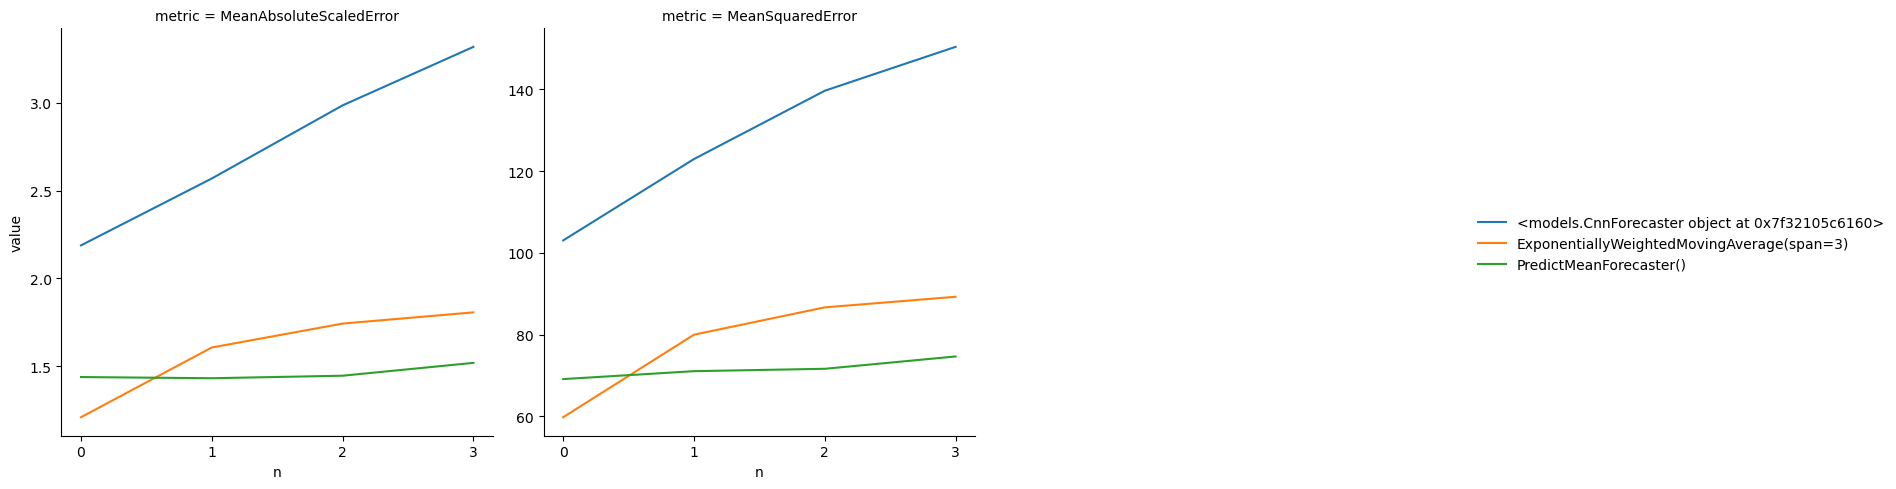

In [63]:
 metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

MeanAbsoluteScaledError  \
<models.CnnForecaster object at 0x7f321920dee0>                 2.692771   
PredictMeanForecaster()                                         1.459343   
ExponentiallyWeightedMovingAverage(span=3)                      1.591927   

                                                 MeanSquaredError  
<models.CnnForecaster object at 0x7f321920dee0>        132.380248  
PredictMeanForecaster()                                 74.146892  
ExponentiallyWeightedMovingAverage(span=3)              81.234780

MeanAbsoluteScaledError  \
model                                           n                            
<models.CnnForecaster object at 0x7f321920dee0> 0                 2.522212   
                                                1                 2.354849   
                                                2                 2.553031   
                                                3                 3.340993   
ExponentiallyWeightedMovingAverage(span=3)      0                 1.210449   
                                                1                 1.607165   
                                                2                 1.743103   
                                                3                 1.806993   
PredictMeanForecaster()                         0                 1.438947   
                                                1                 1.432186   
                                                2                 1.446583   
                                                3                 1.519656   

                                                   MeanSquaredError  
model                                           n                    
<models.CnnForecaster object at 0x7f321920dee0> 0        119.249551  
                                                1        113.855722  
                                                2        122.735625  
                                                3        153.200160  
ExponentiallyWeightedMovingAverage(span=3)      0         59.782868  
                                                1         79.974515  
                                                2         86.659919  
                                                3         89.252260  
PredictMeanForecaster()                         0         69.110252  
                                                1         71.046277  
                                                2         71.629932  
                                                3         74.645810

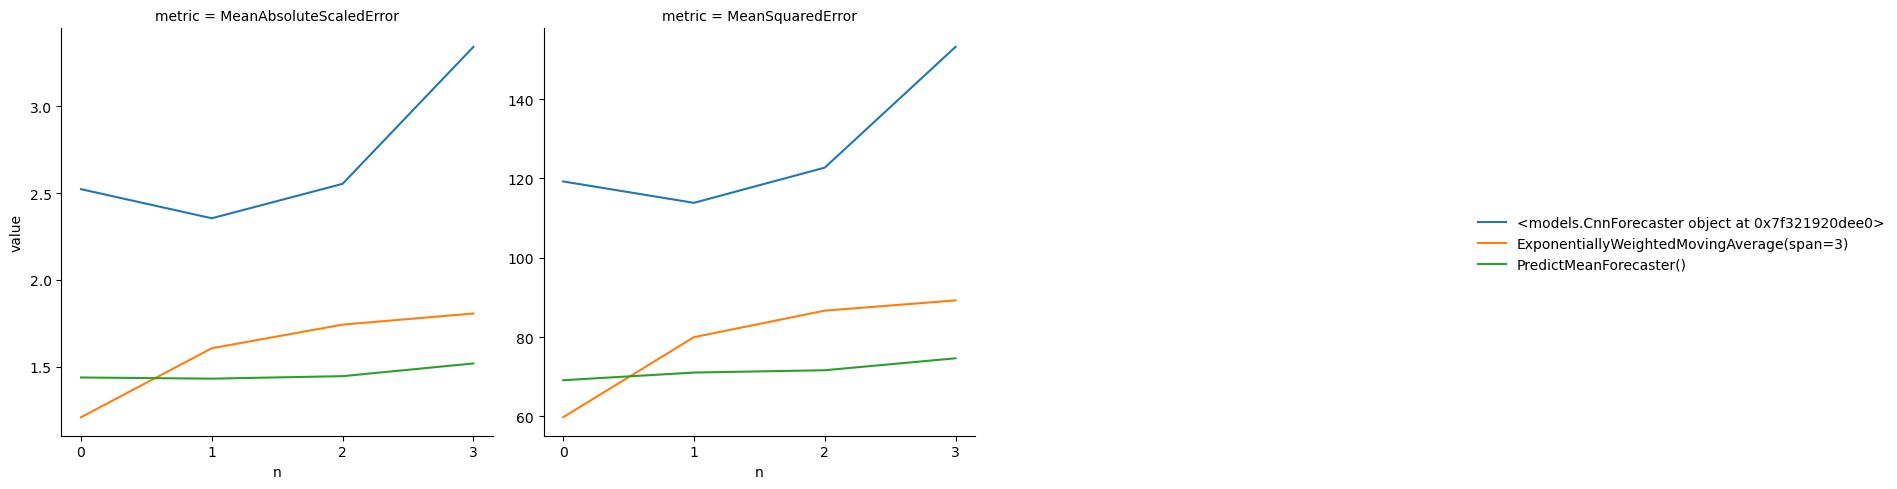

In [45]:
#epoch=40
#batch_size=20
#d_model=2048
metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))